# Imports and defs

In [1]:
# !pip2 install pypolyagamma

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import importlib
import os
import sys

from base.experiment import *
from logistic.env_logistic import *
from logistic.agent_logistic import *
from utils import *

import numpy as np
import pandas as pd
import plotnine as gg

#import importlib
#importlib.reload(logistic.agent_logistic)
#reload(sys.modules['logistic.agent_logistic'])

In [2]:
#No bias for now.

def simple_compare(agents, num_articles, dim, var, n_steps, seed=0, verbosity=0):
    env = LogisticBandit(num_articles, dim, NormalDist(0,1,dim=dim), NormalDist(0,var,dim=dim), seed=seed)
    #DistributionWithConstant(
    experiment = ExperimentCompare(agents, env, n_steps,
                   seed=seed, verbosity=verbosity) #, rec_freq=1, unique_id='NULL')
    experiment.run_experiment()
    results = []
    results.append(experiment.results)
    df = pd.DataFrame(results[0])
    #https://stackoverflow.com/questions/39092067/pandas-dataframe-convert-column-type-to-string-or-categorical
    df['agent_id'] = df.agent_id.astype('category')
    print(gg.ggplot(df)
     + gg.aes('t', 'cum_regret', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    print(gg.ggplot(df)
     + gg.aes('t', 'time', color='agent_id', group='agent_id')
     + gg.geom_point()
     + gg.geom_line())
    return results, df

def hyperparameter_sweep(make_agent_from_hyperparameters, hyperparam_list, dim, var, n_steps, seed=0, verbosity=0):
    agents = [make_agent_from_hyperparameters(hyperparam) for hyperparam in hyperparam_list]
    results, df = simple_compare(agents, num_articles, dim, var, n_steps, seed=seed, verbosity=verbosity)

# Experiment parameters

In [3]:
name = 'logistic'
num_articles = 10
dim = 20
var = 1.0/9
theta_mean = 0
theta_std = 1

n_steps = 500 #number of experiment steps
time_limit= 0.1

verbosity=1


# MALA

In [4]:
make_mala_agent = lambda hypers: MalaTS(num_articles, dim, [0]*dim, cov=None, 
                                        step_size=lambda t: hypers[0]/(1 + t * np.sqrt(dim*var)/dim),
                                        time=time_limit,
                                        n_steps=9999,
                                        init_pt=None, verbosity=verbosity)

#print(list_prod([[0,1],[0,1]]))

theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521]
Experiment: Step 0
 Sample: array([ 0.81393574,  0.15455946, -0.40518476, -1.04229444, -0.52153239,
        0.97829288,  0.39689509, -0.2373815 , -0.31355107,  0.00621063,
        0.21432438, -0.50145864,  0.38205395,  0.10797245, -0.42976   ,
        0.28726525, -0.64829388,  0.47597648, -0.45949745, -0.62857072])
 Accept proportion: 0.113360
 Steps taken: 247
 Sample: array([-0.05072903, -0.61121305, -0.31034715, -0.1932791 ,  0.75121159,
        0.64171906,  1.04263669,  0.12962026, -0.98742549, -0.47570838,
       -0.68444336, -0.42271574,  0.27739873,  0.7129429 ,  0.37354852,
        0.80899245,  0.28174561,  0.12760755,  1.31402825,  0.04650968])
 Accept proportion: 0.348315
 Steps taken: 356
 Sample: array([-0.87257521, -0.47554244,

 Sample: array([ 1.65860307e-01, -7.75941825e-01, -1.88454724e-01,  6.59131585e-01,
        1.76406797e-01,  1.17735791e-01,  4.26445288e-01, -9.72250865e-04,
       -1.93033438e-01,  9.45823832e-01,  1.06226346e+00, -4.30376791e-01,
        9.82161383e-01,  7.79662911e-01,  3.58335686e-01, -5.59368953e-02,
       -5.23299178e-01,  7.92183737e-01, -4.66981669e-01, -9.44768128e-01])
 Accept proportion: 0.732334
 Steps taken: 467
 Sample: array([-2.36225397e-04,  6.13271776e-02,  8.55414989e-01, -8.42017170e-01,
        4.76382699e-01,  2.42460559e-02, -1.73548380e-01,  1.52636545e-01,
        1.01487926e+00, -1.68571580e-01,  2.17667728e-01, -1.63403863e-01,
       -3.09932818e-01, -5.02551971e-01,  2.88796143e-01, -3.82691695e-03,
        3.28148879e-01, -6.09857924e-01, -4.42126230e-02, -2.03980478e-01])
 Accept proportion: 0.768085
 Steps taken: 470
 Sample: array([-1.35964385,  0.67261957, -0.15666889,  0.945522  , -0.09198064,
       -0.28190627, -0.61265466, -0.71142335,  0.157669

 Sample: array([-0.22495119,  0.40300658, -0.37847983,  0.24148276,  0.9617873 ,
        0.70210703, -0.04506171, -0.69226   , -0.00401438,  0.14944342,
        0.21471388, -0.17135467,  0.56782794, -0.45514082,  0.12801841,
       -0.58085574, -0.82346941,  0.69171198, -0.01474469,  1.06265505])
 Accept proportion: 0.916488
 Steps taken: 467
 Sample: array([-0.54682642,  0.87004177, -0.22778007,  0.79493034, -0.42769026,
        0.43292543,  0.14949278, -0.50216609, -0.47853504, -0.72012441,
        0.76606719,  0.4419478 ,  0.0217768 , -0.99025556,  0.33407359,
       -0.14497823,  0.61548163,  0.03030388,  0.64722462,  1.06522841])
 Accept proportion: 0.929032
 Steps taken: 465
 Sample: array([ 0.97003259, -0.57441335,  0.91846296, -0.47600832,  0.21000961,
        0.04111672,  0.2635253 ,  1.02526579, -0.42240494, -0.48529314,
        0.1641137 , -0.15810871,  0.48368025, -0.18791769,  0.4449743 ,
       -0.44552365, -0.29727842,  0.1675726 ,  0.25994541, -0.09797758])
 Accept prop

 Sample: array([-0.48695181,  0.62334526,  0.36317353,  0.07105636,  0.29026402,
       -0.1389072 , -0.43947551, -0.0019485 ,  0.11486114, -0.83255322,
        0.13798109, -0.61186743, -0.11617373, -0.52040003,  0.46238255,
        0.32015722, -0.59565578,  0.57406588, -0.43813521, -1.27291608])
 Accept proportion: 0.451754
 Steps taken: 456
 Sample: array([-0.82708976, -0.27639127,  0.19509883, -0.54753978,  0.00964409,
       -0.1010375 ,  0.54826396, -0.63249866,  0.35924808,  0.22566558,
        0.64233778, -0.40398751,  1.33160099, -0.04900956,  0.86007024,
        1.05389117,  0.38959976,  0.10530458, -0.2265403 ,  0.12559263])
 Accept proportion: 0.663043
 Steps taken: 460
 Sample: array([ 0.20794216, -0.11667587,  0.5043133 ,  0.07927694,  0.46607501,
       -0.36916659,  0.41268603,  0.258926  , -0.06714685,  1.18471411,
        0.18414427,  0.26562476, -0.40639772,  0.28608418,  0.23325002,
       -0.91878853, -0.16226356, -0.2445878 ,  0.59162086,  0.61539627])
 Accept prop

 Sample: array([-0.0802063 ,  0.45545708, -0.17020517,  0.04197625, -0.82121312,
       -1.31775669,  0.11823755, -0.80934259, -0.09433262,  0.20373292,
       -0.40358359, -0.03931213, -0.62526098, -0.56083877,  0.36087272,
       -1.73689545, -0.2913187 ,  0.12480451,  0.72797707, -0.03165494])
 Accept proportion: 0.863436
 Steps taken: 454
 Sample: array([ 0.16810189, -0.60947108, -0.49172065, -0.18253852, -1.30952214,
       -0.43112577, -0.79224913, -0.64243077, -0.70527703,  0.33220292,
        0.49782102, -0.10824986,  0.76444357,  0.24972774, -0.40456731,
       -0.08229251,  0.10941952, -0.18247542, -0.0133549 , -0.91288654])
 Accept proportion: 0.898901
 Steps taken: 455
 Sample: array([ 0.1750105 , -0.90727324, -0.09807403, -0.15680918,  0.33492586,
        0.05204461,  0.87007413, -0.06496787, -0.09144931, -0.90024087,
       -0.09194269, -0.38699233, -0.84877511, -0.09612559,  1.21617658,
       -1.2502069 ,  0.16194739,  0.18011687,  0.20390165, -0.05241711])
 Accept prop

 Sample: array([-0.1884519 , -1.46371244, -0.88721416,  0.05064908,  1.46813051,
       -0.01701999, -0.16848245,  0.41585478, -0.57728549,  0.13657461,
        0.04479715, -0.70703682,  1.06673956, -0.04940012, -0.00770998,
       -0.18853899,  0.06548537, -0.21876045, -0.16154911,  1.48149448])
 Accept proportion: 0.948889
 Steps taken: 450
Experiment: Step 12
 Sample: array([ 1.5961579 ,  0.66122041,  0.12474049, -0.44942945, -0.31389119,
       -0.04796223, -0.14887131,  0.57537298, -0.7908835 ,  0.55505926,
        0.44350189, -0.61603341,  0.44027874, -0.26366981, -1.36401319,
        0.29203026, -0.39534783, -0.44903611, -1.16336217, -0.66909324])
 Accept proportion: 0.380220
 Steps taken: 455
 Sample: array([-0.49707696, -0.76595837,  0.88327453,  0.94730414,  0.25717326,
        0.0898496 , -0.01743886, -0.37902645,  1.65382555, -0.55377558,
        0.74451004, -1.40818283, -0.36679065, -0.28198535, -0.17681483,
       -1.22808454, -0.36770369,  0.05993579, -0.63876726, -0.024

 Sample: array([-0.30343901, -0.66773298, -0.08857048,  0.02435762, -0.23077038,
        0.2540528 , -0.55706776,  0.30625106, -0.67598644,  0.52186986,
        0.81601564, -0.60703983,  2.11127339, -0.59193118,  0.25238927,
       -1.43168638, -0.57225199,  0.31279397, -0.66017199,  0.44297646])
 Accept proportion: 0.740991
 Steps taken: 444
 Sample: array([ 1.0655608 , -1.17179499, -0.63565599,  0.76083215,  0.36423194,
        1.13414576,  0.30147941,  0.927234  , -0.60091748, -0.3595454 ,
        0.43592013,  0.05331387,  0.59857422, -0.43711946,  0.63862927,
       -1.22098044, -0.48170652, -0.34188456,  0.25377461, -0.362447  ])
 Accept proportion: 0.833703
 Steps taken: 451
 Sample: array([-0.26275869,  0.64300263,  0.33622244,  0.93487167, -1.22195189,
       -2.27340028, -1.12326941,  0.80257176, -0.34310744,  0.46408507,
        1.12591184, -0.03659967,  0.93306266, -0.74804418,  0.28747378,
       -0.41563747,  0.11553022, -0.49359214, -0.40721247,  0.55073176])
 Accept prop

 Sample: array([ 1.23328896,  0.67621937,  0.52526509, -0.14499695, -0.47340822,
       -0.18678601,  0.26048384, -0.45574428,  0.786358  ,  0.62689987,
        0.3725146 , -0.18740989, -0.14322488, -0.66694555, -0.28029791,
       -0.62472251, -0.60159357, -0.55523773,  0.38214376, -0.51238228])
 Accept proportion: 0.926174
 Steps taken: 447
 Sample: array([ 0.25304495, -0.4818172 , -0.19095857,  0.02769739,  0.40218499,
       -0.60888474,  0.65907185, -0.49945522, -0.19605465, -0.21991875,
        0.52310686, -1.3647478 , -0.37034737, -0.74146442,  0.03271864,
       -1.13717388, -0.82218837,  0.23063788, -0.05495839,  0.47505298])
 Accept proportion: 0.973568
 Steps taken: 454
 Sample: array([-0.06380623, -0.49841538, -0.99271335,  0.39434259,  0.84561581,
       -0.7800053 ,  0.74903905,  0.28769662,  0.17634742,  1.1860714 ,
       -0.24460384, -0.79641942,  1.34349393,  0.50614696,  0.3221362 ,
       -0.07663822,  0.33207322,  0.53549665,  0.35432987,  0.68087435])
 Accept prop

 Sample: array([-0.15093776, -0.92508457, -0.17343781,  0.32736717,  0.03158292,
       -0.76143792, -0.40285571, -1.0122308 , -0.20739823, -0.32862086,
       -0.5207592 , -0.68035642,  0.24659643, -0.41214265,  1.08062337,
       -0.91652754, -0.86960771,  0.55797388,  0.27682514, -0.01882171])
 Accept proportion: 0.500000
 Steps taken: 436
 Sample: array([ 0.82451593, -0.86261351,  0.17657447, -0.60296785,  0.199852  ,
       -0.45644411,  0.62273451,  0.46357262,  0.77589697, -0.14189401,
        0.84488803, -0.20836627,  0.2081358 ,  0.38468516,  1.04124303,
        0.4403103 , -0.39082218, -0.45350911,  0.8143391 ,  0.4107478 ])
 Accept proportion: 0.658427
 Steps taken: 445
 Sample: array([-0.54716355, -0.94752168, -0.45042054,  0.2899109 ,  0.88783074,
       -1.25808614, -0.07096484, -1.15705967, -0.60376799,  1.56312469,
        0.4211789 , -0.49430505,  0.72291762, -0.32860651,  1.77472352,
       -1.69249294, -0.50555952,  0.81127548,  0.1909336 , -0.64364009])
 Accept prop

 Sample: array([ 0.78464497,  0.20236897,  0.18099058, -0.86815211,  0.23839182,
       -1.34455717, -1.50448778, -0.88285031, -0.67233572, -0.07618516,
        0.40749269,  0.11091355, -0.59466475, -0.06724839, -0.04206504,
       -1.16683097, -1.20303621,  0.052873  ,  0.30569543, -1.06779828])
 Accept proportion: 0.885321
 Steps taken: 436
 Sample: array([ 1.02442957, -0.73806767, -0.95124208,  0.27415504, -0.71154953,
       -1.32055984, -1.08719248, -0.23507707,  0.1988779 , -0.40506811,
        1.26976834, -0.4220766 ,  0.47073575, -0.27770555,  0.72919622,
        0.53587577, -1.24430615,  0.71858989, -1.64395945, -0.07690402])
 Accept proportion: 0.900000
 Steps taken: 440
 Sample: array([ 0.01390915,  0.94633409,  0.79296732, -0.41443033,  0.18806505,
        0.18194726,  0.12907228, -0.42867703,  0.04599421,  0.08260451,
       -0.71943964,  0.78499238, -0.42150375,  0.09064134,  0.04443314,
       -1.66444657, -0.11923152,  0.84709305,  0.85337239, -0.78980365])
 Accept prop

 Sample: array([ 0.09435346, -0.12118997, -0.5091801 , -0.07312299,  1.21920044,
       -0.54708701,  0.04709809,  0.74345202,  0.11556976,  1.31820592,
       -0.19431165, -1.19424561,  0.27704761,  0.02667407,  0.06581673,
        0.00512268, -0.84577623, -0.35055031,  0.05585196,  1.15372893])
 Accept proportion: 0.977064
 Steps taken: 436
Experiment: Step 24
 Sample: array([ 0.79191214, -0.19154102, -0.029105  ,  0.64273015,  0.56309557,
        0.15349478,  1.40929507, -0.34207403, -0.03455624,  0.34557832,
        1.08063742, -1.04337048, -0.85151608,  0.87702184,  0.12511361,
        0.47686655, -1.02458026, -0.33440771, -0.67070962, -0.09322447])
 Accept proportion: 0.385135
 Steps taken: 444
 Sample: array([ 0.705841  ,  0.16755991,  0.01015388, -0.40771431,  1.29376131,
       -0.53612744,  0.39697237, -0.51036574,  0.41008513, -1.16848711,
        0.38891217, -0.76878045, -0.25781745, -0.78570176,  0.05534948,
       -0.34330907, -0.48133268,  0.20707161, -0.47148048,  0.844

 Sample: array([-0.59276007, -0.01684888, -0.74354139,  1.32532403,  0.7656241 ,
       -1.20824079,  0.02121513,  0.14989769, -1.0878544 ,  0.92905502,
        0.08075433, -0.9756766 ,  0.21240319, -0.92009566,  0.21399576,
       -0.29308038, -0.14180506,  0.06162643,  0.61785572, -0.99142993])
 Accept proportion: 0.757506
 Steps taken: 433
 Sample: array([ 0.18583541, -1.07870788, -0.2485505 , -0.31028424,  1.23253527,
        0.59332596,  0.25547609, -0.72270951,  0.83135529,  0.49363516,
        0.83565166, -0.70758579, -0.34486712, -0.95613833,  1.13268387,
       -0.77743106,  0.41479216, -0.47332698, -0.48553287,  0.48388208])
 Accept proportion: 0.822171
 Steps taken: 433
 Sample: array([ 1.0556566 , -0.56575946, -0.3255733 , -0.34570514, -0.34276622,
       -1.42711377, -0.9500377 , -1.6778421 , -0.43431136,  1.23776329,
       -0.52167152,  0.08850751, -0.52763113, -0.74552121,  0.43113338,
        0.02863013, -0.83517063, -0.13134588,  0.10131406,  0.08202902])
 Accept prop

 Sample: array([ 0.52341187,  0.51797008,  0.80729172,  0.91582924,  1.33726668,
       -0.82419831, -0.03021367, -0.76876318,  1.06160908,  0.53615149,
        0.27170699, -0.43780703, -0.73798846, -0.47517288, -0.4889975 ,
       -0.69411954, -0.29025591, -0.83369845,  0.35349259, -0.30777489])
 Accept proportion: 0.939252
 Steps taken: 428
 Sample: array([ 1.09633634, -0.64856804, -0.42394064, -1.47764455,  0.67718072,
       -0.42150264,  0.36450848, -0.81513246, -0.10264167,  0.35860085,
        0.58655518, -1.23112908, -0.68015393, -0.07854248,  0.3951631 ,
       -0.6140244 , -1.12548443,  0.17397437, -0.54629445, -0.31377382])
 Accept proportion: 0.956019
 Steps taken: 432
 Sample: array([ 0.27446171,  0.06200849, -0.17475007,  0.59918812,  1.09378464,
       -0.2917111 ,  0.50981986,  0.57700426, -0.18447299,  0.31587498,
       -0.6378676 , -0.9872249 ,  1.00161043,  0.3317627 ,  0.53960191,
        0.10835331, -0.58390152, -0.55856105,  0.16561789,  0.61476418])
 Accept prop

 Sample: array([ 0.51033465, -0.24431951,  0.5338364 ,  0.02281806,  0.90636134,
       -0.81434098,  0.35787256, -0.8165771 , -0.63076412, -1.01194465,
        0.48941307, -0.71746149,  0.32830483, -0.7114697 ,  0.57568083,
       -0.47326496, -0.31141389, -0.55948276, -0.31897553, -0.3431608 ])
 Accept proportion: 0.584323
 Steps taken: 421
 Sample: array([ 0.30417873, -0.92109901,  0.55860907, -1.37381926, -1.22407429,
       -0.66162452, -0.04667895, -0.63752645,  0.1380568 , -0.45430148,
        1.22263726,  0.38077074,  0.08832545, -0.19805223,  0.66974278,
        0.43503597,  0.41728968,  0.69360171,  1.60884297,  0.08373125])
 Accept proportion: 0.705189
 Steps taken: 424
 Sample: array([ 0.42006749, -0.54577647, -1.71423943,  0.01427396,  0.70653859,
       -1.38082732,  0.46478624,  0.04572336, -1.12537291,  0.31807039,
        2.38105696, -1.13703863,  1.09900122, -0.93085636,  0.43921144,
        0.32645047, -0.68478713,  0.46077752,  0.02853238, -0.37982182])
 Accept prop

 Sample: array([ 0.40223606,  0.17943138,  0.58545424, -0.62844993,  0.41150529,
       -0.73935277, -1.31793935, -1.46444504, -0.4961892 , -0.28695211,
        0.68403158, -0.73734416,  0.08658398, -0.56783165, -0.99030363,
       -1.45660296,  0.92780045, -0.04084645, -0.38471231,  0.83643111])
 Accept proportion: 0.892344
 Steps taken: 418
 Sample: array([-0.15616706, -0.01765069, -1.3360801 , -0.35404468, -0.2360922 ,
       -0.98285834, -0.56806369, -0.39555537,  0.44263647, -0.82646767,
        0.86559516,  0.39555167, -0.67723403, -0.25389415,  1.30064008,
       -0.22122112, -0.11897688, -0.79928132, -0.78662783, -0.38324474])
 Accept proportion: 0.914489
 Steps taken: 421
 Sample: array([-0.38156303, -0.19943941,  1.08788146,  0.73625461,  0.72048077,
       -0.03610533,  1.249938  , -0.47378051, -0.44811057,  0.47136002,
        0.03248885, -0.64048523,  0.45221014, -1.23655284,  0.4726633 ,
       -0.8323842 , -0.45100464, -0.38882943, -0.83515396,  0.03157236])
 Accept prop

 Sample: array([ 0.51986063, -0.89162179, -0.48159184,  0.64319903,  0.15223078,
       -0.43260148,  0.35610177, -0.60156425,  0.05327884, -0.29999698,
       -0.58978017, -1.46134116,  0.62777588,  0.5468787 ,  0.15102995,
       -0.81048484, -0.34615304, -0.23164491,  0.43247436, -0.039689  ])
 Accept proportion: 0.973494
 Steps taken: 415
Experiment: Step 36
 Sample: array([ 0.76853547, -0.81492622,  0.09235981,  1.61771293,  0.92039534,
       -0.53421249,  1.13554422, -0.29830477,  1.11664801,  1.19431253,
        0.55183207, -0.31775742, -0.02463757,  0.08847872, -0.49052888,
       -0.55163838, -1.5885526 , -0.94081706,  0.20762443,  0.69724294])
 Accept proportion: 0.439716
 Steps taken: 423
 Sample: array([ 0.3640747 ,  0.22428196,  0.15817811,  0.04574013,  0.89183818,
       -0.98488471,  0.98151419, -0.38505824, -0.33196821, -1.16459919,
       -0.35214901, -0.04850309,  1.57547427, -0.43822227,  0.57307473,
       -1.40736633, -0.36761248, -0.70591206, -0.43903382,  0.221

 Sample: array([ 1.71824754e-01, -1.13779676e+00, -8.99134200e-01,  8.56615005e-01,
        1.45463344e-01, -8.61942157e-01,  2.56860035e-01, -8.52454248e-01,
       -2.82086529e-01,  1.45352608e+00,  1.52402323e+00, -1.22189481e+00,
        4.88501680e-01, -5.93669521e-01,  1.28241115e+00, -1.16754198e+00,
       -6.37091194e-01, -1.75697122e-04, -3.79945033e-01,  2.51575942e-01])
 Accept proportion: 0.793187
 Steps taken: 411
 Sample: array([ 0.26185999, -0.59685794,  0.03609387,  0.04223876,  0.58673506,
        0.40933051,  0.33652554, -0.7947336 ,  0.1090169 , -1.74828686,
        1.05288187, -1.36468709, -0.07310618, -0.60277622,  1.486071  ,
       -0.4635833 ,  0.02145964, -0.76565416, -0.09650498,  1.11873476])
 Accept proportion: 0.845783
 Steps taken: 415
 Sample: array([ 0.66857096,  0.65689058,  0.00805242, -0.56777172, -0.50871905,
       -1.3349885 , -0.21943439, -1.99425842, -0.16106213, -1.50072641,
        1.06538213,  0.29340833,  0.06736403, -0.52844972,  0.27716608

 Sample: array([-1.07856615, -0.12956419,  0.21650272,  0.05346377,  0.77268948,
       -0.41956337,  0.75126075, -0.8415119 ,  0.19014592,  0.50590227,
        0.76393176, -0.24243555, -0.11562366, -1.01938819,  0.98571116,
       -0.98535076, -0.35669619, -0.59852556, -0.04361094, -0.20471343])
 Accept proportion: 0.955224
 Steps taken: 402
 Sample: array([-0.04305934, -0.99190126, -0.71249396, -0.32694777,  1.57785646,
       -1.16306007,  0.97386268, -0.27047289, -0.08103008,  0.10163161,
        1.25770019, -1.63113729, -0.08390033, -1.06614263,  1.18056505,
       -0.58773917, -0.12123728,  0.03079483, -0.53593008, -0.21868234])
 Accept proportion: 0.976019
 Steps taken: 417
 Sample: array([-0.02480132, -0.50251941, -1.06733619,  1.02244424,  0.1018108 ,
       -0.11203929,  0.67859115, -0.41297838,  0.11988756,  0.26754715,
       -0.10627023, -1.30638186,  0.08071635,  0.26761924,  0.29291129,
       -0.15011077, -0.25693606, -0.57477601,  0.24317408,  0.01868827])
 Accept prop

 Sample: array([ 0.39651528, -0.57988022,  0.77109732,  0.26686972,  0.11866911,
       -1.78827898,  0.84938064, -0.56602588,  0.41587217, -1.18637574,
        0.10219153, -1.03223878,  0.01042743, -0.58800793,  0.58073368,
       -0.68897192,  0.30509793, -0.31685638, -0.46798451,  0.16639199])
 Accept proportion: 0.558313
 Steps taken: 403
 Sample: array([ 0.04120522,  0.03232614, -0.01974391, -1.60163331,  0.12544604,
       -1.19252018,  0.14204618, -0.01624936,  0.60247673, -0.3624673 ,
        1.21936651, -1.17413876,  0.2011686 ,  0.40441178,  0.8510177 ,
        0.56890791,  0.35659055,  0.59733423,  1.09136779,  0.58868147])
 Accept proportion: 0.702439
 Steps taken: 410
 Sample: array([-0.10762653,  0.39142747, -0.21156168,  0.11304695,  0.9323951 ,
       -0.84079487,  0.95503728, -0.4232634 , -0.11466243,  0.29959422,
        0.76679304, -0.69917726,  1.34842884, -0.65869402,  1.35183174,
       -0.57422807, -0.4866494 , -0.67032679, -0.29413846, -1.05606442])
 Accept prop

 Sample: array([ 0.69227868, -0.98171164,  0.00221229,  0.23150669,  0.29802419,
       -0.48062633,  0.95350848, -0.45514473, -0.71183728,  0.15645002,
        1.13720612,  0.42795729, -0.62891213,  0.06596652, -0.51513625,
       -1.15011334,  0.46602458,  0.71799341, -0.68445525,  1.10198658])
 Accept proportion: 0.872818
 Steps taken: 401
 Sample: array([-0.32787408, -0.80397844, -0.53432996, -0.43114768,  0.11566342,
       -1.38623644,  0.51506186, -1.04163653,  0.06774084,  0.46705671,
        0.65631728, -0.74269408,  0.12487335,  0.0868278 ,  1.22930728,
        0.17032321,  0.26731525, -0.48925495, -0.67480459, -0.28262577])
 Accept proportion: 0.929095
 Steps taken: 409
 Sample: array([-0.36649299,  0.24473336, -0.52620058, -0.07722937,  1.28004131,
       -1.10017094,  1.09492462, -0.84188841,  0.33532934,  1.01200094,
       -1.3742236 , -1.72579126, -0.0805899 , -0.7680984 ,  1.50165783,
       -0.84033295,  0.03825916, -0.89079671,  0.11875001, -0.01707506])
 Accept prop

 Sample: array([-0.31631069, -0.19250149, -1.45628556,  0.73281496,  0.19742419,
       -0.5750468 ,  0.89911749, -0.68226954, -0.27491879, -0.67477814,
        0.71279769, -1.33374548,  0.59853812, -0.54233939,  0.08638482,
       -1.07307218,  0.32832984, -0.87703195, -0.05068027,  0.03110595])
 Accept proportion: 0.967337
 Steps taken: 398
Experiment: Step 48
 Sample: array([ 0.70674064, -0.80949552, -1.03607511,  1.30188794, -0.41060918,
       -0.91085596,  0.99245209, -0.9853996 ,  0.08999667,  1.0406357 ,
        0.25737704, -1.27668915, -0.78818801,  0.26734541,  0.45840403,
       -0.15556922,  0.11684189, -1.02851922,  0.79709455, -0.16202349])
 Accept proportion: 0.437653
 Steps taken: 409
 Sample: array([ 0.50149043, -0.63442354, -0.09633881, -0.1778389 ,  0.51841136,
       -1.38928267,  0.74032602,  0.46586871, -0.05884136,  0.05718967,
        0.78202223, -0.80068467,  0.13477645, -0.62086241,  0.94457065,
       -1.47494697, -0.19884426, -1.18296763, -0.58992255, -0.210

 Sample: array([ 0.28531647, -0.47371936, -0.77977641,  0.80545048,  1.32059446,
       -0.52375898,  1.50565486, -0.810237  , -0.16359997,  0.43854573,
        0.8547191 , -1.17736605, -0.09583492, -0.61372881,  1.36710196,
       -0.38028555,  0.4395905 , -0.38491858, -0.5523622 , -0.98101064])
 Accept proportion: 0.817500
 Steps taken: 400
 Sample: array([ 0.31558009, -1.97898684,  0.12350766,  0.04416127, -0.14143569,
        0.56593436,  1.29631219, -0.79115112, -0.19125347, -1.23924977,
        1.72271888, -0.35796881, -0.35406374,  0.13958902,  0.70054184,
       -0.93891299,  0.34008254, -0.73689146,  0.55556146,  0.79420281])
 Accept proportion: 0.836228
 Steps taken: 403
 Sample: array([ 1.02057626,  0.16793002, -0.46776493,  0.27575667,  0.82730865,
       -1.79604128,  0.64683652, -0.65039209, -0.1262706 , -0.77370549,
        0.76067326, -0.69564872, -0.30995744, -0.66261155, -0.27176314,
       -1.02341067,  0.59177924,  0.67195049,  0.1840242 ,  1.22995553])
 Accept prop

 Sample: array([ 0.7632361 ,  0.09964957,  0.04563161,  0.39312271,  1.88739874,
       -0.23312412,  1.10254323, -0.78104956,  0.51083462, -0.18687785,
        0.27810803, -1.44697067,  0.45298689, -0.53201156,  0.50867515,
       -0.64702036, -0.06915772, -1.17700131, -0.1742259 , -0.37664715])
 Accept proportion: 0.939547
 Steps taken: 397
 Sample: array([-0.25685681, -0.77478104, -0.91346119, -0.34661314,  0.81519985,
       -0.88778232,  1.15756336, -0.08371309,  0.63049737, -0.21285895,
        1.69161217, -1.71123201,  0.55295252, -0.77655365,  1.1293264 ,
       -1.53502877, -0.15723184,  0.74587987, -1.04882115,  0.49600454])
 Accept proportion: 0.967742
 Steps taken: 403
 Sample: array([-0.05218638, -0.30816717, -1.4694645 , -0.01637959,  0.25366297,
       -0.93279167,  0.64134146, -0.53988662,  0.54524984, -0.61221107,
        0.8192226 , -1.36474489,  0.07457501, -0.48613604,  0.58813502,
       -1.2384545 ,  0.31307862, -1.41379783, -0.3637419 , -0.14911234])
 Accept prop

 Sample: array([ 0.78139264,  0.36933432, -0.07460713,  0.17923575, -0.13135906,
       -0.36428101,  0.41522416,  0.01503727, -0.30766634, -0.04780184,
        1.16783946, -1.08387319,  0.39899417, -0.55510748,  0.63496434,
       -1.37432427,  0.07751257, -0.53458518, -0.56442047, -0.60690515])
 Accept proportion: 0.544757
 Steps taken: 391
 Sample: array([ 1.52417117,  0.25485565, -0.00168011, -0.5453701 , -0.53392984,
       -1.03519022,  1.19210539, -0.31365429,  0.4548398 , -0.66689231,
        1.16385187, -0.72789091, -0.17650691,  0.00655968,  0.11441102,
       -0.66480443,  0.63233638,  0.75281532, -0.30756496,  0.7838887 ])
 Accept proportion: 0.711392
 Steps taken: 395
 Sample: array([ 0.46385881, -0.26757121, -0.91783222,  0.30259759,  0.32643597,
       -0.93246543,  0.91782567, -0.31536296, -0.38719382,  0.39923999,
        1.28134577, -1.7960739 , -0.31893953,  0.47346125,  0.76230648,
       -1.05623961,  0.61902749, -0.80963606,  0.02807816, -0.51643104])
 Accept prop

 Sample: array([ 0.99430632, -0.37209275, -0.57954901,  0.24091881,  0.5956382 ,
       -1.6562534 ,  1.11651141, -0.4899888 , -0.45013571,  0.17529502,
        0.010289  ,  0.0805919 , -0.73936121, -0.71224048,  0.46266349,
       -0.66846627, -0.67396675, -0.21371741, -0.50169251, -0.17971934])
 Accept proportion: 0.870801
 Steps taken: 387
 Sample: array([ 0.19701328, -0.31830222, -0.82537487,  0.14269236, -0.1525047 ,
       -0.7940252 ,  0.56159333, -0.8121166 , -0.19818228, -0.06865293,
        0.64332141, -0.72225153,  0.96769298,  0.73974898,  1.74107485,
       -0.45067986,  0.42324338, -0.56411501, -1.37784918, -0.06110329])
 Accept proportion: 0.924242
 Steps taken: 396
 Sample: array([ 0.66053059, -0.40090658, -0.34228177,  0.18032023,  1.31290039,
       -0.96047264,  0.48752758, -1.04918289,  0.31794839, -0.11946057,
       -0.0208349 , -1.27067063, -0.21796478, -0.58606218,  0.31018828,
       -1.18408521,  0.18584342, -0.44679192, -0.5978568 ,  0.40314387])
 Accept prop

 Sample: array([ 0.24051567, -0.9919492 , -1.14142131,  0.543276  ,  0.45340534,
       -0.22817339,  0.67434203, -0.89528272,  0.73427722, -0.60020172,
        0.86449867, -2.03086449, -0.05500024,  0.37411626,  0.8650111 ,
       -0.98265366, -0.13123445, -0.93926651, -0.53936056, -0.19499682])
 Accept proportion: 0.960938
 Steps taken: 384
Experiment: Step 60
 Sample: array([-0.04711818, -0.42981676, -0.72161256,  1.21086317,  0.36117899,
       -0.41063592,  0.83898365, -0.40488787, -0.02332466,  1.77096793,
        0.91977431, -1.19438899, -0.82263605,  0.08651473,  0.41440249,
       -0.14355929, -0.31487115, -0.23817143,  0.34324246, -0.36378292])
 Accept proportion: 0.507692
 Steps taken: 390
 Sample: array([ 1.03777072,  0.20228952,  0.7089408 , -0.09242109,  0.02205966,
       -1.95849618,  0.67113729,  0.20989028, -0.06047574,  0.12270019,
        0.45771011, -1.34848685,  0.55394099, -1.00783734,  0.86021425,
       -1.86677382,  0.29521956, -0.05264279, -0.80517643,  0.051

 Sample: array([ 0.17663583,  0.04300789, -0.38249365,  0.92520009,  1.45567946,
       -1.48754638,  1.29405402, -0.67835729, -0.1554707 ,  0.7933462 ,
        1.28400683, -1.06558755,  0.00227076, -1.35683834,  1.66402673,
       -1.11273777, -0.08216839, -0.9304098 ,  0.31789855, -0.58666153])
 Accept proportion: 0.805263
 Steps taken: 380
 Sample: array([ 1.66469215, -1.12045268, -0.02280982,  0.51820675,  1.27106592,
       -0.28787903,  0.70760462, -1.06379961, -0.89046679, -0.92146847,
        0.52665122, -0.68491161, -0.42947145, -0.59693815,  1.33837588,
       -0.78950613, -0.52569309, -1.24293802, -0.19854931, -0.17777685])
 Accept proportion: 0.876289
 Steps taken: 388
 Sample: array([ 1.67765059, -0.92660928, -0.65839006, -0.16501863,  0.14456718,
       -1.39328373, -0.29947459, -0.43298968,  0.02148373, -0.13549672,
        0.12101689,  0.26387023, -0.21942137, -0.50421081,  0.08603631,
       -0.33311652,  0.32195668, -0.59847229, -0.93610441, -0.06143418])
 Accept prop

 Sample: array([ 0.87426219,  0.20667186, -1.07041112,  0.49837871,  0.67985565,
       -0.47320508,  1.33782401, -0.46193543,  0.67487847, -0.22056259,
       -0.04598435, -0.82830555, -0.05445193, -0.62118398,  1.30668237,
       -1.04803797,  0.17167976, -0.85426964, -0.49500432,  0.24132202])
 Accept proportion: 0.952381
 Steps taken: 378
 Sample: array([-0.60516759, -0.33442942, -0.42069328,  0.65806353,  1.11392256,
       -0.32284879,  0.75808345,  0.0296408 , -0.18414303,  0.32886943,
        1.49088647, -1.91420108,  0.39798568, -0.67580088,  1.38052004,
       -1.32689135, -0.16674701,  0.68785687, -0.88248097,  0.87874395])
 Accept proportion: 0.956072
 Steps taken: 387
 Sample: array([ 0.43478735, -0.34436825, -1.34846517,  1.15934829,  0.50237141,
       -0.74830359,  1.05563683, -0.5140111 ,  1.19319552, -0.66621095,
        0.21631638, -2.1368473 ,  0.16833604,  0.09084244,  0.62480747,
       -0.66129802,  0.66318592, -0.81755611,  0.14566392, -0.62585715])
 Accept prop

 Sample: array([ 0.4940256 , -0.20157656,  0.39263232,  0.73920485,  0.31621197,
       -0.48895415,  1.0846183 , -0.44278806, -0.31082037, -0.2814696 ,
        0.17613069, -1.108547  ,  0.26702979, -0.43149825,  0.63529939,
       -1.60506931,  0.13025694, -0.04402333, -0.83876488, -0.3526122 ])
 Accept proportion: 0.610215
 Steps taken: 372
 Sample: array([ 1.6069619 , -0.56894785, -0.25342147, -1.4755858 , -0.0088262 ,
       -0.88252746,  0.93943869, -1.01167595,  0.90580483, -0.56095191,
        1.47566018, -1.1940492 ,  0.38580614, -0.20683778, -0.15793527,
       -1.23782584, -0.15138527,  0.67460547,  0.95618186,  0.38029602])
 Accept proportion: 0.726790
 Steps taken: 377
 Sample: array([ 0.34515762, -0.50837962, -0.78975405, -0.35448259,  1.32235085,
       -0.41273149,  0.95431444, -0.74507807,  0.61863942,  0.13369806,
        0.58097472, -2.46025725, -0.13443438, -0.2845649 ,  1.22710402,
       -1.05609754,  0.25766709, -0.0964048 , -1.12998411,  0.33535082])
 Accept prop

 Sample: array([ 1.23969353, -1.26003062, -1.47922436, -0.11705008,  0.79125981,
       -1.89748843,  0.19413543, -0.76149227, -0.35747448,  0.19615716,
        0.29249367, -1.45509552, -0.55587377, -0.43294127,  0.64565107,
       -0.21394906,  0.65581404,  0.57240688, -1.10914497, -0.12033236])
 Accept proportion: 0.901907
 Steps taken: 367
 Sample: array([ 0.35378336, -0.72768371, -1.25140363,  0.06583297,  0.08387926,
       -1.47345697,  0.75830912, -1.56300323, -0.39397775, -0.22023915,
        0.83841139, -1.1950171 , -0.09579903,  0.52153902,  0.86904423,
       -0.51305577,  0.1744792 , -0.94192081, -0.40721613, -0.23443833])
 Accept proportion: 0.933511
 Steps taken: 376
 Sample: array([ 1.31254178, -0.03409908, -0.74106362,  0.07200372,  0.28214588,
       -1.16872442,  1.78773832, -1.4007227 , -0.08335222, -0.25117712,
       -0.22443771, -1.18287489, -0.20154956, -0.30867969,  0.45092081,
       -1.11711594, -0.30470592, -0.69510403,  0.03972623,  0.68620507])
 Accept prop

 Sample: array([ 0.4088711 , -0.06696762, -1.10984527,  0.5450534 ,  1.0198795 ,
       -0.60641158,  0.66288835, -0.47595395,  1.03591074, -0.26945106,
       -0.2220558 , -1.55876964,  0.41979591,  0.71466758,  0.61794364,
       -1.37770712,  0.33508487, -0.81431922, -0.21357558, -0.28297545])
 Accept proportion: 0.986376
 Steps taken: 367
Experiment: Step 72
 Sample: array([ 0.92643013, -0.22610702, -0.38197062,  0.630478  ,  0.46121517,
       -0.86826071,  0.9361367 , -0.4004411 , -0.06269098,  0.9816604 ,
        0.84775727, -1.58111084, -0.56529952,  0.42545408,  0.47563249,
       -0.35882891, -0.36914021, -1.41442261,  0.48473353,  0.42022687])
 Accept proportion: 0.497326
 Steps taken: 374
 Sample: array([ 0.37425686, -0.35991901,  0.19195539,  0.25508048,  0.32061741,
       -1.7246885 ,  0.84807697, -0.68024812, -0.59695   , -0.44037991,
        1.03843621, -0.82482304,  0.13939113, -0.7037897 ,  0.5653195 ,
       -2.13140556, -0.1109186 , -1.19683316, -0.92432155,  0.822

 Sample: array([-0.08655199, -0.93329314, -0.41874338, -0.02543819,  0.68202889,
       -1.35898707,  1.53748451, -0.98451703,  0.2414775 ,  0.36813914,
        1.13660807, -1.09549548, -0.41093975, -0.86786251,  1.29427068,
       -0.98584647,  0.28974301, -0.71811312,  0.13202993, -0.07742289])
 Accept proportion: 0.795640
 Steps taken: 367
 Sample: array([ 0.53282139, -0.79119737, -0.52608903,  0.13531318,  1.00493148,
       -0.74923341,  1.31595433, -1.68889372, -0.28027657, -0.72902905,
        1.60944124, -1.5901683 , -1.50319328, -0.04911377,  0.23921098,
       -0.06299609, -0.15055522,  0.10553532,  0.0892088 ,  0.57683031])
 Accept proportion: 0.848238
 Steps taken: 369
 Sample: array([ 0.86410695, -0.10265859, -0.80994923,  0.41593044, -0.21625246,
       -2.08310064,  0.02811475, -1.26633305, -0.41790348, -0.31759095,
        1.1146235 , -0.70521885, -0.43992517, -0.72122963, -0.04710904,
       -0.60823222,  0.32899273,  0.33921958, -0.9660909 ,  0.42062253])
 Accept prop

 Sample: array([ 0.39525635, -0.15190995, -0.93378113, -0.18597633,  0.74367044,
       -1.07462338,  1.75960072, -1.36775291,  0.38292774, -0.1386403 ,
       -0.57878836, -1.2351708 , -0.12130409, -0.81302275,  0.89526848,
       -0.65833558,  0.45783854, -0.37389902, -0.18126047,  1.28390015])
 Accept proportion: 0.947222
 Steps taken: 360
 Sample: array([-0.46452982, -0.7600317 , -0.45258558,  0.23923583,  1.18615331,
       -1.46905116,  0.81340031, -0.45962206, -0.8003136 , -0.12668513,
        1.60159789, -1.52570681, -0.37698813,  0.10016392,  0.29953449,
       -1.79956944, -0.1785683 ,  0.50562978, -0.3907929 ,  0.78345199])
 Accept proportion: 0.991870
 Steps taken: 369
 Sample: array([ 0.8348567 ,  0.26287032, -0.39797415,  0.79640617,  1.03027618,
       -0.28092781,  0.50396633, -0.85989946,  1.05390227, -0.38885156,
       -0.78546048, -1.1856549 ,  0.35352453,  0.17458395,  0.58089965,
       -1.37255696, -0.10916611, -1.29027142, -0.18885182,  0.34383163])
 Accept prop

 Sample: array([ 0.16753098, -0.11334347, -0.17075919,  0.46496055,  0.57239175,
       -1.38072424,  1.18515804, -1.23872091,  0.22851689,  0.15895767,
        0.80732569, -1.70690091,  0.67531079, -0.66375509,  0.4638906 ,
       -1.19424246,  0.51228545, -1.01690202, -0.82438219,  0.75856496])
 Accept proportion: 0.595506
 Steps taken: 356
 Sample: array([ 0.45448376, -0.47428985, -0.95288992, -0.78443932, -0.02417913,
       -0.8576267 ,  0.71604966, -0.23417939,  0.49571232, -0.57509348,
        1.22965304, -1.43412334, -0.19508341,  0.06657875,  0.45987768,
       -1.28114725,  0.08642886,  0.25746248,  0.48165581,  0.49293732])
 Accept proportion: 0.733333
 Steps taken: 360
 Sample: array([ 0.25750333, -0.26904501, -0.30701695, -0.4209171 ,  1.36274789,
       -1.72854846,  0.89692646, -0.83464921,  0.04320602, -0.05783268,
        0.94854721, -1.8023188 ,  0.63584627, -0.47898926,  0.76155735,
       -1.42962907, -0.09997825, -0.6481121 , -0.39997306, -0.44164151])
 Accept prop

 Sample: array([ 1.41373397, -0.64768607, -0.35227057, -0.10918081,  0.66945589,
       -1.30154824,  0.38931096, -0.69901644, -0.02771866, -0.63098395,
        0.02672723, -0.26038775, -0.58127417, -0.3305132 ,  0.74711593,
       -0.34069508, -0.66955206,  0.38412016, -0.83383143,  0.86902543])
 Accept proportion: 0.917847
 Steps taken: 353
 Sample: array([-0.52110954, -1.02850215, -0.61834226, -0.72158205,  0.18962442,
       -1.92470062,  0.90025149, -0.40921712,  0.24551058, -0.27493748,
        1.15632843, -1.1538502 ,  0.24878802,  0.1351513 ,  1.05478401,
       -0.57436483,  0.63038474, -1.34581099,  0.14736212, -0.38125438])
 Accept proportion: 0.943978
 Steps taken: 357
 Sample: array([ 0.93382373, -0.573165  , -0.31331206,  0.87131286,  1.20059021,
       -1.28547584,  0.68045521, -1.59281905,  0.66834413, -0.52952466,
       -0.28849248, -1.65729611, -0.54295794, -0.80357297,  1.15471326,
       -0.94001262,  0.29805577, -0.79116885, -0.50037235,  0.73294537])
 Accept prop

 Sample: array([ 0.82044559,  0.57694275, -0.80871267,  0.44792225,  0.98977004,
       -0.0948495 ,  0.4998549 , -0.54861967,  0.95761981, -0.8009077 ,
       -0.76870964, -1.16745558, -0.02426361,  0.34917595,  0.56832314,
       -1.16081422, -0.0798967 , -0.58216994,  0.51015991,  0.23154791])
 Accept proportion: 0.968927
 Steps taken: 354
Experiment: Step 84
 Sample: array([ 1.15655805, -0.00300594, -0.47541107, -0.04879004,  0.41464021,
       -0.61515935,  0.52676661, -0.43157015, -0.01163017,  0.57213535,
        1.00371627, -1.24000385, -0.46728059,  0.05385041,  0.28916866,
       -0.64618824, -0.33134444, -0.66018783,  0.703501  , -0.13507951])
 Accept proportion: 0.545961
 Steps taken: 359
 Sample: array([ 0.41198878, -1.18361561, -0.32871903, -0.26858712,  0.11457834,
       -1.80257114,  0.43430365, -0.98353455,  0.01157687, -0.47816686,
        1.07893756, -1.53496492,  0.35287996, -1.07053391, -0.08263279,
       -1.24781502, -0.00767066, -1.12326851, -0.31247635,  0.349

 Sample: array([ 0.49687625, -0.78163153, -0.69121292, -0.34424064,  1.7845333 ,
       -1.01653381,  1.83007524, -0.85973771,  0.22261858,  0.70150113,
        1.07492101, -1.73619212, -0.45554583, -0.63483311,  1.51831307,
       -1.8396991 ,  0.15050082, -0.15163296, -0.57789896, -0.56363189])
 Accept proportion: 0.807471
 Steps taken: 348
 Sample: array([ 0.69859308, -1.08214079, -0.67866348,  0.45434024,  1.16130263,
       -0.52016911,  0.52026929, -1.48532414, -0.17424915, -0.9509457 ,
        0.6613258 , -0.77793605, -1.11140396, -0.3295252 , -0.0203087 ,
       -1.33156783,  0.11337988, -1.35219113, -0.0992785 ,  0.79507335])
 Accept proportion: 0.860000
 Steps taken: 350
 Sample: array([ 1.40487974, -0.12582604, -0.36233809,  0.04206535,  0.42110221,
       -1.78894923,  0.78613267, -1.28039695, -0.46872659, -0.53392918,
        0.54894255, -1.17031393, -1.11560809, -0.25352331,  0.2169048 ,
       -0.76323794, -1.02165244, -0.69523977, -0.18520033,  1.10593966])
 Accept prop

 Sample: array([ 0.47259758, -0.17106823, -0.42935424,  0.58127702,  0.67129029,
       -0.7064495 ,  0.88813175, -1.28945593,  0.32807557, -0.13645372,
       -0.03783637, -1.73926053,  0.40963581, -0.64216605,  0.9835098 ,
       -1.14607475,  0.76523256, -1.18562112, -0.53687171,  0.75821736])
 Accept proportion: 0.945245
 Steps taken: 347
 Sample: array([ 8.10798253e-01, -7.25913302e-01, -7.29220550e-01, -2.11379062e-01,
        1.29950686e+00, -1.83108575e+00,  5.51519345e-01, -1.08076442e+00,
       -4.10505551e-01,  9.33528532e-01,  6.86233810e-01, -2.60680305e+00,
        1.06118365e-01,  6.66751087e-01,  2.73320564e-01, -1.82960342e+00,
        6.81293605e-01, -9.17901969e-04, -2.17405433e-01,  7.97227464e-01])
 Accept proportion: 0.979943
 Steps taken: 349
 Sample: array([ 0.49646078,  0.56809143, -1.22567017, -0.00751252,  1.1443077 ,
       -0.33363555,  0.27717838, -0.2547174 ,  1.05126666, -0.17839417,
       -0.79426112, -1.22648925,  0.13515045,  0.16670123,  0.68254552

 Sample: array([ 0.0926331 , -0.31665545,  0.16947619, -0.60693732,  0.58619102,
       -1.21568602,  1.11285281, -0.98172207, -0.04129518, -0.18964094,
        1.18199462, -1.56083082,  0.10596302, -0.25385007,  0.21705353,
       -1.02641009,  0.16852238, -0.78943489, -1.13548235,  0.67259574])
 Accept proportion: 0.646884
 Steps taken: 337
 Sample: array([ 1.21861853, -0.87389599,  0.15781418, -0.08568708, -0.04488545,
       -0.72768476,  0.63092988, -0.16377275,  1.03636976,  0.05081549,
        1.30066422, -2.13701811, -0.03165339, -0.39634316,  0.75648156,
       -1.26991941,  0.21421013,  0.01820082,  0.18082027,  0.2803052 ])
 Accept proportion: 0.746356
 Steps taken: 343
 Sample: array([ 0.23476873, -0.4050523 , -0.41834495, -0.37627041,  1.29959127,
       -0.84856083,  1.57092982, -1.32141177, -0.37497679, -0.7284185 ,
        0.79510947, -2.45187903,  0.37044518, -0.62331647,  1.063471  ,
       -1.32930334, -0.24651245, -1.29998883,  0.17758473, -0.0095568 ])
 Accept prop

 Sample: array([ 1.14303714, -0.49317108, -0.41940816,  0.22121921,  0.47875854,
       -1.80239448,  0.27330273, -0.31987938,  0.39943069, -0.12105233,
        0.27499184, -0.75493871, -0.99300174,  0.49712775, -0.65777468,
       -0.94375211, -0.96627918, -0.21255436, -0.43842131,  0.35394668])
 Accept proportion: 0.905325
 Steps taken: 338
 Sample: array([-0.48053559, -0.34018199, -0.55285524, -0.01131475,  0.87457117,
       -1.52092167,  0.36717851, -1.58795408,  0.46428598, -0.55497331,
        1.98895736, -1.17946908,  1.30578672, -0.41164664,  1.0081517 ,
       -0.71064777, -0.70306766, -0.90269323,  0.23817731, -0.20190049])
 Accept proportion: 0.941520
 Steps taken: 342
 Sample: array([ 1.07070016, -0.16166021, -0.55213554,  0.72167321,  1.4343455 ,
       -0.83121327,  1.40496071, -0.79550601,  0.32313482, -0.3672524 ,
        0.66423096, -1.99054902,  0.30915397, -1.02443583,  0.55247546,
       -1.13987121,  0.03358795, -1.25678695, -0.44670341,  0.53779111])
 Accept prop

 Sample: array([ 0.77479687,  0.36972908, -1.13687588,  0.56026324,  1.34848352,
       -0.33766954,  0.58767804, -0.42462639,  0.85292911, -0.12815765,
       -0.66424779, -1.07495606,  0.45287769,  0.47402508,  0.96108487,
       -1.26435356,  0.4870658 , -0.89330972,  0.49260351, -0.31079313])
 Accept proportion: 0.957958
 Steps taken: 333
Experiment: Step 96
 Sample: array([ 0.98484867, -0.6205624 ,  0.23528735,  0.6499893 ,  0.32698136,
       -0.3828226 ,  1.07092848, -1.17498053,  0.86565838,  0.50875802,
        0.96698496, -1.46380637, -0.65312205,  0.61995849, -0.64131249,
       -0.32174838, -1.00873526, -1.51004417,  0.94285378,  0.66393585])
 Accept proportion: 0.475073
 Steps taken: 341
 Sample: array([ 1.18872234, -0.22227937, -0.04280159,  0.17006575, -0.26701946,
       -1.25384002,  1.52838464, -0.81592597,  0.23497862, -0.34010861,
        0.97730414, -1.35237448, -0.1313125 , -1.0123993 ,  0.4549302 ,
       -1.28475851, -0.23953865, -0.81076926, -0.58155752,  1.276

 Sample: array([ 1.56318096, -0.74315446, -0.24046513, -0.32640664,  0.49881792,
       -1.10519083,  1.29253619, -0.86378934, -0.54937977, -0.2469988 ,
        0.5039    , -1.99865612,  0.08591821, -0.03643949,  1.30581414,
       -1.22913172,  0.02314845, -0.80798681, -0.52431622, -0.67023452])
 Accept proportion: 0.780781
 Steps taken: 333
 Sample: array([ 1.26317404, -1.44289745, -0.92736624,  0.781861  ,  0.85559298,
       -0.71080191,  0.21892414, -1.71725254, -0.81396258, -1.05390243,
        1.0857772 , -1.7917465 , -0.06202489,  0.47731743,  0.6742399 ,
       -0.84117538, -0.3983379 , -1.37971316, -0.3804588 ,  0.35653265])
 Accept proportion: 0.857143
 Steps taken: 336
 Sample: array([ 0.85011548, -0.85620839, -0.97755811, -0.11003188, -0.76243102,
       -1.75507593,  0.69473685, -0.2640711 ,  0.36029299, -0.13028446,
        0.550303  , -2.00609706, -0.13206306, -1.37082802,  0.36479521,
       -0.87415933, -0.79774368, -0.41981435, -0.90925622,  1.85003877])
 Accept prop

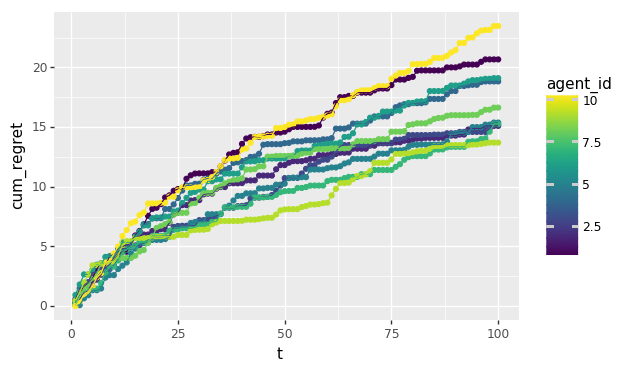

<ggplot: (8727155530953)>


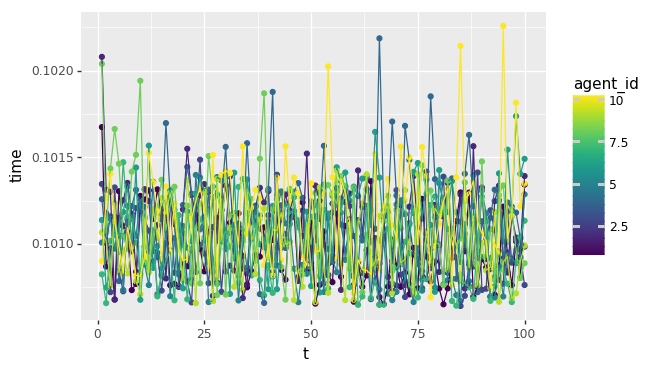

<ggplot: (8727155530953)>


In [6]:
n_steps=100

hyperparameter_sweep(make_mala_agent, [[0.1/2**n] for n in range(10)], dim, var, n_steps, seed=1, verbosity=1)

#hyperparameter_sweep(make_mala_agent, [[0.1/2**n] for n in range(10)], dim, var, n_steps, seed=1, verbosity=1)

theta [-0.41675785 -0.05626683 -2.1361961   1.64027081 -1.79343559 -0.84174737
  0.50288142 -1.24528809 -1.05795222 -0.90900761  0.55145404  2.29220801
  0.04153939 -1.11792545  0.53905832 -0.5961597  -0.0191305   1.17500122
 -0.74787095  0.00902525]
Experiment: Step 0
 Sample: array([-0.35673213, -0.25394665, -0.29237527, -0.55860886, -0.45614863,
       -0.15867953, -1.01525073, -0.25679026,  0.13451868, -0.0409811 ,
       -0.00171878,  0.18527316, -0.19894359,  0.80360781,  0.95296399,
       -0.7410599 , -0.38139401, -0.27614804,  0.29746202, -1.26314292])
 Accept proportion: 0.207792
 Steps taken: 231
 Sample: array([ 0.51067027, -0.20148117, -0.17045109, -0.21684698, -0.40853233,
        0.68424312, -0.49868076,  0.04125574,  0.3319677 , -0.11066171,
        0.72940187, -0.14919289,  0.21928397,  0.6062367 ,  1.10948305,
       -0.78960346,  0.09795998,  0.0524535 , -0.03547655, -0.39073387])
 Accept proportion: 0.399390
 Steps taken: 328
 Sample: array([ 0.06773348,  0.50213054

 Sample: array([-0.00798765,  0.59966671, -0.40191768,  0.54362402,  0.01023536,
        0.10059479,  0.15779063, -1.48200537, -0.06832165, -0.4623561 ,
       -0.02955879, -0.21804231,  1.19514531, -0.49317843,  0.27703463,
        0.59742595, -0.55444839,  0.01102668, -0.34477057, -0.10509214])
 Accept proportion: 0.777528
 Steps taken: 445
 Sample: array([ 0.31592642, -0.49257028, -0.17543232,  1.073002  , -0.3087634 ,
        0.02464357,  0.50469722, -0.15241238, -0.26348876, -0.92321665,
        0.04609031, -0.87908474,  0.29772972, -0.15445149,  0.12044856,
       -0.18693269,  0.79104428,  0.60109731, -0.02703206,  0.79851718])
 Accept proportion: 0.833333
 Steps taken: 444
 Sample: array([-0.48030439,  0.2714354 , -0.43107883, -0.11634707, -0.00162574,
       -0.78218169,  0.05766112, -0.58947464, -0.01657475, -0.11696234,
       -1.46128355, -0.054437  ,  0.69616429, -0.5004324 , -0.10857019,
       -0.41645365, -0.42735983,  0.88378059, -0.70049235, -0.31662671])
 Accept prop

 Sample: array([ 1.47443833, -0.0909326 ,  0.87756054,  0.60444909, -0.65313411,
       -0.51243475, -0.06349333,  0.3354223 , -0.02352425, -0.96256482,
       -0.07514314, -0.12846436,  0.10398235,  0.27751045,  0.40384812,
        0.46269509, -0.05154077,  0.20461572,  0.75448327,  0.31192034])
 Accept proportion: 0.954545
 Steps taken: 440
 Sample: array([-0.24315667,  0.82726618, -0.03479839, -0.2969875 , -0.51634556,
       -0.50571941, -0.07016495,  0.38846121,  0.41619367, -0.53648786,
       -0.38920989,  0.01219391, -1.46865806, -0.18677642, -0.03896512,
       -0.00867049,  0.37527391,  0.20708278,  0.32893625, -0.27433561])
 Accept proportion: 0.968326
 Steps taken: 442
Experiment: Step 5
 Sample: array([-0.55061805,  0.25123636,  0.00756369, -0.52690198, -0.32651279,
        0.35528795,  0.62522515,  0.62548483, -0.35682548, -0.35807983,
       -0.24012617, -0.4638207 , -0.55977989,  0.07143568,  0.85739817,
       -0.28168765,  0.02754282,  0.03248006, -0.21950278, -0.7643

 Sample: array([-0.79387326, -0.9195035 , -0.33789641,  0.16076856,  0.51204456,
        0.01159177,  0.06086944, -0.18400671,  0.52873198, -0.62611647,
        0.84076516, -0.45813349,  0.18604737, -0.40955065,  0.53513441,
        0.22712336, -0.12823567, -0.2540557 , -1.0557313 , -0.14071114])
 Accept proportion: 0.599068
 Steps taken: 429
 Sample: array([ 0.20325302,  0.50666578, -0.41719758,  0.71772127, -0.50686456,
        0.01245616,  0.29585121,  0.03431572,  0.06904194, -0.95652966,
        0.45814116, -0.37620026, -0.39314834, -1.01960338, -0.14800598,
        0.26006646, -0.05701632,  0.57325059, -0.54398807, -1.08078692])
 Accept proportion: 0.732719
 Steps taken: 434
 Sample: array([ 0.82011481, -0.01264849,  0.36988003,  0.67087772,  0.16468501,
       -1.11887849,  0.78528691,  0.20507567, -0.00700368, -1.14131094,
       -0.39197812,  0.49002706, -0.53292034, -1.14140024,  1.03803699,
        0.42473685,  0.33804603,  0.79776878, -0.50294496,  0.83286671])
 Accept prop

 Sample: array([-0.70180054, -0.08759659,  0.07732324,  0.52922548, -0.26392169,
       -0.1009714 , -0.63144815,  0.10804899, -0.40851668, -0.72718567,
        0.10639601, -0.31962484,  0.02912802, -0.4960008 ,  0.67400227,
        0.75623157, -0.29778063, -0.02801713,  0.39341408,  0.62066488])
 Accept proportion: 0.893519
 Steps taken: 432
 Sample: array([-7.64163454e-01, -5.20669373e-01,  1.44849778e-02,  8.43424236e-01,
       -9.76574424e-01, -3.34265773e-01,  1.10329657e+00, -8.84679823e-02,
       -9.37518855e-03, -5.41849815e-04,  8.52139612e-01, -2.87377768e-01,
       -7.65406539e-01,  1.56526586e-01,  5.59773392e-01, -1.28184273e-02,
        6.40008169e-01,  4.38315767e-01, -6.35080646e-01, -9.16974875e-01])
 Accept proportion: 0.942396
 Steps taken: 434
 Sample: array([ 0.3971866 ,  0.14384074, -0.02025303,  0.16128335, -1.20613492,
        0.48676228, -0.53154497, -0.41843805,  1.03818622,  0.33908132,
        0.72315885,  0.05477374,  0.18637486,  0.81033351, -0.1079824 

 Sample: array([ 0.47014233, -0.9209712 ,  0.26632967,  0.25007571, -0.90355547,
        0.5010491 , -0.00329809,  0.40304379, -1.0715128 ,  0.17679745,
       -0.10772606,  0.09654703,  0.55681745,  0.41291597,  0.17722793,
       -0.67332118,  0.35740385,  0.34159406, -0.57768045, -0.39203832])
 Accept proportion: 0.353488
 Steps taken: 430
 Sample: array([-0.68837463, -0.3734832 , -1.31359842,  0.38335301,  0.33246212,
       -0.74576241, -0.30451958, -0.184568  ,  1.33248774,  0.12944091,
       -0.59203637, -0.13338893, -0.1785451 , -0.2257815 , -1.00492631,
       -0.42688611, -0.54979059, -0.31755578,  0.18246452,  0.78694431])
 Accept proportion: 0.495370
 Steps taken: 432
 Sample: array([-0.48744838,  0.29267604,  0.01336456, -0.40072086,  0.06720869,
        0.25488382,  0.52985158,  0.20719523, -0.562651  ,  0.4906061 ,
       -0.21647965,  0.17525058, -0.43884023,  0.1055775 ,  1.6495698 ,
       -0.21004297, -0.40619778, -0.30487182, -0.12010467,  0.05245747])
 Accept prop

 Sample: array([-0.74698543, -0.96822928, -0.31703585,  0.98437884, -0.96558885,
        0.30248558,  0.2829069 ,  0.61829858,  1.06637009,  0.03417367,
        0.43950947,  0.67203009,  0.59732387,  0.59267809, -0.11906798,
        0.15455297,  0.83835055,  0.93885257,  0.74894919,  0.27126687])
 Accept proportion: 0.800937
 Steps taken: 427
 Sample: array([ 0.16547893,  0.43721731, -0.41814907,  0.21322088,  0.29246623,
        0.7966818 , -0.63528029,  0.70907822, -0.83017405, -0.81422503,
        0.21890195,  0.30505661, -0.54210903, -0.6512918 , -0.57401622,
        0.65399959,  0.26425114,  0.50689142, -0.3297809 , -0.8854885 ])
 Accept proportion: 0.848485
 Steps taken: 429
 Sample: array([-0.84898459, -0.17530333,  0.19105789,  0.99776078, -1.0640321 ,
        0.45044661, -0.41820903, -0.14245298,  0.14966162, -1.16202295,
        0.44235037, -0.71114699, -0.16346506,  0.142005  , -1.1409491 ,
        0.26086071,  0.04576272,  0.70075985,  0.22628999, -0.28025034])
 Accept prop

 Sample: array([-0.54264953,  0.26181863,  0.32045284,  0.70930149, -0.87522561,
        0.14243872, -0.34773362, -0.63784481,  0.60196418, -0.38882187,
        0.33666601,  0.70200043,  0.15273542,  1.28941347, -0.28020493,
        0.7795795 ,  0.93726652, -0.68296183, -0.33099129,  1.14403687])
 Accept proportion: 0.945882
 Steps taken: 425
 Sample: array([-0.78286917,  0.44787019, -0.62936876,  0.76591478,  0.2889011 ,
       -0.12143473,  0.23671101,  0.51552389, -0.37490537, -0.162054  ,
       -0.56821234,  0.15003331,  0.14701222, -0.27711202,  0.69032169,
        0.4895789 ,  0.85483433,  0.59949756, -0.32521934,  0.44402538])
 Accept proportion: 0.960465
 Steps taken: 430
Experiment: Step 17
 Sample: array([-0.51989349, -0.04586775, -1.39977521,  0.04170962, -1.37967377,
        0.30836498, -0.79246266,  0.22258495,  0.11974782, -0.25367257,
        0.52147443,  0.52899718, -0.06770327, -0.07626369,  0.20111429,
        0.28578303,  0.48455347, -0.23511863,  0.19159062, -0.356

 Sample: array([-1.09875737, -0.52162766, -1.53831738,  0.14556905,  0.62076347,
       -1.04891773,  0.86344813,  0.47575479, -0.47196099, -0.02500826,
       -1.71670652,  0.17363569, -0.68943009, -0.45633625,  0.9819404 ,
        0.47705256, -0.41235557, -0.46350642, -0.21132316,  0.13022716])
 Accept proportion: 0.653110
 Steps taken: 418
 Sample: array([-0.90124387, -0.14400501, -0.39171722,  0.21641853, -1.20769303,
       -0.2599279 ,  1.22531795, -0.23087039, -0.32473198,  0.55398636,
       -0.35791013, -0.14976667,  0.62064649, -0.01503262,  0.25971834,
        0.41532875,  0.40165197,  0.18891559, -0.23549563, -0.68761495])
 Accept proportion: 0.759434
 Steps taken: 424
 Sample: array([ 0.96834852, -1.1276126 , -0.3568636 , -0.03645363, -1.04391045,
        0.30135179, -0.09367808, -0.74135712, -0.01323037,  0.45028327,
       -0.0737093 ,  0.34162075, -0.14474389,  0.01665592,  1.45166694,
       -0.2634831 ,  0.84417407,  1.20046939, -1.20535291, -1.45540298])
 Accept prop

 Sample: array([ 0.55881673,  0.65627999, -0.78325689, -0.76304194, -0.75456954,
        0.28488239, -0.45152339,  0.43824484,  0.17828534, -0.59749272,
        0.89060312, -0.9949257 , -0.73215602,  0.10214727,  1.07879646,
        0.14645798,  0.29971721,  1.00553679,  0.1892899 ,  0.34586928])
 Accept proportion: 0.909091
 Steps taken: 418
 Sample: array([ 0.47783947, -1.14240517, -0.82160653,  0.40944523, -0.14068755,
       -0.04232115,  0.01225766, -1.01053123, -0.54629179, -0.95483332,
       -0.20490326,  0.23336933, -0.07884801, -1.23288786, -0.19781332,
        1.16644946, -0.45628264,  0.2111197 , -0.56250275, -0.53983708])
 Accept proportion: 0.937799
 Steps taken: 418
 Sample: array([ 0.91031563,  0.84086103,  0.64162907,  1.87040263, -1.11176898,
       -0.30210554,  0.40299053, -0.78427828,  0.2255732 ,  0.22041485,
        0.38691822,  0.58740742,  0.05948269,  0.19722216, -0.55458777,
        0.83787442,  0.3276476 , -0.209788  ,  1.31632893, -0.70092691])
 Accept prop

 Sample: array([ 0.2252457 , -0.57797359, -0.1876869 ,  0.05686241, -0.27495371,
       -0.71304634, -0.61276957,  0.61363927, -1.42573407, -0.63561233,
        0.59174007, -0.24831192, -0.78809793, -0.14797708,  0.3219331 ,
        0.25036711,  0.25071319,  0.4935315 , -0.26074359, -1.1727149 ])
 Accept proportion: 0.371703
 Steps taken: 417
 Sample: array([ 0.45548152, -0.49172463, -1.50118392,  1.21660403, -0.59355521,
        0.2068394 ,  0.71843471, -1.07175171, -0.14041906, -0.49740959,
        0.0729581 , -0.36456885,  0.63513951, -0.51161611,  0.05154401,
        0.73714017,  0.65466038,  0.76362339, -0.62137629,  0.36985699])
 Accept proportion: 0.509662
 Steps taken: 414
 Sample: array([-0.01715073, -0.73913685, -1.12505583,  0.57477642,  0.3127485 ,
       -2.14323964,  0.31044605, -0.14096727, -0.43734998, -0.49769756,
       -0.75202189,  0.73377788,  0.35974204, -0.38731346,  1.48685894,
       -0.69324637,  0.23836758, -0.04904043,  1.0086228 ,  0.1324556 ])
 Accept prop

 Sample: array([-3.20315127e-01, -4.70780638e-02,  1.41994678e-01,  1.81824822e+00,
       -2.03309377e-01, -6.34098282e-01, -5.82546541e-01, -7.43647387e-01,
        4.26987890e-01,  3.50210488e-01, -5.39227246e-01,  1.91190435e-01,
        4.35506358e-01,  5.83696130e-04,  1.32002840e+00,  2.99449938e-01,
       -2.94989612e-01,  1.84294083e+00, -9.60888393e-01, -7.18733279e-01])
 Accept proportion: 0.824818
 Steps taken: 411
 Sample: array([-1.1244205 ,  0.71172893, -1.1354707 ,  0.40952623,  0.16615225,
       -0.48101812, -1.05772105,  0.0405024 , -0.09482559, -1.22769806,
       -0.08316017, -0.10963486,  0.35935054,  0.03279047, -0.43451314,
        0.01358053,  0.78900433,  0.37708634,  0.43871937,  0.20065927])
 Accept proportion: 0.846715
 Steps taken: 411
 Sample: array([-0.32946947, -0.41063126, -0.87595797,  0.40335048, -0.59989572,
        0.93123119,  1.52392179,  0.14330372, -0.70454659, -0.34096857,
       -0.74990038,  0.01017405,  0.22642532,  0.48870196,  0.78325295

 Sample: array([-0.40368917,  1.44296092,  0.31609781,  1.7923053 , -0.98987488,
       -0.07359304, -0.44567886, -0.85888581, -0.62823265, -0.18078319,
       -0.07549707,  0.98837992, -0.57764753,  0.07791415, -0.10927596,
        0.46923759,  0.42052742,  0.08347059,  0.04272021,  0.22308517])
 Accept proportion: 0.945545
 Steps taken: 404
 Sample: array([-0.8027152 ,  0.22280934, -0.2847267 ,  1.28163752, -0.58920063,
       -1.07788641,  0.45142055,  0.46981263, -1.28915539, -0.38689415,
       -0.07290303,  1.12594233, -0.5081213 , -0.25755701,  1.06505621,
        0.74295744,  0.3021087 ,  0.13253158,  0.65821055, -0.71495045])
 Accept proportion: 0.965854
 Steps taken: 410
Experiment: Step 29
 Sample: array([ 1.52107447, -0.78808003, -0.21185952,  1.01238749, -0.85626968,
       -1.11515817,  1.22649462,  0.91454029, -1.89281181, -0.60671857,
        1.32579497,  1.21694676,  0.22004565, -0.09082769,  0.32515534,
        0.40976495,  1.30083527, -0.38805504,  0.37708956, -0.003

 Sample: array([-0.87175774, -0.33094388,  0.37569318,  0.39242713,  1.08020696,
       -0.89547763,  0.44723045, -0.26567659, -0.06762748, -0.72822797,
        0.44809492,  1.10289948,  0.13801572, -0.54374656,  1.22793532,
        0.23326689, -0.62044018,  1.04617121,  0.64172024, -0.02181861])
 Accept proportion: 0.645729
 Steps taken: 398
 Sample: array([-0.6097097 , -0.24132984, -1.46300949,  1.36173268, -0.62552561,
        0.50171971,  0.42848838, -1.2645167 ,  0.60633709,  0.86512477,
        0.26049609,  0.71526379,  0.82391042, -0.21780777,  0.10894391,
        0.09880394,  0.21180703,  0.63858211, -0.45545408, -0.0050585 ])
 Accept proportion: 0.780247
 Steps taken: 405
 Sample: array([-0.86125518, -1.12841111, -0.17964998,  2.15347048, -0.88009537,
       -1.36254046,  0.03297844, -0.37174418, -0.12645429,  0.50518648,
       -0.45562453, -0.13424338,  0.53328106,  1.20948621,  0.73800926,
       -1.28090864,  0.75229915,  1.07524937, -0.99408501, -0.96289511])
 Accept prop

 Sample: array([-1.14916175, -0.43227172, -0.89874438,  0.89017623, -1.46178588,
        0.56009442,  0.64319059,  0.11493547, -0.15434889, -0.09235727,
        0.09602656,  0.08056193, -0.14870742,  0.37257366,  0.43574399,
        0.25585288, -0.74641262,  1.51029049,  0.45533081, -0.40479618])
 Accept proportion: 0.918159
 Steps taken: 391
 Sample: array([-0.04838108, -0.82239619, -0.99478907,  0.55578397, -0.47293761,
       -0.61840657,  0.76368368, -0.82612376, -0.81394835,  0.03790204,
        0.31251463,  0.41319608, -0.11345221, -0.11675133,  0.36320377,
        0.18203427,  0.11598525,  0.98486345, -0.21578132, -0.37370483])
 Accept proportion: 0.948020
 Steps taken: 404
 Sample: array([-1.1989096 ,  0.77965323,  0.03846967,  1.39824915, -0.79062539,
        0.74787485,  0.35226684, -0.15527494, -0.29080029, -0.92698239,
       -0.34781278,  1.57456302, -0.34299542,  0.27425927, -0.94357259,
        0.42090472,  0.52091927,  1.02542912, -0.02883722, -0.12887813])
 Accept prop

 Sample: array([ 1.23924194,  0.23716792, -0.84967875, -0.07546099, -0.64279099,
       -0.51064344,  1.16576972,  0.08707772, -1.93220772, -1.5816348 ,
        0.13287651,  1.19207668,  0.68299717, -0.23467131, -0.32092591,
        0.34573186,  0.66315015,  1.02664313,  0.29833702, -0.92193417])
 Accept proportion: 0.420655
 Steps taken: 397
 Sample: array([ 0.05974996,  0.04886952, -2.16769393,  0.21439844, -0.97428707,
       -0.19993771, -0.46264483, -2.2484601 ,  0.18487809, -0.37472188,
       -0.47755764,  0.8371064 ,  0.79088667, -0.34570803,  0.94143729,
       -0.08565382,  0.68933162,  0.33234417,  0.36733068, -0.02114398])
 Accept proportion: 0.569652
 Steps taken: 402
 Sample: array([-0.02018769, -0.25275   , -0.86345725,  0.8603384 , -0.38620162,
       -1.09383798,  0.92592954, -0.72946971, -0.23245619, -1.30036647,
       -0.7274356 ,  1.0019169 ,  0.62777612,  0.24457615,  1.82541783,
       -0.20951416, -0.20782358,  0.48667005, -0.13512727,  0.22655093])
 Accept prop

 Sample: array([ 0.17362927, -0.48737312, -0.80715444,  1.17248107, -0.7446228 ,
       -0.4961128 ,  0.51207445, -1.14401922,  0.91509796, -1.08780971,
       -0.93381411,  0.58091729, -0.61575773, -0.10692157,  0.15015809,
        0.58197279, -0.01619253,  0.43440018, -0.41400464, -0.87095709])
 Accept proportion: 0.845758
 Steps taken: 389
 Sample: array([-0.34566182,  1.29781689, -1.81123134,  0.39975173, -0.09131621,
       -0.12973588, -0.18528489,  0.58891622,  0.72693282, -0.05670619,
        0.76197713,  1.134685  , -0.07396007, -1.51912908,  0.1569522 ,
       -0.09643933,  0.37942117,  1.38831028,  0.1571306 , -0.03046585])
 Accept proportion: 0.861461
 Steps taken: 397
 Sample: array([-0.67451872,  0.41851305, -0.50609093,  1.49037908, -0.47721408,
        0.32026944,  0.13637894,  1.45032733, -0.25653314, -1.53124145,
        0.41376874,  1.55793354, -0.07163476,  0.68564794,  0.20453674,
        0.53690522, -0.71491955,  1.78313565, -0.34565321,  0.10259408])
 Accept prop

 Sample: array([-0.79424168,  0.090563  , -0.56615593,  0.22745884, -0.23416401,
        0.29406372,  0.27290315, -0.65737358, -0.39570175,  0.0161777 ,
        0.08704951,  0.91710554, -0.64258483,  0.13642678, -0.24209682,
       -0.30865855,  0.48886443,  1.13547966, -0.05060135, -0.75585459])
 Accept proportion: 0.956298
 Steps taken: 389
 Sample: array([-0.86504924,  1.51663879, -0.79497799,  0.83658261, -0.18607889,
       -0.29817068, -0.01979484, -0.41350443, -1.06057799, -0.00309347,
       -0.68324025,  1.03150597, -1.21557975,  0.05864776,  0.31951797,
       -0.69787034,  0.69758807,  0.03388761, -0.44898795, -0.62731387])
 Accept proportion: 0.961637
 Steps taken: 391
Experiment: Step 41
 Sample: array([-0.11201659,  1.32247905, -0.88268124, -0.03854211, -0.51467142,
       -0.98090289,  1.17952382, -0.07073194, -1.57471947, -1.00533952,
        0.32253166,  0.74552605,  0.1975706 ,  0.10678085, -0.44813706,
        0.12481694,  0.63192308,  1.10692377,  0.83060349,  0.167

 Sample: array([ 0.27532777, -0.25783104, -1.13283775,  1.70939148, -0.22668347,
       -1.69776918,  0.99277896, -1.22930386,  0.00896643, -1.35416918,
       -0.01091272,  0.72984764,  0.35640593, -1.15925132,  1.25403031,
        0.17758845, -0.63794282,  0.51436567,  0.12480094, -0.4387895 ])
 Accept proportion: 0.710594
 Steps taken: 387
 Sample: array([-1.40943769, -0.28103891, -0.24560075,  1.46459331, -0.20975166,
        1.14741248,  0.86200521, -0.5933674 , -0.33315898, -0.66466455,
        0.88742853,  0.0547044 ,  0.15331305, -0.36064412,  1.64326724,
       -0.03094246,  0.09128918,  0.21668454,  0.48526435, -0.17071948])
 Accept proportion: 0.820972
 Steps taken: 391
 Sample: array([ 0.42191663, -0.77590359, -0.99264569,  0.85961629, -1.27702418,
       -0.05655581,  0.29433354,  0.03863566, -0.08388614, -0.6249378 ,
        0.24718425,  1.58089779, -0.02044008, -0.40345143,  0.77882655,
       -0.06490222, -0.69560239,  0.96763489, -1.34897297, -0.91026475])
 Accept prop

 Sample: array([-0.52028678,  0.37467101, -1.55535176,  1.95574497, -0.8931927 ,
        0.96680335,  0.47080041,  0.56332912, -0.25229966, -0.24734707,
        0.72074757, -0.03822148,  0.63436599,  0.38872887,  0.92330433,
        0.18140212, -0.67812655,  0.51572092, -0.11006337, -0.70195132])
 Accept proportion: 0.942623
 Steps taken: 366
 Sample: array([ 0.53180251, -0.06859833, -1.24625778,  1.36849083, -0.75047531,
       -0.81478791, -0.58168705, -1.16146054, -0.94048039, -0.54343941,
        0.02324173,  1.24481035,  0.13241087, -0.96098173,  0.19544836,
        0.33612069, -0.63849525,  1.01275996, -0.37196879, -0.66900376])
 Accept proportion: 0.951482
 Steps taken: 371
 Sample: array([-0.65857738,  0.87953757, -0.36801656,  0.32856393, -0.45636248,
        0.07958264,  0.33955042, -0.29418083, -0.2532431 ,  0.55946765,
        0.45703756,  1.19197493, -0.1645702 ,  0.12477715,  0.42148284,
       -0.62569118,  0.6724382 ,  1.68941638, -0.53746721, -0.55169743])
 Accept prop

 Sample: array([ 0.84900347, -0.31753951, -0.06375932,  1.0168093 , -0.31814261,
       -0.73968194,  0.39971223, -0.05269069, -1.65519323,  0.01390722,
        0.48268687,  1.20791132, -0.53902682,  0.14588936, -0.53175251,
       -0.05421565,  0.29611988,  0.91340875,  1.21952575,  0.54306843])
 Accept proportion: 0.459948
 Steps taken: 387
 Sample: array([ 0.36459363,  0.30357309, -0.88249178,  0.77486122, -0.27779641,
       -0.39907228, -0.27303574, -1.2230133 , -1.2261354 , -0.23908424,
        0.8254858 ,  0.09504697,  0.11750363, -0.38637232, -0.06446423,
        0.00934644,  0.69115309, -0.25474524,  0.25434843,  0.14885684])
 Accept proportion: 0.576923
 Steps taken: 390
 Sample: array([ 0.18712819, -1.13399659, -2.04844261,  0.76344681,  0.10055134,
       -1.58442586, -0.20014248,  0.02813534, -0.44425508, -0.10087131,
        0.25402229,  0.32856747,  0.46968309, -0.53048224,  1.28309643,
       -1.12288248, -1.22276522,  0.7394787 ,  0.05124071, -0.15315191])
 Accept prop

 Sample: array([ 0.57168479, -0.95445227, -0.20783086,  1.32246373, -0.15991898,
       -0.51472107, -0.10546431, -0.70119335,  0.10145793, -0.23359047,
       -0.42926908,  0.80987597, -0.41692709,  0.0723604 ,  0.12140941,
       -0.09250826, -0.51855582,  1.07077705, -1.0897468 ,  0.87501048])
 Accept proportion: 0.839895
 Steps taken: 381
 Sample: array([-0.37445452,  0.4544789 , -1.18586277,  1.03218554,  0.18209942,
       -0.06890376, -0.3194267 ,  0.17131814, -0.23225527, -0.2104827 ,
        0.64652587,  0.89703736,  0.40304472, -0.8143557 , -0.46711799,
       -0.12518768,  0.29780357,  0.62791227, -0.18429064,  0.2262814 ])
 Accept proportion: 0.888889
 Steps taken: 387
 Sample: array([-0.73069668,  0.2291347 , -1.07756741,  0.3289949 , -1.317478  ,
        0.55010445,  1.22697277,  1.43199284, -0.21428564, -0.06597416,
       -0.14525079,  0.26457311,  0.09126915, -0.10002758,  0.71322804,
        0.72711576,  0.07978413,  0.66140963, -0.45615584, -0.57594113])
 Accept prop

 Sample: array([-0.44536432, -0.51495997, -0.99244289,  0.91830174, -0.92521876,
        0.64297497,  0.15182313, -0.05034285, -0.8406332 ,  0.51049451,
        0.89136587,  0.72154302, -0.49570276,  0.41345281,  0.32559317,
       -1.21460499,  0.11601829,  1.24403173, -0.43318025, -0.07870761])
 Accept proportion: 0.960526
 Steps taken: 380
 Sample: array([-1.64900968,  1.10464819, -1.08612372,  0.62658062, -0.3505711 ,
       -0.97017585, -0.27842305, -0.34633167, -1.26496786, -0.66107014,
       -0.26838931,  1.51184029, -0.20944535,  0.12872896,  0.08955303,
       -0.27605586,  0.05915472,  0.10425576, -0.23904332, -0.29109557])
 Accept proportion: 0.979112
 Steps taken: 383
Experiment: Step 53
 Sample: array([ 0.47035635,  0.31587677, -0.49592516,  0.40535083, -0.45777701,
       -0.39258233,  0.64046793, -0.69330579, -1.87583946, -1.238812  ,
        0.70868989,  1.04777161,  0.04775884, -0.02528913, -1.20334861,
        0.37007324,  0.41688026,  0.91665535,  0.9257623 ,  0.725

 Sample: array([-1.12248102, -0.17144062, -0.8535356 ,  1.58164727, -0.17461131,
       -0.56577031,  0.1362695 , -0.73801722, -0.16215496, -0.2104442 ,
        0.35772631,  0.51679144,  0.03083551, -0.34847932,  1.32511516,
        1.16032649, -0.09906811,  0.55666804, -0.26092959,  1.00902279])
 Accept proportion: 0.791328
 Steps taken: 369
 Sample: array([-0.26629276, -0.10320007, -0.27798242,  1.04082012, -1.95876702,
       -0.2637837 ,  0.00856385, -1.42757998,  0.09898414, -1.39739393,
        0.57726894,  1.8486036 ,  0.07281593,  0.18413901,  0.77329753,
       -0.5192038 , -0.95892593,  0.55035448, -0.64716392, -0.12375368])
 Accept proportion: 0.852941
 Steps taken: 374
 Sample: array([-2.51848033e-01,  5.45256516e-01, -2.23731593e+00,  6.86388567e-01,
        3.92366070e-01, -1.23515871e-01,  3.75790815e-01, -9.03167808e-01,
       -3.89350623e-02, -1.85436735e-01,  8.89125278e-01,  1.91158448e+00,
        3.03717440e-01, -1.79130395e+00, -1.45056438e-03,  2.13832841e-01,
 

 Sample: array([ 0.1860042 , -0.79290999, -1.80860034,  0.98927425, -0.4760787 ,
       -0.18669537,  0.49935802, -1.64014171, -1.22181247, -0.17956722,
       -0.73776084,  1.42285885, -0.23826819, -0.8147418 , -0.6001882 ,
       -0.03623774, -0.69776976,  0.42057081,  0.20164033, -0.54956367])
 Accept proportion: 0.941176
 Steps taken: 374
 Sample: array([-0.23399737,  0.16169597, -1.00413521,  1.1122879 , -0.62107241,
       -0.26295511,  0.05319835, -0.68212919, -0.47687617,  0.76525053,
        0.69630409,  1.38577492, -0.79564444,  0.55108175, -0.1428122 ,
       -0.75174588, -0.27324811,  0.45100736, -0.50508356,  0.17046377])
 Accept proportion: 0.954667
 Steps taken: 375
 Sample: array([-1.14584606,  1.00317736, -1.07637587,  0.59428063, -0.20594115,
       -0.84018763, -0.19166484, -0.17751164, -0.75904983, -0.89561958,
       -0.32300053,  1.67463617, -0.80883332,  0.00352756, -0.13274203,
        0.01924451,  0.33416848,  0.08784754, -0.69135581, -0.28582201])
 Accept prop

 Sample: array([ 0.92142672,  0.22238209, -1.40861683,  0.78437591, -0.1953644 ,
       -0.0457779 , -0.01635163, -1.83167705, -0.93040806, -0.58065206,
        0.37138478,  0.27597221,  0.55928319,  0.04965263,  0.45750784,
       -0.34662213,  1.30046817,  0.33694533,  0.34364452, -0.10108424])
 Accept proportion: 0.583333
 Steps taken: 372
 Sample: array([-1.29143148, -1.0226035 , -1.71041573,  1.1623785 , -0.92769445,
       -1.28326426,  0.89797985, -0.6847841 , -0.04435291, -0.84868353,
       -1.14188819,  1.22674921,  0.53008795, -0.48216404,  0.70220295,
       -0.71329637,  0.17083086,  0.01226772,  0.91774723, -0.52032716])
 Accept proportion: 0.723861
 Steps taken: 373
 Sample: array([-1.28966427,  1.18415375, -0.9293976 ,  1.84696837, -0.30282472,
       -0.32766829,  0.55752754, -0.85510346, -0.01085302, -0.49121524,
       -0.06379654,  0.38406161,  0.01920076, -0.90155236,  0.56851444,
        0.39820956,  0.33920101,  0.75358114, -0.11960006,  0.02783721])
 Accept prop

 Sample: array([ 2.15359314e-02,  4.67057762e-01, -2.34426445e+00,  5.22503727e-01,
        1.45316652e-01, -1.02243385e+00, -7.87816092e-01, -2.12919323e-01,
        3.41250187e-01, -3.94630626e-01,  2.59368144e-01,  5.44462636e-01,
       -6.71093425e-01, -1.62092403e+00,  5.13517416e-01,  9.73377040e-02,
        9.13353814e-02,  1.70985604e+00,  1.81984269e-01,  2.67304688e-04])
 Accept proportion: 0.898630
 Steps taken: 365
 Sample: array([ 0.26627265,  0.54574072, -0.89289451,  0.32443328, -2.10674281,
       -0.04054011, -0.1902157 , -0.16181447, -0.68159483,  0.00848452,
        0.23379594,  1.23050422,  0.93189496, -1.32409359, -0.22969975,
        0.80809016, -0.87439792,  1.43386277, -0.05112796, -0.76674354])
 Accept proportion: 0.929155
 Steps taken: 367
 Sample: array([-0.28963357, -0.57669207, -0.68753937,  0.87366998, -0.54665759,
       -0.38077556,  1.02631757, -1.23024915, -1.13210048, -0.62975626,
       -0.08863856,  1.04543022, -0.13970432, -0.63929966,  0.01467318

 Sample: array([-0.92175413,  0.98516177, -1.14690708,  1.18607831, -0.0950931 ,
       -0.86931284,  0.13147487,  0.05862327, -0.38064642, -0.14595266,
       -0.26230244,  1.59460483, -0.462592  , -0.29025204,  0.28594306,
        0.48857372, -0.17684777,  0.74284034, -0.22129698, -0.08269275])
 Accept proportion: 0.958904
 Steps taken: 365
Experiment: Step 65
 Sample: array([ 0.0634176 , -0.25519161, -0.90021766,  0.5941915 , -0.33939637,
       -0.52775396,  1.35020189, -0.54468583, -1.28963646, -0.87279351,
       -0.09941482,  1.45730492, -0.40533622,  0.4356548 ,  0.3497903 ,
        0.04568971,  0.39125438,  1.05446919,  0.60394819, -0.28481031])
 Accept proportion: 0.535326
 Steps taken: 368
 Sample: array([ 0.47786697,  0.57801379, -1.24686627,  0.37940093, -1.25288892,
       -0.22560581, -0.41679616, -1.47347852, -1.94100811, -0.95158981,
       -0.3991828 ,  0.28767863,  0.08066493,  0.28466144,  0.12163363,
       -0.34357787, -0.02776682,  1.19686299,  0.03539143, -0.326

 Sample: array([-1.45101896, -0.45098422, -0.73746113,  1.64929005, -0.68531951,
       -0.21612005,  0.09631114, -0.63031938,  0.13578207, -0.37736314,
        0.12458406,  0.7315956 , -0.93576748,  0.03673295,  1.4007296 ,
        0.69321361,  0.26202622,  0.69190087, -0.91734794, -0.7487758 ])
 Accept proportion: 0.808989
 Steps taken: 356
 Sample: array([ 0.23883487, -0.15390277, -1.39866235,  0.68578482, -1.08195963,
       -0.36839747, -0.13783559, -0.34015674, -0.47249803, -0.10374326,
       -0.02810361,  1.18720445,  0.6801823 , -0.07984226,  0.95521321,
       -0.10207305,  0.10778218,  1.63126023, -0.59386397,  0.35695522])
 Accept proportion: 0.886427
 Steps taken: 361
 Sample: array([-0.54396217,  0.16041348, -2.00167792,  0.52613482, -0.04128321,
       -0.71136579, -0.42374784, -0.69460661,  0.61826099, -0.0357017 ,
        0.62870289,  1.0868994 , -0.22205545, -1.09021747,  0.48363081,
       -0.27448971, -0.01078829,  1.87434634,  0.8830026 ,  0.70187607])
 Accept prop

 Sample: array([-0.12362305, -0.37971827, -0.57991748,  1.35433782, -1.00753822,
       -0.4595845 ,  0.4291101 , -2.15767476, -0.34549722, -0.02884872,
       -0.25448847,  0.72559356, -1.00100373, -0.75500342,  0.90133726,
        0.2352107 , -0.25327608, -0.03501736,  0.28485899,  0.38082747])
 Accept proportion: 0.957746
 Steps taken: 355
 Sample: array([-0.04375881, -0.78419669, -1.27202993,  1.0626302 , -0.80907489,
       -0.19079043, -0.50964344, -0.47943738, -1.6961509 ,  0.22937429,
        0.90000522,  1.51004347, -0.82641157, -0.33257255,  0.22063495,
       -0.75656418,  0.64610337,  1.17946678, -0.33816396, -0.66807535])
 Accept proportion: 0.955182
 Steps taken: 357
 Sample: array([-0.89691366,  1.35879785, -0.60302591,  1.07765646, -0.34720471,
       -0.92648798,  0.37585093, -0.10907317, -0.53284777,  0.09704158,
        0.12240403,  1.7342188 , -0.54718029, -0.62600524,  0.23436179,
        0.47883022, -0.08501218,  0.91806357, -0.28040738,  0.35220609])
 Accept prop

 Sample: array([ 0.13231038,  0.49193852, -1.2056163 ,  0.76997495, -0.84473371,
        0.01530476, -0.17700604, -1.28415159, -1.40024494, -0.06218585,
        0.1119154 ,  0.40324147,  0.45369321, -0.31493913,  0.57037921,
       -0.9259089 ,  0.60333797,  1.16117884,  0.4601047 ,  0.35705404])
 Accept proportion: 0.570621
 Steps taken: 354
 Sample: array([-0.37221085, -0.85663724, -1.25382342,  0.61908631, -0.46642739,
       -0.01462919,  0.68432887, -1.91492256, -0.55915088, -1.21444182,
        0.07293117,  1.7445291 , -0.27898045, -1.64884363,  0.72751058,
       -0.15438771, -0.00319554,  1.13951748,  0.60766942,  0.37903539])
 Accept proportion: 0.773109
 Steps taken: 357
 Sample: array([-0.61681082,  0.81536578, -1.00495574,  1.34473877, -0.31047449,
       -0.36730388,  0.50238345, -1.52120894, -0.6052967 , -0.39722497,
       -0.30029578,  0.02850046,  0.67284598, -0.67864897,  0.69457179,
       -0.07246061, -0.05449847,  0.56411356, -0.58965605, -0.27980454])
 Accept prop

 Sample: array([-0.49640461, -0.50521966, -1.79682043,  0.88506351, -1.06279362,
        0.53984085,  0.12085524, -0.94443388, -0.51370409,  0.15480606,
       -0.07870102,  1.04181366,  0.17749213, -0.97243776,  0.24246957,
        0.1783567 , -0.27434724,  1.11787395,  0.09456785,  0.25200425])
 Accept proportion: 0.905983
 Steps taken: 351
 Sample: array([-0.33546988,  0.42803054, -1.02685346,  1.05198845, -1.96738155,
       -0.02614935, -0.04962492,  0.66459414, -0.8013779 ,  0.36756017,
        0.67879943,  0.64201857, -0.0844575 , -0.79464964,  0.07599933,
        0.14131663, -0.24819225,  1.48830869,  1.4405168 , -0.4997243 ])
 Accept proportion: 0.929379
 Steps taken: 354
 Sample: array([-0.23923544, -0.77093399, -0.69303986,  1.19794282, -1.33981603,
        0.07859727,  0.06727916, -2.12536136, -0.60220802, -0.26261508,
        0.04446479,  0.77671791, -0.44174288, -1.30739649,  0.66971818,
        0.22317084, -0.64105697,  0.69105919,  0.67081131,  0.36394388])
 Accept prop

 Sample: array([-0.91470133,  0.74169528, -0.40098385,  0.71285716, -0.20560159,
       -0.43795885, -0.2345426 , -0.15021161, -0.86658143,  0.20611925,
        0.07636621,  1.66226778, -0.52757509, -0.97425423,  0.76633388,
       -0.23614326,  0.19893638,  0.75661473, -0.26666507,  0.56237988])
 Accept proportion: 0.982659
 Steps taken: 346
Experiment: Step 77
 Sample: array([ 0.59477123, -0.55582258, -0.10925281,  0.85271616, -0.47716061,
       -0.53689043,  0.48050839, -0.23563193, -0.63774349, -1.2053664 ,
        0.80657939,  0.92109686,  0.82170565,  0.32532532,  0.28955112,
       -0.16220204,  0.8105675 ,  1.7491593 ,  0.37796526,  0.46801112])
 Accept proportion: 0.504274
 Steps taken: 351
 Sample: array([ 0.58602162,  0.59483802, -1.9331416 ,  0.63306585, -0.63354004,
        0.09082091,  0.25372642, -1.40963895, -2.18903348, -0.65051694,
        0.55896526,  0.51813335,  0.69828598, -0.5275543 ,  0.41873105,
       -0.17729853,  0.07253178,  1.03730246,  0.12250057,  0.576

 Sample: array([-1.86917361,  1.00664448, -1.33959758,  1.38660779, -1.40750057,
        0.22124716,  0.04020136, -1.21801398,  0.02551685, -0.20239151,
        0.22678688,  0.14181737, -0.01905077, -0.3701447 ,  0.39844365,
        0.82424613, -0.52231633,  0.90747996, -0.76012927, -0.07648918])
 Accept proportion: 0.798817
 Steps taken: 338
 Sample: array([ 0.33896586, -0.72916259, -1.24117423,  0.79028442, -1.66251474,
       -0.58141666, -0.21751941, -0.30815976, -0.08210253, -0.79347387,
        0.29492335,  0.88352219,  0.49060461, -0.68184416,  1.24889147,
       -0.83055135,  0.01541648,  0.78162846, -0.82544571,  0.41666282])
 Accept proportion: 0.848397
 Steps taken: 343
 Sample: array([-0.43783922, -0.63130036, -1.62720465,  1.45745533, -0.24731634,
        0.1602141 ,  0.16242358, -1.00123626, -1.08536487, -0.84636677,
        0.81751438,  1.06580367,  0.72146139, -1.19627065, -0.10723541,
        0.23886723,  0.8092774 ,  0.50720128,  0.49987795,  0.61357172])
 Accept prop

 Sample: array([ 0.21669467, -0.09890704, -1.04453771,  1.19084722, -0.81851323,
       -0.35535296,  0.02665143, -1.98096751, -0.37830848, -0.84199223,
       -0.32345525,  0.67279571, -0.07478836, -1.53169045, -0.09119204,
       -0.69409668, -0.18205546,  0.17467188,  0.20390878,  0.75774748])
 Accept proportion: 0.947522
 Steps taken: 343
 Sample: array([-0.11996353, -0.15629922, -0.77864418,  0.9049912 ,  0.09103846,
        0.06057078,  0.42929409, -0.39070608, -1.28492142, -0.51455739,
        0.78171973,  0.83237686, -1.0290397 , -0.3409533 ,  0.44657687,
       -1.0053442 , -0.18806161,  1.14391719, -0.51085364, -0.80090548])
 Accept proportion: 0.956140
 Steps taken: 342
 Sample: array([-0.79408187,  0.83940708, -0.52736533,  1.12808666,  0.21438597,
       -0.61484917, -0.55727837, -0.63310815, -0.86146676,  0.68828884,
       -0.17610505,  1.71431616, -0.20048653, -0.8122136 ,  0.95254846,
       -0.17982423,  0.02301845,  0.88410722, -0.02607779,  0.91758411])
 Accept prop

 Sample: array([ 0.82659821, -0.1086656 , -1.35102962,  0.51912187, -0.10986081,
       -0.024923  ,  0.1240602 , -1.6572932 , -1.0979556 ,  0.06088021,
        0.33288651,  0.44381041, -0.17063392,  0.18571062,  0.00224048,
       -0.2423377 ,  0.98909627,  0.7639782 , -0.61024659,  0.34585476])
 Accept proportion: 0.571429
 Steps taken: 336
 Sample: array([-0.78489217, -1.18933521, -1.51065928,  0.73789642, -1.25480482,
       -1.11977425,  0.89595149, -1.80627445,  0.02151303, -0.96213245,
        1.1073719 ,  1.39375456,  0.13812247, -2.01202494,  0.07283516,
        0.17509   , -0.47865064,  1.14637544,  0.11787457,  0.57709416])
 Accept proportion: 0.741935
 Steps taken: 341
 Sample: array([-0.41469098,  1.09094496, -1.37616119,  2.38023383, -0.523955  ,
       -0.53940503,  0.522589  , -1.06923154, -0.72946898,  0.07905654,
        0.41180836,  0.37025227, -0.22057197, -0.92748765,  1.1864756 ,
        0.28945276,  0.00677218,  1.0282738 , -0.50442982, -0.18760065])
 Accept prop

 Sample: array([-0.2494347 , -0.01614848, -2.43168357,  1.30475125, -0.75755094,
        0.19252561, -0.97871167, -0.66429528,  0.31060048, -0.29615805,
        0.6530157 ,  1.39756955, -0.31876348, -1.05612024,  0.48923521,
        0.40751354, -0.31111771,  0.38976346,  0.5020473 ,  0.84298399])
 Accept proportion: 0.915152
 Steps taken: 330
 Sample: array([ 0.27508933,  0.18122337, -1.50628364,  0.53583397, -1.35286026,
        0.4196421 , -0.20310194, -0.07445125, -1.32852107, -0.70189549,
        1.42264085,  1.61404594, -0.12571125, -0.59566575, -0.12066364,
       -0.10491564,  0.3380002 ,  1.15009455, -0.17187827, -0.26250243])
 Accept proportion: 0.925816
 Steps taken: 337
 Sample: array([ 0.53163188, -0.90508636, -0.81797312,  1.31777165, -0.70232765,
       -0.2879179 , -0.04298878, -1.82171712, -0.36358982,  0.17720282,
       -0.11178807,  1.50074571,  0.17460619, -0.59962321,  1.12523771,
       -0.55561117, -0.4728425 ,  1.02849876,  0.310155  ,  0.09274735])
 Accept prop

 Sample: array([-0.60855824,  1.39117925, -0.75104404,  1.5830436 , -0.20886292,
        0.08399858, -0.16965916, -0.91652274, -0.75730895,  0.67727214,
        0.28497793,  1.43040909, -0.45076723, -0.83572929,  1.28879214,
        0.09460373,  0.26206671,  0.98361322, -0.34256644,  0.33800172])
 Accept proportion: 0.969789
 Steps taken: 331
Experiment: Step 89
 Sample: array([ 0.06432943, -0.07405797, -0.60613431,  0.16771575, -1.10183716,
       -0.59215003,  0.63702775, -0.16696926, -1.04670973, -1.21634027,
        1.1444783 ,  0.6402436 ,  0.36575087, -0.93847339,  0.31599367,
       -0.60263998,  0.11454265,  1.62440409,  0.78228656,  0.8378836 ])
 Accept proportion: 0.465672
 Steps taken: 335
 Sample: array([ 0.69343478,  0.07434438, -1.49894517,  0.62388458, -1.08372128,
        0.19425774, -0.73168378, -1.05284639, -1.01081968, -0.18618808,
        0.1901103 ,  0.56702854,  0.44580623, -0.49307065, -0.44419754,
       -1.00127238,  0.15762019,  1.41221897, -0.78326285,  0.130

 Sample: array([-1.22627939,  0.63593675,  0.21652595,  2.25320922, -0.14815436,
        0.51500439,  0.79901543, -0.80876375,  0.26552558, -0.64793293,
       -0.23603775,  0.1926882 , -0.19619888, -0.09579023,  1.21892548,
       -0.3574432 , -0.08032644,  0.8847748 , -0.65902002, -0.58027266])
 Accept proportion: 0.791411
 Steps taken: 326
 Sample: array([ 0.55648037, -0.61800946, -1.58883515,  1.64704875, -1.23439881,
       -0.52965111,  0.17165058,  0.01195076,  0.00892001,  0.73582105,
       -0.22162898,  1.90504887, -0.38926949, -0.60671762,  0.73080198,
       -0.18019197, -0.34352957,  0.7846542 , -1.07774743,  0.80684628])
 Accept proportion: 0.869301
 Steps taken: 329
 Sample: array([-1.13279284,  0.65186592, -1.62045073,  1.56699676, -0.96332924,
       -0.98063523, -0.49042071, -0.34149152, -0.34841072, -0.27645699,
        0.63364244,  1.5476655 , -0.18619083, -1.41041398,  0.97953379,
       -0.0359303 , -0.52057585,  0.15686637, -0.14543163,  0.17061535])
 Accept prop

 Sample: array([ 0.34236457, -0.22925007, -1.43401735,  0.83443531, -1.63127749,
       -0.90557338,  0.26453763, -2.55702292, -0.59493714, -0.87076318,
        0.34412541,  0.71857694, -0.74391614, -1.25465559,  1.07563764,
        0.07904731, -0.02821816,  0.69495552,  0.48932614,  0.75786065])
 Accept proportion: 0.978395
 Steps taken: 324
 Sample: array([ 0.57123382,  0.20830356, -1.6090042 ,  0.7136911 , -1.17643566,
        0.24143109,  0.22785603, -0.59460544, -0.82877593,  0.37594534,
        1.00699846,  1.17086881, -1.22848811, -0.31233782,  0.63525364,
       -0.26949175,  0.62891169,  1.25380316, -0.91769763, -0.77349288])
 Accept proportion: 0.960245
 Steps taken: 327
 Sample: array([-0.43009189,  1.51813734, -0.43551296,  1.50416823, -0.16062493,
       -0.17490119, -0.21508178, -1.10219932, -1.07825547,  0.58623816,
        0.14102741,  2.17734587, -0.6677209 , -0.81118739,  0.83459633,
        0.26136166,  0.109392  ,  1.58782072, -0.22277165,  0.06743889])
 Accept prop

 Sample: array([-0.03040087,  0.10295574, -1.74396315,  0.70338488, -0.63906655,
       -0.23277109, -0.06458645, -1.24784929, -1.19564321, -0.38163603,
       -0.6670877 ,  0.96730669,  0.08494984, -0.41657444,  0.38650836,
        0.21916595,  0.01744145,  1.30658821,  0.16855805,  0.68630748])
 Accept proportion: 0.620370
 Steps taken: 324
 Sample: array([-0.86233622, -1.24096402, -1.3205969 ,  0.74025698, -1.37233429,
       -1.23666804,  0.91941575, -1.55969517, -0.67976587, -0.51047082,
       -0.21643777,  1.5599772 , -0.03974243, -0.71497264,  1.35416879,
       -1.29082857,  0.23818338,  0.68001614,  0.14541122,  0.06554173])
 Accept proportion: 0.756098
 Steps taken: 328
 Sample: array([-0.87219837, -0.6021458 ,  0.11581584,  2.41974941, -0.79882819,
        0.99989199,  0.19202144, -1.2613462 , -0.81951032, -0.45767718,
       -0.25900039,  0.18638104, -0.13314894, -0.82470022,  0.92535541,
        0.53396104,  0.04152697,  0.51139141, -0.57696841,  0.48850639])
 Accept prop

 Sample: array([-0.43881888, -0.30232311, -2.3333956 ,  1.06063577, -0.59652627,
       -1.2488023 , -0.52577959, -0.29291974,  0.28385973, -0.53869347,
        0.11588691,  0.81292766,  0.23953489, -1.28734975,  0.60637723,
       -0.24111264, -0.79183871,  0.67311977,  0.39015159,  0.49750291])
 Accept proportion: 0.916149
 Steps taken: 322
 Sample: array([-0.2375251 , -0.35510103, -1.74215242,  1.25570512, -1.43634011,
       -0.36414729, -0.18655427, -0.49930904, -1.29203546, -0.43680874,
        0.63680871,  1.18932315, -0.07164155, -0.79359412,  0.23571999,
       -0.23448836,  0.98272172,  1.39592081,  0.51527936, -0.27568088])
 Accept proportion: 0.938462
 Steps taken: 325
 Sample: array([ 0.3320554 , -0.53490363, -0.92221809,  0.68390745, -1.14905693,
       -0.34934367,  0.20325726, -2.09479522, -1.25914674, -0.5655429 ,
       -0.41790032,  1.04312542, -0.12117792, -1.10363454,  1.0333169 ,
       -0.19871649,  0.65490468,  1.05856785,  0.54332626,  1.05674373])
 Accept prop

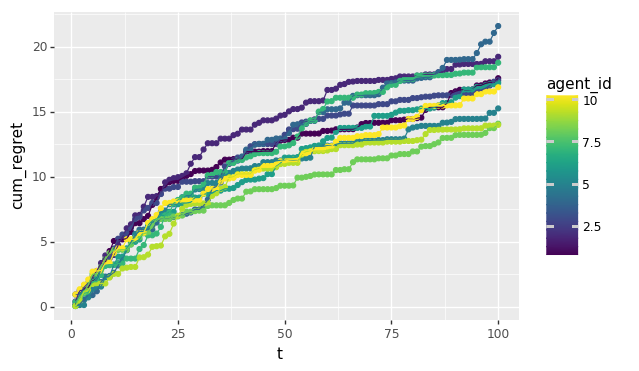

<ggplot: (8727264979529)>


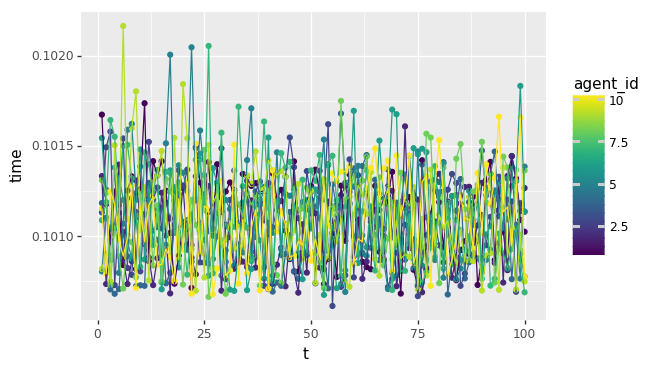

<ggplot: (8727264775933)>


In [7]:
n_steps=100

hyperparameter_sweep(make_mala_agent, [[0.1/2**n] for n in range(10)], dim, var, n_steps, seed=2, verbosity=1)

#hyperparameter_sweep(make_mala_agent, [[0.1/2**n] for n in range(10)], dim, var, n_steps, seed=1, verbosity=1)

theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521]
Experiment: Step 0
 Sample: array([ 0.13175572, -0.28934178, -0.12752306, -0.25285463,  0.06430609,
        0.1524583 ,  0.09650458, -0.6699379 , -0.20948511,  0.02955357,
       -0.78312732,  0.49398686,  0.6589658 ,  0.17248622, -0.02293238,
       -0.66459461, -0.86970662,  0.53892774,  1.03356754, -0.03309126])
 Accept proportion: 0.098214
 Steps taken: 224
 Sample: array([-0.08492815,  0.93793094, -0.80677878, -0.15077043,  0.14422995,
       -0.03199005,  0.42768992,  0.24137886, -0.50572745, -0.26498012,
       -0.58838305,  0.13899139,  0.16053882, -0.13295878, -0.49167394,
        0.53169298,  0.63458772, -0.65172009,  0.53590783,  0.38098044])
 Accept proportion: 0.360856
 Steps taken: 327
 Sample: array([-0.55263256,  0.41377753,

 Sample: array([-0.21749641, -0.57563387, -0.39206483, -0.55550409, -0.54941069,
       -1.6683193 , -0.97493358, -0.13313407,  0.34919159, -0.27356972,
        0.08304442, -0.65384205,  0.66308282,  1.10131484, -0.60778024,
       -0.03330629, -0.98113984, -0.53078195, -0.31170694, -0.71717343])
 Accept proportion: 0.709091
 Steps taken: 440
 Sample: array([ 0.21301924,  0.35227058, -1.02023869, -0.05272347, -0.47858756,
        0.93057477, -0.84227633,  0.64162529, -0.2984451 , -0.37077828,
       -0.59412155,  0.96715519,  0.1858634 , -0.62921931,  0.07441703,
       -0.09470305, -0.08734272, -0.20514069, -0.98949928, -0.43331525])
 Accept proportion: 0.773756
 Steps taken: 442
 Sample: array([ 0.57393773,  0.41821923,  0.39175917, -1.09412029,  0.70362973,
       -0.59758536,  0.21002989, -0.24879822,  0.37835658, -0.47844356,
       -0.22769677, -0.7238107 ,  0.66462633,  0.05530688, -0.0532679 ,
       -0.20256127, -0.82460724,  0.6494326 , -1.11512472, -0.62241312])
 Accept prop

 Sample: array([ 1.17191697, -0.8222739 , -0.869071  ,  0.25321705, -0.09241434,
       -0.8204358 ,  0.01026431, -0.14331951, -0.0589098 , -1.23062648,
       -0.41054421, -0.17299166, -0.51320793, -1.07844009, -0.56332605,
       -0.86206633,  0.53516374,  0.03073602,  0.17456307, -0.40583485])
 Accept proportion: 0.972350
 Steps taken: 434
 Sample: array([-0.18993637,  0.32547417, -0.57832953, -0.20329871, -0.10062911,
       -0.68786072,  0.05866485, -0.37647016, -0.1226378 , -0.49837233,
        0.81914342,  0.15573187,  0.2009773 ,  0.79756039, -0.01488852,
       -0.17829772,  0.17112421,  0.18752502,  0.0539025 , -0.06012671])
 Accept proportion: 0.963719
 Steps taken: 441
Experiment: Step 5
 Sample: array([ 0.29155506,  0.55043794, -0.35556434, -0.70011033,  1.46460035,
        1.14627785, -0.2553953 , -0.70899299,  1.28972359, -0.08213706,
       -0.61851098, -0.18239182,  0.12020058, -0.71247918, -0.10137565,
       -0.83095089, -1.40943397,  0.16413085, -0.46402423, -0.2189

 Sample: array([ 0.91906121, -0.24105996, -1.08722151, -0.25292705,  0.44942668,
       -0.28212039,  1.61695643, -0.37727814,  0.57310752,  0.06540605,
       -0.50555638, -0.05360866, -0.09064422, -0.98717284, -0.06668736,
        0.59049626,  0.33204481, -0.26536015,  0.70768672,  0.45955683])
 Accept proportion: 0.640187
 Steps taken: 428
 Sample: array([-0.27224234,  0.13955081,  0.96390542,  0.76822222, -0.22129365,
        0.35948794, -0.05564236, -0.60714962,  0.69376688,  0.67363031,
       -0.34464111,  0.14282838,  0.43261764, -0.36927623,  0.57407615,
        0.41489401,  0.06554491, -0.21401322,  1.47686232, -0.09265456])
 Accept proportion: 0.732558
 Steps taken: 430
 Sample: array([ 0.85507017,  0.24528663, -0.47477768,  0.06672682, -0.32649418,
        0.17691761,  0.7893947 , -0.0424643 ,  0.49945727,  1.38854353,
       -1.17873383,  0.05581448, -1.11255363,  0.55641396,  0.13960893,
       -0.11788907, -0.03722643, -0.30505499, -0.12818056,  0.10087657])
 Accept prop

 Sample: array([ 0.28608057,  0.02348466, -0.84767692, -0.33401599, -0.0275306 ,
       -0.72448093, -0.1747905 , -0.39614977, -0.12269385,  0.32584526,
       -0.694054  , -0.15502627,  0.79689154,  0.23443567, -0.31134807,
       -0.20599208, -0.30742632, -0.18867382, -1.48336523,  0.38733574])
 Accept proportion: 0.903981
 Steps taken: 427
 Sample: array([ 0.34184483,  1.11180807,  0.00303532, -0.5582252 ,  1.01742763,
       -0.49499108,  0.2766166 , -0.17854524,  1.30571683, -0.34110407,
        0.2054094 ,  0.67352998,  0.10606425, -0.56061775, -0.94278506,
        0.20183747, -0.36527347, -0.22118243,  0.1661446 ,  0.27048587])
 Accept proportion: 0.942396
 Steps taken: 434
 Sample: array([ 2.25061602, -0.52653953, -0.60353736, -0.15827205,  0.01285505,
       -0.38198055, -0.18502188,  0.72097684,  0.24880126, -0.00859326,
       -0.85448635, -0.38789277, -0.41835173,  0.76736022,  0.01120515,
       -0.95002469, -0.07677919,  0.16181501, -0.08296992,  0.47500509])
 Accept prop

 Sample: array([ 0.60078539, -0.00967215, -0.72031926,  0.07131863,  1.12015056,
       -1.18595174,  0.16973582,  0.4504955 , -0.19104537,  0.30142653,
        0.40105702, -0.42175156, -0.08659961,  0.61439517,  0.00671788,
       -0.00243881,  0.50086386,  0.99247118, -0.01758119,  0.7412875 ])
 Accept proportion: 0.354460
 Steps taken: 426
 Sample: array([ 0.37914903, -1.00237941, -1.0788548 , -0.37417204, -0.99605682,
       -0.21081478, -0.31833843,  0.43440778,  0.98680381,  0.14482218,
        0.18151453, -0.44875792,  0.06087129,  0.31255539,  0.26832175,
       -0.9603683 ,  0.66302579, -0.37885285, -0.66562288, -0.1131264 ])
 Accept proportion: 0.531323
 Steps taken: 431
 Sample: array([ 0.89729577, -1.02054375,  0.12343467, -1.10571644, -0.10636768,
       -0.79534385,  0.68313017,  0.51934452,  0.52724922,  0.15036388,
       -0.17933522, -1.04641381, -1.03185057, -1.05667032, -0.57059419,
       -0.62478765,  0.25022609, -0.25265112,  0.16404593, -1.07260829])
 Accept prop

 Sample: array([ 0.98675397, -0.31810653,  0.12623886,  0.19633778,  0.32262805,
       -1.04627803, -0.14191444,  0.50201199, -0.78455757,  0.28253972,
        0.49132079,  0.64325895, -0.07300689,  0.00219768,  0.63008623,
        0.63847325, -0.94035511, -0.66512968, -0.48816696,  0.10939163])
 Accept proportion: 0.811321
 Steps taken: 424
 Sample: array([-0.23543046, -0.44440519, -0.68161205, -0.80953197,  1.23573769,
       -0.71111108, -0.71205611, -0.89113775,  0.11049659, -0.71608982,
        0.10644338,  0.35125621, -0.06914598, -0.70231912, -0.92108277,
        0.21245136, -0.21295809,  0.01508054,  1.00100728, -0.3182973 ])
 Accept proportion: 0.873832
 Steps taken: 428
 Sample: array([ 0.33214451, -1.12174288, -0.55988256, -1.45109489,  0.5481777 ,
        0.63444751,  0.23241819,  0.65355645, -0.59057646,  0.51234238,
        0.68861088, -0.05723287,  0.67223361, -0.32923168,  1.44111468,
       -0.20762724,  0.16042904,  0.15914933,  0.38178896, -0.06547307])
 Accept prop

 Sample: array([ 2.17694754, -0.502978  ,  0.21848981, -0.42338279,  0.56050263,
       -0.29525123,  1.16067199, -0.80812593,  0.97913244,  0.38788055,
       -0.165834  , -1.5919973 ,  0.7175438 ,  0.94254737,  1.06396902,
       -0.80781241, -0.18229475, -0.34675426, -0.42801759, -0.72698849])
 Accept proportion: 0.950588
 Steps taken: 425
 Sample: array([-0.9608342 ,  0.11285659,  0.2048375 , -0.2014465 , -0.31706522,
       -1.46648562,  0.24757017, -1.25110243, -0.71406785,  0.84641443,
        0.53791536, -0.3555277 , -0.13367362, -0.12767271,  1.05062357,
       -0.26116327,  0.95358499, -0.13989223, -1.20981123, -0.17514268])
 Accept proportion: 0.962441
 Steps taken: 426
Experiment: Step 17
 Sample: array([ 0.77532883, -0.39146587, -0.53794271, -0.15099397,  1.36284133,
       -0.51604565, -0.39640926, -0.18285389,  0.10144828,  1.14132257,
        0.69235501, -0.22346353,  1.26319548,  0.17366309,  0.34251403,
        1.53323051,  0.32479769,  0.7378208 ,  0.26824277,  0.727

 Sample: array([ 1.31020025, -0.44988938,  0.19751804, -0.77722799,  0.0395291 ,
       -0.05165457,  0.40990245, -0.04298381,  0.39993436,  0.64827048,
       -0.28836683,  0.10059929,  0.24796088, -0.76729295,  0.14756777,
        0.37464887,  0.85659888, -0.19091513,  1.00800776,  0.07112118])
 Accept proportion: 0.636145
 Steps taken: 415
 Sample: array([-0.25374903, -0.93125942, -0.96447194,  0.34516307,  0.2255325 ,
       -0.76070101, -0.53206081, -0.28759702,  0.02567692,  0.50549877,
        0.10623998, -0.46994409, -0.56055962,  0.07177127, -0.44263063,
        0.01915527, -0.43280898, -0.35034371,  0.0136927 , -0.61924412])
 Accept proportion: 0.716667
 Steps taken: 420
 Sample: array([ 0.46419662, -0.69165166,  0.51069838, -1.04237856, -0.20226329,
       -0.37630275, -0.88952679,  0.69891381, -0.60933779,  0.67479901,
       -0.41336165,  0.0922938 ,  1.44234949,  0.49187796,  0.84898534,
       -0.51163737, -0.49920299,  0.30179954,  0.35005613,  0.83840083])
 Accept prop

 Sample: array([-0.27006341, -1.54541458, -0.76147671, -0.94925705,  0.94846042,
       -0.11857742,  1.05840666,  0.59840249, -0.5436479 ,  0.52653029,
        0.31076325,  0.33364911, -0.10707026,  0.37550347,  0.43976058,
       -0.34179932,  0.40689617, -1.00706552, -1.20874158, -1.03827287])
 Accept proportion: 0.908867
 Steps taken: 406
 Sample: array([ 0.49584225, -0.01624925, -0.39686021, -0.94372978,  0.43142753,
        0.06566409, -0.04332257,  0.5825106 ,  0.84655364, -0.37501739,
        0.30152543, -0.09616055,  0.13998925, -0.59859845,  0.13143936,
        0.08577916, -0.0760636 , -0.4891556 ,  0.38617708,  0.52451746])
 Accept proportion: 0.947103
 Steps taken: 397
 Sample: array([ 1.28511419,  0.14496838,  0.50777616,  0.23867397,  0.38185777,
       -0.72853493,  0.6324356 , -0.13299434,  0.54083438,  0.35265452,
        0.24162506, -1.03843681,  0.63761002, -0.08517215,  0.5502327 ,
       -0.57844358,  0.76683355, -0.48045069, -0.74513802, -0.68856445])
 Accept prop

 Sample: array([ 2.01894458,  0.14130347,  0.21791337, -0.30680623,  0.54015684,
       -0.72952344, -0.74111658, -0.67363033,  0.08423728,  0.35075571,
        0.88449112, -0.19566342, -0.08381714, -0.91139127, -0.61181306,
        1.42373678, -0.4159926 ,  0.83717957, -0.38320053,  2.19636461])
 Accept proportion: 0.400485
 Steps taken: 412
 Sample: array([ 1.00558953e+00, -7.35539098e-01, -3.70411371e-02, -1.06144200e-01,
        6.88581232e-02,  1.50387798e-01,  1.76722159e-01, -6.68226142e-01,
        3.42671310e-04,  1.50128329e+00,  7.53581791e-01, -3.63552289e-01,
        9.61582975e-01,  1.44496023e-01,  4.01357218e-01, -1.05736817e+00,
       -4.16946303e-02, -7.95268515e-02,  5.13905589e-01,  4.59327339e-01])
 Accept proportion: 0.582126
 Steps taken: 414
 Sample: array([ 0.5819879 ,  0.07378103, -0.76400211, -1.47338697, -0.18860646,
       -0.31421738,  1.58921019, -0.42537359,  0.55669432,  0.22193869,
        0.58326529, -0.20401945, -0.48775031, -0.5893881 , -0.25271016

 Sample: array([ 0.35021603, -0.0581554 ,  0.23996869, -0.17982292,  0.64745237,
       -0.13649844,  0.76338024,  0.43357131, -0.87483043,  0.41844717,
       -1.58728331,  0.41783158,  0.76652012,  0.36760405,  1.62913029,
       -0.81793256, -0.50242661, -0.47848486,  1.07584247,  1.13181806])
 Accept proportion: 0.845209
 Steps taken: 407
 Sample: array([-0.23772496, -0.16756   ,  0.7880844 , -0.60535762,  0.50348192,
       -1.3229821 ,  0.0535222 , -0.10073415,  0.40670018,  0.56081347,
       -0.24515962, -0.1017113 , -0.13747993, -0.97889882, -0.39455983,
        0.94274367,  0.79468792, -0.04363646,  0.2939835 , -0.31735516])
 Accept proportion: 0.866180
 Steps taken: 411
 Sample: array([ 0.87982493, -0.38934342,  0.02750612, -0.55083788,  0.1873095 ,
        0.1970115 ,  0.04960933,  0.74059723, -0.39581386,  0.04027963,
        0.61674994,  0.34973521, -1.41528225, -0.60418098,  0.69282608,
        0.68114391,  0.28537155, -0.22282787, -0.66535223,  0.68122681])
 Accept prop

 Sample: array([ 1.49261555, -1.22463943,  0.84667368, -0.73449044, -0.20040908,
       -0.90808504, -0.17827412,  0.54565352,  1.20172982,  0.30711769,
        0.24755425,  0.22252758,  0.15648687,  0.01603721, -0.17170429,
        0.35558383, -0.71687775, -0.23701188, -1.41831296,  0.19580866])
 Accept proportion: 0.967742
 Steps taken: 403
 Sample: array([ 0.02131076,  0.07191631,  0.25526855, -0.84042351, -0.25202914,
       -1.42313993,  1.02211968, -0.54480863,  0.40057941,  1.10253654,
       -0.69896422,  0.18938953, -0.64925951, -0.68168524,  0.67128785,
       -0.17997453, -0.46158459,  0.60498466, -1.1988501 ,  0.38839803])
 Accept proportion: 0.972772
 Steps taken: 404
Experiment: Step 29
 Sample: array([ 1.90369437, -0.32583778,  0.80241341, -0.25978709,  1.47524617,
       -0.34442522,  0.82676759,  0.5692661 ,  0.27363781,  0.14391025,
       -0.09272294, -0.88135162,  0.54766209,  0.67604489,  0.07667829,
        0.96849188, -1.39420833,  0.82202189, -0.25094835,  0.342

 Sample: array([ 1.05434766,  0.45302343,  0.55934515, -0.50334104,  0.06889446,
       -1.10149434,  0.50411175, -0.47676546,  1.02883827, -0.09575405,
        0.22696371, -0.54830916, -0.18731427, -1.25651215, -0.91442547,
       -0.33670596,  1.13119166, -0.04083742,  0.67723409,  0.64166398])
 Accept proportion: 0.705000
 Steps taken: 400
 Sample: array([-0.20827584, -0.82683663, -0.62442298,  0.11403564, -0.26255725,
       -0.86757758,  0.25961175, -0.82786617, -0.49732519, -0.72293559,
        0.30595681, -0.8592891 , -0.85221658, -0.50491747,  0.54490447,
        1.0090284 , -0.7553908 , -1.11409689,  0.19448398, -0.01608876])
 Accept proportion: 0.740000
 Steps taken: 400
 Sample: array([ 0.31895218,  0.55003467,  0.17702169, -0.60581325,  0.07710687,
       -0.92268214,  1.34390227, -0.70942872,  0.53655942,  0.26358902,
        0.20079535,  0.53256034,  0.25467792, -0.72907167,  0.7965503 ,
       -0.35032439, -0.75419614, -0.22002337,  0.33229132,  0.50291945])
 Accept prop

 Sample: array([ 0.3516919 ,  0.11628412,  0.12986101, -1.28560672,  0.70470516,
        0.56895386,  1.44699344,  0.98053104, -0.6578125 ,  0.74766764,
        0.2829806 ,  0.36990019, -0.31190313, -0.69656058,  0.25751735,
        0.3586227 , -0.3513107 , -0.87939386, -1.52540569,  0.58187545])
 Accept proportion: 0.904040
 Steps taken: 396
 Sample: array([ 0.87598356, -0.65186976, -0.67083135, -1.02788624,  0.15595725,
       -0.8996637 ,  0.3447587 ,  0.03972073,  1.02189469, -0.32999215,
        0.79876278,  0.26149289,  0.43581907, -1.04612025, -0.38099482,
        0.27326926,  0.39308387, -0.04483551,  0.6277074 , -0.09565012])
 Accept proportion: 0.967419
 Steps taken: 399
 Sample: array([ 1.86915835, -1.7841666 ,  0.64639487, -1.03687468, -0.37901724,
       -0.9484133 , -0.1073974 , -0.74366604,  0.31293161,  0.89803689,
        0.27911459, -0.11051926, -0.0997957 , -0.89057564,  0.27870334,
       -0.35325515, -0.60485618, -0.99627801, -1.55960397, -0.02251005])
 Accept prop

 Sample: array([ 1.43389757,  0.03735681,  0.65546093, -0.77047603,  1.11816544,
       -0.73103321,  0.75022628, -1.19185963,  0.60731715,  0.30065952,
       -0.73096178, -0.4427612 , -0.46990824,  0.38051985,  0.05091633,
       -1.22920892,  0.38650079, -0.33065003, -0.82312067,  1.47318256])
 Accept proportion: 0.419689
 Steps taken: 386
 Sample: array([ 0.45795997, -0.22292486, -0.74212904, -0.96032181, -0.33695618,
        0.20410977,  0.35355738, -0.14430383,  0.22473   ,  0.40608086,
        1.40526106, -0.0181082 , -0.19132781,  1.20347327,  0.36535673,
       -1.80689461,  0.07694456, -0.1158073 ,  0.42411708,  0.43811492])
 Accept proportion: 0.573201
 Steps taken: 403
 Sample: array([ 0.87868965, -0.33022933,  1.11448259,  0.00773992, -0.02398007,
        0.10275179,  1.0443506 , -0.63726157,  0.38275836,  0.2051276 ,
        1.04785711, -0.14509389, -1.34785569, -0.01825348, -1.20445711,
        0.05117354,  0.52823388,  0.28621164,  0.54660984,  0.7465883 ])
 Accept prop

 Sample: array([ 0.06102339,  0.15072396,  0.41783046, -0.50208537, -0.2285541 ,
       -0.75482428,  0.74505621, -0.44212449,  0.29688694, -0.29378554,
        0.27093797,  0.5456566 ,  1.15206908, -0.43571362,  2.03966246,
       -0.99237087, -1.31155651, -0.46464866,  0.65345966,  0.72471096])
 Accept proportion: 0.842239
 Steps taken: 393
 Sample: array([-0.14581541, -0.12546191,  0.73315116, -0.0383572 ,  0.90384864,
       -1.48011072,  0.38678053, -0.86036863, -0.09167927, -0.29531438,
        0.89082841,  0.26581521, -0.06901381, -0.07408255,  0.33980617,
        0.12541116, -0.13889445,  0.10177466,  1.21745056, -0.14325771])
 Accept proportion: 0.916031
 Steps taken: 393
 Sample: array([ 0.57664692,  0.79431535, -0.30216989, -0.82098747,  0.02592117,
        0.24781978,  1.16348423,  0.04505726, -0.31175588,  0.14623029,
        0.135729  , -1.18549696,  0.19768612, -0.06461469,  0.54556301,
        0.09637182,  0.60007994, -1.88408045, -0.4343012 ,  0.22739107])
 Accept prop

 Sample: array([ 2.00539125, -1.57685258,  0.46291915, -0.519594  , -0.21131361,
       -1.07247899,  0.04384989, -0.68027313, -1.28383609, -0.21020074,
       -0.14455739, -0.86938592, -0.24042044, -0.92149124,  0.42261794,
       -1.29255985, -0.89700504,  0.16620189, -1.27260345,  0.51343514])
 Accept proportion: 0.961832
 Steps taken: 393
 Sample: array([ 0.38819992, -0.18689425,  0.4270612 , -1.55484057, -0.16106221,
       -1.50497193,  0.56862287, -1.04065859, -0.42383967,  0.30675913,
        0.74573842, -0.60645245,  0.81300776, -0.52035966,  0.76322662,
       -0.93079024,  0.39428862, -0.03686051, -0.27656578,  0.07569562])
 Accept proportion: 0.992327
 Steps taken: 391
Experiment: Step 41
 Sample: array([ 1.24441746, -0.14412462,  0.32857486, -1.15224277,  0.68990457,
       -0.23426494,  0.78470063, -0.23492451, -0.29259447, -0.1241969 ,
       -0.40748265, -0.07790083,  0.60316482, -0.11187256, -0.21004233,
        0.19617056,  0.12482171,  0.30443906, -0.02886134,  0.935

 Sample: array([ 1.31323732, -0.85437267,  0.12332213, -0.22195439,  0.68122501,
       -0.40780083,  1.35980844, -0.72540978,  1.00358966,  0.03760023,
        0.72287807,  0.1908279 ,  0.01771443, -0.7026394 ,  0.1012584 ,
       -0.75063706, -0.26745695, -0.30064554,  0.21011317,  0.15643028])
 Accept proportion: 0.724409
 Steps taken: 381
 Sample: array([-0.73904503, -1.34198953, -0.8943576 , -1.12112815, -0.40777796,
       -0.72206301,  0.48022031, -0.99113316,  0.8026239 , -0.8697287 ,
        0.0545306 , -0.89992706,  0.28661638, -0.68694327,  0.33002736,
        1.14589205, -0.50516846, -0.51174406,  0.17311354, -0.3618002 ])
 Accept proportion: 0.812987
 Steps taken: 385
 Sample: array([-0.11738194, -0.15754227, -0.42974213, -0.164805  ,  0.16289564,
       -1.11404052,  0.32057316, -0.17753014, -0.72427488, -0.35174391,
        0.57262685,  0.16894739, -0.16788061, -1.44658247,  1.39896712,
       -0.06589384, -1.59574088,  0.4838392 , -0.17299495,  1.27601471])
 Accept prop

 Sample: array([ 0.08996396,  0.57169572,  0.1977938 , -0.52069873,  0.06246372,
       -1.26347877,  1.16580265,  0.33159272,  0.06122184,  0.06529971,
       -0.11804567, -0.19037181, -0.12412368,  0.44496765,  0.42405945,
       -0.79000984,  1.13800668, -0.58813291, -0.66674676,  1.06437254])
 Accept proportion: 0.919271
 Steps taken: 384
 Sample: array([ 0.73621445,  0.03939863, -0.53883945, -1.05731673,  1.19075105,
       -0.83396788,  0.34046605, -0.34356371,  0.2791685 , -0.05679659,
        1.47507607,  0.61617049,  0.34789033, -1.05340581,  0.13210743,
        0.42618741,  0.34276086, -0.13566789,  0.06426247,  0.85170952])
 Accept proportion: 0.950649
 Steps taken: 385
 Sample: array([ 2.26625889, -1.23364885,  0.85617568, -0.99860011, -0.6014846 ,
       -0.40398868,  0.06028105,  0.22591766, -0.67942628, -0.52291492,
       -0.43285971,  0.12187775,  0.28225651, -1.10511539,  0.73044735,
       -0.33151361, -0.69412971, -0.21685351, -0.7850977 ,  0.06889847])
 Accept prop

 Sample: array([ 1.20513667, -0.96096347,  0.16338217, -1.08357796,  0.47642823,
       -1.17691526,  0.63899045, -0.55071857, -0.20488367, -0.49053099,
       -1.33720343,  0.51191105, -0.73964003,  0.40088759,  0.46918427,
       -1.58530221, -0.08299429,  0.32998029, -0.39562602,  0.84389449])
 Accept proportion: 0.450777
 Steps taken: 386
 Sample: array([ 0.06234824, -0.1731021 , -0.79927642, -0.78315856, -0.2236645 ,
       -0.91467675,  1.58784591, -0.58243297, -0.00809015,  0.16111129,
        1.27775897, -0.87306313, -0.15585188, -0.55766495, -0.06813853,
       -0.96039555, -0.3531917 , -0.07296821,  0.00604365, -0.60196107])
 Accept proportion: 0.610825
 Steps taken: 388
 Sample: array([ 0.76580165, -0.3034773 ,  0.40442376, -0.39136512,  0.56018329,
       -0.61579074,  1.63539157,  0.06737742,  0.00980647, -0.46049047,
        0.57516618,  0.2091048 , -1.20072044, -0.92613953, -0.21053019,
       -0.44806497, -0.74283569,  0.68949501,  0.18726566,  0.35562843])
 Accept prop

 Sample: array([ 8.87124093e-01, -5.26702653e-01, -6.92455509e-04, -8.18502580e-01,
       -6.21055709e-02, -1.99146508e+00,  6.49055506e-01, -8.23747498e-01,
       -7.62740392e-01,  2.60747338e-01, -3.72114462e-01, -2.58199426e-02,
        1.16715477e+00,  3.79325587e-01,  4.26441864e-01, -9.57839006e-01,
       -9.31715146e-01, -1.28353062e-01,  2.65217385e-01,  1.15258599e+00])
 Accept proportion: 0.848000
 Steps taken: 375
 Sample: array([ 0.77787393, -1.5360651 , -0.30886556, -1.0315962 ,  0.41652407,
       -2.26041499,  0.38420561, -0.2970524 , -0.71892178,  0.96009259,
        1.24084455,  0.37693493,  0.35750945,  0.30710826,  0.23719318,
        1.1760615 , -0.04490414,  0.10598927,  0.84964872,  0.66770312])
 Accept proportion: 0.888312
 Steps taken: 385
 Sample: array([ 0.67282799,  0.050323  , -0.5760322 , -0.83053057, -0.54306646,
       -0.76854368,  0.36520226,  0.80887139, -0.46342905,  0.11940148,
        0.3474672 , -0.90728256,  0.27760164, -0.68333586,  0.38898988

 Sample: array([ 2.27994387, -0.50901633,  0.09264911, -1.35246893,  0.1422036 ,
       -0.73635893,  0.70334421, -0.2240504 , -0.5755138 ,  0.26333892,
       -0.46474678,  0.00410274,  0.68650332, -1.04034505,  0.34259226,
       -1.45823155, -0.03321234, -0.75479457, -0.89476107,  0.31286551])
 Accept proportion: 0.970822
 Steps taken: 377
 Sample: array([ 0.42388998,  0.05278634,  0.68485858, -1.05415796,  0.80898331,
       -1.42423383,  1.20006633, -0.62395584, -0.34898353,  0.33334859,
        0.75871543,  0.31721006,  0.17498956, -0.99896852,  1.20526022,
       -0.85955537,  0.31049627, -0.18205981, -0.23302677,  0.07834965])
 Accept proportion: 0.989446
 Steps taken: 379
Experiment: Step 53
 Sample: array([ 1.58742229e+00, -3.66169988e-01,  5.92255365e-01, -7.44128247e-01,
        7.81962313e-01, -1.33769040e+00,  9.32044508e-03,  3.12704134e-01,
        2.96982984e-01, -8.77006636e-01,  6.56513745e-01, -1.45443798e-03,
       -9.29982397e-02,  7.25344189e-01,  4.15906012e-01

 Sample: array([ 1.24954936, -0.3687664 ,  0.349474  ,  0.40287388, -0.31028131,
       -0.95703213,  1.28616919, -0.54351161, -0.45455336, -0.16958113,
        0.70573948,  0.11965272, -0.38250454, -1.01406998,  0.68691233,
       -1.14363357, -0.04475116,  0.03151767, -0.47499248,  0.22805975])
 Accept proportion: 0.736413
 Steps taken: 368
 Sample: array([-0.56295984, -1.1622972 , -0.84370838, -0.78212045, -0.04718681,
       -0.88232084,  0.19160252, -0.09525139, -0.12140213,  0.05074486,
        0.67003625, -0.87646095,  0.37876154, -0.98420177,  1.40639973,
       -0.05773106, -0.25727718, -0.94366676,  0.68484895,  0.09269188])
 Accept proportion: 0.806971
 Steps taken: 373
 Sample: array([ 0.25493544,  0.26675209,  0.39862505, -0.45916388,  0.94285221,
       -0.64998943,  0.44135257, -0.86149562, -0.27588717,  0.68091345,
       -0.58246272, -0.37406323,  0.09078017, -0.13121973,  1.81441456,
       -1.30507687, -0.55385536, -0.35523863,  0.5541742 ,  0.62470731])
 Accept prop

 Sample: array([ 1.64729838,  0.28909136, -0.90151457, -1.48165372,  0.70345035,
       -0.33914184,  1.96309299,  0.35590435, -0.42270482,  1.17567238,
       -0.04191762, -0.59261852, -0.06662929, -0.32903016,  0.13854512,
       -0.68596335,  1.20458333, -0.05646331, -0.96251542,  0.36459725])
 Accept proportion: 0.907609
 Steps taken: 368
 Sample: array([ 1.16323221, -0.52216619,  0.4192277 ,  0.13052655, -0.04905254,
       -1.1904968 ,  1.11621463,  0.05269345,  0.7733619 ,  0.25879831,
        1.10664354, -1.05846473,  0.11488427, -0.88202202,  0.30025657,
       -0.52922453, -0.22078241,  0.1262127 , -0.72609341,  0.09457378])
 Accept proportion: 0.927614
 Steps taken: 373
 Sample: array([ 1.98351218, -0.96662891,  0.08565257, -0.38610674,  0.50003722,
       -1.64827237,  0.32073401, -0.2541614 , -0.73062569,  0.64974938,
       -0.29151773,  0.23355275, -0.74608842, -0.15826324,  0.25274893,
       -1.54249401, -0.37993057, -0.6710696 , -0.97107245,  0.55035661])
 Accept prop

 Sample: array([ 1.92873386, -0.23152126,  0.25725898, -1.62674594,  0.06521493,
       -0.69751039,  0.82141565, -0.16306127,  0.57210982,  0.25702478,
        0.30965587, -0.12628873,  0.28548438,  0.85068992,  0.3620989 ,
       -0.6927665 ,  0.67131398, -0.21819152, -0.01956656,  0.61358638])
 Accept proportion: 0.439024
 Steps taken: 369
 Sample: array([ 0.22755488, -0.19730378, -0.23190903, -1.59617233,  0.15197047,
       -0.33032331,  0.97242761, -1.02916869, -1.03101263,  0.53334424,
        1.72936923, -1.66944204, -0.56626531,  0.48792777,  0.37291708,
       -1.65385078, -0.37444861,  0.14179562,  0.29450609, -0.34830061])
 Accept proportion: 0.592992
 Steps taken: 371
 Sample: array([ 0.83445702, -0.37166568,  0.06411162, -0.02242679,  0.57965404,
       -0.40952828,  1.16868103, -0.06242552, -0.01844472, -0.3070158 ,
        1.4410487 , -0.26741473, -0.71286653, -0.6327144 , -0.40796333,
       -0.24899594,  0.24959424,  0.00781724,  0.56535653,  0.12138231])
 Accept prop

 Sample: array([ 0.9183416 ,  0.09278231,  0.04272379, -1.09946029, -0.15223936,
       -0.43573848,  1.51703153, -0.60814896, -0.58065035,  0.70831166,
       -0.44370394, -0.45934216,  1.92605084,  0.16404553,  1.27831627,
       -1.20944294, -0.64988674, -0.29154063,  0.42104809,  0.9130024 ])
 Accept proportion: 0.864266
 Steps taken: 361
 Sample: array([ 0.32655287, -0.34922725,  0.64909878, -0.84348685, -0.09468029,
       -1.73795434, -0.18655382, -0.25505457, -0.87638678, -0.20945738,
        0.71819936, -0.31897059, -0.17764208, -0.33031141, -0.35207766,
       -0.24970667, -0.08688225,  0.31398167,  0.49820304,  0.60784027])
 Accept proportion: 0.898630
 Steps taken: 365
 Sample: array([ 0.80167985,  0.04502979, -0.44538124, -0.9596704 ,  0.50064861,
        0.53511414,  1.04457418,  0.3571819 , -0.54292615,  0.55563963,
       -0.50375319, -0.57417405,  0.09328914, -0.25525175,  1.09125484,
       -1.34160747,  0.87208239, -0.10663576, -1.23289758,  0.37950108])
 Accept prop

 Sample: array([ 1.51551458, -0.88183657,  0.67102405,  0.02929808,  0.38762893,
       -0.93339435,  0.73934472, -0.43677779, -0.52003067,  0.0511367 ,
        0.69983703, -0.86382082, -0.32478864, -0.27355634, -0.02417986,
       -0.76504997, -0.55612981, -0.92316734, -1.02088561,  0.45763575])
 Accept proportion: 0.972727
 Steps taken: 330
 Sample: array([ 0.64620597, -0.06294273, -0.54908034, -1.25673113, -0.27476169,
       -1.07866468,  0.77051641, -1.41522398,  0.34734643,  0.72991349,
        1.16227438,  0.17712309, -0.64648618, -0.9100552 ,  0.41295777,
       -0.64854848,  0.57591028,  0.35234379, -0.11822701, -1.09083944])
 Accept proportion: 0.957831
 Steps taken: 332
Experiment: Step 65
 Sample: array([ 1.81251072, -0.34301157,  0.35009117, -1.69568664,  0.41988443,
       -1.1266866 ,  1.44472714,  0.23367019,  1.1761059 , -0.08606949,
       -0.61071409,  0.2781723 ,  0.08142125,  0.92212343,  0.54107853,
       -0.77120551,  0.74049397, -0.06490208, -0.58331894,  0.439

 Sample: array([ 1.78075554,  0.3493501 ,  0.49694844, -0.12049372,  0.05900968,
       -0.95605866,  0.77482733,  0.23189216,  0.77553031,  0.38102961,
        0.7390862 , -0.43281697, -0.85693073, -0.42497656,  0.3670241 ,
       -0.77153771,  0.15214992, -0.07158628,  0.16627236,  0.24232845])
 Accept proportion: 0.663889
 Steps taken: 360
 Sample: array([ 0.07445668, -0.68845128, -0.63851388, -0.20311125,  0.1565035 ,
       -0.95760791,  0.85395955, -0.22363484,  0.10216298, -0.80462084,
        0.49254438, -1.29616095,  0.30804132, -0.42755305,  1.38987113,
       -0.92385747, -0.35030221, -0.87416839,  0.1904272 ,  0.44279762])
 Accept proportion: 0.825000
 Steps taken: 360
 Sample: array([ 0.7200386 , -0.16719392,  0.39808662, -0.50342729,  1.11002762,
       -1.40443328,  1.59042632, -2.09659937, -0.51408355,  0.03661847,
       -0.5652843 , -0.11770735,  1.68876352, -0.88782259,  1.31179148,
       -1.77692497, -1.27008067, -0.7620491 , -0.28745314,  1.57760681])
 Accept prop

 Sample: array([ 0.84386923,  0.56894393, -0.43106843, -0.70547204,  0.04266438,
       -0.46272773,  1.42690268,  0.7407848 , -0.30061057,  0.03846053,
       -0.5989208 , -0.34000809,  0.19387876, -0.34057198,  0.64167714,
       -1.10630879,  1.09218978, -0.67023348, -0.91763462,  0.27648268])
 Accept proportion: 0.929775
 Steps taken: 356
 Sample: array([ 1.47570334, -0.29864113, -0.64770434, -0.66343987,  0.56497666,
       -0.94183458,  0.73345887, -0.06911755,  0.46239115,  1.06454741,
        0.97745361, -0.49445958,  0.69708305,  0.2359949 ,  0.31727861,
       -0.85329631,  0.04997189, -0.9646752 ,  0.59516435,  0.61299608])
 Accept proportion: 0.950000
 Steps taken: 360
 Sample: array([ 1.93106981, -0.47429877,  0.35223023, -0.64179371,  0.18351606,
       -0.75941   , -0.0146757 , -0.33826979, -0.61246537,  0.10703278,
       -0.24939934,  0.45595272, -0.16067686, -0.03429373, -0.02956181,
       -1.07960274, -0.19267447, -0.79044684, -0.91612706,  0.10544459])
 Accept prop

 Sample: array([ 1.46103344, -0.50163208,  0.31295762, -1.6347856 ,  0.01438278,
       -1.28184578,  0.89174958,  0.45767436, -0.08084219, -0.96916515,
       -0.02707357, -0.3974929 , -0.64621771,  0.30181985,  0.17122663,
       -1.45741219,  0.71208888,  0.46056691, -0.41275356,  1.29510882])
 Accept proportion: 0.478873
 Steps taken: 355
 Sample: array([ 0.47984065, -0.45897092, -0.22498747, -1.34169272,  0.07115608,
       -0.42818272,  0.60845693, -1.35566591, -0.49222311, -0.13699342,
        0.64658344, -1.66557686, -0.11191194,  0.36025141,  0.14970136,
       -2.0285929 , -0.09024786, -0.46044591,  0.02214185,  0.22069999])
 Accept proportion: 0.648876
 Steps taken: 356
 Sample: array([ 1.83033571, -0.53020935,  0.769873  , -0.78352477,  0.35132599,
       -0.70026195,  1.3714609 , -0.11039037, -0.44961931, -0.06625595,
        0.38631102, -0.22843244,  0.11703345, -1.14296305,  0.70694383,
       -1.2689751 , -0.12592048,  0.07741849,  0.44003368,  0.17363013])
 Accept prop

 Sample: array([ 1.03576565, -0.1053694 , -0.25196745, -1.24659962, -0.00636405,
       -1.50837351,  1.42828766, -0.63828526, -0.75341573,  1.34938919,
       -0.56661928, -0.57022757,  0.6169787 , -0.10611453,  0.4790955 ,
       -1.68167992, -1.33901627, -0.64060703,  1.15236401,  1.72844965])
 Accept proportion: 0.845714
 Steps taken: 350
 Sample: array([ 0.9403411 , -0.80241188,  0.83338829, -1.06812367,  0.14880379,
       -1.9634911 ,  0.36572661, -0.25675434, -0.84341717,  0.87367144,
        0.4900072 ,  0.252122  ,  0.38796185, -0.1091515 , -0.08311236,
       -0.73660596, -0.20942856, -0.11453808,  0.64033885,  0.43693771])
 Accept proportion: 0.940510
 Steps taken: 353
 Sample: array([ 1.22380404,  0.14455878, -0.87302649, -0.58144103,  1.08213451,
       -0.88597052,  1.80150002,  0.09961263, -0.68590075,  0.66878755,
       -0.09026678, -0.71241381,  0.07338885,  0.47904219,  0.9274828 ,
       -1.46235232,  0.544157  , -1.08123773, -0.70029117,  0.43849982])
 Accept prop

 Sample: array([ 1.66376568, -0.6330479 ,  0.53089766, -1.237956  ,  0.45417436,
       -0.63540164,  0.82770879, -0.6290138 , -0.31873888, -0.65407483,
        0.67947954,  0.0653462 , -0.34328337, -0.40300842,  0.03272761,
       -1.78935787, -0.05829081, -0.79640776, -1.05219527,  0.78124434])
 Accept proportion: 0.965418
 Steps taken: 347
 Sample: array([ 1.02476498, -0.6208455 , -0.08295786, -0.91561012,  0.52386967,
       -1.08574297,  0.59894172, -0.99676715,  0.08598995,  0.87569106,
        0.99380525, -0.82708173,  0.06843748, -0.33862314,  0.05336215,
       -1.51732131,  0.38676596,  0.29950243,  0.00517594, -0.31344122])
 Accept proportion: 0.974432
 Steps taken: 352
Experiment: Step 77
 Sample: array([ 1.39767201, -0.41337061,  0.36593529, -1.51471984,  0.33376751,
       -0.70846314,  0.96232106,  0.4831355 ,  0.10189014,  0.02492594,
       -0.86106152, -0.13518766, -0.85901661,  0.21227036,  0.46548683,
       -0.87854611, -0.02463955, -0.69032351, -0.05747759,  1.487

 Sample: array([ 0.75282816, -0.08336752, -0.12568274, -0.31962969, -0.14392199,
       -0.75220132,  0.8092431 , -0.87547499,  0.4827206 , -0.46732735,
        1.40051794, -0.85346696, -0.27912085, -0.17950951,  0.8435944 ,
       -0.80792081,  0.03825021, -0.31385951,  0.68125998,  0.08403156])
 Accept proportion: 0.717647
 Steps taken: 340
 Sample: array([-0.77139002, -0.19661067, -1.62924559,  0.10122327,  0.00516697,
       -1.24923771,  0.98135159,  0.36304904,  0.15366335, -0.24425899,
        0.63624082, -0.54959461,  0.01366694, -0.16927699,  1.0560644 ,
       -0.70015383, -0.7206409 , -0.82761463,  0.2937864 ,  1.54347841])
 Accept proportion: 0.822157
 Steps taken: 343
 Sample: array([ 0.12511532, -0.40409864, -0.08843285, -0.43267917, -0.40045158,
       -1.16330668,  1.40637548, -0.67390862, -0.65667861,  0.1530741 ,
       -0.22342837, -0.21783333,  1.02788228, -0.34998772,  0.76335518,
       -1.62684715, -0.16479286, -0.16114629,  0.34405803,  0.4645368 ])
 Accept prop

 Sample: array([ 0.93961628,  0.26718226, -1.06147781, -0.08137949,  0.78464007,
       -1.43257761,  1.19488615, -0.30526546, -0.33492291,  0.12968013,
       -0.07066453, -0.66824692,  0.27760342,  0.6060551 ,  1.44921027,
       -0.85575768,  0.95035604, -0.88760012, -1.56018006,  0.09057065])
 Accept proportion: 0.943787
 Steps taken: 338
 Sample: array([ 1.5993693 , -0.67285809, -0.89214819, -0.93046889,  0.79589178,
       -1.03206297,  1.06954539, -0.61464613,  0.32203971, -0.14132268,
       -0.95954605, -0.64813498,  0.54506881, -0.5617664 ,  0.41995541,
       -1.91458708, -0.14954295, -1.44995155,  1.37058349,  1.03136504])
 Accept proportion: 0.938953
 Steps taken: 344
 Sample: array([ 2.02627663, -0.39982203,  0.57335269, -1.65995435,  0.45973473,
       -0.78039719,  0.94461957, -0.61803793, -0.49067657, -1.20257011,
        0.12240319, -0.68185617, -0.21294786, -0.01011084, -0.18097334,
       -1.40138421, -0.09476332, -0.95462993, -0.75709754,  1.01815237])
 Accept prop

 Sample: array([ 1.0349228 , -0.1279332 ,  0.49479398, -1.10867578,  1.56462302,
       -1.54618253,  1.00954539,  0.16873291, -0.47943532, -0.67302417,
        0.01014528,  0.554602  ,  0.17689664,  0.40533631,  0.45081612,
       -1.13680908,  1.07020176,  0.00982372, -0.11100425,  1.01122405])
 Accept proportion: 0.474777
 Steps taken: 337
 Sample: array([ 0.73986452, -0.20478391,  0.45348493, -1.74747765,  0.50262692,
       -1.09239154,  1.49576575, -0.1381151 , -0.36310876, -0.36732013,
        0.94274925, -1.50038975, -0.8309975 ,  0.62379335,  0.2415902 ,
       -1.03190686, -0.47253422, -1.29808774,  0.13197062,  0.11121933])
 Accept proportion: 0.646199
 Steps taken: 342
 Sample: array([ 1.49398784,  0.42152795, -0.32972222, -0.5012283 ,  0.52114863,
       -0.87765568,  0.74806947, -0.67025507, -0.15361202, -0.17265297,
        1.31617257, -0.58852822, -0.6263235 , -0.41807005,  0.86693858,
       -1.21334347, -0.86301255, -0.08555907,  0.56455545,  0.42266771])
 Accept prop

 Sample: array([ 0.82905073, -0.69128524, -0.50830576, -1.70863917,  0.13269167,
       -1.86318564,  1.35732595, -0.82586429, -1.29446749, -0.03128162,
       -0.57490054, -0.14522527,  0.85841641,  0.06549445,  0.74951673,
       -0.52450643, -1.01614555, -0.21545214,  0.49411666,  0.76606801])
 Accept proportion: 0.879154
 Steps taken: 331
 Sample: array([ 0.67051941, -0.71624848,  0.5385197 , -0.69276178, -0.72119359,
       -2.23119583,  0.53105135, -0.36643885, -1.06617995,  0.7538834 ,
        0.89436638, -0.36666467,  0.29950164, -0.54594866,  0.04664144,
       -0.28627167, -0.22789847,  0.20380053,  1.43902447,  0.57115026])
 Accept proportion: 0.896142
 Steps taken: 337
 Sample: array([ 0.55852071,  0.34468182, -0.51134851, -0.5955687 ,  0.76677461,
       -0.89955679,  0.67483219, -0.68934902, -0.39014951,  0.19246318,
       -0.57339103, -0.39993211,  0.10347405, -0.41644989,  1.15567712,
       -0.65881082, -0.04139845, -0.62941233, -0.45048215,  0.4021277 ])
 Accept prop

 Sample: array([ 1.63947653,  0.11415995,  0.22329128, -0.93015636,  0.06639359,
       -0.97807505,  0.74078628, -0.52046773, -0.63922139, -1.15424513,
       -0.14645848, -1.13750802, -0.05315753,  0.39002202,  0.09659094,
       -1.36429667, -0.50927541, -0.84954139, -0.42138589,  0.88049991])
 Accept proportion: 0.972810
 Steps taken: 331
 Sample: array([ 0.67897732, -1.10244455,  0.22192583, -1.01482709,  0.64932013,
       -1.85916698,  0.42811407, -0.70544377, -0.44556227,  1.61621068,
        1.14219347, -0.33849151,  0.24348665, -0.59230758,  0.5451633 ,
       -1.54161001,  0.36406071,  0.06936233,  0.06269563, -0.298405  ])
 Accept proportion: 0.973134
 Steps taken: 335
Experiment: Step 89
 Sample: array([ 1.42417201, -0.2542589 , -0.13927673, -2.1557964 ,  0.83750965,
       -0.63860036,  0.5000117 ,  0.28827058, -0.06204233, -1.11199813,
        0.59114457,  0.32070153,  0.14896991, -0.18369566,  0.1236548 ,
       -0.55513971,  0.42764768, -0.3339563 ,  0.24574512,  0.634

 Sample: array([ 1.54086237, -0.81942385, -0.45941351, -0.90153427,  0.30204575,
       -0.09979647,  1.93632816, -0.29965653,  0.4902104 ,  0.46047731,
        0.44168938, -0.69719957, -0.35068244, -0.2169209 ,  0.29680439,
       -0.93541238,  0.36452192,  0.59879043,  1.02704182,  0.13521171])
 Accept proportion: 0.703704
 Steps taken: 324
 Sample: array([ 0.12174898, -0.37012175, -1.99903144, -0.34631589,  0.58924611,
       -1.35985717,  1.07858893,  0.9588024 , -0.15274765, -0.66056024,
        1.3940333 , -1.53304763, -0.54098302, -0.38085585,  0.6924292 ,
       -0.45414835, -0.24026141, -0.39856702,  0.68530837,  0.32684185])
 Accept proportion: 0.818182
 Steps taken: 330
 Sample: array([ 1.37770449,  0.72578345, -0.49349478, -1.23423039,  0.00966424,
       -2.06712661,  1.85662622, -1.45946879, -0.80613921,  0.60027522,
        0.13051169, -0.44013446,  0.70662895, -0.26136152,  0.69462807,
       -0.93903773, -0.11148395, -1.22653378,  0.53817994,  0.11512306])
 Accept prop

 Sample: array([ 0.78064769,  0.14971479, -0.47728334, -1.10737108,  0.3470173 ,
       -1.29637592,  1.3893332 , -0.25606914, -1.63189248,  0.16078803,
       -0.55728118, -0.66303987,  0.14280674,  0.39276228,  0.49684173,
       -1.51308918, -0.07140831, -1.71465232, -0.46299279,  0.81921229])
 Accept proportion: 0.925697
 Steps taken: 323
 Sample: array([ 1.01878719, -0.34159873, -0.59395586, -1.09649019,  0.39890291,
       -0.9532123 ,  1.10116967, -0.62963899, -0.25772611,  0.42338756,
        0.36358051, -1.05807242,  0.3704864 , -0.87377567,  0.27765178,
       -1.32304777, -0.06398295, -1.07068999,  0.54638599,  0.24783371])
 Accept proportion: 0.966154
 Steps taken: 325
 Sample: array([ 1.72898135, -0.20229832,  0.35626837, -1.30604007,  0.6409627 ,
       -0.96685265,  1.22230544, -0.37754106, -0.77850388, -1.08719151,
        0.01275527, -1.32373164,  0.14645684,  0.18220352,  0.11276696,
       -1.81029243, -0.88283269, -0.59659836, -1.22861378,  0.77511407])
 Accept prop

 Sample: array([ 1.26861951, -0.5432622 ,  0.40416237, -0.91517609,  1.23245384,
       -1.82333598,  1.22304921, -0.31291137,  0.17142764,  0.03283057,
       -0.29346022, -0.25257336,  0.2213409 ,  0.43789834,  0.81477542,
       -0.50801701, -0.09302267,  0.07391606,  0.71155641,  0.66976654])
 Accept proportion: 0.501548
 Steps taken: 323
 Sample: array([ 1.44476415, -0.02542876,  0.17643226, -1.7383249 ,  0.91346288,
       -0.58507187,  2.66008634, -0.88321477, -0.36430729, -0.19012195,
       -0.02806612, -0.94769317, -0.37770919,  0.52703381,  0.23567723,
       -1.08364176, -0.40618233, -0.42287655,  0.59029602,  0.01485423])
 Accept proportion: 0.590769
 Steps taken: 325
 Sample: array([ 0.98014149, -0.77445151, -0.8687705 ,  0.59866655,  1.09179686,
       -1.24638162,  0.87115339, -0.50999037, -0.3161605 ,  1.19414108,
        0.63937184,  0.32560177, -0.87036088, -0.23239799, -0.64915785,
       -0.59349716,  0.23051436,  0.32460019,  0.96375828,  0.09988035])
 Accept prop

 Sample: array([ 0.08247104,  0.360896  , -0.17906644, -1.49307413,  0.04296578,
       -1.16644359,  1.85465177, -1.09604445, -0.73877001,  0.1575429 ,
       -0.16011941, -0.37350534,  0.59120237, -0.17787039,  0.71637714,
       -0.38034146, -0.4174741 , -0.17194029, -0.00717568,  0.64045234])
 Accept proportion: 0.844937
 Steps taken: 316
 Sample: array([ 0.08518329, -0.57523269,  0.51220526, -0.43401124, -0.19074137,
       -2.37461362,  1.1819949 , -0.67553367, -0.24675604,  0.49498218,
        1.09464963, -0.56809049, -0.07493113, -0.09796489, -0.34055926,
       -0.45946692, -0.21736432,  0.42738749,  1.25106278,  0.88726276])
 Accept proportion: 0.915625
 Steps taken: 320
 Sample: array([ 0.67961522, -0.40297409, -0.60557148, -1.77109703,  1.28360349,
       -1.1608522 ,  1.80387073,  0.15600655, -0.45363952,  0.51517182,
       -0.64326697, -1.31807775, -0.53206174,  0.26707886,  0.14047402,
       -0.86994219,  1.0551708 , -1.00130227, -1.06685095,  0.24108453])
 Accept prop

 Sample: array([ 1.36913558, -0.62975827,  0.37973374, -1.21674007,  0.45047191,
       -1.02224291,  1.47337654, -0.46525753, -0.40771719, -0.51844472,
        0.24722197, -1.15118198,  0.17433475, -0.03210137, -0.27757909,
       -1.76264929, -1.18281124, -0.49882193, -1.57477401,  0.31520466])
 Accept proportion: 0.971930
 Steps taken: 285
 Sample: array([ 1.12401858, -1.54914615, -0.01809146, -0.77064259,  0.32002696,
       -1.8192508 ,  0.44124188, -0.60591691, -0.52531911,  2.15409187,
        0.56072784, -0.83924007,  0.23982206, -1.39547274,  0.18500975,
       -1.23285397,  0.63740722,  0.06802375, -0.06204911, -0.21041423])
 Accept proportion: 0.964789
 Steps taken: 284
Experiment: Step 101
 Sample: array([ 1.30605459, -0.21591181, -0.07426425, -1.28251074,  1.43551321,
       -0.80158986,  1.33530417,  0.28835699,  0.43752786, -0.30650315,
        0.11873401, -0.79574593,  0.14868306,  0.50367205,  0.66622656,
       -0.25596337, -0.09276925,  0.25175896,  0.23163074,  0.68

 Sample: array([ 0.72465618, -0.28523781,  0.12617721, -0.59572851,  0.2161657 ,
       -0.92616981,  1.10143855, -0.41851497,  0.26927564,  0.63761038,
        1.57395222, -0.80772681, -0.87337489, -0.18513009, -0.2343838 ,
       -0.59603467, -0.03509757,  0.81808145,  0.60817939, -0.3623123 ])
 Accept proportion: 0.729642
 Steps taken: 307
 Sample: array([ 0.14981685, -0.14076269, -1.38399216, -0.45457204,  0.33230161,
       -1.54963875,  0.14512101,  0.3121539 ,  0.03708874, -0.86907379,
        0.89916549, -0.89319567, -0.10010594, -0.40415906,  1.23585751,
        0.13838667,  0.37625385, -0.56127053,  0.4081934 ,  0.68901021])
 Accept proportion: 0.787781
 Steps taken: 311
 Sample: array([-0.3183741 ,  0.47070001, -0.26957433, -1.07485393,  0.46641124,
       -1.34493038,  1.3233155 , -0.17977528, -0.56832886, -0.01685666,
       -0.4494909 , -0.27501616,  1.36682337, -0.27339503,  0.42824697,
       -0.21851139, -1.07749277, -1.28608887,  0.43681998,  0.71310861])
 Accept prop

 Sample: array([ 1.03771393, -0.44738827, -0.54132913, -0.98790862,  1.08128585,
       -1.32657251,  1.07237157, -0.12829202, -1.01575183,  0.71707475,
        0.05558406, -1.36291629,  0.22155406,  0.91082443,  0.43990688,
       -1.18698568, -0.01370718, -1.17466808, -1.90503417,  0.71013284])
 Accept proportion: 0.954693
 Steps taken: 309
 Sample: array([ 1.20354574,  0.02285729, -0.37815317, -1.47340723,  0.33839237,
       -0.71909672,  0.67935662, -0.41555515,  0.55802179,  0.61058403,
        0.96926839, -0.84357922,  0.9897845 , -0.46855854,  0.17235221,
       -0.82278327,  0.17028505, -0.98681979,  0.82738952,  0.46962304])
 Accept proportion: 0.980831
 Steps taken: 313
 Sample: array([ 1.08766315, -0.60538008, -0.01795603, -0.94285491,  0.19790847,
       -1.08218818,  1.18023143, -0.35814415, -0.26886776, -1.07745389,
        0.07541121, -1.354653  ,  0.42236606, -0.06252038, -0.35617173,
       -1.33400095, -1.19653659, -0.67016092, -1.02449659, -0.09667262])
 Accept prop

 Sample: array([ 1.69255724, -0.64492469,  0.33235246, -1.72241991,  0.35358978,
       -1.07050109,  1.04447134,  0.11040711, -0.0684337 , -0.7894544 ,
        0.77218234, -1.00672737, -0.14513619, -0.20117001,  0.85923018,
       -0.88634093, -0.1890302 , -0.04499214, -0.83964641,  1.16331286])
 Accept proportion: 0.542208
 Steps taken: 308
 Sample: array([ 0.58940407, -0.53095879, -0.34056494, -2.11975323,  0.68686585,
       -0.39294713,  0.87834998, -0.17572427, -0.12374142, -0.64117615,
       -0.06564234, -1.40727235, -0.3688465 ,  0.56287988,  0.30638171,
       -0.93098908, -0.56823696, -0.72551482,  0.41977481, -0.00715899])
 Accept proportion: 0.612903
 Steps taken: 310
 Sample: array([ 1.11365115, -0.45876635, -0.3681167 , -0.52593174,  1.37841964,
       -1.22861001,  0.42550469, -0.52405129,  0.27027136,  0.65540204,
        1.14718616, -0.9652699 , -0.39545459, -0.36931191,  0.48998049,
       -0.45180499,  0.01136307,  0.68849381,  0.40500768,  0.66481927])
 Accept prop

 Sample: array([ 0.66002658,  0.71951877, -0.83461939, -1.23823278,  0.33976696,
       -1.82646923,  1.06921362, -1.25421001, -0.6108032 ,  0.12716839,
        0.04959073, -1.12099776,  0.58814955, -0.26517745,  0.71728575,
       -0.02142726, -0.7137493 , -0.38345603, -0.33136143,  0.93182243])
 Accept proportion: 0.867987
 Steps taken: 303
 Sample: array([ 1.12738005, -0.43481863,  1.00830439, -0.5046399 ,  0.04044753,
       -2.07418099,  1.2262248 , -0.24365364,  0.11546201,  1.05387022,
        1.39433052, -0.44485595, -0.20426394, -0.88836234, -0.12871654,
        0.42787725, -0.5192398 ,  0.35686443,  0.04305054,  1.07781248])
 Accept proportion: 0.894737
 Steps taken: 304
 Sample: array([ 0.74051531, -0.21662291, -0.77256981, -0.62662578,  1.6114989 ,
       -0.97275324,  1.10287934, -0.16447273, -1.04942083,  0.64953317,
        0.08150746, -1.22372505, -0.70651545,  0.96934035,  0.42152994,
       -0.58172595, -0.6843999 , -0.9089434 , -0.74451888,  1.22873801])
 Accept prop

 Sample: array([ 1.51018808, -0.62141921,  0.48585036, -0.91064102,  0.12214978,
       -1.38541921,  0.9995589 , -0.09957584, -0.32792943, -1.12527391,
        0.22308856, -1.70518135,  0.12495861,  0.1674548 ,  0.17449459,
       -1.56526725, -0.18034067, -1.23703115, -0.93313857,  0.80585134])
 Accept proportion: 0.963576
 Steps taken: 302
 Sample: array([ 1.25621414, -0.87111957,  0.36424879, -0.85848254,  0.67039861,
       -2.0565171 ,  0.66543357,  0.02484991, -1.11131918,  1.72191705,
        0.31708215, -0.51790678,  0.87369582, -1.60782501,  0.83171615,
       -1.03693409,  0.4267837 , -0.25559494,  0.01330443, -0.1822579 ])
 Accept proportion: 0.977124
 Steps taken: 306
Experiment: Step 113
 Sample: array([ 1.11583363, -1.08606537, -0.11479869, -1.1252854 ,  0.96392154,
       -1.56275214,  1.61616228,  0.54666342,  0.58860222, -0.2157728 ,
       -0.05698865, -0.66223084, -0.22733837,  0.79157669,  0.72080218,
       -1.12675119, -0.09859778, -0.21490918, -0.03844558,  0.63

 Sample: array([ 1.11824265,  0.33082034,  0.06793749, -0.50003042,  0.95823543,
       -1.09995106,  1.12983366, -1.38432931,  0.15484391,  0.9317772 ,
        1.87296933, -1.27982897, -0.69525658,  0.58279521,  0.34835355,
       -0.56569869, -0.06724004,  0.99541956,  1.04119647,  0.77882475])
 Accept proportion: 0.758621
 Steps taken: 203
 Sample: array([ 0.1302899 , -0.30428125, -1.22778112, -0.38688811,  1.19126414,
       -1.94371155,  0.84143852,  0.11910532,  0.16608707,  0.32406891,
        1.11218001, -0.73870988,  0.59525623,  0.1509805 ,  0.74076229,
       -0.62640279, -0.31447481, -0.40602658,  0.58821813,  0.6983835 ])
 Accept proportion: 0.822115
 Steps taken: 208
 Sample: array([ 0.63054962,  0.48568374, -0.00590708, -2.51236403,  0.45878876,
       -1.10392068,  1.44777343, -1.17798001, -0.76028676,  0.23550984,
        0.54446267, -1.12045944,  0.43906937, -0.5104366 ,  0.09338684,
       -0.69332619, -1.15608118, -0.42496412,  0.05273488,  0.76802594])
 Accept prop

 Sample: array([ 0.63794342,  0.61192948, -0.23457613, -1.10857511,  0.94614126,
       -1.36022329,  1.21434854, -0.1661954 , -1.22500806,  0.25587755,
        0.14706544, -0.83987745, -1.07647605,  0.7613702 ,  0.84259569,
       -0.10388504, -0.34414043, -0.53258683, -1.04785151,  0.9548467 ])
 Accept proportion: 0.926471
 Steps taken: 204
 Sample: array([ 1.40947677, -0.26776481, -0.82658205, -1.19764101,  0.9513356 ,
       -0.43726713,  0.8584224 , -0.9742354 ,  0.30466177, -0.02377238,
        0.76798852, -1.6534675 ,  0.54965009, -0.07016669,  0.00511795,
       -0.63665988, -0.54290188, -0.91592463,  0.44472897,  1.42088278])
 Accept proportion: 0.966346
 Steps taken: 208
 Sample: array([ 1.68729376, -0.98337226,  0.35146269, -0.93578198,  0.64368601,
       -0.86466622,  1.26531331, -0.13016894, -0.16164283, -1.64922975,
        0.16914809, -0.98358698,  0.15080993, -0.04163769,  0.31892232,
       -1.36755704, -0.39885896, -0.81495489, -1.16845963,  0.59471039])
 Accept prop

 Sample: array([ 1.23152148, -1.17731763,  0.02824086, -1.31885224,  1.18783964,
       -1.4831249 ,  1.5361316 ,  0.51772499,  0.66372271, -0.26677548,
       -0.097193  , -1.17276565, -0.32080645,  0.61665721,  0.98638093,
       -0.32224045,  0.25998274,  0.00916109,  0.15600075,  1.48947613])
 Accept proportion: 0.537313
 Steps taken: 201
 Sample: array([ 1.22921155, -0.32281113, -0.17414064, -1.80803692,  1.15324893,
       -0.57810988,  1.63222669, -0.26830294, -0.38827962, -0.07633031,
        0.13957162, -1.21525191, -0.46657122,  0.06094389,  0.66459422,
       -1.41580312, -0.00909711, -0.22479386,  0.65955593,  0.38462451])
 Accept proportion: 0.669903
 Steps taken: 206
 Sample: array([ 1.46596274,  0.70531222, -0.44458928, -0.25158856,  0.29379843,
       -1.722035  ,  0.87022431, -1.08544307,  0.11344134,  0.8038151 ,
        0.86771618, -0.95109839, -0.09735539, -0.34288116,  0.64763255,
       -0.93379943,  0.15889864,  1.21454705,  0.47718558,  0.98294459])
 Accept prop

 Sample: array([ 0.99048725,  0.15957587, -0.33067085, -0.96424845,  0.92377011,
       -1.94695131,  1.72681139, -0.86493883, -0.93024633, -0.3350307 ,
        0.79902374, -1.52549999,  0.5467227 , -0.2422463 ,  1.00558938,
       -0.89481238, -0.77249531, -1.23343976,  0.05795378,  0.34695195])
 Accept proportion: 0.870647
 Steps taken: 201
 Sample: array([ 1.31438281, -0.15548217,  0.85267905, -1.45458683,  0.3852474 ,
       -2.17434043,  1.61482862,  0.58887881,  0.08591699,  0.25246602,
        1.61339305, -0.29553433, -0.21959511,  0.00891308, -0.34820355,
        0.39648947, -0.73583589, -0.28439698,  0.24822373,  0.23065065])
 Accept proportion: 0.917476
 Steps taken: 206
 Sample: array([ 0.51735055,  0.95843624, -0.46047445, -1.04838919,  1.08589797,
       -2.07171188,  1.52243995, -0.27686376, -1.16679151,  0.26048627,
        0.18183069, -0.71653294, -0.93643992,  0.61522876,  0.6161953 ,
       -0.03478594, -0.54390837, -1.08670057, -1.68607314,  0.97024532])
 Accept prop

 Sample: array([ 1.71118851, -0.62182876,  0.21006614, -1.23170378,  0.79892155,
       -0.95962885,  0.69829975, -0.03734105,  0.01046524, -1.31972561,
       -0.28117457, -1.16133077,  0.30261299,  0.48188784,  0.03854351,
       -0.93996105, -0.77040641, -0.57741323, -0.59159082,  0.69124324])
 Accept proportion: 0.955224
 Steps taken: 201
 Sample: array([ 1.15518994, -0.56221834,  0.35537703, -0.916955  ,  0.0714404 ,
       -2.28385986,  0.59647822, -0.01546918, -1.00445754,  1.30741977,
        0.68113056, -0.61130057,  0.77418685, -1.44509019,  0.56253463,
       -1.22458882,  0.5615375 , -0.37923068, -0.06315898, -0.0041302 ])
 Accept proportion: 0.990244
 Steps taken: 205
Experiment: Step 125
 Sample: array([ 1.68335766, -0.2806045 ,  0.64535385, -0.98305061,  0.56194454,
       -0.59204906,  1.32060443,  0.87064503, -0.26467752, -0.7725582 ,
        0.07114358, -1.50262948,  0.34183516,  0.66247331,  0.5442504 ,
       -0.9523062 , -0.96329263,  0.29056184,  0.0816071 ,  1.23

 Sample: array([ 0.93971304, -0.17148895, -0.80918131, -0.41325152,  0.66043259,
       -0.69213425,  0.76812503, -0.94578396, -0.40733984,  0.23827474,
        1.15397721, -1.24358066, -0.16134485, -0.06906448,  0.09925826,
       -0.935096  , -0.29682711,  0.97983886,  0.75297743,  0.68409167])
 Accept proportion: 0.737374
 Steps taken: 198
 Sample: array([ 0.1762524 , -0.33725117, -1.43160032, -0.90029617,  1.09079209,
       -1.14756665,  1.39120784,  0.00639169,  0.69591387,  0.05291537,
        0.6085359 , -1.12148764,  0.32599143, -0.55286508,  0.92404243,
       -0.06868329, -0.0497051 ,  0.11932921, -0.59566093,  1.39873893])
 Accept proportion: 0.778325
 Steps taken: 203
 Sample: array([ 0.65666314,  0.90322866, -0.05701726, -1.38013089,  0.43888036,
       -1.6352012 ,  1.81591904, -0.31989757, -1.12883574,  0.41700397,
       -0.10832771, -0.98992016,  1.10307223,  0.2121415 ,  0.9964855 ,
       -0.2380216 , -1.16716968, -0.85193369,  0.55907132,  0.3665821 ])
 Accept prop

 Sample: array([ 0.60502568,  0.21018846, -0.51518839, -1.04961662,  0.88521504,
       -1.21358468,  1.11190576, -0.18792278, -1.03265827,  0.41144997,
        0.19091131, -1.44068887, -0.05941237,  0.1338837 ,  1.26729796,
       -0.4155172 , -0.45681042,  0.03589082, -0.99658253,  0.839769  ])
 Accept proportion: 0.938144
 Steps taken: 194
 Sample: array([ 1.70178697,  0.02644712, -0.48669936, -1.0203732 ,  1.5247147 ,
       -0.62682267,  1.16165132, -1.08239448, -0.11413627,  0.66861777,
        1.46162863, -1.01392612,  0.66768366,  0.07983445, -0.37482852,
       -0.82405382, -0.47157938, -0.7380639 ,  0.56128941,  1.18264879])
 Accept proportion: 0.949495
 Steps taken: 198
 Sample: array([ 2.07621501, -0.70431708,  0.12270442, -1.2671044 ,  0.80705803,
       -0.90338975,  0.74253178,  0.17557719, -0.0566666 , -1.05049273,
       -0.41353223, -1.25076983,  0.53197015,  0.1500691 ,  0.25556222,
       -1.02037691, -0.81191296, -0.70948813, -0.51995335, -0.07229425])
 Accept prop

 Sample: array([ 1.51421673, -0.14175219,  0.70497505, -1.39567965,  0.62413052,
       -1.11216896,  1.41922451,  0.24309614, -0.35334884, -0.08930669,
        0.23020291, -0.83016329,  0.03876896,  0.76238807,  0.56038679,
       -1.17597662, -0.40695016,  0.07015162,  0.47593168,  0.70895071])
 Accept proportion: 0.596859
 Steps taken: 191
 Sample: array([ 1.26976717,  0.4098922 , -0.13544399, -1.90449563,  1.04445256,
       -1.13955988,  1.30932632, -0.55588162,  0.16724972, -0.27403295,
        0.38884626, -1.45578299, -0.80089639,  0.24329772,  1.09091155,
       -1.10310063, -0.52203822, -0.34975503,  0.48290413,  0.91538679])
 Accept proportion: 0.626263
 Steps taken: 198
 Sample: array([ 0.91110991, -0.63911224, -0.0059693 , -0.6872672 ,  0.4480146 ,
       -1.61627018,  0.89294764, -0.60036283, -0.09930415,  0.48320525,
        0.89977031, -0.69735091, -0.63111144,  1.0860411 ,  0.03687246,
       -0.8429037 ,  0.28523523,  0.83313659,  1.37729503,  0.9775488 ])
 Accept prop

 Sample: array([ 0.60180786,  0.03459033, -0.52960874, -1.25935505,  0.69955105,
       -1.54766991,  1.62344059, -0.61137499, -0.64805159,  0.16799181,
        0.50573368, -1.37655781,  0.69122371, -0.47909367,  0.92840676,
       -0.73823858, -0.71281328, -0.20292578,  0.20412565,  0.34151122])
 Accept proportion: 0.870466
 Steps taken: 193
 Sample: array([ 0.5133684 , -0.46081636,  0.55508868, -0.91700295,  0.49117474,
       -2.29440991,  0.61487606,  0.09762953, -0.24239479,  0.98492808,
        1.61380441,  0.09851974,  0.32225321,  0.20236932, -0.11174334,
       -0.14613984, -1.36581306,  0.92751539, -0.38641608,  1.32144884])
 Accept proportion: 0.898477
 Steps taken: 197
 Sample: array([ 0.48561822, -0.08129814, -0.16917513, -0.42336142,  1.5660669 ,
       -1.90522032,  1.0318968 , -0.17867422, -0.58363138,  0.35868348,
        0.77694827, -1.54644729, -0.09809618,  0.9022311 ,  1.19709711,
       -0.35448746, -0.08480372, -0.52817912, -1.0442951 ,  1.04685421])
 Accept prop

 Sample: array([ 1.84763909, -1.08745305, -0.01150935, -1.13821142,  1.1179849 ,
       -0.50541155,  0.86239862,  0.09277366, -0.48522045, -1.23053836,
       -0.14889104, -0.85333501,  0.0704036 , -0.09731716,  0.42114383,
       -1.14455908, -0.64584719, -0.44561104, -0.67740718,  0.33689026])
 Accept proportion: 0.963731
 Steps taken: 193
 Sample: array([ 1.13514672, -0.21374316,  0.70126792, -0.84277525,  0.29733924,
       -1.35700036,  0.57788632, -0.13894706, -0.64782816,  1.18346383,
        0.86195573, -0.97172937,  0.90164164, -1.20307812,  0.52804317,
       -0.87007135,  0.50830736, -0.22677597, -0.20529929, -0.20450415])
 Accept proportion: 0.984772
 Steps taken: 197
Experiment: Step 137
 Sample: array([ 1.37425626,  0.27610709, -0.23521444, -0.71314193,  1.10353169,
       -1.24235522,  0.80371736,  0.26982886,  0.04337664, -0.39452348,
        0.24375337, -0.61556494,  0.11144237, -0.08136332,  0.67870191,
        0.13373654, -1.21634183, -0.16302411, -0.04221116,  0.89

 Sample: array([ 0.97099204,  0.07457357, -0.63576317, -0.58814983,  1.29482825,
       -1.30492362,  0.51916442, -1.10768986,  0.12959377,  0.49529324,
        1.294857  , -1.17053442, -0.11861915, -0.07006697,  0.54346701,
       -1.46455108, -0.58556155,  0.76869932,  0.66338832,  1.26490379])
 Accept proportion: 0.731579
 Steps taken: 190
 Sample: array([-0.21721695, -0.84883737, -1.10273457, -0.51316209,  1.23835208,
       -1.93687142,  0.34737231,  0.05717848, -0.35664902, -0.19584055,
        0.78030833, -1.07008624,  0.62153707, -0.81445949,  1.20016193,
       -0.17794089,  0.16842517, -0.34803701, -0.68627339,  0.46107939])
 Accept proportion: 0.797927
 Steps taken: 193
 Sample: array([ 0.7788687 , -0.05774619,  0.05670453, -1.15057451,  0.54737416,
       -1.93178751,  0.88741119, -1.28682011, -0.59178206,  0.19109829,
        0.27278804, -1.20368434,  0.42977586, -0.27552013,  0.43359218,
       -1.1298085 , -1.11438403, -0.51322641,  0.08722364, -0.03759087])
 Accept prop

 Sample: array([ 0.58038681,  0.51349917, -0.7860066 , -0.2570033 ,  1.20562852,
       -1.12213417,  1.5655059 ,  0.27374159, -0.35564555,  0.57238308,
        0.02458038, -1.20441749, -0.59261593, -0.06436713,  0.85380274,
       -0.28832403, -0.52180623, -0.39964902, -1.04920877,  0.68619129])
 Accept proportion: 0.947644
 Steps taken: 191
 Sample: array([ 2.03362803, -0.55319209, -0.1291241 , -1.10061766,  1.81656808,
       -0.74052546,  0.70500742, -0.53021985,  0.76811686, -0.15997435,
        0.74693214, -1.11844102,  1.31458017,  0.16648219, -0.25561588,
       -1.03291813, -0.10419347, -0.8527859 ,  0.26637932,  0.78377516])
 Accept proportion: 0.963918
 Steps taken: 194
 Sample: array([ 1.97763052, -0.44346543,  0.2503419 , -0.79167313,  0.99414912,
       -0.66239518,  0.94343097,  0.06599673,  0.0605751 , -0.79171811,
       -0.17309876, -0.90755411,  0.19539472,  0.16655385,  0.44526354,
       -1.05098131, -0.73757203, -0.57332317, -0.64046915,  0.39806408])
 Accept prop

 Sample: array([ 1.4457821 , -0.38288084,  0.03395923, -1.08125976,  0.83710725,
       -0.71056349,  0.95884037, -0.2236169 , -0.61108538, -0.57533245,
        0.41249748, -1.24718822, -0.38701884,  0.22952156,  0.58927633,
       -1.1704613 ,  0.10596959,  0.60984701,  0.22687703,  0.80121678])
 Accept proportion: 0.606383
 Steps taken: 188
 Sample: array([ 1.44376519, -0.11005365, -0.23351859, -1.79824163,  1.06122639,
       -0.79541142,  2.30799696, -0.4422746 , -0.30219719, -0.66411156,
        0.36067909, -1.93685865, -1.09711182, -0.21885968,  0.06401708,
       -1.10942098,  0.38863527, -0.79008855, -0.2119715 ,  0.0357142 ])
 Accept proportion: 0.659794
 Steps taken: 194
 Sample: array([ 1.02539891, -0.0347453 , -0.61080342, -0.57609468, -0.13899445,
       -2.05105414,  1.13944022, -0.65774794,  0.1630778 ,  0.71143404,
        1.43806947, -0.92409671, -0.76606445,  0.03318089,  0.69815189,
       -0.83695302, -0.80415384,  0.31920601,  0.29336386,  0.96506491])
 Accept prop

 Sample: array([ 0.38715605,  0.12382112, -0.15383819, -1.06039721,  0.56029191,
       -2.03365345,  1.69985516, -0.59882528, -0.91926853,  0.4768438 ,
        0.2592989 , -1.38893817,  0.73615468,  0.16944944,  1.72620496,
       -0.84308129, -0.79958177, -1.30215537,  0.10113299,  1.07836453])
 Accept proportion: 0.860963
 Steps taken: 187
 Sample: array([ 1.13366459e+00, -1.37440217e-03, -4.43054191e-02, -9.15373722e-01,
       -4.27967626e-01, -2.12713099e+00,  7.16054980e-01, -8.69914736e-02,
        2.13910637e-01,  5.51377617e-01,  9.94736415e-01, -4.85460815e-01,
       -4.25484838e-01, -4.70642255e-01, -2.14969500e-01, -5.01376365e-01,
       -7.79335546e-01, -1.50660112e-02,  1.01585290e+00,  7.29299506e-01])
 Accept proportion: 0.886010
 Steps taken: 193
 Sample: array([ 0.74594681,  0.84107805, -0.59318162, -0.97973701,  1.12879798,
       -1.74310277,  1.25865683,  0.12103027, -0.12700728,  0.95744017,
       -0.42207312, -1.81823375, -0.45953711,  0.51050995,  0.80885498

 Sample: array([ 1.49989459, -0.01154573, -0.00176293, -1.24094025,  0.5398691 ,
       -1.1171193 ,  0.85045844,  0.26043176,  0.0480983 , -0.91781032,
       -0.50876171, -0.76773142,  0.27488319,  0.09005433,  0.56549557,
       -1.56207325, -0.78594611, -0.16790416, -0.15835323,  0.83028053])
 Accept proportion: 0.968254
 Steps taken: 189
 Sample: array([ 0.92142866, -0.3781421 ,  0.23985116, -0.40749182,  0.05004   ,
       -1.66962841,  0.79211595, -0.13314474, -0.37701516,  0.92804922,
        0.96030443, -0.61723039,  0.47030762, -1.16626044,  0.72720411,
       -0.73657347,  0.05911218,  0.06215841, -0.13768525, -0.30540435])
 Accept proportion: 0.979167
 Steps taken: 192
Experiment: Step 149
 Sample: array([ 1.55145146,  0.08950405,  0.35543927, -1.08174769,  0.69012977,
       -1.16131227,  1.26474193, -0.06284971,  0.20926222, -1.18867096,
        0.57870729, -0.60698822, -0.18205313,  0.28500826,  1.02143233,
       -0.17214153, -0.12139665,  0.3619963 ,  0.01745976,  0.95

 Sample: array([ 1.07441802,  0.25155369, -0.01656054, -0.67044403,  0.33923453,
       -1.85986371,  0.80144348, -0.77761192, -0.05380253,  0.37683507,
        2.05041366, -1.2052341 , -0.52019188, -0.46553124,  0.40160906,
       -0.91194943, -0.82658419,  0.4931644 ,  0.34019245,  1.02222094])
 Accept proportion: 0.805405
 Steps taken: 185
 Sample: array([ 0.06922106, -0.47424839, -1.14607142, -1.11291283,  1.31614492,
       -1.55596219,  1.19680823, -0.16413154,  0.23020043, -0.11972989,
        1.09113152, -1.33642688,  0.69500325, -0.66114167,  0.53852316,
       -0.09248352,  0.10026078, -0.756881  ,  0.09954679,  1.03165255])
 Accept proportion: 0.814815
 Steps taken: 189
 Sample: array([ 0.99752003,  0.28088522,  0.18389399, -1.2911329 ,  0.72755314,
       -2.1673694 ,  1.63880523, -0.46115374, -0.34401918,  0.73606921,
        0.33445714, -1.18690469,  0.62308747, -0.1431829 ,  0.75263612,
       -1.09051594, -0.83338576, -0.51617077,  0.32898826,  0.35158205])
 Accept prop

 Sample: array([ 1.08283446,  0.3058242 , -1.19912367, -0.76586627,  0.77076581,
       -0.97207548,  1.86888842,  0.08006672, -0.66794985,  0.5735623 ,
        0.99884339, -1.88803313, -0.41253484,  0.94001855,  0.41383726,
       -0.16191223, -0.25291246, -0.26809098, -1.82547529,  0.21161841])
 Accept proportion: 0.897297
 Steps taken: 185
 Sample: array([ 1.67302681, -0.61109165, -0.3706604 , -0.98095399,  1.70931382,
       -0.66701974,  0.57680893, -1.2152472 ,  0.25738909,  0.11949061,
        1.24861533, -1.1578451 ,  0.01885747, -0.48809718,  0.25414192,
       -0.98121104, -0.16338096, -0.40120982,  0.49103883,  1.74061662])
 Accept proportion: 0.968421
 Steps taken: 190
 Sample: array([ 1.3423616 , -0.06863435,  0.26324126, -1.04754023,  0.698344  ,
       -0.89766048,  0.99889584,  0.07397671, -0.13005749, -0.81937816,
       -0.68889413, -1.02986679,  0.03077253,  0.17422889,  0.45873269,
       -1.70326435, -0.83331249, -0.05689016, -0.21769115,  0.57352118])
 Accept prop

 Sample: array([ 1.63713371, -0.83916092, -0.0955396 , -1.2072773 ,  1.12489447,
       -0.99852808,  0.78254277,  0.85238341, -0.19706741, -0.23772147,
        0.20431976, -0.21554263, -0.06170952,  0.20807729,  0.39297   ,
       -0.2714573 , -0.21071403, -0.0328197 , -0.37631203,  1.11222734])
 Accept proportion: 0.576087
 Steps taken: 184
 Sample: array([ 0.45269577, -0.62956069, -0.08661938, -2.30864345,  0.65619001,
       -0.80321766,  1.59310806,  0.03218932,  0.13479002, -0.21637681,
        1.58036426, -1.18341984, -0.33416712,  0.28502023, -0.22838904,
       -0.60365039, -0.37018336, -0.48438723,  0.0711851 ,  0.09340187])
 Accept proportion: 0.640212
 Steps taken: 189
 Sample: array([ 1.21226015, -0.30939159, -0.74808166, -0.20022631,  0.93333163,
       -1.55649844,  0.86670855, -1.10209033, -0.44815459,  0.37064163,
        2.27530846, -0.95685261, -0.55045688,  0.14654341, -0.06846907,
       -0.24872686, -0.13159925,  0.94187902,  0.35021702,  0.91828519])
 Accept prop

 Sample: array([ 1.12230436, -0.04277823, -0.31166433, -1.67160612,  0.67539516,
       -2.53731568,  1.66283528, -0.99804245,  0.06557571, -0.0081956 ,
        0.36445103, -1.53403393,  0.25874044,  0.06090572,  0.6400237 ,
       -0.89237562, -1.30281693, -0.48349794,  0.20792223, -0.20121844])
 Accept proportion: 0.874317
 Steps taken: 183
 Sample: array([ 0.8542165 , -0.0099461 ,  0.17767253, -1.44532611, -0.25281716,
       -2.64934049,  0.04591337,  0.33097845, -0.04859048,  0.92540546,
        0.9484878 , -1.32589134, -0.18181722, -0.52597386,  0.60549675,
       -0.75720545, -0.33265839,  0.63411419,  0.83603771,  0.49115571])
 Accept proportion: 0.935135
 Steps taken: 185
 Sample: array([ 1.34437977,  0.18551795, -0.28266904, -0.76860918,  0.5458834 ,
       -0.89553269,  1.12344202, -0.06680342, -1.10220136,  0.73600674,
        0.57293262, -1.44914604, -0.53036535,  0.51916776,  0.20189168,
       -0.61342746, -0.14223657, -0.91810492, -1.40820801,  0.73232492])
 Accept prop

 Sample: array([ 1.30819153, -0.10680168, -0.09398962, -1.07096273,  0.73475547,
       -1.01910694,  1.01218258, -0.24075615,  0.32830524, -0.63898723,
       -0.37910107, -0.90955983,  0.19357647,  0.09625931,  0.34555868,
       -1.07556079, -0.86176183, -0.43800735, -0.55376728,  0.1201279 ])
 Accept proportion: 0.944751
 Steps taken: 181
 Sample: array([ 1.00580759,  0.01503033,  0.14422863, -0.59187805,  0.06570392,
       -1.84001496,  0.86418171, -0.04979242, -0.75020893,  1.16572184,
        0.97379097, -0.66749625,  0.58273164, -1.3340316 ,  0.69876514,
       -0.51569966, -0.12012856,  0.12054507, -0.37321847, -0.13569781])
 Accept proportion: 0.983957
 Steps taken: 187
Experiment: Step 161
 Sample: array([ 1.47413029, -0.22057934,  0.59896284, -0.91127978,  1.00386718,
       -1.44655105,  1.97576187, -0.2491782 ,  0.2557526 , -0.73747855,
        1.07310888, -1.45511505, -0.45978002,  1.1915848 ,  0.92629871,
       -0.98368803, -0.34099493,  0.33981241,  0.20971344,  0.74

 Sample: array([ 1.58681061, -0.31104634,  0.07636575, -0.46563145,  0.56432755,
       -1.60499816,  0.96287663, -1.0550436 ,  0.20874592, -0.40955056,
        1.60146269, -1.67853156, -0.78396355,  0.29906158,  0.41044348,
       -0.83430774, -0.48139123,  0.89365994,  0.61405806,  0.72614845])
 Accept proportion: 0.801105
 Steps taken: 181
 Sample: array([-0.2859556 , -0.23469504, -1.15002313, -1.09559457,  0.90092473,
       -1.98325063,  1.30644181, -0.09507683,  0.27593908, -0.28500982,
        1.32623201, -1.19663951,  0.03476988,  0.23403429,  1.06753725,
       -0.03164833,  0.53912702, -0.61996697, -0.6428083 ,  1.09721375])
 Accept proportion: 0.854054
 Steps taken: 185
 Sample: array([ 1.19515224, -0.34577128, -0.70737354, -1.72349152,  0.72588652,
       -2.70164992,  0.92102036, -0.66587305, -0.05856252,  0.40447922,
        0.99326974, -0.93433455,  0.61061181,  0.07257962,  0.55379789,
       -1.60055831,  0.09058589, -0.16949818, -0.21087408,  0.11564141])
 Accept prop

 Sample: array([ 1.20032621,  0.11977802, -0.29654495, -0.72877179,  0.34187767,
       -1.54978341,  0.91823202, -0.25468775, -0.35923767,  0.34176414,
        0.38156659, -1.96207521, -0.29255934, -0.15042823,  1.02044487,
       -0.79815031, -0.17024179, -1.07126023, -0.62218903,  0.41668427])
 Accept proportion: 0.966667
 Steps taken: 180
 Sample: array([ 1.41101875, -0.55157395, -0.03173331, -0.86023258,  1.99125462,
       -0.68064824,  0.90103131, -0.77766049,  0.63009274, -0.12150137,
        1.11563275, -1.03836456,  0.13868445, -0.51871046, -0.30152757,
       -1.21947605,  0.20974296, -0.54843796,  0.34439825,  1.11259101])
 Accept proportion: 0.962162
 Steps taken: 185
 Sample: array([ 1.3851247 , -0.15169226,  0.28741459, -1.32524523,  0.83907758,
       -1.11732606,  1.06206508, -0.18309517,  0.33018149, -0.38107918,
       -0.11439589, -1.36037265,  0.42488156,  0.3225658 ,  0.32011531,
       -1.26102066, -0.71477709, -0.63583762, -0.61916819,  0.12298298])
 Accept prop

 Sample: array([ 1.6571275 , -0.01903192,  0.09110536, -1.56124092,  0.7818192 ,
       -1.29893728,  1.62962466, -0.56617883, -0.07500693, -0.42950743,
        0.24237601, -1.29509048, -0.28490996, -0.07069807,  0.55777162,
       -0.30310458,  0.5139223 , -0.0668849 ,  0.33616583,  1.21273198])
 Accept proportion: 0.564246
 Steps taken: 179
 Sample: array([ 1.35021814, -0.26854708, -0.07180787, -2.46930938,  0.68875689,
       -0.4277496 ,  2.0558282 , -0.1844916 ,  0.89060535, -0.40077031,
        0.27325785, -1.80722906, -0.59950024, -0.19316913,  0.62471345,
       -0.54276453, -0.27956003, -0.50090682, -0.33177682,  0.99547475])
 Accept proportion: 0.668478
 Steps taken: 184
 Sample: array([ 1.35902991, -0.14151744, -0.38669027, -0.33417155,  0.63854908,
       -1.5712914 ,  1.25281317, -1.53454743,  0.10592112,  0.28355052,
        2.02716024, -1.85515063, -0.56427447,  0.13073024,  0.40869137,
       -0.4733974 , -0.75082987,  0.35718057,  0.73219047,  1.08284326])
 Accept prop

 Sample: array([ 0.78100447,  0.13664761, -0.76026107, -1.453012  ,  1.35777354,
       -1.92774399,  1.75993036, -0.50277232, -0.07193203,  0.76803104,
        0.36772235, -0.72653125,  0.89901052, -0.26134668,  1.06984041,
       -0.9123315 , -0.37322597, -0.95717369,  0.83101447,  0.35180776])
 Accept proportion: 0.853933
 Steps taken: 178
 Sample: array([ 1.0732866 , -0.17593948,  0.2499219 , -1.01319282,  0.23997587,
       -2.39138606,  0.53958007, -0.41244909,  0.06496078, -0.23214947,
        0.42127086, -0.9904332 , -0.22760146, -0.54415196,  0.28376847,
       -0.22752438, -0.44905749,  0.33162712,  0.14236713,  1.04167217])
 Accept proportion: 0.912568
 Steps taken: 183
 Sample: array([ 1.22891839,  0.17532437, -0.21054823, -0.70646023,  0.75291007,
       -1.55872684,  1.42336135, -0.37328063, -0.00844016,  0.61031934,
       -0.04398706, -2.12298525, -0.34333047,  0.22748335,  1.31436221,
       -1.0097579 ,  0.32297085, -0.94212122, -0.69176082,  0.7289358 ])
 Accept prop

 Sample: array([ 1.56708706, -0.17421404,  0.10825198, -1.9988826 ,  0.86040046,
       -1.31618579,  1.1667075 , -0.18179129,  0.32978135, -0.6310081 ,
        0.14546224, -1.45325022,  0.36045414, -0.00932635,  0.31616756,
       -0.99249821, -0.42825738, -0.36010707, -0.60710868,  0.64273268])
 Accept proportion: 0.983240
 Steps taken: 179
 Sample: array([ 0.93437193, -0.16808742, -0.03785086, -0.57389548,  0.09108723,
       -1.61041161,  0.81563989, -0.43220856, -0.41567276,  1.17274013,
        1.09185581, -0.98947868,  0.29582205, -1.24739738,  0.70717659,
       -0.31785076, -0.15890332, -0.09646316, -0.23623899, -0.00842037])
 Accept proportion: 0.961749
 Steps taken: 183
Experiment: Step 173
 Sample: array([ 1.66815452, -0.20336045, -0.09381079, -1.73337078,  0.94207097,
       -0.98604374,  2.10381395, -0.80066107,  0.30402639, -0.56362638,
        0.46620024, -0.87084813, -0.36301805, -0.15348465,  1.09040163,
       -0.3746758 , -0.27832088, -0.11192958,  0.34603732,  0.84

 Sample: array([ 1.01785266,  1.09800346,  0.0335703 , -0.86743446,  0.36138827,
       -1.14412303,  1.03040153, -0.6208988 , -0.1783406 , -0.20182398,
        1.85111449, -1.37067692, -0.85672477,  0.20732426,  0.69674797,
       -1.09071877, -0.36197838,  0.55952688,  0.4938767 ,  0.76038915])
 Accept proportion: 0.715909
 Steps taken: 176
 Sample: array([ 0.02298548, -0.15402881, -1.67521505, -1.94790716,  0.78307516,
       -2.29286484,  1.35972675, -0.55204187, -0.19804511,  0.15676908,
        0.59111546, -1.45975786,  0.37264929, -1.08376627,  0.33073459,
       -0.08953678,  0.1908693 , -0.03698591, -0.3439605 ,  1.26554385])
 Accept proportion: 0.844444
 Steps taken: 180
 Sample: array([ 1.08531611,  0.37896282, -0.85336624, -1.08267417,  0.42002724,
       -2.3423864 ,  1.83321068, -0.25251737,  0.38810499, -0.16197438,
        0.89645334, -0.90668573,  0.68698908,  0.10090695,  1.0472939 ,
       -1.33763961, -1.12369522, -0.61212815,  0.30270396,  0.20575166])
 Accept prop

 Sample: array([ 1.22365167,  0.40215079, -0.83217636, -0.79483889,  0.38195256,
       -1.33259062,  1.6851861 , -0.31909842, -0.80590985,  0.3166409 ,
       -0.12943749, -1.64290952, -0.55904745,  0.61000985,  1.12504566,
       -0.88341179,  0.05555656, -0.45709216, -1.39372914,  0.32453984])
 Accept proportion: 0.960452
 Steps taken: 177
 Sample: array([ 1.74574828, -0.11252635,  0.21895743, -1.07448304,  1.77758475,
       -1.47065024,  1.37108624, -0.5620769 ,  0.15800833,  0.42621898,
        1.01211677, -0.83361772,  0.24884036, -0.66900693, -0.32563478,
       -1.00948561,  0.44387714, -0.94471436,  0.04040055,  1.37472295])
 Accept proportion: 0.966667
 Steps taken: 180
 Sample: array([ 1.47546654, -0.57447285, -0.05414483, -2.17169535,  1.00729967,
       -1.25450322,  0.93756018, -0.13555084,  0.11376324, -0.42648583,
        0.46359569, -1.66375215,  0.10554136,  0.12259693, -0.09831865,
       -1.06956032, -0.53656595, -0.28962378, -0.70173971,  0.22172152])
 Accept prop

 Sample: array([ 1.29668415, -0.07418818, -0.3952965 , -1.38358638,  1.24788276,
       -2.01688628,  1.63533135, -0.68569192,  0.51241545, -0.61198907,
        0.99488311, -1.6218769 , -0.18015017,  0.39908925,  1.23284003,
       -0.70292921, -0.09595995, -0.38487669,  0.54736811,  0.73321713])
 Accept proportion: 0.551136
 Steps taken: 176
 Sample: array([ 1.32228943, -0.15639685, -0.38014937, -2.36307998,  0.08867248,
       -0.81869695,  1.52911244, -0.42507576,  0.80484671, -0.10192169,
        0.23533101, -1.44810763, -0.86142038, -0.2155342 ,  0.89546014,
       -1.19140315, -0.23395133, -0.62942315, -0.81279984,  0.06665818])
 Accept proportion: 0.666667
 Steps taken: 180
 Sample: array([ 1.70035092,  0.01830379, -0.33925632, -0.55190609,  0.5267645 ,
       -1.65589185,  0.84903231, -1.30288915, -0.30482743, -0.14255657,
        1.48220906, -1.4219916 , -0.12969888,  0.41150248,  0.63144635,
       -0.24700426, -0.45091927, -0.01029533,  0.50269403,  1.15603155])
 Accept prop

 Sample: array([ 0.98657929,  0.23036664, -0.32210549, -1.03902898,  0.2844084 ,
       -2.30774412,  1.90161823,  0.36828741, -0.52992627, -0.11169877,
        1.25256265, -1.28669425,  1.12031509, -0.07730675,  1.17159556,
       -0.8390651 , -0.41552819, -0.68282738, -0.14285263,  0.08556982])
 Accept proportion: 0.861272
 Steps taken: 173
 Sample: array([ 0.96147048, -0.0985678 ,  0.28049895, -1.0327136 ,  0.1383505 ,
       -2.2361999 ,  1.08370272,  0.4800258 ,  0.10941649,  0.60349113,
        1.60309344, -1.28389728, -0.90929341, -0.56508678, -0.11375137,
       -0.13821528, -0.66913699,  0.52794472,  0.63189773,  0.73536772])
 Accept proportion: 0.933333
 Steps taken: 180
 Sample: array([ 1.18337592,  0.03928627, -0.55601917, -0.84706339,  0.83530412,
       -1.59153175,  1.29886639, -0.13098835, -0.39422496,  0.14842269,
       -0.1110818 , -1.77616181, -0.37980325, -0.0337233 ,  1.01235725,
       -0.84405507, -0.03538611, -1.06653055, -1.24595797,  0.28918201])
 Accept prop

 Sample: array([ 1.60279711, -0.37615447, -0.18190424, -1.66320609,  0.7836333 ,
       -1.69741843,  0.98530992, -0.18619602,  0.075924  , -0.45695107,
        0.22387685, -1.3854352 ,  0.28701489, -0.36901356, -0.2470631 ,
       -1.07432027, -0.68569486, -0.19366093, -0.26926224,  0.36425986])
 Accept proportion: 0.982857
 Steps taken: 175
 Sample: array([ 0.93802881,  0.01440845, -0.12425358, -0.97581563, -0.02936275,
       -1.52811278,  1.02758944, -0.41234242, -0.26397259,  1.17919563,
        0.98399987, -1.11455168,  0.43608475, -1.4475183 ,  0.78311268,
       -0.7080218 , -0.11755166, -0.12572205, -0.0085634 ,  0.13192577])
 Accept proportion: 0.977654
 Steps taken: 179
Experiment: Step 185
 Sample: array([ 1.57301145, -0.75598878,  0.06587619, -1.58727169,  1.36007527,
       -1.57406453,  1.75643941,  0.30724487, -0.13460877, -0.57150897,
        0.77067708, -1.3767314 , -0.30528365,  0.06407212,  0.65705256,
        0.06610258, -0.3225368 ,  0.07467931,  0.39002076,  1.11

 Sample: array([ 1.1799482 , -0.14488298, -0.75728401, -0.41225905,  0.64830378,
       -1.49457396,  0.82903089, -1.68254155,  0.10132315,  0.24210474,
        1.72943392, -1.57500242, -0.76403968,  0.19782902,  0.22395545,
       -0.06314313, -0.16587206,  0.47535385,  0.43041431,  1.15517463])
 Accept proportion: 0.706897
 Steps taken: 174
 Sample: array([ 0.05537912, -0.2008212 , -1.2033334 , -0.89469805,  1.66858184,
       -1.94806009,  1.49330041, -0.21649973,  0.09542242, -0.5319811 ,
        1.48687755, -2.05453124,  0.74888939, -0.24680111,  0.67648064,
       -0.00806843,  0.30080079, -0.31760373, -0.45073964,  0.35341486])
 Accept proportion: 0.831461
 Steps taken: 178
 Sample: array([ 1.30576425, -0.01876892, -0.28808715, -0.90399481,  0.55943769,
       -2.2805784 ,  1.94618201, -0.0544948 , -0.65340644,  0.29811131,
        1.09694192, -0.93185434,  0.57874038, -0.31969156,  1.3083013 ,
       -1.31714257, -1.07869701, -0.29078834,  0.08149373,  0.21310692])
 Accept prop

 Sample: array([ 0.79878536, -0.47474291, -1.03334851, -1.06181724,  0.97397165,
       -1.13325403,  1.52037607, -0.15624041, -0.25359202,  0.58648313,
        0.51745612, -1.46403918, -0.75348724,  0.18594227,  0.55893597,
       -0.99672691, -0.06572553, -1.13951815, -1.32539573,  0.52097593])
 Accept proportion: 0.954286
 Steps taken: 175
 Sample: array([ 1.42104944, -0.88316609,  0.05964607, -0.93547233,  1.29765225,
       -1.0278847 ,  1.28368895, -0.74361577, -0.09653482,  0.38774325,
        0.85426833, -1.13103749,  0.6434139 , -0.54682328, -0.2432121 ,
       -0.83103419,  0.38904429, -0.76376002,  0.21069417,  1.094799  ])
 Accept proportion: 0.977528
 Steps taken: 178
 Sample: array([ 1.50420574, -0.36746038, -0.29712536, -1.5038894 ,  0.92168619,
       -1.4078804 ,  0.79627508, -0.23613999, -0.05835589, -0.54959262,
        0.19973018, -1.66942103,  0.2872969 , -0.02369884, -0.09879136,
       -1.46238153, -0.57380144, -0.13891216, -0.17837797,  0.33839225])
 Accept prop

 Sample: array([ 1.77897612, -0.26257669,  0.17974341, -1.37361338,  0.92405881,
       -1.1717192 ,  1.68899294, -0.30146643,  0.82435723, -0.56963298,
        0.49800029, -1.32315587, -0.08146494,  0.25332121,  0.80327092,
       -0.52533849, -0.50653022,  0.52846592,  0.07945776,  1.51892964])
 Accept proportion: 0.473988
 Steps taken: 173
 Sample: array([ 1.26269392, -0.37803109, -0.0796684 , -1.75243174,  1.32694267,
       -0.651603  ,  1.67135334, -0.71221688,  0.0480837 , -0.51092497,
        1.10734914, -2.00301776, -0.14274853,  0.20667679,  0.18504973,
       -1.41188441, -0.32236786, -0.2898723 , -0.35149402,  0.02067283])
 Accept proportion: 0.707865
 Steps taken: 178
 Sample: array([ 1.11882011, -0.24096447, -0.6922471 , -0.6545912 ,  0.33565639,
       -1.54853057,  1.12908911, -1.41767969,  0.25828857, -0.17757355,
        2.43337762, -1.6101172 , -0.49717838, -0.16274126, -0.04566432,
       -0.89408674, -0.51348223,  0.54396429, -0.0216027 ,  0.4275265 ])
 Accept prop

 Sample: array([ 1.15941514,  0.33508166,  0.04395328, -1.08380947,  1.34998327,
       -1.81355972,  2.27188342, -1.03370774, -0.33563337,  0.41130959,
        0.95742429, -1.30451641,  0.45871493, -0.0972872 ,  1.27253173,
       -0.82935639, -0.73541648, -1.05903394, -0.14549763,  0.09588255])
 Accept proportion: 0.872093
 Steps taken: 172
 Sample: array([ 0.88767506, -0.2923712 ,  0.10225528, -1.17428689,  0.33679841,
       -1.50394384,  0.67459232, -0.55515869, -0.09959203,  0.25271767,
        0.56523175, -1.46877325, -0.49223653, -0.6724409 , -0.27191305,
       -0.5935824 , -0.85032127,  0.13709202,  0.65936927,  1.01338024])
 Accept proportion: 0.920455
 Steps taken: 176
 Sample: array([ 0.82226362,  0.10502274, -0.31381604, -1.03063247,  1.27081017,
       -0.77108857,  1.45732816,  0.15523221, -0.92885656,  0.57763282,
        0.17453956, -1.73256026, -0.58758981,  0.24064668,  0.36423251,
       -1.26654124, -0.12510526, -0.84739677, -1.25786355,  0.56209175])
 Accept prop

 Sample: array([ 1.74108211, -0.22645718, -0.04062851, -1.80658533,  0.77891459,
       -1.3327877 ,  1.48936235, -0.03929403, -0.03086839, -0.4893674 ,
        0.53410719, -1.4764084 ,  0.20077056,  0.19440134, -0.05033302,
       -1.40195119, -0.50374181,  0.08010414, -0.20030917,  0.42534649])
 Accept proportion: 0.970930
 Steps taken: 172
 Sample: array([ 1.06003592,  0.10871848, -0.29220237, -0.97909762, -0.22122184,
       -1.37041671,  1.22580228, -0.12907337, -0.35303425,  1.1635094 ,
        0.88906126, -1.16849021,  0.34607419, -1.77073093,  0.77069237,
       -0.5888439 ,  0.10558298, -0.21684063,  0.06417529,  0.47263302])
 Accept proportion: 0.977143
 Steps taken: 175
Experiment: Step 197
 Sample: array([ 1.64737863, -0.3217573 ,  0.26609541, -1.21946502,  1.29322676,
       -1.44146135,  1.18046707, -0.99673408,  0.20115002, -0.57784746,
        0.83666806, -0.77479712, -0.49711021,  0.15536854,  0.47281208,
       -0.10077415, -0.06287527, -0.64062945, -0.09296616,  0.92

 Sample: array([ 1.70864565,  0.18888629,  0.08028328, -0.48566433,  0.59182348,
       -1.71635571,  1.03961872, -1.03143494,  0.48608363,  0.52272945,
        1.95616184, -1.04592407, -0.66500605,  0.31121223,  0.18500676,
       -0.83315239, -0.63932061,  0.40076742,  0.4203988 ,  0.72237767])
 Accept proportion: 0.771605
 Steps taken: 162
 Sample: array([ 0.41562615, -0.56529154, -0.65055038, -0.85703028,  0.85722733,
       -2.50702681,  1.55458771, -0.58750697,  0.12575689, -0.52909705,
        1.29358851, -1.76621951,  0.8023534 , -0.56246006,  0.35356496,
       -0.50721053,  0.69063753, -0.13021162,  0.01119443,  0.46201125])
 Accept proportion: 0.815029
 Steps taken: 173
 Sample: array([ 1.1162293 ,  0.6314515 , -0.52833138, -1.08595739,  0.60791106,
       -1.96870841,  1.88013719, -0.72587082, -0.46130101,  0.35013243,
        0.75118173, -1.34567779, -0.12565549,  0.02744971,  0.46757023,
       -1.45783619, -0.62964395, -1.31738294,  0.01835578,  0.15071248])
 Accept prop

 Sample: array([ 1.15943474, -0.59715956, -0.57262032, -1.25416282,  0.87266788,
       -1.62692748,  2.00448322, -0.46146981, -0.45373276,  0.49996096,
        0.11969207, -1.70713825, -0.33421882,  0.17592203,  0.52335269,
       -1.0461181 ,  0.23272706, -0.73299811, -1.31300534,  0.46586014])
 Accept proportion: 0.958580
 Steps taken: 169
 Sample: array([ 1.68994359, -0.78914576, -0.19604606, -1.25642862,  1.27900434,
       -1.21708637,  1.6341797 , -0.8936916 ,  0.19180088,  0.34973219,
        1.12187186, -1.12504204,  1.0401105 , -0.19181523, -0.01986129,
       -0.87981972,  0.38367157, -0.7368286 ,  0.10604112,  1.42682236])
 Accept proportion: 0.965318
 Steps taken: 173
 Sample: array([ 1.97303641,  0.00551171,  0.01674819, -1.83171088,  0.81784651,
       -1.28056082,  1.42748262, -0.10764003,  0.01099958, -0.55514177,
        0.78171895, -1.44028251,  0.04065888, -0.14343091,  0.02614919,
       -1.84376313, -0.08651605,  0.25814412, -0.39190166,  0.69498555])
 Accept prop

 Sample: array([ 1.43320922, -0.12694956, -0.04310714, -1.56226923,  0.59628345,
       -1.28581123,  2.26902666,  0.0070955 ,  0.80217964, -0.13424502,
        0.86695702, -1.64679108, -0.19002116, -0.08651735,  1.15982271,
       -0.83752936,  0.13038697,  0.09005562,  0.53713078,  1.2133782 ])
 Accept proportion: 0.607143
 Steps taken: 168
 Sample: array([ 1.53678343,  0.10912963, -0.03005143, -2.2025358 ,  0.80312346,
       -1.67972336,  1.77499827, -1.10220152,  0.47585598, -0.2664741 ,
        0.37462931, -1.44328321, -0.52747031,  0.24432724,  0.08756741,
       -1.52060732, -0.36825558, -0.93244599, -0.56353611,  0.40128767])
 Accept proportion: 0.656977
 Steps taken: 172
 Sample: array([ 1.14982704,  0.03694875, -0.25229167, -1.00846321,  0.10460889,
       -1.75866765,  0.83627831, -1.07679593,  0.00617312,  0.04425538,
        1.9926094 , -1.23084087, -0.40291757,  0.05409877,  0.21584253,
       -0.70912043, -0.51641474,  1.05875432,  0.3703552 ,  1.14769136])
 Accept prop

 Sample: array([ 1.38591121,  0.22532366, -0.32140497, -0.56737691,  0.2062427 ,
       -2.30167589,  1.89584376, -1.07000104, -0.21994942,  0.60357677,
        0.37215793, -1.42011218,  0.46331843, -0.09114453,  0.84568643,
       -1.26783448, -0.87057548, -0.95221986, -0.22649991, -0.16502501])
 Accept proportion: 0.934132
 Steps taken: 167
 Sample: array([ 1.38907244, -0.50955187, -0.23028407, -1.64883501, -0.11521788,
       -2.46513934,  1.13863816, -0.44942146, -0.47103448,  0.24842715,
        1.29923639, -1.14863735, -0.54660286, -0.56680315, -0.08885931,
       -0.22779232, -0.85234633,  0.02705598,  0.73697739,  0.52148069])
 Accept proportion: 0.929825
 Steps taken: 171
 Sample: array([ 1.44351099, -0.42084904, -0.40784007, -1.10114182,  0.72649061,
       -1.42699166,  1.57342505, -0.26551271, -0.27940102,  0.36873163,
        0.31204381, -2.0677002 , -0.44748645,  0.04215181,  0.8949369 ,
       -0.698665  , -0.35709901, -0.68350099, -0.84441854,  0.62324254])
 Accept prop

 Sample: array([ 1.85263701, -0.38297278, -0.17520143, -1.95401645,  0.62536037,
       -1.21030647,  1.37987125,  0.24339871,  0.05706246, -0.4796541 ,
        1.04317254, -1.20888775,  0.27470956, -0.26090181, -0.10237403,
       -1.6396739 , -0.14916872,  0.28148697, -0.70965996,  0.5714639 ])
 Accept proportion: 0.975904
 Steps taken: 166
 Sample: array([ 1.16114747,  0.04020134, -0.1732996 , -1.24661931, -0.14388679,
       -1.85566639,  0.80936108, -0.03698084, -0.47646951,  1.11456508,
        1.17788685, -1.04789367,  0.27785057, -1.99841668,  0.85755669,
       -0.30535416,  0.08466746, -0.56515796,  0.20867784,  0.47238568])
 Accept proportion: 0.976608
 Steps taken: 171
Experiment: Step 209
 Sample: array([ 1.49967416, -0.78614776, -0.19369922, -1.23574239,  0.90907118,
       -1.78151623,  1.40683362,  0.08351727,  0.82790197, -1.53092693,
        0.2852352 , -1.73216865, -0.52037318,  0.17957018,  0.92444574,
       -0.45590796, -0.61103668,  0.11756601,  0.30401505,  1.75

 Sample: array([ 1.56167   , -0.37970009, -0.41033146, -0.69210058,  0.44422934,
       -1.62339188,  1.57694327, -1.48831511,  0.07096535, -0.15388075,
        1.55428472, -1.38191858, -0.3950433 ,  0.18240474,  0.66031378,
        0.08787951, -0.67064503,  0.19680843,  0.67064514,  1.28881209])
 Accept proportion: 0.731707
 Steps taken: 164
 Sample: array([ 0.53650176, -0.63447814, -0.73133161, -0.91182718,  1.01899283,
       -2.35314691,  1.34715287, -0.59129818,  0.12706646, -0.30749352,
        1.50022618, -1.96553895,  0.40160391, -0.34846418,  1.30803629,
       -0.2574211 ,  0.65874641, -0.17417826, -0.40994668,  0.67056045])
 Accept proportion: 0.852071
 Steps taken: 169
 Sample: array([ 0.96962198,  0.20951451, -0.58394516, -1.21160401,  1.28771543,
       -2.48541096,  1.46894072, -0.71354937, -0.11676841,  0.701682  ,
        0.29394265, -1.08682372,  0.02773997,  0.0496232 ,  0.61542278,
       -1.49265927, -1.21964858, -0.85396469, -0.14451897, -0.1051581 ])
 Accept prop

 Sample: array([ 1.21170113e+00, -1.87363321e-02, -3.13558503e-01, -1.11199162e+00,
        8.66565204e-01, -1.40729620e+00,  1.66543932e+00,  2.42405861e-03,
       -6.44474902e-01,  2.25914918e-01,  7.27090175e-01, -2.46500849e+00,
       -4.92094625e-01, -3.27518221e-02,  1.07575925e+00, -6.29566786e-01,
       -2.56630659e-01, -7.47254253e-01, -7.88236832e-01,  6.00929620e-01])
 Accept proportion: 0.951515
 Steps taken: 165
 Sample: array([ 1.58535045, -0.40495697, -0.17007046, -0.94113172,  1.38653284,
       -1.41572469,  2.10634521, -1.00604195,  0.50882747,  0.30400729,
        0.89190883, -0.73587625,  0.31172652, -0.586653  , -0.13450103,
       -0.74707627, -0.10450044, -0.74489428,  0.20592799,  1.21563045])
 Accept proportion: 0.976190
 Steps taken: 168
 Sample: array([ 2.14230754, -0.11807064, -0.32745498, -2.06514182,  0.54447946,
       -1.30039951,  1.2749007 , -0.24136785,  0.12772023, -0.41220579,
        0.88279988, -1.21531008,  0.13855099, -0.00340231,  0.11014937

 Sample: array([ 1.89497443, -0.7144284 ,  0.16067341, -0.96625144,  1.25247801,
       -1.73272736,  1.50366281, -0.03099666,  0.56864816, -0.85412476,
        0.13990734, -1.57948182, -0.85530996, -0.18539249,  0.85774343,
       -1.21712432, -0.66786099, -0.35975161, -0.11935675,  1.34993236])
 Accept proportion: 0.558282
 Steps taken: 163
 Sample: array([ 1.38279367, -0.79346765, -0.25829525, -2.03132245,  0.80014267,
       -1.14317192,  2.11038301, -0.63149615,  0.11239554, -0.18285849,
        0.12122085, -1.31605166, -0.43040331,  0.32022693,  0.40142387,
       -1.26326677, -0.22489664, -0.76137462, -0.15434996,  0.96540369])
 Accept proportion: 0.684524
 Steps taken: 168
 Sample: array([ 1.52987181,  0.3457514 , -0.19852128, -0.6759945 ,  0.79467483,
       -1.57703104,  0.89923953, -1.51325986, -0.01339787, -0.02266303,
        1.8738159 , -1.17864876, -0.38388235, -0.15611982,  0.56950678,
       -0.69260602, -0.65471057,  0.87378167,  0.08374411,  1.04489839])
 Accept prop

 Sample: array([ 1.61744171,  0.2090363 , -0.05308642, -1.24777996,  0.87873321,
       -2.25346909,  1.56139843, -1.3519229 , -0.2560584 ,  0.44392146,
        0.94438164, -0.70046338, -0.5799599 , -0.13727321,  0.46295303,
       -1.3626307 , -0.79094548, -0.80384609,  0.16677685, -0.27442896])
 Accept proportion: 0.828221
 Steps taken: 163
 Sample: array([ 1.28252685, -0.37145951,  0.20546167, -1.32694195, -0.67397927,
       -2.54176041,  0.94841956, -0.70514152,  0.36079137,  0.22646885,
        1.31002021, -1.07427467, -0.62765039, -0.56563637,  0.06261653,
       -0.04878578, -0.62992189,  0.21354388,  0.76262314,  0.67683461])
 Accept proportion: 0.921687
 Steps taken: 166
 Sample: array([ 1.04266161,  0.00888055, -0.27269326, -1.09606969,  0.51311906,
       -1.67988345,  1.73072822, -0.34047133, -0.58774133,  0.2686669 ,
        0.38497471, -2.32935749, -0.24899916,  0.22998529,  1.41515153,
       -0.58529521, -0.22878171, -0.94314331, -0.9786478 ,  0.38802117])
 Accept prop

 Sample: array([ 1.77227439, -0.25293538, -0.11444075, -2.18427338,  0.46076866,
       -1.04550813,  1.14329028, -0.24132755,  0.03183644, -0.22162773,
        0.88407289, -1.36531808,  0.15829422,  0.0321664 , -0.11470016,
       -1.56212392, -0.48891412, -0.28659207, -0.38924218,  0.95529775])
 Accept proportion: 0.962963
 Steps taken: 162
 Sample: array([ 0.99493859,  0.19019962, -0.22430255, -1.30094025, -0.43898344,
       -1.79318768,  0.63255676,  0.07873584, -0.38975618,  0.81158986,
        1.14800408, -0.98038176,  0.17338449, -1.72404503,  0.96698545,
       -0.01489799,  0.11595641, -0.44214605,  0.11465636,  0.46514203])
 Accept proportion: 0.970060
 Steps taken: 167
Experiment: Step 221
 Sample: array([ 1.55170726, -0.67259097, -0.05166439, -1.63699057,  1.18695575,
       -1.75230102,  1.99057314, -0.69265192,  0.41081854, -0.77053271,
        0.69160665, -1.26803272, -0.75417203,  0.19932633,  1.03168323,
       -0.23996731, -0.2815155 , -0.04349435,  0.49427552,  1.38

 Sample: array([ 0.82194351, -0.43494259, -0.36427061, -0.85124071,  0.52235377,
       -1.69848651,  1.34096747, -1.01775598,  0.35864112, -0.26585284,
        1.65657698, -1.20861609, -0.61600578,  0.15969594,  0.72389985,
       -1.09090478, -0.81679575,  0.13710614, -0.07296046,  0.92795761])
 Accept proportion: 0.798742
 Steps taken: 159
 Sample: array([ 0.31371638, -0.33162953, -1.50029284, -0.6125077 ,  1.32574729,
       -1.94980626,  1.18768102, -0.43054452, -0.19025497, -0.06200221,
        1.03100764, -1.42848715,  0.20376996, -0.85295175,  0.9006641 ,
        0.11535609,  0.43557574, -0.33088835, -0.4804816 ,  1.24208348])
 Accept proportion: 0.871166
 Steps taken: 163
 Sample: array([ 1.19752746, -0.18051105, -0.09394475, -1.34332172,  1.37317895,
       -2.12448513,  1.96459836, -1.17369707, -0.39039831,  0.44073442,
        0.31162875, -1.33773868,  0.1584237 , -0.61818504,  0.97146045,
       -1.247439  , -0.55621415, -1.08642999,  0.09693673, -0.20962662])
 Accept prop

 Sample: array([ 0.69799625, -0.25901908, -0.59184127, -0.92466732,  1.18377596,
       -1.8635741 ,  1.36352468, -0.31139919, -0.4498391 ,  0.17679534,
        0.46676193, -2.05689222, -0.29955247,  0.35059512,  0.71337788,
       -0.73776612, -0.02438174, -0.76073823, -0.65249893,  0.4043648 ])
 Accept proportion: 0.911950
 Steps taken: 159
 Sample: array([ 2.01217808, -0.39188909,  0.09516385, -0.86899518,  1.59482377,
       -0.76300125,  1.56251298, -0.52205714,  0.66023103,  0.37394363,
        0.94057988, -1.30726405, -0.10213418, -0.45785933, -0.22529557,
       -1.61669641,  0.25663818, -1.30065813, -0.39132997,  1.19743853])
 Accept proportion: 0.963415
 Steps taken: 164
 Sample: array([ 1.79126535, -0.42870832,  0.05123987, -2.04939969,  0.70373227,
       -0.7975649 ,  1.25930439, -0.49776753, -0.16381337, -0.20753063,
        1.016117  , -1.1633115 , -0.01898694, -0.01444453, -0.30920275,
       -1.36165746, -0.61739395, -0.55296129, -0.37744806,  0.84080033])
 Accept prop

 Sample: array([ 1.66224945, -0.31214555,  0.11854717, -1.20865601,  1.15612049,
       -1.17306352,  1.07695137, -0.31346449,  0.72916713, -0.52535044,
        0.48369009, -0.91746285, -0.5043982 ,  0.53714518,  1.20823655,
       -0.47951791, -1.13009617, -0.12619777,  0.58872276,  0.67896098])
 Accept proportion: 0.496855
 Steps taken: 159
 Sample: array([ 1.86876492, -0.20825307, -0.09694155, -1.89800303,  1.19657112,
       -1.30656946,  1.60428323, -0.77002405,  0.2125922 , -0.6857978 ,
        0.73226498, -1.71155849, -0.64101404, -0.37145246,  0.7926166 ,
       -1.81087939,  0.39062574, -1.18306282, -0.41729671,  0.80597568])
 Accept proportion: 0.650307
 Steps taken: 163
 Sample: array([ 1.11731334, -0.61042907, -0.23797033, -0.43421122,  0.06854772,
       -1.61393741,  1.63271604, -1.12677374,  0.27470859,  0.23182444,
        1.72635769, -1.13772209, -0.86290891,  0.28078824,  0.74884361,
       -0.65992244, -0.49667227,  0.21280861,  0.27198135,  1.03693907])
 Accept prop

 Sample: array([ 1.10837323,  0.0940524 , -0.96224378, -1.38815917,  1.05740235,
       -2.76443451,  1.48072023, -0.70849116,  0.01494511, -0.10954568,
        0.86826659, -1.50962896,  0.13009017, -0.91316441,  1.06391026,
       -0.95903063, -0.38427896, -0.65723042,  0.22422675, -0.01783421])
 Accept proportion: 0.886792
 Steps taken: 159
 Sample: array([ 1.73836855,  0.24073003, -0.34543047, -0.80149618, -0.05333317,
       -1.85306701,  0.98637439, -0.52443664,  0.43830411,  0.35953011,
        1.43720419, -1.24528835, -0.57676302, -1.15430565, -0.20041178,
        0.00589896, -0.50548508,  0.22673022,  0.42506324,  0.22437139])
 Accept proportion: 0.919753
 Steps taken: 162
 Sample: array([ 0.76202555,  0.14599024, -0.58340026, -1.23508932,  1.17480908,
       -1.18540696,  1.91283011, -0.32801907, -0.17346048,  0.13166279,
        0.23817014, -1.51737302, -0.25765805,  0.1254556 ,  0.80159382,
       -0.91962729, -0.01084883, -0.81009029, -0.70112592,  0.18426754])
 Accept prop

 Sample: array([ 1.58530496, -0.29196273, -0.04673677, -2.08698763,  0.726384  ,
       -1.11364586,  1.17735412, -0.1588564 ,  0.00383688, -0.12797817,
        0.75373773, -1.2002065 ,  0.14009103,  0.13976662,  0.22148016,
       -1.29306996, -0.87563602, -0.54426596, -0.3867192 ,  0.67185841])
 Accept proportion: 0.936709
 Steps taken: 158
 Sample: array([ 1.11438603,  0.16359417, -0.41664095, -1.14515104, -0.1946746 ,
       -1.67762544,  0.83656849, -0.32420008, -0.29007803,  0.49651075,
        1.55561894, -0.79047168,  0.32639839, -1.64977101,  0.97264981,
       -0.00424458,  0.38469471, -0.53637298, -0.01099051,  0.16001054])
 Accept proportion: 0.969136
 Steps taken: 162
Experiment: Step 233
 Sample: array([ 1.7664479 , -0.3221889 ,  0.09159396, -1.08554023,  0.56083975,
       -1.47297986,  1.58788181, -0.23194375,  0.5951613 , -0.45830155,
        0.29672428, -1.12905304, -0.80531252,  0.21572947,  1.04482481,
       -1.30613625, -0.25419523,  0.01941042,  0.41844244,  1.33

 Sample: array([ 1.41557714,  0.00667325, -0.63601105, -0.00428473,  0.10775649,
       -1.4613445 ,  1.10395137, -1.17538556,  0.109653  ,  0.15112551,
        1.41102758, -1.55986113, -0.66810599, -0.28652955,  0.85050403,
       -0.96044733, -0.78370842,  0.05886467,  0.55607691,  0.81650612])
 Accept proportion: 0.694805
 Steps taken: 154
 Sample: array([ 0.14259077,  0.18204802, -1.07088257, -0.83182654,  0.43864659,
       -2.00032787,  0.82339609, -0.31220455,  0.07873627, -0.56131523,
        0.50732842, -1.68920515,  0.10248278, -0.84123303,  0.53647209,
       -0.1285693 , -0.29059927, -0.45380287,  0.09786599,  0.94792348])
 Accept proportion: 0.798165
 Steps taken: 109
 Sample: array([ 1.42261212, -0.04107841, -0.51561023, -1.10550235,  1.29341372,
       -2.55244845,  1.97730295, -0.75327428, -0.67013798, -0.03845273,
        0.75070164, -0.82695209,  0.08837778,  0.33183849,  0.80928521,
       -1.00039306, -0.58894226, -1.68794115, -0.40284975,  0.32222064])
 Accept prop

 Sample: array([ 1.1296908 , -0.42086334, -0.52575856, -1.38312621,  0.51870298,
       -1.67635533,  1.8471316 , -0.45842041, -0.44047726, -0.05630228,
        0.07304948, -2.09529233, -0.25690356,  0.17509262,  1.12478697,
       -0.81771946, -0.01328392, -0.77170783, -1.08342116,  0.38412279])
 Accept proportion: 0.949045
 Steps taken: 157
 Sample: array([ 2.05725245, -0.35430413,  0.06246068, -1.19359297,  1.14434413,
       -0.76228423,  1.70541975, -0.93509859,  0.80378388,  0.4597763 ,
        0.49381096, -1.88742086, -0.46366483, -0.40762581, -0.02516901,
       -1.53231763,  0.06951976, -0.97223478, -0.00655815,  1.28693896])
 Accept proportion: 0.968750
 Steps taken: 160
 Sample: array([ 1.66563407, -0.48361487, -0.16425976, -1.7599958 ,  1.03277688,
       -1.06721091,  1.16304772, -0.47134851,  0.06023204, -0.03815884,
        0.46288593, -1.16330613, -0.04072172,  0.11216217,  0.26206342,
       -1.17393769, -0.66868988, -0.75402374, -0.31617406,  0.58823687])
 Accept prop

 Sample: array([ 1.79047229, -0.4113706 , -0.15403285, -1.36223094,  1.02103848,
       -0.67152426,  1.6334535 , -0.25260182,  0.29443624, -0.625016  ,
        0.81501499, -1.26390616, -0.45666287,  0.5338053 ,  1.16921008,
       -0.42774037, -0.90983675, -0.35005076,  0.99304514,  1.34919321])
 Accept proportion: 0.493590
 Steps taken: 156
 Sample: array([ 1.26822071, -0.19740858, -0.79674581, -1.7368503 ,  1.01272177,
       -1.6341135 ,  1.44463242, -0.83313198,  0.32764189, -0.13122931,
        0.45142659, -1.23655164, -0.675279  ,  0.02423154,  0.56528141,
       -0.82399121,  0.4396777 , -1.15963791, -0.22264644,  0.11550419])
 Accept proportion: 0.625000
 Steps taken: 160
 Sample: array([ 0.86809683,  0.1428289 ,  0.29285532, -0.86343121,  0.27650842,
       -1.73143712,  1.24205146, -1.78899969,  0.15958666, -0.21328522,
        1.70777738, -0.96466755, -0.2405802 ,  0.12643762,  0.5658725 ,
       -0.97819555, -0.54500848,  0.76086963,  0.1740238 ,  0.72297941])
 Accept prop

 Sample: array([ 1.36353709,  0.23983867, -0.61932866, -0.9144403 ,  0.86234182,
       -2.29408504,  1.97263488, -0.68130885, -0.38921602, -0.1520561 ,
        0.55719364, -1.32429222, -0.51139927, -0.30408689,  1.05525718,
       -1.36791415, -0.85274366, -0.60159939, -0.27017178, -0.19463578])
 Accept proportion: 0.883871
 Steps taken: 155
 Sample: array([ 1.23106739, -0.05763057,  0.07706713, -0.82816504,  0.4236522 ,
       -2.02318037,  1.27759001, -0.69515754, -0.26031155, -0.04240738,
        1.83454177, -1.54132215, -0.17044673, -0.739898  ,  1.0515589 ,
       -1.03627438, -0.9524922 , -0.20456068,  0.19754299,  0.77744109])
 Accept proportion: 0.924051
 Steps taken: 158
 Sample: array([ 0.87854772, -0.27548893, -0.45983882, -0.91923197,  0.92518168,
       -1.30512621,  1.81973142, -0.3714362 ,  0.01782163, -0.27622198,
        0.63441445, -2.09692399, -0.55953983,  0.46585615,  0.72807211,
       -0.64175657, -0.4635048 , -0.53640117, -0.65095817,  0.67416325])
 Accept prop

 Sample: array([ 1.38312538, -0.30743312,  0.06433376, -1.62765715,  1.07518815,
       -1.12199136,  1.00139766, -0.65690433,  0.23791928, -0.09657853,
        0.55669677, -1.16273355, -0.38694273,  0.60244797,  0.70514235,
       -1.02857796, -0.74706034, -0.76064074, -0.4009794 ,  0.31060338])
 Accept proportion: 0.974026
 Steps taken: 154
 Sample: array([ 1.08445849,  0.25710286, -0.48270863, -1.28016522, -0.40789124,
       -1.78388004,  1.13111869, -0.5152161 , -0.03632878,  0.64026504,
        1.70846086, -0.68788542,  0.70330948, -1.44065927,  0.7133178 ,
       -0.21466592,  0.4389296 , -0.75421354, -0.08847571, -0.02047911])
 Accept proportion: 0.968153
 Steps taken: 157
Experiment: Step 245
 Sample: array([ 1.6984319 , -0.54935256,  0.24430691, -0.68426235,  1.17270299,
       -1.43067744,  2.0991548 , -0.87834385,  0.48245483, -0.10968507,
        0.77487711, -0.97132083, -0.30124188, -0.11653822,  0.93520371,
       -0.68783691, -0.34684026,  0.19266013, -0.29080813,  1.20

 Sample: array([ 1.17322817,  0.05245528, -0.40019148, -0.81598913,  0.62386289,
       -1.66829679,  1.9661281 , -0.77129547,  0.24795007,  0.09897436,
        1.34091459, -1.42430469,  0.17611267,  0.02106003,  0.50683302,
       -1.20740866, -0.65735957,  0.2413255 ,  0.21015835,  1.48088605])
 Accept proportion: 0.776316
 Steps taken: 152
 Sample: array([ 0.03586083, -0.14967099, -1.02069293, -0.53848453,  1.26702576,
       -2.16936847,  1.17358791, -0.18043394,  0.10719501, -0.15201884,
        0.80718091, -1.78302004,  0.76657573, -0.31431095,  1.16484868,
       -0.44415106, -0.01490567, -0.47815224, -0.55731759,  0.67837434])
 Accept proportion: 0.896774
 Steps taken: 155
 Sample: array([ 1.32533281, -0.06532405, -0.52915746, -1.05252125,  1.24259997,
       -2.56856623,  1.3856719 , -0.50632635,  0.26464237, -0.06932937,
        0.73782807, -1.48415096,  0.15595921, -0.55103279,  0.96544196,
       -0.91392856, -0.47278652, -0.74072057,  0.19278485,  0.2721118 ])
 Accept prop

 Sample: array([ 1.39164009,  0.32882481, -0.84472766, -0.64713022,  1.04250425,
       -1.34285764,  2.06570826, -0.02045032, -0.3501918 ,  0.07196368,
        0.83818627, -1.50623252, -0.85327539,  0.41553062,  0.79791166,
       -0.8961129 ,  0.08601996, -0.15908395, -0.90900878,  1.2812655 ])
 Accept proportion: 0.901316
 Steps taken: 152
 Sample: array([ 1.91741053, -0.026249  , -1.09619473, -1.10841651,  0.96604831,
       -0.92504465,  1.45445197, -0.97850288,  0.78031916, -0.02375305,
        0.73983508, -1.66143366, -0.27674687, -0.78656159,  0.22842932,
       -1.19661246,  0.05194218, -0.96237466,  0.67129445,  0.31533383])
 Accept proportion: 0.967949
 Steps taken: 156
 Sample: array([ 1.6645439 , -0.39224738, -0.0117368 , -1.42536128,  1.46605457,
       -1.15585862,  0.93491878, -0.73680559,  0.27434054, -0.01310148,
        0.78453905, -1.35651974, -0.37975273,  0.56643782,  0.66938047,
       -1.20696526, -1.00676894, -1.11335776, -0.26992409,  0.24803931])
 Accept prop

 Sample: array([ 1.45143942, -0.48822896, -0.11330964, -1.46241067,  1.08729316,
       -1.01642192,  1.35185177, -0.77556489,  0.70714384, -0.33903699,
        0.65145439, -1.75718916, -0.81939288,  0.05314777,  0.56072901,
       -0.89182509, -0.10844929, -0.22578721,  0.03310069,  1.39500389])
 Accept proportion: 0.622517
 Steps taken: 151
 Sample: array([ 0.97258257, -0.06742536, -0.28473821, -2.00440951,  1.00095905,
       -1.34357177,  1.47564104, -0.62072057, -0.34356711, -0.1184017 ,
        0.4839461 , -1.75604942, -0.1781323 , -0.17346791,  0.15644826,
       -1.39571006, -0.50394584, -0.997534  , -0.2999367 ,  0.33597126])
 Accept proportion: 0.709677
 Steps taken: 155
 Sample: array([ 1.46023902,  0.23710853,  0.20512407, -0.33392043,  0.46019163,
       -1.46718604,  1.45049141, -1.37206797, -0.05979169, -0.23164916,
        1.52417106, -1.41492377, -0.61418378, -0.46035319,  0.66750982,
       -0.81239118, -0.71631686,  0.26756823,  0.29565165,  0.84671181])
 Accept prop

 Sample: array([ 0.96258278, -0.32224944, -0.36195847, -0.93568397,  1.37976913,
       -2.41073677,  1.737295  , -0.81004216, -0.55319987,  0.15048825,
        0.82549331, -1.78641602,  0.33836036, -0.46524913,  1.04021923,
       -0.90288398, -0.80681017, -0.60644049,  0.21042021,  0.23085672])
 Accept proportion: 0.900000
 Steps taken: 150
 Sample: array([ 1.8144155 , -0.35853947,  0.151576  , -0.93177263,  0.19991843,
       -2.37008167,  0.54140363, -0.42431249,  0.44431898, -0.01658331,
        1.36147773, -1.43449707, -1.5232679 , -0.37293541,  0.06393876,
       -0.17806362, -1.19046924,  0.22763053, -0.06637563, -0.00839082])
 Accept proportion: 0.934641
 Steps taken: 153
 Sample: array([ 1.4706522 ,  0.38589668, -0.64358358, -1.11176865,  1.10841753,
       -1.18940217,  1.71024329, -0.22832443, -0.12718473, -0.05274187,
        1.12716121, -1.70570299, -1.00155383,  0.30135982,  0.72288665,
       -0.57778703, -0.34834083, -1.08952431, -1.08245565,  0.86865599])
 Accept prop

 Sample: array([ 1.42915435, -0.29094017, -0.12956277, -1.3253272 ,  1.80744454,
       -1.46681397,  0.91133772, -0.70082448,  0.07599818, -0.08424239,
        0.58048562, -1.30668456, -0.33064513,  0.3802163 ,  0.45964471,
       -1.58753473, -0.81800268, -0.80787307, -0.45710805,  0.11890942])
 Accept proportion: 0.973333
 Steps taken: 150
 Sample: array([ 1.04501437,  0.27743464, -0.45089817, -1.40237113, -0.31224365,
       -1.46383277,  1.39902145, -0.27487313, -0.47780181,  0.88140162,
        1.83906975, -0.60422416,  0.35339655, -1.22399195,  0.74212737,
       -0.62513028,  0.4449735 , -0.60465948, -0.35381268, -0.31995549])
 Accept proportion: 0.986928
 Steps taken: 153
Experiment: Step 257
 Sample: array([ 2.11982196, -0.04747787,  0.51437363, -1.30690368,  0.8707392 ,
       -1.74166481,  1.76275113, -0.3415822 ,  0.01718012, -0.40317262,
        1.0078232 , -0.90758543, -0.69292044,  0.07132118,  0.98184838,
       -0.84911414, -0.99790374, -0.58712983,  0.18538441,  1.29

 Sample: array([ 1.30963096, -0.12682679, -0.14065746, -0.55624644,  0.17776582,
       -1.5895536 ,  1.00472487, -1.61410445,  0.34799613, -0.48417413,
        2.08866719, -1.29375688, -0.36301779,  0.05236565,  0.63594362,
       -0.63724062, -0.76373465, -0.0745074 ,  0.70405452,  0.78229731])
 Accept proportion: 0.705479
 Steps taken: 146
 Sample: array([ 0.57718392, -0.28039031, -0.96384612, -0.75145924,  0.74244468,
       -2.20542887,  1.2579426 , -0.50638025,  0.3299135 , -0.0726216 ,
        1.31627168, -2.18578057,  0.27323024, -1.26264695,  0.78935516,
       -0.61784979,  0.39184494, -0.60971715, -0.56434572,  0.57430555])
 Accept proportion: 0.866667
 Steps taken: 150
 Sample: array([ 0.99362549,  0.16918261, -0.23258663, -1.30186254,  1.64652488,
       -2.28823947,  2.17663131, -1.07265626, -0.33133694,  0.23059864,
        0.35460359, -1.42076746,  0.06840388, -0.12079294,  1.75428148,
       -1.24598972, -0.17298559, -1.19492904, -0.07847561, -0.062982  ])
 Accept prop

 Sample: array([ 1.06640843,  0.17530498, -0.88919028, -0.8086421 ,  0.52789704,
       -1.2000586 ,  1.48535226, -0.06949236, -0.45102374, -0.01943951,
        0.73579617, -1.85663019, -0.30005257,  0.21580844,  0.80699854,
       -1.33267883, -0.41092533, -1.01927949, -0.80786809,  0.56956954])
 Accept proportion: 0.952055
 Steps taken: 146
 Sample: array([ 2.40261882, -0.07504117, -0.35737145, -1.19135289,  1.14536884,
       -0.83845189,  1.07471802, -0.87260223,  0.54577094,  0.07048626,
        1.33106857, -1.7042894 , -0.08474497, -0.19763731, -0.17468761,
       -1.50706236,  0.19217867, -0.68656049,  0.1062945 ,  0.77335666])
 Accept proportion: 0.960000
 Steps taken: 150
 Sample: array([ 1.52153742, -0.29919997, -0.06074474, -1.17620487,  1.63073964,
       -1.51165686,  1.00232547, -0.6304049 , -0.0119163 , -0.38664683,
        0.48092693, -1.29444366, -0.65817623,  0.16998265,  0.5934096 ,
       -1.41885634, -0.87429906, -0.53628681, -0.22880069,  0.23345458])
 Accept prop

 Sample: array([ 2.07916281, -0.57013013,  0.26090643, -1.43786258,  0.90424864,
       -1.35292009,  1.50759737, -0.13669433,  0.26883115, -0.48235648,
        0.71157431, -1.2498226 , -1.33473701,  0.16368145,  1.16234854,
       -1.11225633, -0.48336244, -0.05218629,  0.31140186,  1.89873244])
 Accept proportion: 0.568493
 Steps taken: 146
 Sample: array([ 1.23107692, -0.14063471, -0.46309006, -1.81705201,  1.00726196,
       -1.81990557,  1.98537317, -0.53921693,  0.26905182, -0.11569976,
        0.20496797, -1.49123298, -0.85994511,  0.395198  ,  0.26826408,
       -1.31118666, -0.24586836, -1.36006765, -0.10768501,  0.84259615])
 Accept proportion: 0.664430
 Steps taken: 149
 Sample: array([ 1.15946628, -0.02875744,  0.28012687, -0.66764345,  0.13556443,
       -1.57337685,  1.87064877, -0.69040368,  0.47675154,  0.26160399,
        1.90813287, -1.09331662, -0.97095294, -0.33250065,  0.98052263,
       -0.94841757, -0.68881792,  0.49604221,  0.43440225,  0.84231936])
 Accept prop

 Sample: array([ 1.3515874 ,  0.29930119, -0.3179033 , -1.09327313,  0.81304668,
       -2.57122998,  1.91222008, -0.54343522,  0.22926754,  0.01491474,
        0.5736705 , -1.05665297,  0.22154028, -0.19556279,  1.15150693,
       -0.79521176, -0.77367089, -1.43985065, -0.29123723,  0.16538653])
 Accept proportion: 0.897959
 Steps taken: 147
 Sample: array([ 1.36808891, -0.19980907,  0.3821495 , -0.59130669,  0.41913487,
       -2.2191961 ,  0.98320871, -0.4514564 ,  0.81437786,  0.2031654 ,
        1.81715082, -1.94705132, -0.31986095, -0.352154  ,  0.19004126,
        0.28844171, -0.91222112, -0.29627247,  0.19896562,  0.46326582])
 Accept proportion: 0.891892
 Steps taken: 148
 Sample: array([ 1.03432014,  0.26997298, -0.99575976, -0.78139588,  0.79261656,
       -1.20930629,  2.0149973 , -0.29077589, -0.49495529,  0.19671167,
        0.87855593, -1.8391487 , -0.50807512, -0.12762579,  0.44661644,
       -1.22197164, -0.58716578, -0.92874399, -0.89104875,  0.27650506])
 Accept prop

 Sample: array([ 1.74411142, -0.02209417,  0.09679576, -1.19117059,  1.17409266,
       -1.49451198,  1.02185773, -0.78992155,  0.02257854, -0.71058232,
        0.32336326, -1.35716581, -0.7451865 ,  0.2617562 ,  0.0980837 ,
       -1.28864993, -0.56354803, -0.63713915, -0.47371237,  0.22075218])
 Accept proportion: 0.972603
 Steps taken: 146
 Sample: array([ 1.25799299,  0.71527158, -0.44159639, -1.37382212,  0.01816031,
       -1.6210093 ,  1.12869796, -0.34210205, -0.09552158,  1.05107968,
        1.72196758, -0.74944207,  0.36419387, -0.86573997,  0.91441825,
       -0.89605318,  0.42871695, -0.69344795, -0.1075679 , -0.01114018])
 Accept proportion: 0.993289
 Steps taken: 149
Experiment: Step 269
 Sample: array([ 1.54596942, -0.23382483,  0.06931133, -0.99469489,  1.74074555,
       -1.20535239,  1.27890732, -0.26097396,  0.51291178, -0.72775045,
        0.32294596, -1.4892862 , -1.203886  ,  0.26210415,  0.61641829,
       -0.59515301, -0.19243877, -0.33832725, -0.06593143,  1.24

 Sample: array([ 0.88960552, -0.71824506,  0.42991344, -0.36438953,  0.70131346,
       -1.70542941,  1.91036215, -0.69032354,  0.35624741,  0.36060384,
        1.42124723, -1.37611983, -0.97281029, -0.15831301,  0.68059903,
       -1.17706197, -0.80738919,  0.05965398,  0.33593741,  0.45219527])
 Accept proportion: 0.819444
 Steps taken: 144
 Sample: array([ 0.91956519, -0.42256415, -0.69665581, -0.47283797,  0.74734279,
       -2.27336565,  1.46299687, -0.39609177,  0.03873227,  0.01666688,
        0.88485696, -2.33353715, -0.22260545, -0.96537249,  0.75980575,
       -0.24123965, -0.03727723, -1.35025262, -0.27007354,  1.43393305])
 Accept proportion: 0.831081
 Steps taken: 148
 Sample: array([ 1.52949803,  0.33621214, -0.39829991, -1.26075506,  1.4220188 ,
       -2.39957688,  1.48502945, -0.68255081, -0.17639488,  0.45445599,
        1.07539114, -1.10855027,  0.02927685,  0.08436873,  1.637891  ,
       -1.37119229, -0.4707887 , -0.58617841,  0.26401587, -0.10278651])
 Accept prop

 Sample: array([ 1.06754103,  0.31549645, -0.42559603, -0.82343526,  0.91818495,
       -0.9535596 ,  2.16610528, -0.34544242, -0.53548288,  0.46705585,
        0.43055503, -1.58124149, -0.42684261, -0.60207346,  0.66608265,
       -1.23421327, -0.2933481 , -0.97454153, -1.26461713,  1.00134414])
 Accept proportion: 0.958333
 Steps taken: 144
 Sample: array([ 2.08234945e+00,  4.09027248e-02, -1.14935864e-01, -1.09594093e+00,
        1.03103386e+00, -1.25729791e+00,  1.56349339e+00, -1.18949543e+00,
        5.08713435e-01,  2.70171937e-01,  9.81420916e-01, -1.47601745e+00,
       -1.61509604e-01, -4.47853749e-01, -4.81719024e-01, -1.46777408e+00,
       -5.62081151e-01, -9.04289551e-01, -1.06784347e-03,  8.80559893e-01])
 Accept proportion: 0.986395
 Steps taken: 147
 Sample: array([ 1.64200001, -0.01205022,  0.1433426 , -1.02732223,  1.14979201,
       -1.36370962,  0.83935008, -0.82521316,  0.33669449, -0.69368401,
        0.21290453, -1.21489938, -0.67384634,  0.15672879, -0.06940239

 Sample: array([ 1.5439352 , -0.4270639 , -0.21189161, -1.17290619,  1.05646201,
       -1.43088138,  1.87926511, -0.55409478,  0.92492822, -1.05540248,
        0.42692153, -1.51764228, -1.09981657,  0.10673013,  0.66341016,
       -1.52112858, -0.35901902, -0.00839475,  0.83784276,  1.14965626])
 Accept proportion: 0.573427
 Steps taken: 143
 Sample: array([ 1.14691681, -0.10248443, -0.62133673, -1.60729684,  0.48708749,
       -1.21986469,  1.19403761, -0.82967269,  0.60701966, -0.42910153,
        0.78128076, -1.48408593, -0.83610666,  0.21671182,  0.71184789,
       -1.36211264, -0.03353119, -0.7292267 ,  0.1578589 ,  0.33543449])
 Accept proportion: 0.727891
 Steps taken: 147
 Sample: array([ 1.1362972 ,  0.22136031, -0.00881193, -0.6178943 ,  1.20732946,
       -1.31595192,  1.07746544, -1.1014278 ,  0.64738544, -0.16587582,
        1.73071049, -1.54582615, -0.57722521, -0.5029487 ,  1.02724963,
       -1.28988507, -0.7084188 ,  0.12690567,  0.08627416,  0.78763195])
 Accept prop

 Sample: array([ 1.29568629,  0.45642157, -0.62332769, -0.78911901,  0.8548804 ,
       -1.98935859,  1.31786041, -1.10427202,  0.11865223,  0.12889186,
        1.15673625, -1.50427095, -0.17447131, -0.77858003,  1.17497059,
       -0.99333869, -0.70001271, -1.42934576,  0.00678792,  0.22432866])
 Accept proportion: 0.825175
 Steps taken: 143
 Sample: array([ 1.5461365 , -0.11402968, -0.22006096, -0.99514639,  0.23704059,
       -2.33861073,  1.16581939, -0.17616458,  0.95924306,  0.05767661,
        1.44374454, -1.76342087, -0.75444493, -0.51671888,  0.41227674,
       -0.52158694, -0.58854673, -0.01632956,  0.71287511,  0.83991705])
 Accept proportion: 0.958904
 Steps taken: 146
 Sample: array([ 1.0140747 ,  0.36890788, -0.26932643, -1.12200734,  0.74840154,
       -1.03655879,  2.03733694, -0.25520302, -0.51386749,  0.48434281,
        0.35518188, -1.70112708, -0.29781756, -0.52391637,  0.89032286,
       -1.41681058,  0.17715299, -0.78734863, -0.86299508,  0.53080925])
 Accept prop

 Sample: array([ 1.82996294,  0.36232463,  0.08415078, -1.26209871,  1.36765357,
       -1.46585088,  0.87526804, -0.80461806,  0.51737942, -0.66037786,
        0.18320721, -1.40195629, -0.81094343,  0.05360235,  0.49481254,
       -1.52199491, -0.37924547, -0.80294463, -0.19240712,  0.32171832])
 Accept proportion: 0.972028
 Steps taken: 143
 Sample: array([ 1.36855155,  1.05564079, -0.10344392, -1.50818808,  0.04878456,
       -1.5990199 ,  1.19133445, -0.36359972,  0.14865781,  1.08953239,
        1.73733968, -0.83968862,  0.15990037, -0.70028618,  1.01388713,
       -0.76014082,  0.61198288, -0.70581476,  0.18251511,  0.08727109])
 Accept proportion: 0.959184
 Steps taken: 147
Experiment: Step 281
 Sample: array([ 1.35110645, -0.00292868, -0.30278735, -0.7876377 ,  0.98434766,
       -1.51051835,  1.2007282 , -0.88272404,  0.67827828, -0.30045486,
        0.74739238, -1.68629364, -1.05166076, -0.24746098,  0.91653284,
       -0.91158453, -0.13665357, -0.26395205, -0.27483778,  1.39

 Sample: array([ 0.78823577,  0.29011784,  0.09278473, -0.80442244,  0.54512173,
       -1.42287134,  1.23083635, -0.92653983,  0.14997189, -0.21274131,
        1.84389024, -1.60308209, -0.93410647,  0.31888302,  0.65009115,
       -0.84939061, -0.72506285, -0.0312156 ,  0.32315597,  0.66382992])
 Accept proportion: 0.845070
 Steps taken: 142
 Sample: array([ 0.81283258, -0.42059105, -0.8595609 , -0.66560558,  0.92549759,
       -2.4868101 ,  1.26196341, -0.03008146, -0.1391273 , -0.70577136,
        0.95932999, -1.9808827 ,  0.31237396, -0.77561632,  0.97836112,
       -0.49792235,  0.35614869, -0.52909041, -0.64872384,  0.81819463])
 Accept proportion: 0.904110
 Steps taken: 146
 Sample: array([ 1.39956186, -0.00997938,  0.00790006, -1.19964554,  1.33564297,
       -1.99508465,  1.31212429, -0.85771784,  0.14547459,  0.46207556,
        0.50674073, -1.93373744,  0.18110177,  0.21232278,  1.36179393,
       -1.3279639 , -0.32149838, -1.27059238, -0.51394239,  0.30408312])
 Accept prop

 Sample: array([ 1.33003352,  0.35675313, -0.61571422, -1.29450655,  0.98957188,
       -1.05474122,  2.0424485 , -0.36854884, -0.33015267,  0.14942665,
        0.52817366, -1.95600047, -0.3771224 , -0.45040522,  0.92446477,
       -1.01175192,  0.46231656, -0.84354643, -0.9295122 ,  0.60776328])
 Accept proportion: 0.936620
 Steps taken: 142
 Sample: array([ 1.93282692, -0.14809876, -0.1010904 , -0.96614957,  1.2633537 ,
       -0.97608268,  1.40598022, -1.26540917,  0.53305989,  0.18617644,
        1.10882323, -1.12802781, -0.20589425, -0.18915872, -0.06551121,
       -1.31135994, -0.183815  , -0.67159054,  0.54753306,  1.13596452])
 Accept proportion: 0.972222
 Steps taken: 144
 Sample: array([ 1.71514384,  0.18939843,  0.03970722, -1.15673193,  1.31404389,
       -1.36574828,  0.79177204, -0.65317638,  0.4161182 , -0.67147723,
        0.30935242, -1.51247875, -0.8776129 ,  0.30466629,  0.50162123,
       -1.36927672, -0.21203457, -1.13522958, -0.44261977,  0.25343069])
 Accept prop

 Sample: array([ 1.38152977, -0.09630941,  0.54786091, -1.26372261,  1.4295765 ,
       -1.37439715,  1.44575518, -0.19639219,  0.67977782, -0.29747598,
        0.33083732, -1.24645049, -0.93367374,  0.438004  ,  1.41227335,
       -0.96119772, -0.06768732, -0.46720297, -0.1046289 ,  1.20663392])
 Accept proportion: 0.539007
 Steps taken: 141
 Sample: array([ 1.22804818, -0.14737958, -0.5259421 , -2.26190398,  0.86318096,
       -1.52273732,  1.41336776, -0.45535997,  0.72864448, -0.37695841,
        0.5210136 , -1.37962687, -0.71924784, -0.36201921,  0.57256325,
       -1.78556392,  0.05747291, -0.72124275, -0.01714388,  0.89242484])
 Accept proportion: 0.682759
 Steps taken: 145
 Sample: array([ 1.07775417, -0.07013248,  0.01075687, -0.57593505,  0.4309025 ,
       -1.78923558,  1.21675711, -1.12513341,  0.39476976,  0.22888691,
        1.55901434, -1.49466754, -0.85189609, -0.09434127,  1.06140118,
       -1.55584719, -0.13908389,  0.74724205,  0.01287035,  1.06925656])
 Accept prop

 Sample: array([ 1.29566991, -0.05782732, -0.36745974, -0.98615065,  0.96976079,
       -2.3754886 ,  1.70080549, -0.86424562, -0.39745527,  0.44678696,
        0.66049657, -1.012976  ,  0.24418138, -0.2121346 ,  1.21089303,
       -1.39398726, -0.53152478, -1.09036583,  0.02135405,  0.31530152])
 Accept proportion: 0.836879
 Steps taken: 141
 Sample: array([ 1.47862454, -0.54466975,  0.46182161, -0.69179064,  0.28594347,
       -2.218828  ,  0.82844361, -0.69229134,  0.7602886 , -0.01540821,
        1.42630483, -1.53458869, -0.13030836, -0.48863006,  0.50581918,
       -0.50581753, -0.58122435,  0.63144697,  0.32637593,  0.36619841])
 Accept proportion: 0.895105
 Steps taken: 143
 Sample: array([ 1.23658724,  0.36047454, -0.42524562, -1.13648672,  1.07716928,
       -1.28199805,  1.89451667, -0.74924217, -0.17910546,  0.38818268,
        1.29260206, -1.78136819, -0.18029263, -0.1397828 ,  0.86963469,
       -1.32453068, -0.06999076, -0.94237487, -0.730583  ,  0.70051186])
 Accept prop

 Sample: array([ 1.73910535, -0.06465567,  0.2850036 , -1.14287868,  1.36952959,
       -1.20923934,  0.8571119 , -0.54474063,  0.50252775, -0.63051613,
        0.26775957, -1.49586158, -0.65811304,  0.1682524 ,  0.46506635,
       -1.51268636, -0.37920098, -0.97114483, -0.17469322,  0.15454325])
 Accept proportion: 0.992754
 Steps taken: 138
 Sample: array([ 1.45311854,  0.7813907 , -0.034742  , -1.28527972,  0.47453799,
       -1.58012129,  1.14135326, -0.12961684,  0.00836123,  0.82836445,
        1.99950861, -0.96307401,  0.07490711, -0.76188714,  0.89242172,
       -0.75238058,  0.52111484, -0.81656014,  0.17311193,  0.17986091])
 Accept proportion: 0.986014
 Steps taken: 143
Experiment: Step 293
 Sample: array([ 1.69058568, -0.35791349,  0.22432852, -1.37550648,  0.91511832,
       -0.96836216,  1.33068363, -0.82998446,  0.24223463, -0.70765609,
        0.72313191, -1.61158113, -1.06177952, -0.08332784,  0.15374836,
       -0.86751843, -0.21373689,  0.36503039, -0.39652731,  1.45

 Sample: array([ 1.17574115,  0.52419798,  0.26547688, -0.70055651,  0.56091277,
       -1.64864253,  0.93948288, -0.95303492,  0.20385498,  0.14033231,
        1.92207406, -1.32291158, -0.11107338, -0.29594587,  0.54846893,
       -0.7524662 , -0.4997747 ,  0.21857933,  0.04928504,  0.84398939])
 Accept proportion: 0.826087
 Steps taken: 138
 Sample: array([ 0.24055939, -0.3169079 , -1.02710605, -0.60047657,  0.75010516,
       -2.02634487,  1.19541642, -0.25987119,  0.66112603, -0.06294512,
        1.04945256, -2.14722281, -0.04220504, -0.5918843 ,  0.93126954,
        0.2057903 ,  0.02325093, -0.73052151,  0.20690762,  1.13943959])
 Accept proportion: 0.865248
 Steps taken: 141
 Sample: array([ 1.13654945, -0.23892076, -0.24757625, -1.15393408,  1.19468093,
       -2.98478009,  1.57698791, -0.25208356, -0.46232142, -0.40973477,
        0.39851883, -1.01945087,  0.39463522,  0.0039596 ,  1.21946656,
       -1.28972664, -0.59435725, -0.59705779,  0.66705045,  0.51850704])
 Accept prop

 Sample: array([ 1.4390543 ,  0.01466365, -0.16318627, -0.95443731,  1.04229217,
       -1.31390727,  1.49181409, -0.37597976, -0.47534783, -0.08582726,
        1.12258287, -1.98863082, -0.26571491,  0.1186642 ,  0.82272104,
       -0.60841129, -0.05664275, -0.68704969, -0.5003492 ,  0.91259684])
 Accept proportion: 0.985401
 Steps taken: 137
 Sample: array([ 1.88118412, -0.19425584, -0.18030457, -1.00425038,  1.16148657,
       -1.04637121,  1.16300925, -1.06688735,  0.70466884,  0.25947047,
        1.34834936, -1.51483427, -0.09643052, -0.31055256, -0.05271029,
       -1.23979696,  0.15632601, -0.5017597 ,  0.23051302,  1.01038319])
 Accept proportion: 0.964789
 Steps taken: 142
 Sample: array([ 1.70121295, -0.03468204,  0.31961504, -0.97981576,  1.5137802 ,
       -1.24477712,  0.87096893, -0.64196297,  0.22485298, -0.66535926,
        0.24323021, -1.52403161, -0.55151288,  0.32371476,  0.52900198,
       -1.41441571, -0.32792082, -1.03746676, -0.52310467,  0.41493197])
 Accept prop

 Sample: array([ 1.50965478, -0.13119058, -0.01590913, -1.17659274,  1.18130735,
       -1.83029515,  1.57281391, -1.18766773,  0.96300941, -0.59199577,
        0.70839351, -1.17237137, -1.10838357, -0.08404692,  1.02202067,
       -1.03928183, -0.02191857,  0.10449759, -0.16420431,  1.09520296])
 Accept proportion: 0.642336
 Steps taken: 137
 Sample: array([ 0.9276674 ,  0.10749746,  0.24312571, -1.89054816,  0.61947874,
       -1.56639911,  1.44699008, -1.00423326,  0.2754101 , -0.19609926,
        0.68525266, -1.65059185, -0.35902221, -0.1756791 ,  0.55460921,
       -1.95995369, -0.11334819, -0.42333411,  0.02908803,  1.03358202])
 Accept proportion: 0.716667
 Steps taken: 120
 Sample: array([ 0.52465519, -0.33161976,  0.18741962, -0.80267423,  0.71072633,
       -1.64029565,  1.11441126, -1.13665845,  0.48608432, -0.03027055,
        1.20351322, -1.78002399, -0.96200041, -0.29308517,  0.87521582,
       -0.93527263, -0.56962903,  0.0745427 ,  0.33145115,  0.3923813 ])
 Accept prop

 Sample: array([ 0.85298753,  0.06521752, -0.19718242, -0.59141164,  1.0657165 ,
       -2.47878951,  1.46962068, -0.65448096,  0.22364916, -0.09426629,
        0.29411172, -1.45193034,  0.11010028, -0.28364771,  1.51547127,
       -1.59640923, -0.56885393, -0.70009759,  0.66068631,  0.53027933])
 Accept proportion: 0.859259
 Steps taken: 135
 Sample: array([ 1.26696003, -0.49379295,  0.45106775, -0.98979226,  0.89271502,
       -1.6616863 ,  1.48383303, -0.45822784,  1.02878036, -0.02349757,
        1.15987618, -1.58482536, -0.59642938, -0.36623656, -0.38748262,
       -0.67620766, -0.77150953,  0.09621244,  0.21067437,  0.42856134])
 Accept proportion: 0.913669
 Steps taken: 139
 Sample: array([ 1.31336431e+00,  2.77423679e-01,  3.87171455e-02, -7.35752500e-01,
        8.65712502e-01, -1.33409295e+00,  1.78597581e+00, -4.08517053e-01,
        9.54004492e-04,  1.76383095e-01,  8.49411302e-01, -1.43615033e+00,
       -4.84387259e-01,  3.53254297e-01,  8.00372486e-01, -9.18518371e-01,
 

 Sample: array([ 1.71893151, -0.06492635,  0.0232601 , -0.9307719 ,  1.33791088,
       -1.39168834,  0.83274174, -0.51167104,  0.30878751, -0.91363159,
        0.01783432, -1.44625785, -0.3146499 ,  0.25872099,  0.25900778,
       -1.37739605, -0.07796398, -1.06669805, -0.31092112,  0.51815837])
 Accept proportion: 0.970370
 Steps taken: 135
 Sample: array([ 1.28480762,  0.86735159,  0.04482724, -1.37654528,  0.63912073,
       -1.71871995,  1.18635049, -0.42795912,  0.06610381,  0.66856888,
        1.80787474, -1.14104232,  0.30540173, -0.6010762 ,  0.89984836,
       -0.79362601,  0.41094121, -0.90078641, -0.11417442,  0.07719068])
 Accept proportion: 0.978261
 Steps taken: 138
Experiment: Step 305
 Sample: array([ 1.58384379, -0.19298501, -0.53096396, -1.23177883,  0.9713913 ,
       -1.42182537,  1.25907525, -0.67859846,  0.71253874, -0.6421132 ,
        0.49468224, -1.4965134 , -1.7920825 ,  0.05937636,  0.64888996,
       -1.07171837, -0.30175464,  0.32207075,  0.06024779,  1.17

 Sample: array([ 0.74344298,  0.03651345, -0.05527881, -0.67318321,  0.76426116,
       -1.86486932,  1.73221325, -1.06962315,  0.3726548 ,  0.02718067,
        1.81938629, -1.82213519, -0.85069112, -0.79777776,  0.62025788,
       -1.15459115, -0.51223391,  0.50974055, -0.29625684,  0.73957238])
 Accept proportion: 0.789474
 Steps taken: 133
 Sample: array([ 0.91952719, -0.51996856, -1.52713466, -1.01004759,  0.89216695,
       -2.37190496,  0.86995373,  0.17250354,  0.00292275, -0.02266676,
        0.95098077, -1.70060966,  0.73414155, -0.78455327,  0.80370871,
        0.28044959,  0.35599676, -0.73923075, -0.3691037 ,  0.44076001])
 Accept proportion: 0.847826
 Steps taken: 138
 Sample: array([ 0.81006596,  0.10023162, -0.30189928, -0.81506779,  0.71472849,
       -2.6031617 ,  1.1777513 , -0.9691092 ,  0.24637786,  0.35727154,
        0.34298233, -1.05152515, -0.0222975 , -0.11972119,  1.07497367,
       -1.30824516, -0.25165736, -0.67258636, -0.1484833 ,  0.07537652])
 Accept prop

 Sample: array([ 1.26763302,  0.24692222, -0.00227121, -1.09149405,  1.12318758,
       -1.65840765,  1.86022694, -0.45992042,  0.10073224,  0.14074602,
        1.00548288, -1.57271387, -0.73489659, -0.28071449,  0.33915765,
       -0.81499391,  0.15943914, -1.38123897, -0.29895891,  0.7312331 ])
 Accept proportion: 0.939850
 Steps taken: 133
 Sample: array([ 1.83313828, -0.34774668, -0.31751702, -0.75755648,  1.4234271 ,
       -1.4480768 ,  1.23160087, -1.29094516,  0.62531236,  0.33754408,
        1.41999687, -1.29988182, -0.59740264,  0.19972307,  0.16570479,
       -1.70392001, -0.15602125, -0.5167653 ,  0.3239658 ,  1.00272892])
 Accept proportion: 0.963504
 Steps taken: 137
 Sample: array([ 1.74371607,  0.02126899,  0.102048  , -0.66575564,  1.41349867,
       -1.55698369,  0.85948418, -0.53485341,  0.14363474, -0.9174009 ,
        0.00617024, -1.49835176, -0.47968656,  0.21491547,  0.16528205,
       -1.43431048, -0.14261627, -1.08835856, -0.49964771,  0.32094918])
 Accept prop

 Sample: array([ 1.3951529 ,  0.15984229,  0.03885975, -0.96066301,  1.00180899,
       -1.56225351,  1.29008609, -1.05198292,  0.27937857, -0.48385694,
        0.65683978, -1.43565936, -0.78943348, -0.4086594 ,  0.86509858,
       -1.52462425, -0.07044429, -0.12683593,  0.35474611,  1.0816302 ])
 Accept proportion: 0.559701
 Steps taken: 134
 Sample: array([ 1.44453377, -0.0673814 , -0.43180626, -1.4560068 ,  0.92926975,
       -1.96007211,  1.88161158, -0.36852975,  0.28987059,  0.23068399,
        0.61181645, -1.35303232, -1.05127704,  0.15781028,  0.63965741,
       -1.8514556 , -0.0091985 , -1.26642602,  0.33853164,  1.05598882])
 Accept proportion: 0.705882
 Steps taken: 136
 Sample: array([ 0.97940043, -0.00317113,  0.03465499, -0.43888469,  0.56249737,
       -1.79786541,  0.84486372, -0.82674298,  0.86547088, -0.3895917 ,
        1.94744645, -1.96205077, -0.4061264 ,  0.09326213,  0.41813716,
       -0.93495794, -0.78571065,  0.34345322, -0.0325188 ,  0.6409851 ])
 Accept prop

 Sample: array([ 0.96327681, -0.10941458, -0.48617083, -1.35113722,  1.05784999,
       -2.67192355,  1.58483648, -0.57628022,  0.02813592,  0.33576487,
        0.25105272, -1.21791433, -0.12387179, -0.33482396,  1.39460369,
       -1.34340034, -0.47967936, -0.51558919,  0.41835213,  0.56933161])
 Accept proportion: 0.878788
 Steps taken: 132
 Sample: array([ 1.17173658, -0.24810219,  0.25889736, -0.86568184,  0.19225163,
       -2.22464101,  1.20020943, -0.62069473,  0.62870925,  0.04645368,
        1.45031679, -1.82608912, -0.88109509, -0.30308244,  0.06891925,
       -0.69017658, -0.93399869,  0.26033555,  0.14148781,  0.36813369])
 Accept proportion: 0.970149
 Steps taken: 134
 Sample: array([ 1.51103343,  0.31120681, -0.42705733, -0.97287379,  1.22530406,
       -1.52537349,  1.63030289, -0.16713561, -0.33532901,  0.00917668,
        0.6981329 , -1.73054366, -0.27682978, -0.08625388,  0.17904418,
       -0.80658976,  0.16473262, -1.17257731, -0.50392583,  0.96021815])
 Accept prop

 Sample: array([ 1.8675812 , -0.09405269,  0.27360553, -0.7217466 ,  1.22100298,
       -1.17111188,  0.79612518, -0.52627373,  0.50872074, -0.94696144,
        0.37478136, -1.65738563, -0.29219649, -0.15086105,  0.18935297,
       -1.59166712, -0.35548888, -1.32175997, -0.22674004,  0.27425007])
 Accept proportion: 0.977273
 Steps taken: 132
 Sample: array([ 1.43445513,  0.5141793 , -0.38105384, -1.39472246,  0.68117504,
       -1.62472004,  1.10414002, -0.38167405,  0.15894108,  0.44151506,
        1.81784583, -1.18916413,  0.26816894, -0.58389855,  1.1181644 ,
       -0.73593435,  0.35412787, -0.62445297, -0.10529062,  0.45717826])
 Accept proportion: 0.977612
 Steps taken: 134
Experiment: Step 317
 Sample: array([ 1.43894682,  0.29335383, -0.37681495, -1.20934684,  0.86108944,
       -1.10344052,  1.36309465, -0.5561957 ,  0.4358039 , -0.30031637,
        0.2448514 , -1.47333772, -1.11298445, -0.38554435,  1.05312958,
       -0.63730402,  0.012375  , -0.30792724,  0.24695998,  0.87

 Sample: array([ 1.39840938,  0.00868684,  0.33095802, -0.70217933,  0.95509082,
       -2.25319363,  1.04862225, -0.87081339,  0.40475832, -0.21050413,
        1.49194272, -1.34222293, -0.61141431,  0.01194692,  1.02593463,
       -1.22060679, -0.8751166 , -0.03629297,  0.28481549,  0.73629979])
 Accept proportion: 0.786260
 Steps taken: 131
 Sample: array([ 0.25351243, -0.24649214, -1.20321662, -0.84311883,  0.80747644,
       -2.42407326,  1.25564633, -0.42877217,  0.28682378, -0.27139062,
        0.69573104, -1.91413039, -0.25480791, -0.66711546,  0.68279834,
        0.21072644,  0.35436657, -0.66612942, -0.77748073,  0.69606561])
 Accept proportion: 0.819549
 Steps taken: 133
 Sample: array([ 1.3063224 , -0.5099797 , -0.53240664, -1.17747157,  0.94119421,
       -2.29369092,  1.39150985, -0.9989479 , -0.23348665,  0.36097627,
        0.72074196, -1.1280477 , -0.04982496, -0.46129622,  1.40815451,
       -2.13483306, -0.76528642, -0.75414074,  0.40013905,  0.59574627])
 Accept prop

 Sample: array([ 1.44814443,  0.62939785, -0.23928291, -1.01865521,  1.25769198,
       -1.25206596,  1.88208354, -0.3584194 , -0.36091741,  0.19374473,
        0.76851124, -2.12193156, -0.34132179, -0.05604387,  0.58732899,
       -0.7722104 , -0.09543535, -1.07325179, -0.5987714 ,  0.90876119])
 Accept proportion: 0.946154
 Steps taken: 130
 Sample: array([ 2.09995278, -0.2885819 , -0.58388507, -1.10743261,  1.80008502,
       -1.81103127,  1.51676976, -0.93963912,  0.84328131,  0.53174861,
        1.16732954, -1.78770684, -0.64552417, -0.28367244,  0.44307089,
       -1.42736831,  0.40296661, -0.66078592,  0.01212281,  0.93764087])
 Accept proportion: 0.962687
 Steps taken: 134
 Sample: array([ 1.62859294, -0.2817055 ,  0.22580809, -0.88480068,  1.24720158,
       -1.25829954,  0.77245046, -0.83697564,  0.3480742 , -1.02541719,
        0.47093935, -1.75883345, -0.63141166, -0.12940829,  0.18965781,
       -1.69494335, -0.37540356, -1.07176764, -0.30841981,  0.06993409])
 Accept prop

 Sample: array([ 1.16773602, -0.17366254,  0.38146019, -1.31131208,  0.88603353,
       -1.27890911,  1.54165013, -0.86093322,  0.2690151 , -0.68833456,
        1.08264016, -1.60135484, -0.80340279, -0.17036898,  0.74670929,
       -0.94678501, -0.00990052, -0.0532078 , -0.20430467,  1.68042959])
 Accept proportion: 0.607692
 Steps taken: 130
 Sample: array([ 1.47025382, -0.08418783, -0.05240268, -1.8778702 ,  1.42422113,
       -2.24710115,  1.80263549, -0.63154054,  0.37259511, -0.36486226,
        0.27565191, -2.05276766, -0.5826084 , -0.33455642,  0.40281937,
       -1.56696905, -0.19395898, -1.00766786,  0.06508474, -0.07973197])
 Accept proportion: 0.706767
 Steps taken: 133
 Sample: array([ 0.73916839, -0.06132716,  0.20795574, -0.08918756,  0.87664205,
       -1.92503058,  1.56008797, -1.51739504,  0.6591473 , -0.36106795,
        1.79953801, -1.32941456, -0.44555926, -0.04124629,  0.91223028,
       -1.2443923 , -0.32840467,  0.72952853,  0.02053401,  1.17961461])
 Accept prop

 Sample: array([ 1.28169215, -0.04297995, -0.55106363, -1.24302765,  0.74258589,
       -2.55950145,  1.37183377, -1.28862513, -0.22311765,  0.0541489 ,
        0.53488033, -1.19382987,  0.05130481, -0.04566319,  0.57199457,
       -1.73929704, -0.33607099, -0.71737493,  0.41090376,  0.49699555])
 Accept proportion: 0.892308
 Steps taken: 130
 Sample: array([ 1.10824635e+00, -2.72640079e-01,  6.64813728e-02, -9.98396263e-01,
        4.24860673e-01, -2.00593667e+00,  1.34877692e+00, -9.53654617e-01,
        9.40827525e-01,  9.19414064e-02,  1.29048238e+00, -2.14951429e+00,
       -8.28775990e-01, -2.40810809e-04,  9.90968675e-02, -1.21962279e+00,
       -7.21009377e-01, -7.07234154e-02,  1.70130071e-01,  9.12927710e-01])
 Accept proportion: 0.932331
 Steps taken: 133
 Sample: array([ 1.52720697,  0.35747893, -0.01350821, -1.24477527,  0.79240051,
       -0.67016334,  1.71412577, -0.41003019, -0.05821605, -0.00200545,
        0.88315965, -1.63141117, -0.35355262, -0.24495466,  0.78121758

 Sample: array([ 1.51745706, -0.36972989,  0.39302586, -0.8186539 ,  1.55354181,
       -1.45038264,  0.97434316, -0.46468344,  0.12628044, -0.647805  ,
        0.54511384, -1.69731553, -0.48734225, -0.15042107,  0.14588116,
       -1.59079057, -0.55096789, -1.13805339, -0.30756422,  0.16029524])
 Accept proportion: 1.000000
 Steps taken: 129
 Sample: array([ 1.32554114,  0.25243247, -0.46907613, -1.0499446 ,  0.71635136,
       -1.63634082,  1.03636242, -0.31286236,  0.02877903,  0.36498185,
        2.07174184, -0.94517878,  0.22882916, -0.59256302,  1.19272434,
       -0.69159377, -0.0162562 , -0.73473344,  0.25104049,  0.21380626])
 Accept proportion: 0.977273
 Steps taken: 132
Experiment: Step 329
 Sample: array([ 1.69048446, -0.17734512, -0.17792372, -1.0625597 ,  0.99973298,
       -1.40334474,  1.50101963, -0.66893899,  0.40452183, -0.27889046,
        1.17512431, -1.8123567 , -0.93388706, -0.50501071,  1.0515106 ,
       -1.35188937, -0.18965232, -0.1660629 ,  0.32949813,  0.83

 Sample: array([ 1.0787465 , -0.09040852,  0.45189246, -0.6406097 ,  0.17318113,
       -2.22593374,  1.01737228, -1.17421799,  0.28240396,  0.08358526,
        1.21058336, -1.58269819, -0.59112658,  0.09132445,  0.18405117,
       -1.44046013, -0.88916871,  0.09146123, -0.20462244,  1.08287954])
 Accept proportion: 0.811024
 Steps taken: 127
 Sample: array([ 0.84458483, -0.6658657 , -1.22880177, -0.78401228,  0.89254237,
       -2.25300404,  0.96757259, -0.65881566,  0.23588437, -0.69769712,
        0.66704479, -1.86012493, -0.0320018 , -0.17631501,  0.95821449,
       -0.85154622,  0.39476551, -1.5320462 , -0.58217786,  0.42961395])
 Accept proportion: 0.877863
 Steps taken: 131
 Sample: array([ 1.37310575, -0.28375496,  0.15058441, -0.98402405,  1.00622398,
       -2.59062116,  1.04908211, -1.26852853, -0.25608699,  0.2844041 ,
        0.69387789, -1.88579464, -0.26044576,  0.04618913,  0.82063461,
       -1.16757277, -0.79033451, -0.74131337, -0.07393839,  0.13694615])
 Accept prop

 Sample: array([ 1.57374865, -0.0728665 , -0.36030181, -1.32394238,  0.9368609 ,
       -1.17195488,  2.35879912, -0.38569355, -0.082756  ,  0.20305282,
        0.87590439, -1.72119477, -0.38001227,  0.06167817,  0.97483953,
       -1.04208898, -0.58514603, -0.98662886, -0.061847  ,  0.75485714])
 Accept proportion: 0.976562
 Steps taken: 128
 Sample: array([ 2.04285997, -0.08521661, -0.53644774, -0.85139359,  1.43949151,
       -1.75601848,  1.56077172, -0.74985725,  0.43139402,  0.74218445,
        1.30272032, -2.10128067, -0.57751377, -0.63954571,  0.48582468,
       -1.50014808,  0.34281897, -0.64245732,  0.21555481,  0.86073321])
 Accept proportion: 0.976923
 Steps taken: 130
 Sample: array([ 1.57133869, -0.59045553,  0.36160338, -0.67746022,  1.53208617,
       -1.59181332,  1.01462192, -0.55025299,  0.00832965, -0.42302714,
        0.2216469 , -1.71976491, -0.19473343, -0.38915038,  0.27281887,
       -1.69066517, -0.45520934, -1.21784946, -0.16926829,  0.23730599])
 Accept prop

 Sample: array([ 1.34507631, -0.13639226, -0.22194353, -1.44802056,  1.34715269,
       -1.76769304,  1.36127078, -1.01514727,  0.32912758,  0.07144315,
        0.60840443, -1.59887761, -1.29159287,  0.22609473,  0.56999304,
       -1.04077439, -0.25899815, -0.35938107, -0.4064638 ,  1.2535275 ])
 Accept proportion: 0.582677
 Steps taken: 127
 Sample: array([ 1.76802725,  0.00703833, -0.61446258, -1.26726563,  0.9345078 ,
       -1.82368463,  1.28527641, -0.92800112,  0.35317304, -0.22729396,
        0.48258109, -1.95513198, -0.51328533,  0.16896209,  0.28604326,
       -1.92466624, -0.11991803, -0.81794833,  0.2169894 ,  1.22459709])
 Accept proportion: 0.784615
 Steps taken: 130
 Sample: array([ 1.31501276, -0.42872649,  0.10281153, -0.55079821,  0.06788322,
       -1.24568658,  1.0807358 , -1.28010941,  0.77009352, -0.00658995,
        1.54101255, -1.63710895, -0.75016449,  0.54114441,  0.65381774,
       -1.38723208,  0.0074641 ,  0.43196175, -0.01160216,  0.49722712])
 Accept prop

 Sample: array([ 1.2785505 , -0.74682991,  0.47299859, -1.31909973,  0.78127909,
       -2.25992892,  1.68781274, -0.82184007, -0.07786631,  0.07560279,
        0.42281245, -1.5370002 , -0.11222093, -0.46096629,  1.17104587,
       -1.76384498, -1.19339348, -0.79495155,  0.64153703,  0.60925024])
 Accept proportion: 0.888889
 Steps taken: 126
 Sample: array([ 1.61650234, -0.67312239, -0.08609135, -0.97650937, -0.08587523,
       -2.30648214,  1.10733119, -0.92931535,  0.71623905,  0.3035583 ,
        1.54270515, -2.16173278, -0.78335598, -0.28826284,  0.78882388,
       -1.41446025, -0.71003881, -0.48167489,  0.02542079,  0.66090873])
 Accept proportion: 0.946154
 Steps taken: 130
 Sample: array([ 1.74414641, -0.0211801 , -0.27003456, -1.14514089,  1.12211879,
       -1.53861095,  2.10068413, -0.37885594,  0.17932603,  0.41307199,
        1.22589013, -1.40447701, -0.3715836 , -0.22053093,  0.29199062,
       -1.48415141, -0.45981629, -1.06062545, -0.04382832,  0.34041933])
 Accept prop

 Sample: array([ 1.52213126, -0.47846766,  0.38040827, -0.81447839,  1.49196181,
       -1.61888721,  1.04350978, -0.22775157, -0.08187517, -0.501599  ,
        0.54977387, -1.88843039, -0.14682247, -0.38575716,  0.30507186,
       -1.66752734, -0.40406278, -1.086022  , -0.08725428,  0.10757967])
 Accept proportion: 0.959677
 Steps taken: 124
 Sample: array([ 1.12833582,  0.1484428 , -0.62409333, -1.19377643,  0.50033641,
       -1.9412861 ,  1.06516655, -0.33067871, -0.06106646,  0.44128898,
        1.76637359, -0.77998581, -0.08348329, -0.53805754,  1.35055622,
       -0.56692465,  0.13614902, -0.73620125,  0.31499909,  0.04540235])
 Accept proportion: 0.984496
 Steps taken: 129
Experiment: Step 341
 Sample: array([ 1.6914894 , -0.31300703, -0.2472514 , -1.52045448,  1.20645756,
       -1.42080437,  1.08705778, -0.5667981 ,  0.60000875, -0.37685449,
        0.66910111, -1.3022892 , -0.98779896,  0.4556859 ,  0.79914457,
       -0.53459486, -0.30152996, -0.94423024,  0.11719766,  0.84

 Sample: array([ 1.55058018,  0.21603525, -0.01980681, -0.55213308, -0.01333233,
       -1.93733832,  1.51952321, -0.97600993,  0.65641873,  0.00346035,
        1.63179197, -1.42676609, -0.37199738,  0.46931817,  0.44121244,
       -1.44239514, -0.69653023,  0.07060803,  0.19349154,  0.7062521 ])
 Accept proportion: 0.798387
 Steps taken: 124
 Sample: array([ 0.64115249, -0.36115741, -1.23784185, -0.29859563,  0.86416863,
       -2.59875382,  1.10411888, -0.3863113 ,  0.28110653, -0.31240547,
        1.03836975, -2.27658484, -0.15534548, -0.30285326,  1.35303636,
       -0.48227126,  0.25209138, -0.6672738 , -0.69945374,  0.63972906])
 Accept proportion: 0.897638
 Steps taken: 127
 Sample: array([ 1.25101585, -0.35400035, -0.46486094, -1.29244969,  1.29433322,
       -2.86187438,  1.24040819, -0.60130073,  0.0937037 ,  0.05968262,
        0.66871751, -1.43562975,  0.13321102, -0.62591835,  1.07137588,
       -1.16623587, -0.54328988, -1.41625274,  0.32320288,  0.31812128])
 Accept prop

 Sample: array([ 1.62456986e+00, -3.72393441e-02, -3.97592832e-01, -7.39993096e-01,
        9.41450406e-01, -1.40404486e+00,  1.86956304e+00, -4.21356284e-01,
       -7.97654019e-02,  4.23277246e-01,  1.23005250e+00, -1.71755157e+00,
       -6.38902668e-01,  1.57740662e-03,  5.11130781e-01, -1.52686330e+00,
       -3.11461893e-01, -1.27922744e+00, -4.77262813e-01,  4.55457171e-01])
 Accept proportion: 0.943089
 Steps taken: 123
 Sample: array([ 2.39585243, -0.09783371, -0.73272254, -0.94050267,  1.10066969,
       -1.60003795,  1.35479858, -1.03680379,  0.29966168,  0.484766  ,
        1.42929914, -2.09934233, -0.11212451, -0.31696006,  0.71803112,
       -1.62520636,  0.37457438, -0.48410347,  0.03517602,  0.75052727])
 Accept proportion: 0.984252
 Steps taken: 127
 Sample: array([ 1.52397451, -0.52035255,  0.29115907, -0.81787906,  1.53995888,
       -1.55477365,  1.02980873, -0.22030904,  0.1586026 , -0.64253454,
        0.48452955, -1.86019454, -0.36632773, -0.17897498,  0.37576607

 Sample: array([ 1.28620886, -0.6791164 , -0.37638384, -1.27767023,  1.49405491,
       -1.2401111 ,  1.32690619, -1.25237719,  0.14200208, -0.56204628,
        0.87557045, -1.98456683, -1.43724922, -0.29044885,  0.81130073,
       -1.20382181, -0.03774402, -0.6005887 ,  0.27822761,  1.16464294])
 Accept proportion: 0.593496
 Steps taken: 123
 Sample: array([ 1.2087602 , -0.08472307, -0.11876636, -2.32280941,  1.37463977,
       -1.30131258,  1.19664133, -0.88572409,  0.61615694, -0.14562146,
        0.42465376, -1.56563369, -0.33341558, -0.17283769,  0.34422076,
       -1.00085647,  0.19283513, -0.78438068,  0.0555211 ,  0.71330402])
 Accept proportion: 0.666667
 Steps taken: 126
 Sample: array([ 1.1151005 ,  0.26202125, -0.39579095, -1.03856023,  0.33436247,
       -2.17930787,  1.11905205, -1.00592752,  0.55620871,  0.20526674,
        1.82340734, -1.77641877, -0.73007905,  0.23071819,  0.87688478,
       -1.10606618, -0.80159433,  0.12719113, -0.06228577,  0.81835702])
 Accept prop

 Sample: array([ 1.01014485, -0.79905589, -0.05303412, -1.47489831,  0.86049089,
       -2.36878432,  1.10734588, -0.62436612, -0.20073097,  0.26796371,
        0.47991135, -1.62521431,  0.21297268, -0.50715922,  1.19199477,
       -1.50262114, -0.68360773, -0.96494655, -0.06604458, -0.06876581])
 Accept proportion: 0.894309
 Steps taken: 123
 Sample: array([ 1.90106206, -0.03680799,  0.17593579, -1.13206919,  0.28783986,
       -1.92772087,  1.38692713, -0.76003954,  0.60076115,  0.16817303,
        1.07196207, -1.78009858, -1.15150208, -0.66336645,  0.46101131,
       -0.52968167, -0.27592803, -0.31032612,  0.03276009,  0.5378726 ])
 Accept proportion: 0.904000
 Steps taken: 125
 Sample: array([ 1.58486028,  0.13871969, -0.21013311, -1.09095821,  0.99363535,
       -1.43513687,  1.97629721, -0.44421547,  0.05303077,  0.00304012,
        1.0506654 , -1.53847521, -0.68940902, -0.30774885,  0.54499747,
       -1.56272032, -0.00770634, -1.22245169, -0.3099446 ,  0.69664029])
 Accept prop

 Sample: array([ 1.44152924, -0.34821075,  0.14046029, -0.78547724,  1.75037301,
       -1.72916349,  1.1426153 , -0.21717966,  0.07053827, -0.74100619,
        0.57232941, -1.76933997, -0.18191466, -0.2923868 ,  0.6177188 ,
       -1.70989545, -0.39912922, -0.9905061 , -0.49164406,  0.23072681])
 Accept proportion: 0.975207
 Steps taken: 121
 Sample: array([ 1.04264326e+00,  1.29516021e-03, -4.92429077e-01, -1.20002974e+00,
        7.45021927e-01, -1.99448635e+00,  1.13147358e+00, -1.72784413e-01,
       -1.88095479e-01,  6.02422801e-01,  1.98900499e+00, -1.00113689e+00,
        6.54104197e-02, -4.46307167e-01,  1.42672830e+00, -4.91928707e-01,
        2.11013505e-01, -9.15532536e-01,  2.95648551e-01,  3.42203040e-01])
 Accept proportion: 1.000000
 Steps taken: 124
Experiment: Step 353
 Sample: array([ 1.35114209,  0.15641394, -0.15319882, -1.15088609,  1.50545616,
       -1.38467531,  1.13074444, -1.39033864,  0.2662501 , -0.15193475,
        0.92922315, -1.69289837, -0.60637775,  0.

 Sample: array([ 0.74811683, -0.50890756,  0.53027465, -0.31714311,  0.59712958,
       -2.10361557,  1.35880463, -0.84778707,  0.41848587,  0.05009394,
        1.67191725, -2.16809017, -0.50672008,  0.01409854,  0.29869464,
       -1.38597905, -0.69929442,  0.1522301 ,  0.13047816,  0.33305465])
 Accept proportion: 0.834711
 Steps taken: 121
 Sample: array([ 0.86442817, -0.66020436, -1.48078455, -0.48035109,  0.91776329,
       -2.02752426,  1.31987281, -0.41955462, -0.05300045, -0.86905865,
        1.46036626, -2.40873227, -0.18739806, -0.94908267,  0.42535315,
       -0.23049388,  0.25369586, -0.95958277, -0.38860927,  0.73315778])
 Accept proportion: 0.879032
 Steps taken: 124
 Sample: array([ 1.26249105, -0.17434005, -0.06920049, -1.76719458,  0.89014297,
       -2.36304903,  1.03466843, -0.98774523,  0.29701643,  0.14313292,
        0.63538334, -2.1836925 , -0.16228007, -0.46293725,  0.6489881 ,
       -1.73455904, -0.51936448, -0.90857647,  0.40129972,  0.56417908])
 Accept prop

 Sample: array([ 1.79582753,  0.07546068, -0.27960492, -1.16898843,  1.07845784,
       -1.65836545,  1.99490169, -0.69944421, -0.25797033,  0.00962616,
        0.86290495, -1.8499057 , -0.54672004, -0.30358013,  0.1243106 ,
       -1.31872596, -0.02149735, -1.30304033,  0.22239897,  1.13272637])
 Accept proportion: 0.950000
 Steps taken: 120
 Sample: array([ 2.26063689,  0.18602946, -0.47924922, -0.72134337,  1.02240138,
       -1.79101344,  1.12904988, -0.87787129,  0.5087532 ,  0.02652383,
        0.98496699, -2.07473928,  0.08041743, -0.32124383,  0.58184839,
       -1.39535426,  0.08279966, -0.69161878,  0.19105332,  0.78803751])
 Accept proportion: 0.975207
 Steps taken: 121
 Sample: array([ 1.52373528, -0.58248936,  0.14109524, -0.90973168,  1.64308411,
       -1.77078747,  1.13130883, -0.09405529,  0.13528987, -0.66311957,
        0.52409134, -1.87684656, -0.12726278, -0.55360541,  0.43095627,
       -1.7929317 , -0.4300391 , -1.0590546 , -0.46148921,  0.468207  ])
 Accept prop

 Sample: array([ 1.49799365, -0.32369798, -0.33918451, -1.46907811,  1.36554339,
       -1.60969809,  1.40965023, -0.6821391 ,  0.54118047, -0.74556013,
        0.68404426, -2.05734185, -0.83913395, -0.01971109,  0.36707688,
       -1.21099444, -0.18317831, -0.20921931,  0.28723497,  1.13731745])
 Accept proportion: 0.508333
 Steps taken: 120
 Sample: array([ 1.56506269, -0.62657025, -0.39413076, -1.51169161,  1.37596835,
       -1.81940259,  1.51346356, -1.05273039,  0.72147964, -0.31970127,
        0.54828362, -2.18590359, -0.5640065 ,  0.4543865 ,  0.50169891,
       -1.41875282, -0.53413362, -0.99315772, -0.10235118,  0.02288095])
 Accept proportion: 0.691057
 Steps taken: 123
 Sample: array([ 1.09600481,  0.14898493,  0.07415939, -0.43757883,  0.41507681,
       -2.36214662,  1.33363897, -1.18971331,  0.50940903, -0.0537313 ,
        1.08975195, -1.88051378, -0.65851324, -0.44832843,  0.56415597,
       -1.47458891, -0.83727982, -0.11424345,  0.24077025,  0.58801327])
 Accept prop

 Sample: array([ 1.15075813, -0.19524851, -0.03344458, -1.62697572,  1.17889481,
       -2.38190316,  1.13797645, -0.81790017, -0.31858119, -0.26750389,
        0.90581425, -1.7763034 , -0.39666461, -0.33065155,  1.01600963,
       -1.44438738, -0.95004206, -1.02933399, -0.0791625 ,  0.46830904])
 Accept proportion: 0.899160
 Steps taken: 119
 Sample: array([ 1.802057  , -0.21434878,  0.25314219, -1.27589832, -0.40652662,
       -2.58946241,  1.32650544, -0.65578024,  0.6147871 ,  0.34163739,
        1.312849  , -2.02499031, -0.62853917, -0.82535335,  0.5525449 ,
       -0.75438383, -0.49178725, -0.24519872,  0.1050431 ,  0.71105332])
 Accept proportion: 0.942623
 Steps taken: 122
 Sample: array([ 1.64456038,  0.17639611, -0.31768119, -1.14315544,  0.80327156,
       -1.64578169,  1.67599149, -0.69704723, -0.53167845,  0.03304298,
        0.95207264, -1.51651541, -0.75778093, -0.41407567,  0.39193743,
       -0.96759291, -0.06240401, -1.30217203,  0.18134455,  1.23274262])
 Accept prop

 Sample: array([ 1.29912545, -0.43041673,  0.13633088, -0.87184228,  1.66967114,
       -1.77665018,  0.87649551, -0.07125348, -0.1399111 , -0.41145676,
        0.23891011, -1.81559213, -0.4024907 , -0.47052408,  0.47096834,
       -1.91875181, -0.50805943, -0.75695736, -0.56011559,  0.61086972])
 Accept proportion: 0.991667
 Steps taken: 120
 Sample: array([ 1.14138693e+00,  7.89278100e-02, -4.53017656e-01, -1.07267433e+00,
        6.92418583e-01, -2.11964738e+00,  1.03910028e+00, -2.66434969e-01,
       -1.15158642e-01,  3.96048038e-01,  1.94370864e+00, -1.08482426e+00,
        1.92268986e-03, -3.13381044e-01,  1.39138880e+00, -3.42616488e-01,
        6.94780179e-02, -7.99927101e-01,  5.39614615e-01,  3.31193327e-01])
 Accept proportion: 0.975410
 Steps taken: 122
Experiment: Step 365
 Sample: array([ 1.65562587, -0.10510257, -0.25868534, -1.78225268,  1.26041146,
       -1.86946016,  1.66575183, -0.77731412,  0.24534016, -0.17605369,
        0.86469701, -1.11485488, -1.51138315, -0.

 Sample: array([ 1.43353958,  0.18515025, -0.30580966, -0.61022077,  0.35670629,
       -1.88872892,  1.66705995, -0.49596369,  0.39993519,  0.0336782 ,
        1.52336671, -2.13250625, -0.85011729, -0.33383824,  0.37830649,
       -1.46013729, -0.45890285, -0.01065566,  0.05273546,  0.83898719])
 Accept proportion: 0.863248
 Steps taken: 117
 Sample: array([ 0.7920484 , -0.87291848, -1.24270774, -0.84491555,  1.01589065,
       -2.07998748,  1.44055143, -0.58485225,  0.2338304 ,  0.4078542 ,
        0.64374392, -2.28319751,  0.28089748, -0.63333928,  0.36562344,
       -0.67926023,  0.09609068, -1.24056134, -0.83380335,  0.72105616])
 Accept proportion: 0.884298
 Steps taken: 121
 Sample: array([ 1.0541774 , -0.01911714, -0.15175093, -1.54238178,  1.41845125,
       -2.07908351,  0.88431149, -0.77459503, -0.18045018, -0.00853694,
        1.10768787, -1.8107842 , -0.4008773 , -0.44499095,  1.09782245,
       -1.20280998, -0.70620042, -1.23235119, -0.16351555,  0.51107348])
 Accept prop

 Sample: array([ 1.77684223, -0.06261616, -0.43485808, -1.41386852,  1.08611452,
       -1.87756386,  1.80195857, -0.32936995, -0.33172058, -0.23818102,
        0.68437018, -1.84536598, -0.66936196, -0.50216562,  0.78634714,
       -1.36886621, -0.08676456, -0.97170823,  0.17630967,  1.01224276])
 Accept proportion: 0.983051
 Steps taken: 118
 Sample: array([ 1.93729953, -0.43248669, -0.38198904, -0.53654187,  0.95571603,
       -1.61026321,  1.2009569 , -0.75925331,  0.68994485, -0.16534997,
        1.1065473 , -2.31247999,  0.05899009, -0.50582275,  0.57318317,
       -1.4801809 ,  0.15294213, -0.99357572,  0.10681338,  0.79600071])
 Accept proportion: 0.966942
 Steps taken: 121
 Sample: array([ 1.34224676, -0.53055565,  0.19308941, -0.87200503,  1.58990407,
       -1.78333224,  0.74905171,  0.0590016 , -0.21280296, -0.42172458,
        0.4701842 , -1.99400776, -0.4453061 , -0.42596358,  0.3506725 ,
       -1.89354769, -0.33590364, -0.62441029, -0.49825681,  0.58528924])
 Accept prop

 Sample: array([ 1.13225296,  0.39359541,  0.13874132, -1.8137626 ,  1.6227735 ,
       -1.03411376,  1.72433027, -1.22024104,  0.32266136, -0.50018716,
        1.23029263, -2.09283825, -1.3282832 ,  0.28543837,  0.83144227,
       -1.51869966, -0.37866623, -0.68184001,  0.22205798,  1.4317122 ])
 Accept proportion: 0.576271
 Steps taken: 118
 Sample: array([ 1.71268433, -0.57643373, -1.05069677, -1.61245747,  1.32023914,
       -2.0881555 ,  1.40516534, -0.67437094,  0.50256921,  0.25275824,
        0.72866217, -1.9724907 , -0.62863286, -0.10902183,  0.37883379,
       -1.77777592, -0.08850308, -0.87831414, -0.29424054,  0.5383514 ])
 Accept proportion: 0.702479
 Steps taken: 121
 Sample: array([ 6.92506622e-01,  1.56833399e-01,  3.50381925e-01, -9.92826315e-01,
        5.92054266e-01, -1.60525440e+00,  1.08769224e+00, -1.18845124e+00,
       -6.93230897e-03,  1.03358673e-03,  1.49602556e+00, -1.83636879e+00,
       -5.97356061e-01,  2.73069598e-02,  4.06261095e-01, -1.68577815e+00,
 

 Sample: array([ 0.91961445, -0.36859748, -0.21847295, -1.59470713,  1.13416003,
       -2.31123226,  0.81437823, -0.84895629, -0.09491876,  0.19176642,
        1.07567207, -1.62292788, -0.09409758, -0.02668556,  1.10202711,
       -1.55191599, -1.05020733, -1.29785113,  0.11924853,  0.44400286])
 Accept proportion: 0.857143
 Steps taken: 119
 Sample: array([ 1.39200059, -0.51937005,  0.1029083 , -1.00733935,  0.69577839,
       -2.13396978,  1.36142953, -0.57513052,  0.7926652 ,  0.04616758,
        1.37426237, -2.12086871, -0.58270285, -0.49179739, -0.06432121,
       -0.94062785, -0.97599689, -0.23799393, -0.04839248,  1.10170464])
 Accept proportion: 0.942149
 Steps taken: 121
 Sample: array([ 1.48680412, -0.01719109, -0.57781535, -1.62479522,  0.88407056,
       -1.77482441,  2.24296115, -0.16052065, -0.30279796, -0.13344948,
        0.85612406, -1.74710339, -0.80994614, -0.17992622,  0.4835671 ,
       -1.07340241, -0.25310004, -1.02211498, -0.184722  ,  0.64364806])
 Accept prop

 Sample: array([ 1.26028911, -0.42345123,  0.21310874, -0.94091433,  1.42456867,
       -1.88003162,  0.95085496,  0.00996518,  0.02173723, -0.26279394,
        0.41134373, -1.70080642, -0.58028055, -0.13938086,  0.40329272,
       -1.74486521,  0.00963469, -0.73774961, -0.70222187,  0.43451499])
 Accept proportion: 0.982906
 Steps taken: 117
 Sample: array([ 1.30407466,  0.19590115, -0.37325211, -1.19730921,  0.67425951,
       -2.10629349,  0.85634358, -0.51763413,  0.04815016,  0.49754005,
        1.77036836, -1.27950079,  0.04892985, -0.36225281,  1.48044809,
       -0.5279081 ,  0.14536747, -0.62125951,  0.36479706,  0.64839305])
 Accept proportion: 0.983333
 Steps taken: 120
Experiment: Step 377
 Sample: array([ 1.65812941, -0.33131716,  0.20356387, -1.41964662,  1.28162311,
       -1.22118574,  1.74908545, -0.71925093,  0.2288611 , -0.50147342,
        1.07001132, -1.46190211, -0.66625117, -0.08440526,  0.74332692,
       -1.28466884, -0.41696249, -0.36179947,  0.09184233,  0.60

 Sample: array([ 0.73647437, -0.12950614, -0.09871889, -1.31629097,  0.2989447 ,
       -2.16660737,  1.47786841, -1.2467862 ,  0.39559715, -0.32028974,
        1.5701847 , -2.26248203, -0.82772686,  0.13807498,  0.42918393,
       -1.48978411, -0.5047588 , -0.13215321,  0.48003773,  0.27958325])
 Accept proportion: 0.794872
 Steps taken: 117
 Sample: array([ 0.34407289, -0.44597102, -0.85479498, -1.11150777,  1.04619459,
       -2.09267412,  1.75082316, -0.01846449,  0.55841845,  0.1241049 ,
        1.37974635, -2.1837658 , -0.50924002, -0.68624544,  0.63024807,
       -0.44060825, -0.37898997, -0.9929623 , -0.67271922,  0.50591259])
 Accept proportion: 0.806723
 Steps taken: 119
 Sample: array([ 1.19483965, -0.40532699, -0.19857285, -1.47531422,  1.20888695,
       -1.9580129 ,  0.73138613, -1.18093475,  0.14031523, -0.15212267,
        0.93864608, -1.77664481, -0.09526122,  0.12802998,  1.12558268,
       -1.66463928, -1.02707823, -1.21648008,  0.2392028 ,  0.35882813])
 Accept prop

 Sample: array([ 1.73380748,  0.22074029, -0.4475791 , -1.41513124,  0.67347291,
       -1.62755928,  2.20235179, -0.05715907, -0.32745444,  0.10306308,
        0.51618709, -2.01674817, -0.55032464, -0.43769107,  0.47275761,
       -1.21146867, -0.89319841, -1.24086846, -0.18697453,  0.71717454])
 Accept proportion: 0.939655
 Steps taken: 116
 Sample: array([ 1.65054976, -0.31125494, -0.20971123, -0.81352493,  1.00339864,
       -1.89007736,  1.04949168, -0.59517024,  0.54290288, -0.18660921,
        1.33382749, -2.21339719, -0.46610158, -0.46234657,  0.63111898,
       -1.28705876,  0.33534603, -1.10013184, -0.09260902,  0.69104739])
 Accept proportion: 0.983333
 Steps taken: 120
 Sample: array([ 1.33389519, -0.27270553,  0.33070406, -0.96102732,  1.36716769,
       -1.88933414,  0.98841248, -0.18131264, -0.10386746, -0.18546285,
        0.42140172, -1.87541967, -0.66723721, -0.32994157,  0.39874987,
       -1.79267864, -0.0444044 , -0.56506086, -0.65374952,  0.42614046])
 Accept prop

 Sample: array([ 1.52253919, -0.25179134, -0.04920062, -1.48130832,  1.17155872,
       -1.1008237 ,  1.46575609, -1.03997833,  0.45911799, -0.66464381,
        0.94966037, -2.26624081, -0.82135869, -0.24521028,  0.68495449,
       -1.04698033, -0.29219871, -0.36831104,  0.0929953 ,  0.82618036])
 Accept proportion: 0.594828
 Steps taken: 116
 Sample: array([ 1.54438919, -0.54091645, -0.80756923, -1.75639131,  1.1787959 ,
       -2.25071542,  1.58814299, -0.42971136,  0.551801  ,  0.31338742,
        0.8785642 , -1.73939639, -0.91302964, -0.5415944 ,  0.6751886 ,
       -1.57522778, -0.64769253, -1.0511299 , -0.14709282,  0.57957166])
 Accept proportion: 0.741667
 Steps taken: 120
 Sample: array([ 1.36835162, -0.25195371, -0.06493392, -0.46108802,  0.41646779,
       -1.70574263,  1.8686147 , -1.08662264,  0.16276377, -0.14933639,
        1.22915715, -1.7147365 , -0.73923984, -0.20985074,  0.48291569,
       -1.36054036, -0.69020464, -0.4786041 , -0.08748415,  0.56783138])
 Accept prop

 Sample: array([ 1.2100959 , -0.18011671, -0.23280682, -1.03674958,  1.37891734,
       -2.51702157,  1.15799725, -0.55918866, -0.10885205, -0.700153  ,
        0.25459219, -1.76716737, -0.22549469, -0.28018587,  0.72930786,
       -2.24987917, -0.81952529, -1.45123107,  0.27801768,  0.59475632])
 Accept proportion: 0.921053
 Steps taken: 114
 Sample: array([ 1.64023537, -0.56819341,  0.12951521, -1.14484478,  0.12324446,
       -2.23232503,  1.55961579, -0.54625786,  0.43125318, -0.11455675,
        1.64634276, -1.87000455, -0.68041475, -0.04977155,  0.64278584,
       -0.96725476, -0.71065119, -0.34699194, -0.35890456,  0.90162647])
 Accept proportion: 0.932203
 Steps taken: 118
 Sample: array([ 1.7231011 ,  0.17471204, -0.73673308, -1.52479654,  0.62700765,
       -1.33830507,  1.67105175, -0.13959909, -0.08093385,  0.10506196,
        0.60619749, -1.7968856 , -0.60875439,  0.03634687,  0.41525913,
       -1.39567642, -0.53047506, -1.17140088, -0.43369232,  0.5020248 ])
 Accept prop

 Sample: array([ 1.3733132 , -0.06161729,  0.24272422, -1.0480803 ,  1.56717323,
       -1.87032315,  1.06440839, -0.20149016, -0.11525076, -0.08440825,
        0.60419301, -1.77129787, -0.61138777, -0.29582608,  0.24874624,
       -1.69106881,  0.05901662, -0.60188285, -0.49683877,  0.38752663])
 Accept proportion: 0.982456
 Steps taken: 114
 Sample: array([ 1.37009318, -0.08453544, -0.32720128, -1.52642453,  0.77108337,
       -1.8341185 ,  0.84614334, -0.48672129,  0.12395221,  0.47833884,
        1.70880824, -1.55326856, -0.21329549, -0.45918759,  1.45036032,
       -0.44798889,  0.21862328, -0.77004773,  0.14729265,  0.55793204])
 Accept proportion: 0.991453
 Steps taken: 117
Experiment: Step 389
 Sample: array([ 1.34405125,  0.49076525, -0.484903  , -0.97726047,  1.43287995,
       -1.49503347,  1.82018434, -0.80330826,  0.27915511, -0.2081454 ,
        0.89206504, -1.82344609, -1.15123216,  0.10838044,  0.73045402,
       -0.79987782, -0.53082632, -0.27934681,  0.53934395,  1.12

 Sample: array([ 0.61493773,  0.18672534, -0.27830998, -0.88120609,  0.74356899,
       -2.10382275,  1.1834981 , -0.94682246,  0.45906279, -0.26847294,
        1.59550201, -1.69058336, -0.68202432, -0.01395204,  0.8680498 ,
       -1.62578409, -1.10907343, -0.18771276, -0.04674835,  0.61331668])
 Accept proportion: 0.850877
 Steps taken: 114
 Sample: array([ 0.94004553, -0.31939198, -0.76502049, -0.63572086,  0.77289863,
       -2.49503985,  1.5139498 , -0.51016947,  0.123691  , -0.50013197,
        0.77498775, -2.60325677, -0.27461846, -0.89606812,  0.88541709,
       -0.26300803, -0.08121731, -1.15888227, -0.54585095,  0.11669168])
 Accept proportion: 0.853448
 Steps taken: 116
 Sample: array([ 1.39573509,  0.03101305,  0.11995287, -1.44402243,  1.55049321,
       -2.35529171,  0.8130613 , -0.6404364 , -0.2288132 ,  0.01125475,
        1.0497008 , -1.52397868, -0.60705226, -0.29116494,  1.05834394,
       -1.48984893, -0.76496887, -1.39411173, -0.16425301,  0.20451827])
 Accept prop

 Sample: array([ 1.55933689,  0.16259338, -0.59140781, -1.41219695,  0.8291344 ,
       -1.45916583,  1.67865168, -0.50860744, -0.61011581,  0.22690283,
        0.80171185, -1.39258818, -0.85688071, -0.04981646,  0.43253404,
       -1.4126699 , -0.30816111, -1.31388771, -0.62020684,  0.76281544])
 Accept proportion: 0.938053
 Steps taken: 113
 Sample: array([ 1.36349933,  0.05802394, -0.24927027, -1.10244326,  1.34037601,
       -1.45698023,  1.11689289, -0.42680713,  0.68457891,  0.02358059,
        1.19262154, -1.94687107, -0.33852574, -0.36050403,  0.49080972,
       -1.66495826,  0.17632101, -1.13106683,  0.10661383,  0.75332836])
 Accept proportion: 0.956522
 Steps taken: 115
 Sample: array([ 1.54474598,  0.0124745 ,  0.08526716, -0.89067771,  1.50318828,
       -2.05100174,  1.07994383, -0.36013788, -0.07234761, -0.3827889 ,
        0.55672709, -1.63646687, -0.5096037 , -0.23044184,  0.04284816,
       -1.66286196,  0.08201006, -0.71126199, -0.42799061,  0.41980815])
 Accept prop

 Sample: array([ 1.56518485,  0.10860632,  0.00638669, -1.55439393,  1.38297483,
       -1.30637932,  1.70955591, -1.03055742,  0.12018456, -0.36128731,
        0.49783746, -1.3028636 , -1.43106462, -0.13484169,  1.30043244,
       -1.48753028, -0.31309843, -0.43129667,  0.57513521,  1.16872685])
 Accept proportion: 0.526316
 Steps taken: 114
 Sample: array([ 1.22532855, -0.03033302, -0.29581006, -2.11564831,  1.00985416,
       -1.6154868 ,  1.66373306, -0.85787165,  0.51270403,  0.58867799,
        0.93476763, -1.67994493, -0.89255922,  0.07873973,  0.87265006,
       -1.85111823, -0.30767622, -0.83717946, -0.43403679,  0.35408543])
 Accept proportion: 0.756522
 Steps taken: 115
 Sample: array([ 0.838289  ,  0.01930079, -0.00310021, -0.83129224,  0.5629544 ,
       -1.38928018,  1.38685701, -1.20100812, -0.00559074, -0.03144853,
        1.57311502, -2.40806554, -1.0549108 , -0.26252446,  0.58024284,
       -1.82746684, -1.20785139,  0.04322148,  0.05355569,  0.45881508])
 Accept prop

 Sample: array([ 0.90810577, -0.34500959, -0.23367096, -1.3340981 ,  0.99706077,
       -2.33226368,  1.0787696 , -0.94895391, -0.10378621, -0.27616532,
        0.96045164, -1.97910356, -0.28274172, -0.53083193,  1.50931979,
       -1.50190845, -0.83945197, -0.95512715,  0.2583852 ,  0.46346748])
 Accept proportion: 0.901786
 Steps taken: 112
 Sample: array([ 1.13563494, -0.18722847,  0.51153138, -1.37964848,  0.39529141,
       -2.01907215,  1.42917357, -0.64925691,  0.5957768 , -0.06494414,
        1.43131453, -1.95876424, -1.08275477, -0.51564059,  0.64503545,
       -1.06262047, -0.74352733, -0.16506616, -0.08619642,  0.87351329])
 Accept proportion: 0.965217
 Steps taken: 115
 Sample: array([ 1.50012247,  0.25862278, -0.5537391 , -1.50362429,  0.88660458,
       -1.44491502,  1.79616702, -0.54174738, -0.46711675,  0.19991866,
        0.67809588, -1.51273626, -0.72811098, -0.16632014,  0.35698168,
       -1.26643847, -0.32612457, -1.30282386, -0.5887361 ,  0.60078904])
 Accept prop

 Sample: array([ 1.60314445,  0.15002312, -0.1305942 , -0.84347627,  1.40775933,
       -2.34880363,  1.00422068, -0.27468561,  0.03095637, -0.23357734,
        0.40341828, -1.86912633, -0.67839072, -0.27743907,  0.06221262,
       -1.68225169,  0.1253198 , -0.50706932, -0.73633361,  0.65965732])
 Accept proportion: 0.972477
 Steps taken: 109
 Sample: array([ 1.3572806 , -0.01704075, -0.31688835, -1.42261199,  0.83188247,
       -1.98878395,  0.94210567, -0.54183649,  0.19787713,  0.64977442,
        1.86826813, -1.59351676, -0.21487679, -0.2893233 ,  1.37371308,
       -0.43952168, -0.10875645, -0.66236095,  0.08124975,  0.50362843])
 Accept proportion: 0.991228
 Steps taken: 114
Experiment: Step 401
 Sample: array([ 1.51683444,  0.32638276, -0.23074585, -1.5957582 ,  1.24835425,
       -1.63630696,  1.5968372 , -1.0620254 ,  0.51007377, -0.23919725,
        1.30042386, -1.55325524, -1.1092799 , -0.02559644,  0.90454271,
       -1.18682214, -0.18360518, -0.29587307,  0.62733924,  0.86

 Sample: array([ 0.96985954,  0.02349166, -0.22996082, -0.90650114,  0.13451717,
       -1.90330617,  1.99104767, -1.17157593,  0.52440341, -0.1104873 ,
        1.43700561, -2.07885213, -0.69861747,  0.25069425,  1.02311973,
       -1.4773759 , -0.21203097,  0.10083788, -0.01136236,  0.84060649])
 Accept proportion: 0.743119
 Steps taken: 109
 Sample: array([ 0.33850387, -0.0221325 , -1.25832488, -1.1739892 ,  1.02617408,
       -2.38559728,  0.81018016, -0.48355601,  0.37420837, -0.54156092,
        1.0369653 , -2.31875344, -0.36252114, -0.64776015,  0.41736329,
       -0.8573386 ,  0.10955004, -1.3892264 , -0.44981869,  0.22816834])
 Accept proportion: 0.893805
 Steps taken: 113
 Sample: array([ 0.95118763, -0.0631888 , -0.17636849, -2.00384774,  1.17942131,
       -2.99605517,  1.21181086, -0.91031125,  0.15097711, -0.29353664,
        0.59181482, -1.90159616,  0.10702671, -0.86395213,  1.62420869,
       -1.71897608, -0.78465337, -1.09732855,  0.43072051,  0.35982113])
 Accept prop

 Sample: array([ 1.52402955,  0.41776004, -0.73981095, -1.32336187,  0.95435154,
       -1.51330053,  2.01360206, -0.20810822, -0.25477198,  0.31631919,
        0.92345797, -1.62461269, -0.80152828,  0.10241028,  0.21966244,
       -1.4737776 , -0.28681085, -1.00925981, -0.48638311,  0.49797129])
 Accept proportion: 0.935780
 Steps taken: 109
 Sample: array([ 1.49542942,  0.23875844, -0.03664269, -0.72553274,  1.3236518 ,
       -1.37039983,  1.61013501, -0.5423342 ,  0.8173696 , -0.0373969 ,
        0.92475324, -1.99398174, -0.62231378, -0.13412425,  0.45445711,
       -1.62057293, -0.04980393, -0.93432421,  0.11290997,  0.74091798])
 Accept proportion: 0.973214
 Steps taken: 112
 Sample: array([ 1.65194111,  0.08488083, -0.10133465, -0.93372906,  1.25165903,
       -2.25756963,  1.17066487, -0.00962066,  0.15543066, -0.26241551,
        0.48823496, -1.76907415, -0.69109747, -0.41822455,  0.27092189,
       -1.63777133,  0.19618167, -0.65666455, -0.70854855,  0.74457762])
 Accept prop

 Sample: array([ 1.24289042,  0.76362828, -0.52524809, -1.17103546,  1.12814376,
       -1.7055208 ,  1.19393403, -1.04727971,  0.91883054,  0.09652138,
        1.00968664, -2.24024586, -1.41741471,  0.17493496,  0.63151949,
       -1.3392432 ,  0.11898456, -0.14473595,  0.35276769,  0.97388064])
 Accept proportion: 0.623853
 Steps taken: 109
 Sample: array([ 1.33812197,  0.01410158, -0.15889564, -1.82642825,  0.87222677,
       -1.64877073,  1.647047  , -0.54971365,  0.73772926,  0.35366481,
        0.29944398, -2.14509413, -1.0347429 , -0.27433174,  0.88452667,
       -1.95122284, -0.51639856, -0.42387171,  0.4153673 ,  0.82574056])
 Accept proportion: 0.711712
 Steps taken: 111
 Sample: array([ 0.85346099, -0.12970215, -0.40277806, -0.81282297,  0.33530173,
       -1.98104433,  1.34127993, -0.68007606,  0.29146645, -0.29403803,
        1.43225093, -1.98849609, -1.01628974, -0.50684019,  1.00783949,
       -1.47457523, -0.69278671,  0.08954805,  0.24671607,  0.47340347])
 Accept prop

 Sample: array([ 0.67170273,  0.0833925 ,  0.07137013, -1.5292748 ,  1.06670891,
       -2.3321448 ,  0.86685488, -0.74079688, -0.06232584, -0.12528462,
        0.8169623 , -1.51834532, -0.50216362, -0.37439388,  1.16500763,
       -1.27623452, -0.66211666, -1.0887817 ,  0.17611072,  0.74138343])
 Accept proportion: 0.899083
 Steps taken: 109
 Sample: array([ 1.49324189, -0.23243   , -0.24080396, -1.03411207,  0.46588387,
       -2.05402665,  1.33866042, -0.55378361,  0.68611144,  0.19438259,
        1.17941304, -2.23278033, -1.08063126, -0.60437651,  0.7968717 ,
       -0.90384904, -0.46255292, -0.1200119 , -0.20057101,  0.6349096 ])
 Accept proportion: 0.937500
 Steps taken: 112
 Sample: array([ 1.51755632,  0.08730433, -0.54840744, -1.51295209,  1.03285464,
       -1.70479272,  2.36710783, -0.18928669, -0.1335208 ,  0.13822404,
        0.80027882, -1.51129812, -0.96468824,  0.0549823 ,  0.31857884,
       -0.98691415, -0.23179603, -1.03545789, -0.57053679,  0.31321754])
 Accept prop

 Sample: array([ 1.51394522, -0.02509744,  0.02122308, -1.17208806,  1.27119928,
       -2.05816715,  1.28076296, -0.20311182,  0.25362313, -0.10243382,
        0.64712031, -1.74782534, -0.77213679, -0.14676234,  0.59801833,
       -1.67005137, -0.08451328, -0.50561304, -0.64960057,  0.81956244])
 Accept proportion: 1.000000
 Steps taken: 59
 Sample: array([ 1.26420513,  0.22975296, -0.14851799, -1.34498618,  0.95282883,
       -2.20369964,  0.95533681, -0.47238573,  0.20209671,  0.69049907,
        1.89187435, -1.71053657, -0.37004846, -0.1716936 ,  1.28794504,
       -0.71025497, -0.11299832, -0.59565193,  0.28179031,  0.63692619])
 Accept proportion: 1.000000
 Steps taken: 56
Experiment: Step 413
 Sample: array([ 1.32087358,  0.45687441, -0.17780959, -1.34816485,  1.0079184 ,
       -1.53494871,  1.73937586, -0.61880234,  0.52492555, -0.55023735,
        1.23725667, -1.83625496, -1.39508564, -0.25016814,  1.37946313,
       -1.02512519,  0.10761515, -0.58192342,  0.24601429,  0.9007

 Sample: array([ 1.29658455,  0.21305759, -0.12852161, -1.27684239,  0.66947341,
       -1.76127523,  1.27462689, -0.90910581,  0.72925673, -0.17232118,
        1.48063876, -1.70493558, -0.63709966,  0.14045852,  1.11846037,
       -1.45750225, -1.04421857,  0.20497496,  0.14812533,  0.5446168 ])
 Accept proportion: 0.728972
 Steps taken: 107
 Sample: array([ 0.57983779, -0.37932693, -1.20993565, -1.14254941,  0.82626463,
       -2.43434599,  1.24301549, -0.63921301,  0.36594886, -0.72251373,
        0.87037427, -2.31754922, -0.63730772, -0.67320563,  1.13751587,
       -0.29408877,  0.34460971, -0.97508561, -1.09259381,  0.43307198])
 Accept proportion: 0.845455
 Steps taken: 110
 Sample: array([ 0.80865908,  0.33358023, -0.46209519, -1.30397304,  0.62484047,
       -2.24734753,  1.07404722, -1.03021616, -0.03492166,  0.39746256,
        0.78638257, -1.73720174, -0.52773934,  0.24041386,  1.26078605,
       -1.69407569, -0.59341022, -0.9786999 ,  0.12657983,  0.37522752])
 Accept prop

 Sample: array([ 1.2777087 ,  0.32122509, -0.51948729, -1.1768587 ,  0.90266315,
       -1.66687058,  2.08206876,  0.14975199, -0.38881579, -0.10444681,
        0.56410271, -1.797469  , -0.77541246, -0.0213    ,  0.34714018,
       -0.65270179,  0.01886021, -1.05771356, -0.61395425,  0.3338255 ])
 Accept proportion: 0.953271
 Steps taken: 107
 Sample: array([ 1.65070848,  0.31478464, -0.39539031, -0.78332176,  1.16823705,
       -1.32832628,  1.35732785, -0.55820488,  0.82188204,  0.20256143,
        0.94384159, -2.20075288, -0.66859728, -0.12570707,  0.3964236 ,
       -1.71776241,  0.07412634, -0.99617405,  0.00812545,  0.73966676])
 Accept proportion: 0.963636
 Steps taken: 110
 Sample: array([ 1.55073916,  0.21636305, -0.02347337, -1.26545206,  1.29404852,
       -1.91549465,  1.43227238, -0.2518388 ,  0.29071314, -0.32729554,
        0.86822051, -1.52070086, -0.91042449, -0.16987617,  0.5845862 ,
       -1.81425832,  0.00827749, -0.42711135, -0.39984882,  0.6872034 ])
 Accept prop

 Sample: array([ 1.64650924, -0.17550401, -0.35714928, -1.08291421,  1.25942436,
       -0.9073716 ,  1.70524653, -0.81804216,  0.28256712, -0.28128745,
        0.84530607, -1.41909976, -1.06466456,  0.18757569,  0.82835878,
       -1.20186316, -0.26537803,  0.02156327,  0.84359609,  0.85913147])
 Accept proportion: 0.570093
 Steps taken: 107
 Sample: array([ 1.28997755,  0.23928861, -0.5295024 , -1.97666622,  0.99955074,
       -1.63258644,  1.52856864, -0.91294148,  0.60051885,  0.18807701,
        0.96686416, -1.60487662, -0.65093423, -0.22569953,  0.87825982,
       -1.80880244, -0.0407067 , -0.52452006, -0.1421545 ,  0.88923567])
 Accept proportion: 0.709091
 Steps taken: 110
 Sample: array([ 0.67069805, -0.15867528, -0.2036535 , -0.83226312,  0.46880054,
       -2.01882829,  1.75236509, -1.0866502 ,  0.54103022,  0.31178218,
        1.33713516, -2.32886258, -0.93723599, -0.27807423,  0.85828901,
       -1.72667305, -0.97813608, -0.15627275,  0.08781928,  0.27502654])
 Accept prop

 Sample: array([ 1.10429417,  0.00680935, -0.04224613, -1.35460129,  1.22193119,
       -2.04932609,  1.02251142, -0.75391588,  0.25416445,  0.32610203,
        1.03390752, -1.79335389, -0.41971744, -0.10721447,  1.10732691,
       -1.27867227, -0.7321563 , -0.64100525,  0.16964884,  0.31010328])
 Accept proportion: 0.896226
 Steps taken: 106
 Sample: array([ 1.44024233, -0.37888188,  0.11289608, -1.1311228 ,  0.43628867,
       -2.17007167,  1.16077505, -0.35813346,  0.84525612,  0.01130037,
        0.81142767, -2.16016515, -1.06926583, -0.30902154,  1.09770624,
       -0.95515138, -0.83702811, -0.31484654, -0.27016106,  0.33066373])
 Accept proportion: 0.935780
 Steps taken: 109
 Sample: array([ 1.02254815,  0.28467306, -0.30972049, -1.20036869,  0.8508988 ,
       -1.72505151,  2.13774897,  0.27018898, -0.43278563,  0.04714645,
        0.12833711, -1.58345258, -0.51328651, -0.05064054,  0.12292014,
       -0.85673459, -0.30567917, -1.1161368 , -0.5397395 ,  0.58846856])
 Accept prop

 Sample: array([ 1.31701294, -0.10342204,  0.10099149, -1.19438495,  1.35924715,
       -2.04590252,  1.56892209, -0.41464909,  0.38658423, -0.26820557,
        0.66203905, -1.63844799, -0.9191942 , -0.00746612,  0.6633371 ,
       -1.68935084, -0.23086615, -0.5945806 , -0.35800851,  0.59932332])
 Accept proportion: 0.962264
 Steps taken: 106
 Sample: array([ 1.2958875 ,  0.1879917 , -0.15771856, -1.2617087 ,  1.31308497,
       -2.24111949,  1.10168381, -0.40996004,  0.35386812,  0.64654436,
        1.80109081, -1.66069431, -0.35507413, -0.35409196,  1.32184109,
       -0.83125224, -0.21843838, -0.47956827,  0.1619451 ,  0.75297301])
 Accept proportion: 0.990826
 Steps taken: 109
Experiment: Step 425
 Sample: array([ 1.57545115,  0.39841334, -0.26236678, -1.634021  ,  1.05966132,
       -1.30420131,  1.3364642 , -0.89189442,  0.15258184, -0.23105414,
        1.22802219, -1.47679687, -0.8437464 , -0.42048626,  1.08235094,
       -0.86303792, -0.5488329 ,  0.01039063,  0.85033349,  1.16

 Sample: array([ 0.8443827 ,  0.22245362,  0.19440149, -0.78929801,  0.51910266,
       -1.5044771 ,  1.55192798, -0.82418254,  0.35319947, -0.09460735,
        1.64959367, -2.13894052, -0.54136616,  0.30473719,  1.15186826,
       -1.53909437, -0.96862329,  0.01514323, -0.04074623,  0.2159276 ])
 Accept proportion: 0.771429
 Steps taken: 105
 Sample: array([ 0.32476525,  0.04184385, -1.22631469, -0.85603719,  1.09526049,
       -1.75371914,  1.26316628, -0.61886161,  0.43202566, -0.17289741,
        0.74313573, -2.35464452, -0.43998102, -0.25049233,  1.24138879,
       -0.58523258, -0.0297711 , -1.03810545, -1.34708094,  0.83195207])
 Accept proportion: 0.906542
 Steps taken: 107
 Sample: array([ 1.37421307,  0.1373061 , -0.49695935, -1.53413748,  0.82844077,
       -2.55418458,  1.04701301, -0.9081667 ,  0.12053525, -0.13230739,
        1.25924421, -1.39920584, -0.55319446, -0.51360211,  1.49796989,
       -0.90323555, -0.82316765, -1.11434053,  0.08782823,  0.19810978])
 Accept prop

 Sample: array([ 1.01206652, -0.05883247, -0.16907255, -1.37726686,  1.1262731 ,
       -1.81492994,  1.91293535,  0.29884046, -0.35055114,  0.35076374,
        0.10960339, -1.95383827, -0.40792324,  0.10304648,  0.22719594,
       -0.61660742, -0.37988327, -1.3760523 , -0.47461241,  1.08500217])
 Accept proportion: 0.904762
 Steps taken: 105
 Sample: array([ 2.04878053,  0.17414279, -0.31554859, -1.17668828,  0.78627552,
       -1.27862648,  1.65697857, -0.24909902,  0.66376858,  0.03564206,
        1.00410438, -1.97521156, -0.59623959, -0.18950421,  0.42891891,
       -1.77017824,  0.09923978, -1.08570333,  0.23997516,  0.50915424])
 Accept proportion: 0.990654
 Steps taken: 107
 Sample: array([ 1.48764691,  0.04914094,  0.10186247, -1.30005378,  1.38983876,
       -2.02383531,  1.72597537, -0.32400763,  0.35761586, -0.0267389 ,
        0.73315875, -1.62058607, -0.66041043, -0.14153537,  0.73749453,
       -1.81343379, -0.28740158, -0.5042899 , -0.29596446,  0.50952431])
 Accept prop

 Sample: array([ 1.28248493,  0.06984738, -0.20140801, -1.53645173,  0.96883787,
       -1.90174649,  1.71789489, -1.20338673,  0.53261449,  0.20159087,
        1.12077091, -1.93141882, -1.35934326, -0.15606468,  1.11315217,
       -1.27846331, -0.70993185, -0.49656641,  0.63161632,  0.64591522])
 Accept proportion: 0.666667
 Steps taken: 105
 Sample: array([ 1.66321097, -0.08040373, -0.80607707, -2.18712228,  1.02374535,
       -2.01545107,  1.75976441, -1.10827622,  0.60407498,  0.81631852,
        0.74986902, -2.08195886, -1.00168596, -0.02184478,  0.84165648,
       -1.48055848, -0.15356404, -0.29906771,  0.19998918,  0.59542699])
 Accept proportion: 0.766355
 Steps taken: 107
 Sample: array([ 0.89685057, -0.03715613,  0.13969872, -1.08180269,  0.16638504,
       -1.68962513,  1.96988507, -1.16681354,  0.1975847 , -0.28346091,
        1.22904029, -2.61305756, -0.59309972, -0.02934576,  1.04517194,
       -1.55978566, -0.71068483,  0.078545  ,  0.02779555,  0.38304621])
 Accept prop

 Sample: array([ 1.14506719,  0.39692472, -0.63022883, -1.43441244,  1.46119214,
       -2.28135862,  0.89919349, -0.61260461, -0.01587546, -0.1320139 ,
        0.79218046, -1.74368491, -0.30538633, -0.8115693 ,  0.94031468,
       -1.28154636, -0.2709757 , -1.54052121,  0.11652173,  0.2514073 ])
 Accept proportion: 0.932039
 Steps taken: 103
 Sample: array([ 1.85111449, -0.29956417,  0.64065996, -1.33848325,  0.67329226,
       -1.93628548,  1.7666099 , -0.40295644,  0.23256575,  0.2321061 ,
        1.65526283, -1.8101677 , -1.05428604, -0.61374001,  0.86960099,
       -1.00074738, -0.34373403, -0.21121292,  0.09304591,  0.38437853])
 Accept proportion: 0.915094
 Steps taken: 106
 Sample: array([ 1.06002211,  0.16349359, -0.20168673, -1.14250304,  0.8850885 ,
       -1.61624277,  1.72575157,  0.47958302, -0.09458927,  0.45638531,
        0.35558868, -1.78865147, -0.67900611,  0.06115474,  0.32176308,
       -1.04202855, -0.4684338 , -1.57548117, -0.50190352,  0.74006567])
 Accept prop

 Sample: array([ 1.50198519,  0.02818226,  0.08634348, -1.3750576 ,  1.39643131,
       -2.08310609,  1.73085904, -0.30997349,  0.32741542,  0.04370495,
        0.75441051, -1.68251142, -0.53150724, -0.13402654,  0.73970034,
       -1.59664602, -0.4372037 , -0.71869856, -0.24996039,  0.49395415])
 Accept proportion: 0.980392
 Steps taken: 102
 Sample: array([ 1.22532234,  0.17162483, -0.18379088, -1.50943862,  1.33761952,
       -2.26216978,  1.00020241, -0.46034788,  0.28000487,  0.61173821,
        1.85205234, -1.66664124, -0.23718936, -0.25495514,  1.2355606 ,
       -0.83182722, -0.1201389 , -0.48271989, -0.14149319,  0.63682952])
 Accept proportion: 0.981132
 Steps taken: 106
Experiment: Step 437
 Sample: array([ 1.30691398,  0.02909414,  0.0081495 , -1.27233487,  0.95941848,
       -1.53501393,  1.62381173, -1.12045084,  0.53925346, -0.41810124,
        1.35413141, -1.66827242, -0.92309464, -0.14397851,  1.19237187,
       -1.25454714, -0.32857549, -0.51561311,  0.75466045,  0.78

 Sample: array([ 1.12955159, -0.02684483, -0.36250346, -0.86706916,  0.82833296,
       -1.59187353,  1.35017321, -1.15321076,  0.92491335,  0.13312821,
        1.45219031, -2.14401942, -0.77776121, -0.10389   ,  1.1896253 ,
       -1.41369365, -0.75766946, -0.24104134,  0.09542404,  0.34036213])
 Accept proportion: 0.774510
 Steps taken: 102
 Sample: array([ 0.65166348, -0.20745994, -0.97259626, -0.7893735 ,  0.97622773,
       -1.83157527,  1.13409364, -0.59956672,  0.19249095, -0.28177173,
        0.98359324, -2.1638664 , -0.10081456, -0.58647544,  0.95831082,
       -0.47418638,  0.01633201, -1.12631424, -0.67413959,  0.65921992])
 Accept proportion: 0.836538
 Steps taken: 104
 Sample: array([ 0.81087228,  0.00590457, -0.54277049, -1.45019468,  0.8376304 ,
       -2.42590267,  1.10743183, -0.60119502, -0.05466272, -0.41020234,
        0.07915226, -1.62005466, -0.36219429, -0.52347745,  1.18055593,
       -1.58417369, -0.74207193, -1.40281661,  0.17418794,  0.57710883])
 Accept prop

 Sample: array([ 0.77981652,  0.21727054, -0.70132587, -0.81853118,  0.98523593,
       -1.51871506,  1.57693766,  0.14872397,  0.03490037,  0.33814847,
        0.44547424, -1.68137187, -0.90928504, -0.12258855,  0.36240053,
       -0.98618283, -0.58894431, -1.36867274, -0.32819265,  0.76272564])
 Accept proportion: 0.970297
 Steps taken: 101
 Sample: array([ 1.71741212, -0.099915  , -0.02734581, -1.02247693,  0.79422581,
       -1.38268913,  1.48678085, -0.19625882,  0.4122531 , -0.13170573,
        1.11304701, -2.23138277, -0.59758026, -0.34116961,  0.79994751,
       -1.44777383, -0.06581963, -0.99211223,  0.25719382,  0.67215875])
 Accept proportion: 0.942308
 Steps taken: 104
 Sample: array([ 1.29344354, -0.0265887 ,  0.16167739, -1.28966076,  1.38789597,
       -2.02033573,  1.7144266 , -0.39400044,  0.35572176,  0.07422843,
        0.79366269, -1.58578099, -0.62081258, -0.11118094,  0.76909664,
       -1.53182536, -0.37789437, -0.57428651, -0.25558015,  0.70950608])
 Accept prop

 Sample: array([ 1.51197165,  0.35907211, -0.56732939, -1.26933088,  1.36695548,
       -1.2856502 ,  1.57253685, -1.48016224, -0.04994404, -0.31042917,
        0.89407708, -1.61907395, -1.17634075, -0.04704375,  1.26775004,
       -1.10131797, -0.47409885, -0.70275264,  0.98466378,  0.8779702 ])
 Accept proportion: 0.607843
 Steps taken: 102
 Sample: array([ 1.03379574, -0.22275072, -0.76844465, -1.54099921,  0.95205991,
       -1.81521534,  1.85435448, -1.1984414 ,  0.75704725, -0.15188301,
        1.37963484, -1.99375389, -0.45101256,  0.08302651,  0.87790025,
       -1.20845247, -0.64567259, -0.64657641, -0.1256877 ,  0.31037305])
 Accept proportion: 0.721154
 Steps taken: 104
 Sample: array([ 1.14347945, -0.1181788 , -0.21723618, -0.86679892,  1.00585682,
       -1.47150586,  1.20985197, -1.09873372,  0.10413553,  0.03919252,
        1.83001755, -1.95653884, -0.48025584,  0.29927664,  1.09562411,
       -1.17263486, -0.62007323, -0.11942856,  0.75587767,  0.02866106])
 Accept prop

 Sample: array([ 0.91721472,  0.03726096, -0.43519821, -1.1257467 ,  1.2577804 ,
       -2.64872593,  1.45244628, -0.88429284, -0.07056814, -0.13101925,
        0.79521134, -1.69584631, -0.47056434, -0.42620524,  1.24790958,
       -1.29683389, -0.43765599, -1.33382771,  0.22354299,  0.54895204])
 Accept proportion: 0.880000
 Steps taken: 100
 Sample: array([ 1.32299994, -0.22096346,  0.27130389, -1.10453981,  0.32188219,
       -2.26409638,  1.79925407, -0.53289243,  0.25221295,  0.00802694,
        1.41339877, -1.57509699, -0.52658434, -0.53814952,  0.7517958 ,
       -0.92943558, -0.57405108,  0.18655752, -0.17253265,  0.56197743])
 Accept proportion: 0.980583
 Steps taken: 103
 Sample: array([ 0.8644111 ,  0.28584531, -0.24203177, -0.89161877,  1.02986563,
       -1.35303842,  1.7786658 ,  0.01583582,  0.10421277,  0.37198934,
        0.67394486, -1.62190432, -0.59430361,  0.19744104,  0.92707005,
       -0.96003509, -0.40909255, -1.24134338, -0.16644403,  0.70747931])
 Accept prop

 Sample: array([ 1.34294378,  0.08692193,  0.13525073, -1.2518419 ,  1.34393823,
       -1.90204213,  1.70150384, -0.25116939,  0.42215562,  0.08608876,
        0.87341238, -1.49542299, -0.54008236, -0.12921955,  0.83436114,
       -1.43145859, -0.44283021, -0.62607095, -0.19199583,  0.72941091])
 Accept proportion: 0.970000
 Steps taken: 100
 Sample: array([ 1.04149847,  0.20035255, -0.21259593, -1.47833093,  1.32455551,
       -2.21242154,  0.9788891 , -0.54072262,  0.14062868,  0.43287056,
        1.76860188, -1.43799101, -0.27182196, -0.28461082,  1.06347967,
       -0.63093697, -0.2668802 , -0.50458945, -0.16389132,  0.56337481])
 Accept proportion: 0.951456
 Steps taken: 103
Experiment: Step 449
 Sample: array([ 1.47550434,  0.37594516, -0.15489297, -1.30081418,  1.27530041,
       -1.72848357,  1.27516053, -1.32368957,  0.69157899, -0.00480372,
        0.67100733, -1.66143058, -1.19047694, -0.44300138,  1.44235908,
       -0.74144773, -0.42641847, -0.59408394,  0.71342374,  0.98

 Sample: array([ 1.28037826e+00,  2.58036791e-01, -1.86397027e-01, -1.25323339e+00,
        8.30489469e-01, -1.79197782e+00,  1.16652042e+00, -1.18759010e+00,
        6.41714706e-01, -7.94280331e-02,  1.28104379e+00, -1.68273355e+00,
       -1.21449631e+00,  4.12804168e-02,  1.12469015e+00, -1.54107583e+00,
       -5.46102682e-01, -2.80117761e-01,  1.18062354e-03,  7.94166021e-01])
 Accept proportion: 0.780000
 Steps taken: 100
 Sample: array([ 0.11903056,  0.05495593, -1.28641598, -0.79842886,  0.96020462,
       -2.16635396,  1.17375987, -0.10779818,  0.03952673, -0.32509136,
        0.60695416, -2.11295815, -0.8436532 , -0.56576915,  0.99691266,
       -0.10648847, -0.03979615, -1.26528861, -0.09257482,  0.42413097])
 Accept proportion: 0.911765
 Steps taken: 102
 Sample: array([ 1.03586169,  0.08022688, -0.23867927, -1.45556971,  0.54731994,
       -2.3061277 ,  1.43880305, -0.66427756,  0.34479875, -0.1584055 ,
        0.75859356, -1.50763474, -0.20127154, -0.30034355,  0.69051468

 Sample: array([ 0.92800282,  0.17291027, -0.07795871, -0.68752988,  1.02526514,
       -1.64413123,  1.64744209, -0.02849452,  0.11404106,  0.27609298,
        0.76879477, -1.78854051, -0.59456213,  0.05462174,  0.91156647,
       -0.80649765, -0.27260764, -1.21065437, -0.32796775,  0.94583737])
 Accept proportion: 0.959596
 Steps taken: 99
 Sample: array([ 2.21815912e+00,  1.31182963e-01, -2.07634390e-03, -9.36642804e-01,
        9.88478383e-01, -1.08904509e+00,  1.21220968e+00, -3.19284465e-01,
        7.44981639e-01,  3.73615824e-01,  8.84883072e-01, -2.02458999e+00,
       -5.04348456e-01, -1.61092642e-01,  9.22611324e-01, -1.19733261e+00,
       -5.98563101e-02, -9.48460829e-01,  4.74215039e-01,  7.23903506e-01])
 Accept proportion: 0.920792
 Steps taken: 101
 Sample: array([ 1.3494589 ,  0.22671079,  0.08380379, -1.38774957,  1.37263169,
       -1.89804093,  1.74949834, -0.32014377,  0.40735496, -0.09379852,
        0.93545104, -1.52495954, -0.6820402 , -0.26238507,  0.69244772,

 Sample: array([ 1.64194392,  0.10897326, -0.36884428, -1.03651042,  1.03619434,
       -1.33300445,  1.534566  , -0.96993105,  0.44557758, -0.67505838,
        0.84203028, -1.2601803 , -1.0585095 ,  0.13460841,  1.16535194,
       -0.78626248, -0.62735114, -0.32186129,  0.5686846 ,  0.7587673 ])
 Accept proportion: 0.545455
 Steps taken: 99
 Sample: array([ 1.38872218, -0.39698389, -0.36636979, -2.14311341,  0.87525164,
       -1.77598384,  1.84045394, -0.71136603,  0.93426321, -0.2383389 ,
        1.06231923, -1.51918794, -0.51569258,  0.39885637,  0.93189531,
       -1.10803951, -0.25321947, -0.60001845,  0.06611583,  0.75701097])
 Accept proportion: 0.633663
 Steps taken: 101
 Sample: array([ 1.10468797,  0.16675836, -0.58297605, -0.92943292,  0.60161639,
       -1.58449186,  1.60368655, -1.28131796,  0.45896551, -0.11204084,
        1.1714449 , -2.02778416, -0.71164522,  0.10072938,  0.40155055,
       -1.09366142, -0.70701139, -0.03486535,  0.13043406,  0.7641973 ])
 Accept propo

 Sample: array([ 1.02958243, -0.10448348, -0.25783111, -1.2415216 ,  1.11284824,
       -2.18591409,  1.49384932, -0.70374182,  0.08553293, -0.68703273,
        0.51481897, -1.86071648, -0.70096225, -0.71407952,  0.46568096,
       -1.39450947, -0.64335837, -0.94814264,  0.30684501,  0.61493142])
 Accept proportion: 0.898990
 Steps taken: 99
 Sample: array([ 1.3733863 , -0.33441073,  0.17311376, -1.14923288,  0.33659832,
       -1.8640832 ,  2.24391546, -0.71400161,  0.05035718,  0.18686612,
        0.96008423, -1.79864979, -1.2533765 , -0.52759856,  0.7215329 ,
       -0.81758332, -0.85316739,  0.00414469, -0.07130693,  0.55898425])
 Accept proportion: 0.920792
 Steps taken: 101
 Sample: array([ 1.18049078,  0.23101384, -0.22407567, -1.06896206,  0.70434863,
       -1.89814764,  1.70269238, -0.08752339,  0.29186561,  0.1488804 ,
        0.83670912, -1.7558182 , -0.81643079, -0.05772443,  1.07265339,
       -0.98846484, -0.21852942, -1.06299435, -0.38066386,  0.93079857])
 Accept propo

 Sample: array([ 1.43756423,  0.06113391,  0.17015065, -1.32095035,  1.34267282,
       -1.96414172,  1.68380445, -0.48702074,  0.32998345, -0.37728847,
        0.83965298, -1.5689931 , -0.85528526, -0.21356247,  0.90486842,
       -1.43010172, -0.3091075 , -0.66371844, -0.25236901,  0.68991679])
 Accept proportion: 0.969697
 Steps taken: 99
 Sample: array([ 1.0119428 ,  0.33663882, -0.1367882 , -1.13468287,  1.34678846,
       -2.28250836,  0.88693038, -0.580853  ,  0.3967669 ,  0.35511627,
        1.75683607, -1.54380578, -0.2232852 , -0.31902019,  1.02988793,
       -0.66261812, -0.14025363, -0.71553569, -0.06395856,  0.44355165])
 Accept proportion: 0.970000
 Steps taken: 100
Experiment: Step 461
 Sample: array([ 1.60221952, -0.07127931, -0.14282561, -1.19072859,  0.74672923,
       -1.20286312,  1.50345577, -1.06534385,  0.09299981, -0.06275054,
        1.43759387, -1.45915981, -1.3281917 , -0.40608732,  1.26774536,
       -0.98508241, -0.53134904, -0.64886804,  0.93195188,  0.831

 Sample: array([ 1.39775208,  0.10507012, -0.23910641, -0.83128324,  0.72377149,
       -2.01625341,  1.39082596, -0.9997152 ,  0.78694348, -0.04746268,
        1.40332969, -1.96474788, -0.75082609,  0.21513713,  1.14549322,
       -1.38231924, -0.57362588, -0.15969225, -0.02081749,  0.59362237])
 Accept proportion: 0.781250
 Steps taken: 96
 Sample: array([ 0.88687865, -0.21771077, -1.29443283, -0.56623446,  0.78997782,
       -2.21516019,  1.41561928, -0.30779881,  0.49741443, -0.06412938,
        1.04581794, -2.2259481 , -0.45441902, -0.15929167,  0.77514538,
       -0.31622084,  0.04032689, -1.07935824, -0.08510794,  0.21134267])
 Accept proportion: 0.857143
 Steps taken: 98
 Sample: array([ 0.94196665,  0.02089632, -0.50756982, -1.16690422,  1.3019177 ,
       -2.81959163,  1.17990187, -0.51114132,  0.21306633, -0.17343168,
        0.84312558, -1.6184312 , -0.49357449, -0.17737732,  1.17520538,
       -1.45571115, -0.8265058 , -1.29714006,  0.9674428 ,  0.58682508])
 Accept propor

 Sample: array([ 1.28276494,  0.3349744 , -0.39140785, -1.08876135,  0.63727955,
       -2.09528454,  2.10595751, -0.2215657 ,  0.34170304, -0.11517429,
        1.07827801, -1.90005082, -0.83916657, -0.32205981,  0.79268955,
       -1.2044362 , -0.42262991, -0.94702197, -0.22936085,  0.83212367])
 Accept proportion: 0.989362
 Steps taken: 94
 Sample: array([ 2.06422006,  0.26445239, -0.23303588, -0.83277739,  1.2438327 ,
       -0.91296299,  1.43455807, -0.76084141,  0.85785634,  0.28858906,
        1.11377519, -1.9496227 , -0.50741573,  0.21204158,  0.85121374,
       -1.3426789 ,  0.09635465, -1.2202995 ,  0.50809145,  0.85168617])
 Accept proportion: 0.959184
 Steps taken: 98
 Sample: array([ 1.39748943, -0.1315053 ,  0.14788107, -1.23569252,  1.21653856,
       -1.8692584 ,  1.68526249, -0.45335102,  0.30483289, -0.34773449,
        0.7824297 , -1.49102056, -0.80506575, -0.10229171,  0.78876391,
       -1.67769684, -0.31079302, -0.62714533, -0.31060336,  0.61740501])
 Accept propor

 Sample: array([ 1.24632754,  0.27471343, -0.28677374, -1.28116568,  1.22471755,
       -1.24318188,  1.77982118, -1.55157864,  0.14716569, -0.19086761,
        1.06928392, -1.42287939, -0.67426576, -0.05445494,  1.0428549 ,
       -0.68335083, -0.03871568, -0.78795397,  0.95131405,  0.92117249])
 Accept proportion: 0.652632
 Steps taken: 95
 Sample: array([ 1.19533312, -0.3668077 , -0.71718581, -1.48355759,  0.8812206 ,
       -2.27511739,  1.51939173, -1.02392809,  0.49589964, -0.27686292,
        0.94916407, -2.10860878, -0.63504944, -0.03780744,  1.1380926 ,
       -1.092561  , -0.43186036, -0.72342259,  0.07017066,  0.35856313])
 Accept proportion: 0.628866
 Steps taken: 97
 Sample: array([ 1.00369599, -0.38086675, -0.30938273, -0.76498121,  0.7989956 ,
       -1.73235743,  1.16059267, -0.98307236,  0.22763693, -0.58103977,
        1.24724545, -1.95881482, -0.86458352, -0.08771602,  0.88236612,
       -1.49061469, -0.84673176,  0.10503193,  0.06910073,  0.51675871])
 Accept propor

 Sample: array([ 1.33043399, -0.3311543 , -1.07421677, -1.05235749,  1.11195234,
       -2.48602759,  1.32317814, -0.85789885,  0.10953651,  0.06468371,
        0.57012889, -2.16824117, -0.51665986, -0.16200181,  1.40687827,
       -1.62300127, -1.33439368, -1.19519999,  0.59733795,  0.75188276])
 Accept proportion: 0.915789
 Steps taken: 95
 Sample: array([ 1.81336746, -0.26344604,  0.34004376, -0.961643  ,  0.41992145,
       -2.04339794,  1.59592262, -0.48655536,  0.39194321, -0.01372564,
        1.16237367, -2.11129642, -1.13273118, -0.75279302,  0.88749601,
       -0.42724291, -0.91853811, -0.38980228, -0.2716257 ,  0.58110342])
 Accept proportion: 0.917526
 Steps taken: 97
 Sample: array([ 1.12373061,  0.09207005, -0.57023406, -1.23275322,  0.95868326,
       -1.99420916,  2.04917761, -0.29143231,  0.02508094,  0.15543993,
        0.95039041, -1.74360599, -0.79363611, -0.54670357,  0.75211679,
       -1.03395645, -0.67109492, -0.79014135, -0.39932758,  1.06473697])
 Accept propor

 Sample: array([ 1.29621132,  0.02557276,  0.06161452, -1.32053794,  1.21460574,
       -1.75538486,  1.76974787, -0.57470195,  0.31317581, -0.42568596,
        0.62532483, -1.65071636, -0.77712673, -0.16264732,  0.93856321,
       -1.65388385, -0.23843113, -0.61191212, -0.39816634,  0.50637003])
 Accept proportion: 0.968421
 Steps taken: 95
 Sample: array([ 1.28095446,  0.37421486, -0.18493027, -1.06181289,  1.35881826,
       -2.17249881,  1.01832501, -0.70341221,  0.39645136,  0.2547565 ,
        1.60827966, -1.44791129, -0.26453102, -0.22758396,  1.16048861,
       -0.55388613, -0.24177641, -0.78543182, -0.09240805,  0.2854341 ])
 Accept proportion: 0.989691
 Steps taken: 97
Experiment: Step 473
 Sample: array([ 1.59265916,  0.29846243, -0.27372923, -1.07989093,  0.75313107,
       -1.556388  ,  1.5295495 , -1.41129297,  0.43766142, -0.4331658 ,
        0.85227554, -1.74769689, -1.60296062, -0.20454866,  1.19248475,
       -0.53438887, -0.20946125, -0.06564677,  0.91254044,  1.3750

 Sample: array([ 1.24566866, -0.18079994, -0.56037347, -0.8293118 ,  0.71588672,
       -2.02069693,  1.09381222, -0.83828146,  0.45778861, -0.07087512,
        0.96609053, -2.29375387, -1.46148275, -0.08078327,  1.30417757,
       -0.9794345 , -0.63210657, -0.308261  ,  0.27106964,  0.96770395])
 Accept proportion: 0.797872
 Steps taken: 94
 Sample: array([ 0.65101851, -0.0692296 , -0.78645814, -0.87996728,  0.91959463,
       -2.48984822,  1.18790893, -0.84395876,  0.27974844, -0.38002508,
        0.59801559, -1.86923923, -0.49870655, -0.42801133,  1.04996615,
       -0.21715166, -0.15562071, -1.65689164, -0.27691111,  0.5274224 ])
 Accept proportion: 0.855670
 Steps taken: 97
 Sample: array([ 0.82910736, -0.35840633, -0.6638694 , -1.06153672,  1.28395336,
       -2.79557543,  1.00355105, -0.870729  , -0.08967301,  0.04023545,
        0.55725694, -2.01430083, -0.21673093, -0.52626966,  1.23906222,
       -1.29313998, -0.64100394, -1.20301459,  0.1351022 ,  0.54139693])
 Accept propor

 Sample: array([ 1.38650218,  0.00955583, -0.66452637, -1.156542  ,  0.89000631,
       -1.87694544,  2.4113547 , -0.23700685,  0.18051362,  0.22746162,
        1.02063003, -1.49753498, -0.5108334 , -0.51809868,  0.52018606,
       -1.09422346, -0.7079823 , -1.24260953, -0.37450358,  0.89983557])
 Accept proportion: 1.000000
 Steps taken: 94
 Sample: array([ 2.09369935,  0.48259263, -0.36861664, -0.58566874,  1.24997338,
       -0.86994715,  1.36651173, -0.82804527,  0.92283995,  0.18077681,
        1.2993327 , -1.8835549 , -0.16562092,  0.18833628,  0.94128265,
       -1.06484312,  0.09860695, -0.75386634,  0.47797887,  0.71228485])
 Accept proportion: 0.979167
 Steps taken: 96
 Sample: array([ 1.19474094, -0.04775309, -0.08439575, -1.32014985,  1.5129886 ,
       -1.65185768,  1.71307869, -0.44306204,  0.25432156, -0.39925356,
        0.65313013, -1.80544946, -0.85135487, -0.29426961,  0.99307026,
       -1.67706618, -0.2241935 , -0.72424697, -0.38021184,  0.55774768])
 Accept propor

 Sample: array([ 1.25814202, -0.10066042, -0.16888343, -1.57468739,  1.43896972,
       -1.14827195,  1.69109756, -1.18277192,  0.09888319, -0.88690676,
        1.10829033, -1.54443184, -1.13224696, -0.20472936,  0.9192999 ,
       -1.04656375, -0.29689168, -0.54908584,  0.59199102,  0.99173985])
 Accept proportion: 0.574468
 Steps taken: 94
 Sample: array([ 1.39781993, -0.33699477, -1.26588384, -1.90366475,  1.35986492,
       -1.96444779,  2.03737369, -1.00910707,  0.57301761,  0.12495498,
        1.39400197, -1.83823371, -0.76572879,  0.46435105,  0.95906933,
       -1.07161891, -0.40069016, -0.60823696,  0.50443799,  0.3725793 ])
 Accept proportion: 0.739583
 Steps taken: 96
 Sample: array([ 0.94902274, -0.04584466, -0.5720331 , -0.88222774,  0.6973568 ,
       -1.90243336,  1.30518502, -0.96734142,  0.3626388 ,  0.15941268,
        1.45096831, -2.1559924 , -0.99687119, -0.36644879,  0.91792461,
       -1.39327189, -0.51996164, -0.18256046,  0.14971159,  0.80936004])
 Accept propor

 Sample: array([ 1.10446265, -0.16917716, -0.66807164, -1.19715124,  1.37858852,
       -2.87496973,  1.34117528, -0.37341107,  0.09420072, -0.18915173,
        0.5203978 , -1.64142402, -0.50476484, -0.24483295,  1.14683705,
       -1.48878311, -0.83221614, -0.98937313,  0.05123725,  0.18822947])
 Accept proportion: 0.870968
 Steps taken: 93
 Sample: array([ 1.59585776, -0.28167189, -0.45430246, -1.15014415,  0.6380334 ,
       -1.64173118,  1.61770913, -0.61080975, -0.09393851, -0.18459487,
        1.20440056, -2.00252466, -1.01978564, -0.62548274,  0.85155232,
       -0.46871665, -0.58823273, -0.20618688,  0.04666647,  0.85766103])
 Accept proportion: 0.905263
 Steps taken: 95
 Sample: array([ 1.53014544,  0.1710502 , -0.44634412, -0.79672809,  0.7697684 ,
       -1.82939814,  2.37998879,  0.04807816,  0.21470071,  0.01895998,
        0.81250698, -1.51900747, -0.88675219, -0.46783904,  0.48746947,
       -1.07737395, -0.70958309, -1.01114474, -0.31978889,  0.75144782])
 Accept propor

 Sample: array([ 1.20904198, -0.33730266, -0.16279653, -1.18874886,  1.38300539,
       -1.57816278,  1.79806484, -0.55347265,  0.10674081, -0.38453661,
        0.74447644, -1.50259463, -0.74435312,  0.04832388,  0.87293642,
       -1.55899029, -0.27977922, -0.72477608, -0.20562827,  0.54865716])
 Accept proportion: 1.000000
 Steps taken: 93
 Sample: array([ 1.28130531,  0.32391186, -0.21099371, -1.16101978,  1.21693701,
       -2.18836392,  0.99462868, -0.58717167,  0.50603715,  0.38845666,
        1.69982071, -1.38349229, -0.26953136, -0.27750707,  1.29005535,
       -0.51295421, -0.36361298, -0.96158614, -0.06126262,  0.11523823])
 Accept proportion: 0.989474
 Steps taken: 95
Experiment: Step 485
 Sample: array([ 1.1309533 ,  0.18180862, -0.32837561, -1.31016244,  1.01098664,
       -1.44948657,  1.32931072, -1.08449775,  0.1372908 , -0.1283255 ,
        0.86718549, -1.61119543, -1.04175839, -0.19091296,  1.44534588,
       -1.05207741, -0.12516563, -0.70584493,  0.84385048,  1.0853

 Sample: array([ 0.89780841, -0.22439846, -0.19931917, -0.56630782,  0.50798532,
       -1.77102253,  1.43901464, -1.07348941,  0.34201567,  0.13721295,
        1.29426048, -1.92835526, -1.24455002, -0.34370824,  1.0652587 ,
       -1.4446349 , -1.04146115,  0.03718421, -0.01839678,  0.69397436])
 Accept proportion: 0.782609
 Steps taken: 92
 Sample: array([ 0.66962644, -0.31922056, -1.50753   , -0.7904241 ,  0.82041912,
       -1.67243175,  1.03630926, -0.28413601, -0.31359572, -0.02392259,
        0.61299065, -2.06213043, -0.88124991, -0.47756468,  1.00015653,
       -0.38778312, -0.20726196, -0.79914249, -0.39853603,  0.46425789])
 Accept proportion: 0.872340
 Steps taken: 94
 Sample: array([ 1.06913713, -0.01758612, -0.39058139, -1.27495148,  0.87703256,
       -2.7252179 ,  1.74190584, -0.67867969, -0.05259066, -0.17975171,
        1.02071945, -1.84258283, -0.90444989, -0.3251614 ,  1.10831253,
       -1.24769818, -0.80241398, -1.22684659,  0.32497291,  0.35127485])
 Accept propor

 Sample: array([ 1.26359846,  0.35807799, -0.71608283, -0.82758551,  1.28525811,
       -1.5360523 ,  2.49735253, -0.1302992 ,  0.25371591,  0.27067753,
        0.867088  , -1.38975318, -0.81645728, -0.57610035,  0.74661374,
       -1.1410802 , -0.70216988, -1.11188351, -0.19206188,  1.05921542])
 Accept proportion: 0.934066
 Steps taken: 91
 Sample: array([ 1.85461143,  0.51387428, -0.57825046, -0.786491  ,  1.17665325,
       -0.65040917,  1.35193216, -0.7115597 ,  0.6995049 , -0.13738872,
        1.12509908, -1.81154513, -0.6844801 , -0.16330639,  0.86433098,
       -1.31034161,  0.1467527 , -0.62668425,  0.60892907,  0.57420579])
 Accept proportion: 0.978723
 Steps taken: 94
 Sample: array([ 1.26498638, -0.37711035, -0.14892931, -1.14378229,  1.3790638 ,
       -1.29977998,  1.70704506, -0.55015057,  0.1343598 , -0.33856156,
        0.78759604, -1.59653766, -0.54049715, -0.01133562,  0.78715816,
       -1.59617167, -0.20466071, -0.70954445, -0.23085337,  0.74986499])
 Accept propor

 Sample: array([ 1.44602367,  0.18113124, -0.2542039 , -1.25048947,  1.16802318,
       -1.48955837,  1.69656248, -1.36111599,  0.41034131, -0.08957392,
        0.94540267, -1.43620569, -1.23345969, -0.18180532,  1.12881982,
       -0.76955017, -0.23424678, -0.56301761,  0.64795927,  1.23892597])
 Accept proportion: 0.500000
 Steps taken: 92
 Sample: array([ 1.41204876,  0.24411381, -0.64807532, -1.54246419,  0.56070722,
       -1.68254175,  2.10146936, -0.77307795,  0.72985248, -0.16589705,
        1.48252876, -2.08914186, -0.58969902,  0.15872742,  1.02785939,
       -0.97447309, -0.36864605, -0.60248527,  0.16245565,  0.63198573])
 Accept proportion: 0.634409
 Steps taken: 93
 Sample: array([ 1.07739295,  0.00229809, -0.42471187, -0.67242007,  0.72679067,
       -1.93933302,  1.2412496 , -0.74827581,  0.27876485, -0.347724  ,
        1.17485379, -1.92339536, -1.03419421, -0.29421548,  0.93971759,
       -1.26022949, -0.59760435,  0.06604879,  0.09167192,  0.7378944 ])
 Accept propor

 Sample: array([ 0.78857929, -0.07946667, -0.56488253, -1.23587418,  1.19657327,
       -2.6517635 ,  1.3470712 , -0.62852343,  0.21636519,  0.02343597,
        0.68769096, -1.61639144, -0.39270713, -0.72184942,  1.06407077,
       -1.34606853, -0.69966781, -1.38831681,  0.13245496,  0.70846415])
 Accept proportion: 0.890110
 Steps taken: 91
 Sample: array([ 1.23767977,  0.06338187, -0.47223039, -0.91509329,  0.5450426 ,
       -1.96951284,  1.10974808, -0.45168412,  0.21905372,  0.33552444,
        1.59154159, -2.06528479, -0.89952823, -0.32087226,  0.84178387,
       -1.14716634, -1.0066988 , -0.0809408 ,  0.12471187,  0.57239875])
 Accept proportion: 0.978495
 Steps taken: 93
 Sample: array([ 0.98274022,  0.0708541 , -0.6631604 , -0.85816583,  0.85624784,
       -1.68639886,  2.4403418 ,  0.15095611,  0.16658474,  0.14560284,
        0.63800156, -1.25075624, -0.72138645, -0.49125909,  0.66597824,
       -1.13943611, -0.34191998, -1.17454745, -0.15186514,  1.09809166])
 Accept propor

 Sample: array([ 1.26477774, -0.15828396, -0.04130139, -0.99826097,  1.32591158,
       -1.2631905 ,  1.68165021, -0.53266003,  0.0929878 , -0.40323361,
        0.94532059, -1.53422649, -0.58909937, -0.10754545,  0.77321137,
       -1.49494585, -0.22717697, -0.72066647, -0.22424753,  0.62126597])
 Accept proportion: 0.966667
 Steps taken: 90
 Sample: array([ 1.30965415,  0.30352964, -0.20134117, -1.15465565,  1.2033856 ,
       -2.14096583,  1.15273327, -0.68194188,  0.58691807,  0.36524295,
        1.83271927, -1.2561353 , -0.2458375 , -0.35128346,  1.27606967,
       -0.55111966, -0.39749816, -0.82112944, -0.03563635,  0.05622325])
 Accept proportion: 0.967391
 Steps taken: 92
Experiment: Step 497
 Sample: array([ 1.57466012, -0.16365761, -0.63349316, -1.39102235,  0.87424741,
       -1.51380634,  1.68394274, -0.99335764,  0.39112278, -0.86316434,
        1.34042906, -1.45227093, -1.24431133, -0.19917291,  1.36038704,
       -0.72914732, -0.35031624, -0.36212726,  0.456279  ,  0.7736

 Sample: array([ 0.92311299,  0.01818184, -0.37153675, -0.39448384,  0.56408348,
       -1.9911586 ,  1.19935694, -1.17761983,  0.43595658, -0.38782213,
        1.22499815, -1.91649048, -1.11778835, -0.09431253,  1.30824569,
       -1.57863193, -0.31392855, -0.09328159,  0.20318656,  0.59718699])
 Accept proportion: 0.820225
 Steps taken: 89
 Sample: array([ 9.41919722e-01, -4.45724602e-03, -1.13915707e+00, -9.03345076e-01,
        1.25860315e+00, -2.12076823e+00,  1.44432242e+00, -9.72061081e-01,
        3.46964459e-01, -6.24088862e-05,  6.31567941e-01, -1.89013154e+00,
       -6.17379701e-01, -5.04510513e-01,  1.18063902e+00, -6.33967849e-01,
        1.24500704e-03, -9.87517621e-01, -2.76493894e-01,  3.39610641e-01])
 Accept proportion: 0.847826
 Steps taken: 92
 Sample: array([ 1.03940278, -0.34339807, -0.54080831, -1.45983522,  1.37267672,
       -2.40760479,  1.31262053, -0.59147856,  0.05097201, -0.18260109,
        0.8122034 , -1.58822355, -0.36687761, -0.54319658,  1.39287407,


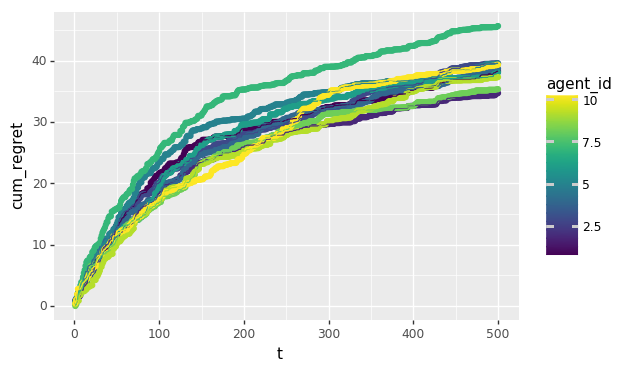

<ggplot: (8727265000645)>


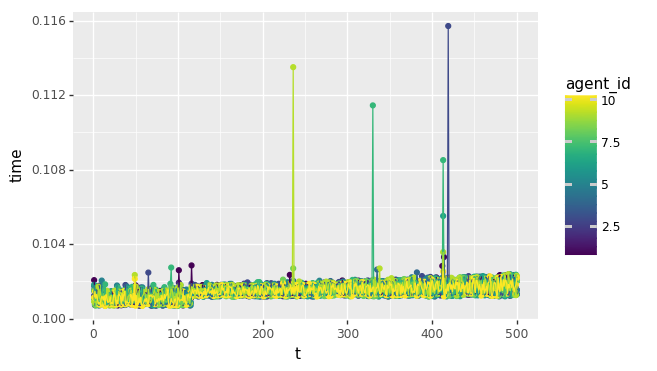

<ggplot: (8727264993533)>


In [8]:
n_steps=500

hyperparameter_sweep(make_mala_agent, [[0.1/2**n] for n in range(10)], dim, var, n_steps, seed=1, verbosity=1)

#hyperparameter_sweep(make_mala_agent, [[0.1/2**n] for n in range(10)], dim, var, n_steps, seed=1, verbosity=1)

# SGLD Agent

In [ ]:
make_sgld_agent = lambda hypers: SGLDTS(num_articles, dim, [0]*dim, cov=None, 
                                        step_size=lambda t: hypers[0]/(1 + t * np.sqrt(dim*var)/dim),
                                        batch_size = lambda t: hypers[1],
                                        time=time_limit,
                                        n_steps=9999,
                                        init_pt=None, verbosity=verbosity)
n_steps=100

hyperparameter_sweep(make_mala_agent, list_prod([[0.2,0.1,0.05], [32]]), dim, var, n_steps, seed=1, verbosity=1)

n_steps=1000

hyperparameter_sweep(make_mala_agent, list_prod([[0.2,0.1,0.05], [32, 64, 128]]), dim, var, n_steps, seed=1, verbosity=1)


# SAGALD Agent

In [4]:
make_sagald_agent = lambda hypers: SAGATS(num_articles, dim, [0]*dim, cov=None, 
                                          step_size=lambda t: hypers[0]/(1 + t * np.sqrt(dim*var)/dim),
                                          batch_size = lambda t: hypers[1],
                                          time=time_limit,
                                          n_steps=9999,
                                          init_pt=None, verbosity=verbosity)

n_steps=100

In [5]:

#sanity check: is the 
#hyperparameter_sweep(make_mala_agent, list_prod([[0.2,0.1,0.05], [32, 64, 128]]), dim, var, n_steps, seed=1, verbosity=1)


In [6]:


hyperparameter_sweep(make_sagald_agent, list_prod([[0.2,0.1,0.05], [32, 64, 128]]), dim, var, n_steps, seed=1, verbosity=1)

#hyperparameter_sweep(make_mala_agent, [[0.1/2**n] for n in range(10)], dim, var, n_steps, seed=1, verbosity=1)

theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521]
Experiment: Step 0


ValueError: shapes (20,) and (20,10,1) not aligned: 20 (dim 0) != 10 (dim 1)

theta [-0.41675785 -0.05626683 -2.1361961   1.64027081 -1.79343559 -0.84174737
  0.50288142 -1.24528809 -1.05795222 -0.90900761  0.55145404  2.29220801
  0.04153939 -1.11792545  0.53905832 -0.5961597  -0.0191305   1.17500122
 -0.74787095  0.00902525]
Experiment: Step 0
 Sample: array([ 0.27303316,  0.64590693, -0.27814358,  0.71629805, -0.494769  ,
       -0.02912912,  0.25337328, -0.07103747,  0.0596932 , -0.82102346,
       -0.12173499, -0.20569669,  0.33968383,  0.83226931, -0.24262954,
       -0.14954909, -0.24634834, -0.79018556, -0.15085368, -0.00867197])
 Accept proportion: 0.058824
 Steps taken: 238
 Sample: array([-5.29236274e-01,  8.99505358e-01, -4.93204421e-01, -8.53754184e-02,
        7.59092000e-01,  5.88341018e-01,  1.10770417e+00,  1.69617717e-01,
       -8.10171074e-01,  8.47273302e-01,  4.88794924e-01, -1.74604645e-01,
        1.10908165e-01,  4.91231032e-01,  3.31059790e-01, -1.22122341e+00,
        5.70262983e-04, -7.48567016e-01,  4.63901842e-01,  3.72914354e-01])


 Sample: array([-0.06585903,  0.88629005,  0.68170018,  0.1456963 ,  0.40439929,
       -0.04689366, -0.05529236,  0.51445226, -0.12323523,  0.03081096,
        0.21993924,  0.09283594, -0.20135958,  0.74641466,  0.322332  ,
       -0.27146965, -0.23258718,  0.01517733, -0.45152568, -0.52349431])
 Accept proportion: 0.364653
 Steps taken: 447
 Sample: array([-0.60872346,  1.16810521, -0.26824492,  1.04024785,  0.49231255,
       -0.92117195,  0.20924962, -0.69818856, -0.1910188 , -0.38570731,
       -0.5969819 , -0.42122992, -0.12335808,  0.67371934, -1.12668004,
        0.00970367, -0.35692104,  0.64825744,  0.30711901, -0.50342319])
 Accept proportion: 0.445676
 Steps taken: 451
 Sample: array([-0.1876876 ,  0.45564325,  1.13767848,  0.01547626, -0.23400914,
       -1.39918295, -0.24422073, -0.1589216 ,  1.13730265,  0.16324341,
       -0.31609999, -0.71428957, -1.07944851, -0.36701028,  0.49995631,
       -0.82083403, -0.58837042,  0.2357812 , -0.41954539,  0.28406048])
 Accept prop

 Sample: array([ 0.2718045 , -0.12182625,  0.56463362,  1.5388375 , -0.89262852,
       -0.84109216, -0.06001883,  0.22371064,  0.38820185,  0.61699129,
       -0.413084  ,  1.18999207,  0.0511295 , -0.46143329,  0.14558886,
        0.64270954, -0.29018976, -0.46658859,  0.58581811,  0.392651  ])
 Accept proportion: 0.139908
 Steps taken: 436
 Sample: array([ 0.81235904,  0.39042365, -0.65289813, -0.26255221, -0.1929804 ,
       -0.55925085,  0.01947927, -0.14057228,  0.19866379,  0.13854522,
       -0.16253849,  0.3060773 ,  0.62947014, -0.36964269, -0.7220116 ,
       -0.11238619,  0.94950835,  0.60629033, -0.37877911, -1.32518204])
 Accept proportion: 0.303371
 Steps taken: 445
 Sample: array([-0.91127627, -1.13275744, -0.5212495 , -0.35264469, -0.88417823,
        0.01536031, -0.35685007, -0.38579199,  0.32191724,  0.50749495,
        1.07117983,  0.14948334, -0.0580373 , -0.45228481, -0.10467485,
       -0.53901944,  0.03463907, -0.13644773, -0.07287958, -0.35591309])
 Accept prop

 Sample: array([ 1.55516254e-01,  5.46008614e-01,  1.54368650e-04,  4.92244574e-01,
        1.58771160e-02, -8.62945482e-01, -1.20443175e+00, -4.38140058e-01,
       -7.84268227e-01, -1.01946440e-01, -3.93691889e-01,  4.30719368e-01,
        7.21574541e-01, -8.74149315e-01, -2.43520112e-01,  2.84125487e-01,
        5.00337131e-01, -2.66742746e-01,  3.89351977e-01,  4.83802391e-01])
 Accept proportion: 0.488998
 Steps taken: 409
Experiment: Step 8
 Sample: array([-3.82494644e-01,  1.72388371e+00, -2.52046964e-01,  7.51383599e-01,
       -8.67191006e-02, -3.40331785e-01, -1.06044751e+00,  1.40541676e-01,
        1.27957171e-01,  4.20155800e-01, -2.95669663e-01,  4.20529933e-01,
        3.73172281e-01,  1.41548770e-01,  1.24302117e-03, -1.03551957e+00,
        2.11472821e-01, -7.03468632e-01,  1.20137152e-01, -1.89062026e+00])
 Accept proportion: 0.193694
 Steps taken: 444
 Sample: array([ 0.38438876,  0.62840134,  0.0506842 ,  0.58558452, -0.03814535,
       -0.15127982, -0.86630411, -0.

 Sample: array([-0.04116131,  0.16446553, -0.48969496,  0.60998353, -0.05859194,
        0.02479606, -0.02335115,  0.24096383, -1.0685602 , -0.71365985,
        1.26400317,  1.34486358,  0.15361136,  0.30826949, -0.02759325,
        1.08739699,  0.86895   ,  0.14484268, -0.1691907 ,  0.69519699])
 Accept proportion: 0.511574
 Steps taken: 432
 Sample: array([-1.04976061, -0.89685113,  0.50379116, -0.26262497, -1.75649124,
       -1.28481735,  1.09674318,  0.64787006, -0.85575149, -0.27909028,
        0.92830717,  0.75938548,  0.0390216 ,  0.71760486,  1.11567692,
        0.71016908, -0.89124163,  0.33449307,  0.47409792, -0.54843988])
 Accept proportion: 0.494279
 Steps taken: 437
 Sample: array([-0.87434516,  0.19728132,  0.37593006,  0.27410612, -1.11411611,
        0.56759223,  0.05404986,  0.30338486,  0.51838375, -1.1015944 ,
       -0.83788531, -0.09652821,  1.0868731 , -0.93149892,  0.82675433,
       -0.48032919, -0.2677654 ,  0.55088537, -1.49624346, -0.36547887])
 Accept prop

 Sample: array([-0.04070163,  0.20485589,  0.48770383,  1.2778376 , -0.78804517,
       -0.21655651, -0.16110632,  0.61152852,  0.48582491, -0.72700113,
        0.17451419,  0.77793681,  0.15123926, -0.28844786, -0.20342305,
       -0.59037106, -0.8383351 ,  0.20813697,  0.15407356, -1.10029032])
 Accept proportion: 0.374419
 Steps taken: 430
 Sample: array([-0.30971329, -0.48290961, -0.76222883,  0.06971584, -0.69904152,
        1.58670072,  0.67456356, -0.45294743, -0.12576788, -0.2403754 ,
        0.59903973,  0.58027706, -0.87402555,  0.45166229,  0.70302891,
       -0.52192849,  0.48225923,  0.09862481, -0.71648825, -0.4842668 ])
 Accept proportion: 0.359447
 Steps taken: 434
 Sample: array([-1.80065148, -0.0675769 , -0.48644883,  0.45104537,  0.77884282,
       -0.5760875 ,  0.31786202,  0.03060031, -0.11602775, -0.42325329,
       -0.88276426,  0.77346765, -0.69624478, -0.38123195,  0.00601442,
       -0.1499364 , -0.47683334,  0.1336365 ,  0.12931552, -0.29908349])
 Accept prop

 Sample: array([ 0.63393116, -0.72038201, -0.7957225 , -0.12427624, -0.2384547 ,
       -0.48327542,  0.29812907,  0.66844189,  0.14799571, -0.39361882,
        1.00287389,  0.27225745,  0.08793539, -0.95393962, -0.03721275,
       -0.56328828,  1.57887425, -0.17773006, -0.25594903, -0.65687878])
 Accept proportion: 0.149533
 Steps taken: 428
 Sample: array([ 0.9841718 ,  0.2465042 , -0.7178135 ,  0.97817716, -0.04074476,
       -0.02537613, -0.15338357, -1.39679449, -0.93767845,  0.01171788,
        0.00410743, -0.48948071,  0.9976312 ,  0.34872518, -0.13814195,
        0.24946047,  0.45278167,  0.17740542,  0.01231601, -0.19623396])
 Accept proportion: 0.191244
 Steps taken: 434
 Sample: array([ 1.01070275, -0.13407246, -0.63912511,  0.50237455, -0.60664612,
        0.42062628,  0.80871331,  0.84978314,  0.07486012,  1.38095223,
       -1.5084862 ,  1.02676933, -0.32190239,  0.03830555,  0.09581345,
       -0.15387578, -0.05305459, -0.12189172,  0.3673474 , -0.70084133])
 Accept prop

 Sample: array([-0.41152842, -0.14632508,  0.37816613,  0.47697842, -0.41450897,
       -0.20943172, -0.57617372, -1.04075864,  0.63973671,  0.38775424,
        0.47340048,  0.468549  , -0.48364719,  0.3894323 , -0.08379113,
        0.83517252,  0.12793923, -0.08930996, -0.31423542,  0.75441528])
 Accept proportion: 0.551069
 Steps taken: 421
 Sample: array([ 0.63728774,  0.43781674, -1.17247392,  0.36566613, -1.58982598,
        0.63522832, -0.15728052, -0.32997979, -0.35403725, -0.05562938,
       -0.31455387,  0.0057314 ,  0.84738622,  0.86473653,  0.12831632,
        1.07996367,  0.27719317, -0.83442503, -0.1569215 , -0.17822738])
 Accept proportion: 0.535714
 Steps taken: 420
 Sample: array([-0.93536673, -0.68299262,  1.12702775,  1.01391226, -0.60907653,
       -0.58043482,  1.40328385, -0.61013885, -0.66457044,  0.00206664,
       -0.03041448, -0.55960095,  0.93971111, -1.35455828,  0.45529932,
        0.29651308,  0.21059313, -0.03676241, -0.41387204, -0.39748993])
 Accept prop

 Sample: array([ 0.46039036,  0.65814203, -1.03881594,  0.11286569, -0.51488368,
       -0.81552327,  0.09861877, -0.47335813,  0.74822768, -0.20831249,
       -1.08289284,  1.05288384, -0.73907034, -0.34756392, -1.16609832,
       -0.80012368,  0.05403758,  0.20544953, -0.15226368,  0.00316988])
 Accept proportion: 0.357995
 Steps taken: 419
 Sample: array([ 0.42325207, -0.55137932, -1.29256271,  1.41146692, -0.85242072,
        0.85339558,  0.50167328,  0.08282164,  0.13259647, -0.56387242,
       -0.58418442,  0.22681506,  0.14620577,  0.86479846,  0.21349131,
       -0.48694412,  0.40686732,  0.30036189, -0.64026427, -0.14899679])
 Accept proportion: 0.405660
 Steps taken: 424
 Sample: array([-0.79948475,  0.34363615, -0.45041718,  0.30004039, -0.22282912,
       -0.44652302,  0.30500301, -0.22693389,  0.05942315, -0.5424863 ,
        0.47413481,  0.69930188, -0.63269712,  0.05175248, -0.37509839,
        0.73156843,  1.07984958,  0.45547979, -0.99504231,  0.2968209 ])
 Accept prop

 Sample: array([ 0.57150423, -0.83156858, -1.53036056,  1.22584657, -0.25036492,
       -1.22869099,  0.28492977, -0.72589254,  1.14497731,  0.34337546,
        1.05059123,  0.94321828,  0.61988358, -0.55193805,  0.05421163,
       -0.56980553,  1.33607495,  0.26328346, -0.65268094, -0.88048068])
 Accept proportion: 0.215311
 Steps taken: 418
 Sample: array([-0.53902143,  0.74243411, -1.19353643,  0.83511973, -0.28894184,
        0.12982885, -0.48333996, -0.53547951, -0.72148931, -0.11234229,
       -0.40390825, -0.70212027,  1.37539303, -0.42809222, -0.48483367,
       -0.1196487 ,  0.20544471, -0.36294559,  0.12042308,  0.35863153])
 Accept proportion: 0.265207
 Steps taken: 411
 Sample: array([-0.1277551 ,  0.06818135, -0.41918847,  0.48130744, -0.40915056,
        0.59889606,  0.69396743, -0.03221447,  0.70014607, -0.13309097,
        0.73594443,  1.66741552, -0.34939416, -0.40398313, -0.5919002 ,
        0.32600526, -0.74363312,  0.16700485, -0.56743099,  0.26181905])
 Accept prop

 Sample: array([ 0.31781338,  0.70769784, -1.45850507, -0.70387932, -0.10521464,
       -0.03037009, -0.43428917, -0.05820867, -0.92256211, -0.19370046,
        1.01933275,  1.00219793, -0.32211755,  0.45718035, -1.07111329,
        0.23306031, -0.66417958, -0.04024427, -0.05561709, -0.28781531])
 Accept proportion: 0.556627
 Steps taken: 415
 Sample: array([-0.34040572,  0.60819299, -1.37397536, -0.49090115, -0.50064141,
        0.03096872,  0.25561416, -0.06396473, -1.08603101, -0.24475525,
        0.3353157 ,  1.21350927,  0.32712546,  1.06503956,  1.52692894,
        0.01984393,  0.41366724,  0.50308687,  0.80964833, -0.40643938])
 Accept proportion: 0.565495
 Steps taken: 313
 Sample: array([-0.06888781,  0.07251439,  0.43430077,  0.48459624, -1.5428343 ,
       -0.25013138,  1.21126382, -0.10706104, -0.53609242, -0.46198198,
        0.09102183,  0.18980831,  0.44611398, -1.90972792,  0.03928696,
       -0.77485862,  0.26331902,  0.3679962 ,  0.23408612,  0.17696862])
 Accept prop

 Sample: array([-0.15366055, -0.4308981 , -1.22300757,  1.39726051, -0.47672161,
       -0.44414736, -0.62594559, -0.29733682,  0.54238692,  0.1162611 ,
        0.19864708,  1.40004445, -0.63652201,  0.30236414, -1.13046743,
       -0.47081503, -0.86056337,  0.01818281,  0.23290954, -0.21062563])
 Accept proportion: 0.408759
 Steps taken: 411
 Sample: array([-0.71140523, -0.58996646, -1.92222483,  0.20996739, -1.70852364,
        0.94261267, -0.55506396, -0.55889823,  0.07097143,  0.08950873,
        1.19614198, -0.0340094 ,  0.87302087,  0.81462714,  0.69462849,
       -0.4620127 , -0.97508053,  0.48944575, -0.70557243, -0.10675675])
 Accept proportion: 0.463768
 Steps taken: 414
 Sample: array([-0.81395776,  0.78108447, -1.29851455,  0.66592332,  0.02496054,
       -1.33992365, -0.11289028, -1.11461324,  0.37203883, -0.92096853,
        0.19234259,  1.4298112 , -0.08010584,  0.11098071, -0.61849107,
       -0.47986064, -0.1726181 , -1.19181121, -1.06401276, -0.42572132])
 Accept prop

 Sample: array([ 0.09869253, -0.61428702, -0.31545179, -0.57564646, -0.32199811,
       -0.17630592,  0.7496517 , -0.08447761, -0.31560416,  0.06494264,
        0.28860851,  2.25573792,  0.83013069, -0.81269131,  0.58776526,
       -1.22745126, -0.37219486,  0.79030032, -0.92140384, -0.63774903])
 Accept proportion: 0.294554
 Steps taken: 404
 Sample: array([ 0.33464297,  0.74038475, -1.22274155,  1.87667585, -0.54548932,
        0.02676807, -0.46599739, -0.76433359, -0.82423914, -0.11378976,
        0.1562646 , -0.2232216 ,  0.36145322, -1.33248797, -1.20990747,
       -1.04261501, -0.31795317, -0.51579689, -0.32093357, -0.34645518])
 Accept proportion: 0.296837
 Steps taken: 411
 Sample: array([ 0.29508232,  0.27206714,  0.57799091, -0.17772386, -1.82076668,
       -0.22138578, -0.74026896, -1.06194865, -0.35533481,  0.28619098,
        0.14030195,  1.93902131,  0.48835363, -0.84923568,  0.14734976,
        0.0868419 , -0.02557668,  0.12242798, -1.19029962,  0.12748186])
 Accept prop

 Sample: array([-0.56135945,  0.39369298, -1.3692926 , -0.25450734, -0.67090584,
        0.52496975, -0.46462068, -0.18682864, -1.26575499, -0.57652558,
       -0.2372398 ,  1.00218434,  0.61292269, -0.65928246, -0.88036421,
        0.03791631, -0.05612351, -0.07324503,  0.11822966, -0.19952873])
 Accept proportion: 0.565757
 Steps taken: 403
 Sample: array([-0.20155675,  0.33255785, -0.32321765, -0.23622532, -1.15509764,
        0.99858928,  0.01850019, -1.09223202, -1.41787964, -1.0211522 ,
        0.42366536,  0.7114826 ,  0.10797642, -0.17375729,  1.01100827,
        0.17425869, -0.87596881,  0.39299613, -0.0689119 , -0.07151994])
 Accept proportion: 0.571429
 Steps taken: 406
 Sample: array([-0.44540523,  0.03395501,  0.18625169,  1.43352227, -1.14726064,
       -0.24400926, -0.09124953, -0.58831145, -0.49641134, -0.82669418,
        0.33398914,  0.68819686, -0.61021082, -0.72440439,  0.51194257,
        0.09943932,  0.34806337,  0.76464401, -0.28860177, -0.871909  ])
 Accept prop

 Sample: array([ 0.70142033,  0.24240373, -1.24603611,  0.51324269, -0.08255421,
       -0.70478181,  0.11507026, -0.42163063,  0.11866745, -0.04950194,
        0.1437337 ,  2.04516789, -0.37706194,  0.73249363, -0.73333422,
       -1.31555722, -0.32320564,  0.3739597 , -0.17375694, -0.50510112])
 Accept proportion: 0.424623
 Steps taken: 398
 Sample: array([ 0.3450901 , -0.62087149, -1.54333327,  0.80772501, -0.70572424,
        0.52379971, -0.35837689, -0.73287006, -0.53392018,  0.01988409,
        0.96953694,  0.91637097, -0.13456089,  0.25243246,  0.77791558,
       -1.05788638, -1.14334563,  0.42528402,  0.28538194, -0.4834359 ])
 Accept proportion: 0.450382
 Steps taken: 393
 Sample: array([-1.58098192,  0.95800327, -0.64885601,  1.01734364, -0.75113241,
       -0.07417484, -0.02453003, -0.79076672, -1.59444681,  0.02195196,
        0.05847974,  0.97512457, -0.16573084, -0.78639981,  0.08450491,
        0.65189406,  0.06524153,  0.42262025, -0.0189749 , -0.33031012])
 Accept prop

 Sample: array([ 0.05434486, -0.24468211, -0.19840951, -0.10415614, -0.55895283,
        0.13366024,  0.84449245, -0.26214125,  0.0291979 , -0.0454278 ,
        0.59060185,  0.9144677 ,  0.06130641, -0.84667457, -0.7553697 ,
       -0.52197085,  0.67942692,  0.71963073, -1.12428303, -0.05239059])
 Accept proportion: 0.280130
 Steps taken: 307
 Sample: array([-0.23449647,  0.2742764 , -1.71555547,  0.40386183,  0.34798835,
       -0.27011487,  0.67081358,  0.3387736 , -1.51052688, -0.78818922,
        0.17071058,  0.6617204 , -0.19362536, -1.26290382, -1.00848906,
       -0.36402122, -0.88361517, -0.17809273, -0.70306516, -0.09091085])
 Accept proportion: 0.301746
 Steps taken: 401
 Sample: array([ 0.52534943,  0.33956718, -0.6063522 , -0.50641383, -0.69963345,
        0.35520895, -0.37536778, -0.69104333,  1.13740168, -0.40449521,
        0.43211398,  1.88922287, -0.14569591, -1.68464218,  0.94473578,
       -0.84601427, -0.29261588, -0.50401166, -0.30863905,  0.20434822])
 Accept prop

 Sample: array([-0.58675956, -0.02423369, -1.6603981 , -0.98239637, -1.44476504,
       -0.07877138,  0.02350409, -0.46957787, -1.50568194, -1.03904782,
        0.46873258,  0.8414783 ,  0.02225758, -1.27442825,  0.43071195,
        0.14155961, -0.21888655,  0.42440908, -0.29615812, -0.30214441])
 Accept proportion: 0.624365
 Steps taken: 394
 Sample: array([-0.43938275, -1.42289025, -1.41015537, -0.14411538, -0.62479018,
       -0.30259816, -0.08381914, -0.18067341, -2.04684633, -1.62063699,
        0.62334704,  1.62019186, -1.03429656, -0.34451595,  1.07791883,
        0.23982943, -0.063122  ,  0.68341212, -0.05398807,  0.94340001])
 Accept proportion: 0.639098
 Steps taken: 399
 Sample: array([ 0.44339923,  0.51187111,  0.41158819,  2.27350842, -0.91609193,
       -0.71388422, -0.18378162, -2.29028398, -0.55528824, -0.30168043,
        0.22567782,  1.70747557,  0.23056081, -1.34083357, -0.01545061,
        0.19877106,  0.4245769 ,  0.17191238,  0.30488167,  0.22995824])
 Accept prop

 Sample: array([ 0.95168688,  0.59403498, -1.780784  ,  0.52494761,  0.43586042,
        0.35545188,  0.56861631, -0.35334996,  0.27986163,  0.05841994,
        0.75671764,  2.30496723, -0.84138378, -0.0038856 , -0.14926951,
       -0.26521216, -0.15305784,  1.08737439, -1.19943603, -0.30362031])
 Accept proportion: 0.509044
 Steps taken: 387
 Sample: array([-0.30333173, -1.32733184, -2.43282343,  0.97323497, -0.83844663,
        1.084029  ,  0.57026519, -0.53172528,  0.51127354, -0.55064074,
        0.38876723,  1.81803124,  0.01425165,  1.5926812 ,  0.79026379,
       -0.19021715,  0.03635615,  0.70505879, -0.67717036, -0.58813334])
 Accept proportion: 0.480000
 Steps taken: 300
 Sample: array([-1.1465552 ,  0.41933409, -1.4854671 ,  1.57068171, -1.19373577,
       -0.30292971,  0.55063193, -0.67730386, -0.7129218 , -0.56792902,
        0.37494286,  0.80509833,  1.23371212, -0.70221322,  0.18206289,
        0.42337654,  0.10330773, -0.03057516, -0.80239638, -0.33618375])
 Accept prop

 Sample: array([ 0.15115997,  0.07765341, -0.63657226, -0.34768813, -0.47722066,
        0.27144614, -0.26650472, -0.69338819,  0.31961147, -1.37466061,
        1.25692678,  1.27730674,  0.33932326, -1.47740884, -0.53027278,
       -1.85621901,  1.69168067,  0.87272133, -1.10282263,  0.68646307])
 Accept proportion: 0.333333
 Steps taken: 390
 Sample: array([ 0.47821786,  0.446418  , -1.25243738,  0.66984404,  0.12879585,
       -0.46811159,  0.11172667, -0.14828068, -1.34045563, -1.29465116,
       -1.14839866,  1.1065184 ,  0.11808399, -1.15411966, -1.09445361,
        0.11308212,  0.7237292 , -0.12826514,  0.5919101 ,  0.39607732])
 Accept proportion: 0.276650
 Steps taken: 394
 Sample: array([ 0.05427998,  0.09213808, -1.01899974,  0.23354837, -0.6076859 ,
        0.0989072 ,  0.30315784, -1.01791696,  0.85737095,  0.69358798,
        0.64578464,  2.21660605,  0.86984213, -1.30941549,  0.80215888,
       -0.88158156,  0.71495864,  1.06507506, -0.46591942, -0.11936493])
 Accept prop

 Sample: array([-0.93398759,  0.80746177, -1.50060723,  0.27266965,  0.08394117,
       -0.00429887, -0.74769775,  0.70242958, -0.88492618, -0.69583846,
        0.24500608,  0.95432028,  0.05860108,  0.12130384, -0.52569862,
        0.48428425, -0.89431721,  0.47010573, -1.29522184, -0.50096222])
 Accept proportion: 0.603627
 Steps taken: 386
 Sample: array([-0.85050307, -0.54631814, -1.07262816, -0.08350229, -0.12252303,
        0.40144973, -0.36817149, -0.9638855 , -1.76834483, -0.65235697,
        0.22047432,  0.59723478, -0.24122601, -0.43222951,  0.82330265,
       -0.21168366, -1.05586819,  0.31641272, -0.61534376,  0.76598527])
 Accept proportion: 0.603093
 Steps taken: 388
 Sample: array([-0.50673432, -0.19875515, -0.23455302,  1.13403764, -0.92075806,
       -1.13469614, -0.43025833, -1.06456592, -1.284736  , -0.48716498,
       -0.23047248,  0.69682087,  0.35588502, -1.570631  ,  0.05754089,
       -0.335527  , -0.30011654,  0.350345  , -0.5806506 , -0.0543924 ])
 Accept prop

 Sample: array([ 0.91951011,  0.22525055, -1.18069173,  0.91368598, -0.87330674,
       -0.97738556,  0.15604199, -0.63555873, -0.47269363, -0.43450778,
        0.0256082 ,  1.9338467 , -0.75461506,  0.43504638,  0.00654958,
       -0.80304976, -0.04968847,  0.65006696, -0.45425293, -0.64758211])
 Accept proportion: 0.443864
 Steps taken: 383
 Sample: array([-0.80127126, -0.67204567, -1.7949809 ,  0.82764137,  0.13225722,
        0.38345936,  0.28657898,  0.26222246, -0.56253338, -0.18228242,
        1.16713721,  1.09170263,  0.90609916,  0.03874079,  0.59929979,
       -0.08751013, -1.39927789,  0.89868631, -0.09891975, -0.61548544])
 Accept proportion: 0.476316
 Steps taken: 380
 Sample: array([-0.38990197,  0.40951193, -2.32123201,  1.92100549, -1.12910005,
        0.19264272, -0.1652174 , -0.90110012, -0.21984408, -0.98177625,
        0.13951775,  0.87398228, -0.01831634, -0.55902945,  0.52775687,
       -0.32694329,  0.53215541,  0.30370873, -0.58218544, -0.77082348])
 Accept prop

 Sample: array([ 0.50712508, -0.2835485 , -1.57343921,  0.36706352, -1.41588416,
        0.2294428 ,  0.87108807, -0.10461915,  0.59038055,  0.56853896,
        1.94827219,  0.70895791,  0.45749819, -1.04990876, -0.0675681 ,
       -0.90283465,  0.47960525,  0.06584697, -1.61899267, -0.77867075])
 Accept proportion: 0.314815
 Steps taken: 378
 Sample: array([ 0.07480857,  0.33688906, -1.98220842,  0.94733235, -0.29197877,
       -0.42847163,  0.74078809,  0.15979245, -0.81834411, -1.16770272,
        0.38899355,  0.47081546,  0.66809047, -0.57739457, -0.54221935,
       -0.19787128, -0.73112462, -0.09240111,  0.06848957,  0.51566189])
 Accept proportion: 0.334204
 Steps taken: 383
 Sample: array([ 1.02036889,  0.18097702, -0.90987891,  0.46145713, -0.63027457,
        0.03565941,  0.27160953, -1.53595199,  0.34885128,  0.53472703,
        0.25224899,  2.8351992 ,  0.00518072, -1.00234989,  0.13675922,
        0.35387707,  0.2881164 ,  0.11394626,  0.06838392, -0.48251349])
 Accept prop

 Sample: array([ 0.46943661,  0.77068634, -1.83893691,  0.8973668 , -1.09130786,
        0.51431202, -0.9128377 , -0.7182592 , -0.51364382, -0.52664921,
        0.90619195,  1.8645403 , -0.27660202, -0.7378782 , -0.27603915,
        0.15022616, -0.48536226,  0.52908909, -0.73778555, -0.25088494])
 Accept proportion: 0.576389
 Steps taken: 288
 Sample: array([-0.1488766 ,  0.24135088, -1.51254639, -0.3828826 , -1.82121934,
        1.14867025,  0.16081016, -1.07436007, -0.59281963, -0.33904941,
        0.15637748,  1.66544656, -0.41409281, -0.08928198,  0.52846424,
        0.36885774, -0.76838409,  1.10277212,  0.4246172 ,  0.37632606])
 Accept proportion: 0.630319
 Steps taken: 376
 Sample: array([ 0.28820937, -0.89779232,  0.61203461,  0.61143573, -1.50848733,
       -0.71292467, -0.97969789, -1.25927921, -0.45209535, -0.01944687,
       -0.1694977 ,  0.42590177, -0.37514786, -1.6455031 , -0.35928761,
       -1.55601328,  0.27390389,  0.09572624,  0.06997898,  0.16106602])
 Accept prop

 Sample: array([ 0.27109095, -0.18251714, -1.25146809,  0.19442759, -0.05547221,
       -1.39601537, -0.11824084, -1.28553866, -0.60628943,  0.18491711,
        0.31239299,  2.43348756, -0.07432191,  0.52783865,  0.04547152,
       -1.33654397, -0.4955774 ,  0.04806322, -0.24183728, -0.58184837])
 Accept proportion: 0.453804
 Steps taken: 368
 Sample: array([-0.54656068, -0.63164436, -1.68775904,  0.80706554, -0.96090823,
        1.11281481,  0.00652112,  0.00802726, -1.16127008,  0.87058381,
        0.93449137,  1.07589646,  0.22255135,  0.50021073,  1.49116246,
       -0.59266988, -1.29863949,  0.33028596, -0.748468  , -0.54022426])
 Accept proportion: 0.520107
 Steps taken: 373
 Sample: array([-0.75924959,  0.10391999, -1.82228629,  0.8047907 , -1.28873443,
       -0.7997907 , -0.70956706,  0.05406886, -1.75430877, -0.16491506,
        0.45395664,  0.76934916,  0.44517519, -0.85878348, -0.2412036 ,
        0.27294512, -0.9146209 ,  0.7006794 , -0.92650328, -0.7710674 ])
 Accept prop

 Sample: array([ 0.04473147, -0.49559253, -1.30143488,  0.70625486, -0.40783228,
        0.05354694,  0.00447006, -1.07477267,  0.29305694,  0.3344136 ,
        1.13774355,  1.40442453,  0.65238628, -1.47776258,  0.17699532,
       -0.38781286, -1.11130642, -0.64936186, -0.41678553, -0.93665734])
 Accept proportion: 0.293151
 Steps taken: 365
 Sample: array([ 0.57674428,  0.20473617, -1.96125965,  1.73720812, -0.15420024,
       -0.92814079,  0.24008379, -1.00263469, -1.2857226 , -0.29572292,
        0.42014267,  0.43779703,  0.74023992, -0.72117207,  0.52685441,
        0.60939711, -0.16332976,  0.09415409,  0.64126305,  0.2266884 ])
 Accept proportion: 0.340351
 Steps taken: 285
 Sample: array([ 0.06853463, -0.82987556, -0.31270181,  0.762546  , -0.60350822,
       -0.59356168,  0.27810302, -1.3605218 ,  1.05548335, -0.20757352,
        0.06501029,  1.97008822, -0.11410416, -0.49990691,  0.56649047,
       -0.19620775, -0.69094479,  0.01818071,  0.13602735, -0.83887242])
 Accept prop

 Sample: array([-0.97376079,  0.6339944 , -1.25242896,  0.23553392, -1.1380165 ,
        0.729691  , -0.82901691, -0.66904729, -1.01652667, -0.93409261,
        0.1340022 ,  1.19428144, -0.17812825, -1.23209577, -0.32133477,
        0.57601991, -1.08359604,  0.88484159,  0.02533053, -0.36825346])
 Accept proportion: 0.590659
 Steps taken: 364
 Sample: array([-0.38086151,  0.55956892, -1.30190972,  0.87372532, -1.06140748,
       -0.01919202,  0.39098184, -1.25897604, -1.14591457,  0.00785978,
       -0.39347184,  0.1429681 , -0.32518694, -0.77619235,  0.87831673,
        0.05318604, -1.56497587,  0.4179145 , -1.19381637,  0.4173079 ])
 Accept proportion: 0.625000
 Steps taken: 368
 Sample: array([ 1.11477941, -0.37551237,  0.17776495,  1.95777101, -1.68992688,
       -0.2686769 , -0.66018692, -1.11333601, -0.88701683,  0.23498602,
       -0.02337687,  1.58907578,  0.62377887, -0.82777649,  0.43687518,
       -0.42554885, -0.61005851,  1.17005538,  0.37294233, -0.39650861])
 Accept prop

 Sample: array([ 0.14519254, -0.45454306, -1.4842594 ,  0.84135345, -0.23030846,
       -0.69728141, -0.38374441, -0.80502292,  0.31576068, -0.83012835,
        0.89810346,  1.36376672,  0.34488858, -0.14445045,  0.04569319,
       -0.64670285,  0.09391352,  0.4889313 , -0.63086701, -1.18811806])
 Accept proportion: 0.468320
 Steps taken: 363
 Sample: array([-1.11672687, -0.73550443, -2.32570494,  0.65467056, -0.4391242 ,
        0.83799683, -0.61969414, -0.61540444, -1.40863257, -0.3416309 ,
        0.26873861,  1.73625377,  0.86682135,  1.39293647,  0.86033817,
       -0.48292296, -0.90131874,  0.67597409, -0.08432218, -0.61404157])
 Accept proportion: 0.461538
 Steps taken: 364
 Sample: array([-0.96684561,  0.28565915, -1.40977541,  1.54381162, -0.58518298,
       -0.71829708,  0.74607983, -0.80497908, -0.94109266, -1.11538115,
        0.2770589 ,  0.13133485, -0.00954653, -0.81286791,  0.09815288,
        0.77315697, -0.07039886,  1.08673609, -1.5610193 , -1.03969148])
 Accept prop

 Sample: array([ 0.00509021, -0.3844396 , -0.97884959, -0.67744366, -0.48081166,
       -0.15618673,  0.09225999, -0.56083918, -0.2154495 , -0.29848752,
        1.64304809,  1.58592775,  0.53674398, -1.29318878, -0.6453429 ,
       -0.86718846, -0.54361944,  0.20690016, -0.80985981, -0.77295727])
 Accept proportion: 0.288889
 Steps taken: 360
 Sample: array([ 0.75616001, -0.21105321, -2.10921485,  1.04569505,  0.16282053,
       -0.49011189, -0.27454754,  0.00990144, -1.02137773, -0.44760788,
        0.41640977,  0.26467566,  0.79152512, -0.79002092,  0.16385315,
       -0.62162735,  0.25061277,  0.15255725, -0.11472643, -0.02610644])
 Accept proportion: 0.403315
 Steps taken: 362
 Sample: array([ 0.72552178,  0.67831086, -0.65684824,  1.13960505, -0.58651996,
       -1.33069549,  0.01528337,  0.20301929,  1.49209387,  0.28371966,
        0.13137243,  2.57654831,  0.48429018, -1.36590192, -0.66643368,
        0.66518813, -0.00988935,  0.25050056, -1.44846594, -0.54988201])
 Accept prop

 Sample: array([-0.79342445,  0.46873441, -1.95911287,  0.88376825, -0.60762569,
       -0.17567253, -0.58499467, -0.55843468, -1.0927909 , -1.05096954,
        0.19613833,  1.40317952, -0.82847684,  0.13579188, -0.24978817,
        1.0503157 , -0.89870355,  1.20176885, -0.19769066, -0.24241203])
 Accept proportion: 0.609065
 Steps taken: 353
 Sample: array([-0.60896797, -0.57910021, -1.19638618,  0.6406988 , -1.82024437,
        0.6834359 , -0.25013084, -0.66704242, -0.90798192, -0.73476639,
       -0.26547237,  1.18225436,  0.0584957 , -1.09255286,  0.64130445,
       -0.41290208, -0.35027616,  1.35879723, -1.44196249,  0.42671275])
 Accept proportion: 0.611732
 Steps taken: 358
 Sample: array([ 0.98217977, -0.84389609,  0.01823258,  1.5126904 , -1.02873223,
       -0.3140152 ,  0.12183734, -1.33710357, -1.1749666 , -0.85067745,
       -0.0156665 ,  1.58850448,  0.51539197, -0.88144649,  0.30445985,
       -0.8523253 , -0.10368054,  0.93602768, -0.17723255,  0.34684511])
 Accept prop

 Sample: array([ 1.21953654,  1.12512048, -1.06699802,  0.96774122, -0.67953321,
       -1.09292389,  0.75795542, -0.82547044, -0.04838312, -0.48450579,
        0.44915887,  1.90921168,  0.20635969, -0.35466343,  0.61273588,
       -0.87965103, -0.21223124,  0.96111704, -0.990892  , -0.83420474])
 Accept proportion: 0.479866
 Steps taken: 298
 Sample: array([-0.432251  , -0.47988782, -2.43911559,  0.64771429, -0.6761583 ,
        0.01862781,  0.46459174, -0.67633869, -0.78643255,  0.17251551,
        0.67923214,  1.42069251,  0.41511429,  0.21995886,  0.50061993,
       -1.08377569, -0.56461583,  0.73838562,  0.26730618,  0.36620471])
 Accept proportion: 0.480226
 Steps taken: 354
 Sample: array([-0.71210789,  0.4276791 , -1.61474566,  0.96046685, -1.90204125,
       -0.26942021, -0.39571187, -1.43607332, -1.32855172, -1.77124929,
        0.25876346,  1.55930301,  0.75398945, -1.59608256,  0.73182373,
        0.07334934, -0.65877914,  0.25752007, -1.2400096 , -1.41256861])
 Accept prop

 Sample: array([ 0.95219165, -0.20857018, -0.96974826,  0.85125505, -0.53488384,
        0.09126881, -0.15059709, -0.6729323 ,  0.39138753, -0.72219611,
        0.86364849,  1.54313816,  0.04482865, -1.6318829 ,  0.32414561,
       -0.67890206, -0.08606201, -0.06353746, -0.95614136, -1.1682685 ])
 Accept proportion: 0.390805
 Steps taken: 348
 Sample: array([ 1.06872669,  0.19770693, -2.09666276,  1.44455702, -0.18195917,
       -0.52266601,  0.56646487,  0.24025729, -0.42189197, -0.19351889,
        0.74498489,  0.23155052,  0.99770073, -0.45834143,  0.21667582,
       -0.93056473, -0.03054348,  0.29377504, -0.13995984,  0.74191259])
 Accept proportion: 0.371429
 Steps taken: 350
 Sample: array([ 0.15846884, -0.12040472, -0.52392363,  0.4871731 , -0.74820552,
       -0.82236639,  0.93453964, -0.38409111,  0.05290562, -0.04219759,
        0.30706175,  1.95096941, -0.12770974, -1.35911911,  0.6729846 ,
       -0.53576911, -0.05295267, -0.20580545, -0.79219562, -0.35871252])
 Accept prop

 Sample: array([-0.27215414, -0.71664965, -2.08621194,  0.73521754, -1.58361496,
        0.14543934, -0.58203464, -0.71519307, -1.38707896, -0.30439052,
        0.07187335,  1.60055069, -0.36832794, -0.34381674, -0.35239542,
        0.80072803, -0.39858921,  0.2737655 , -0.73428078, -0.15312739])
 Accept proportion: 0.630814
 Steps taken: 344
 Sample: array([ 1.00559981e-02,  9.28194015e-01, -6.29263882e-01,  1.39797942e+00,
       -1.40695303e+00,  8.75562953e-01, -1.47365573e-01, -1.29567394e+00,
       -7.59502094e-01, -7.88454409e-01, -1.02382208e-03,  5.07112119e-01,
       -5.87531949e-02, -2.75302732e-01,  1.43881170e+00, -3.03609263e-01,
       -1.30680908e+00,  2.05184813e-01, -9.11677443e-02, -1.92141393e-01])
 Accept proportion: 0.590778
 Steps taken: 347
 Sample: array([-0.43328465, -0.90932931, -0.01073206,  1.47497211, -0.61227635,
       -1.17645835, -1.21096999, -1.11240137, -0.53138765, -0.29449598,
        0.49921897,  1.25636654,  0.84131888, -1.41653068,  0.15572251

 Sample: array([ 0.73113904,  0.54089435, -1.23598895,  1.49640191, -0.37449234,
       -1.6328402 ,  0.58839606, -0.44142404,  0.51105714, -0.74836544,
        0.74215294,  2.50257201,  0.37347965,  0.473667  , -0.48479397,
       -1.48740159, -0.30508795,  0.76720798, -0.35631621, -0.53417308])
 Accept proportion: 0.523529
 Steps taken: 340
 Sample: array([ 2.67255611e-01, -1.00392552e+00, -2.22334930e+00,  1.13321413e+00,
       -4.20396243e-01,  8.69722817e-01,  9.81128956e-01, -7.93291286e-01,
       -9.50902530e-01,  5.66045127e-01,  6.32163851e-01,  1.26085088e+00,
        4.50885769e-01, -2.21555208e-03,  1.63092269e+00, -1.65464391e-01,
       -2.49896687e-01,  5.02418738e-02, -3.76546148e-01, -4.30182861e-01])
 Accept proportion: 0.561404
 Steps taken: 342
 Sample: array([-0.45628305, -0.23842517, -0.84428578,  1.83190831, -0.66676283,
        0.05737671,  0.3982374 , -0.06676624, -0.88787209, -1.28446399,
        0.1199816 ,  1.16324208,  0.04894034, -1.00912011, -0.19000312

 Sample: array([ 0.23044673, -0.58707083, -2.10245382,  1.25466437, -1.27249474,
        0.20817758,  0.3392726 , -1.39241036, -0.03594412,  0.05671631,
        1.14353013,  1.66125372,  0.33815656, -0.84010954,  0.00907032,
       -0.04497828, -0.02603523,  0.2230316 , -0.86344779, -0.59565733])
 Accept proportion: 0.385757
 Steps taken: 337
 Sample: array([ 1.63592822,  0.25216288, -2.50895217,  0.56693512, -0.69720055,
       -0.17693891,  0.36304653, -0.50035616, -0.90181541, -0.4355095 ,
        0.28683004,  0.39579135,  0.64109712, -0.89006312,  0.97346617,
       -0.87271218,  0.40681621, -0.31329991, -0.13993662,  0.86770441])
 Accept proportion: 0.405325
 Steps taken: 338
 Sample: array([ 0.4496052 ,  0.0369159 ,  0.30284304,  1.05979021, -1.05584765,
       -0.47914344,  0.58118227,  0.57006874,  0.70257081,  0.22528178,
        0.84839137,  2.402396  , -0.17191632, -1.29572599, -0.03497765,
        0.67069596,  0.4168126 ,  1.17199494, -1.06404809, -0.0381954 ])
 Accept prop

 Sample: array([ 0.08819188, -0.54817005, -1.81030773,  0.72233362, -1.41225544,
        0.06971294, -0.76927645, -0.80002721, -1.23238445, -0.47307895,
       -0.33265163,  1.24129019, -0.26820993, -0.60709079,  0.21619525,
        0.31283634, -0.61599547,  0.76095509, -0.93607121, -0.02780235])
 Accept proportion: 0.634731
 Steps taken: 334
 Sample: array([-0.39576942, -0.41526124, -0.48966675,  0.77488067, -1.81227894,
        0.03215471, -0.40852729, -2.33495621, -1.64488804, -0.65315196,
        0.3644096 ,  1.49225355,  0.15565692, -0.92736926,  0.31414355,
        0.38188874, -0.6877803 ,  0.34550636, -0.24732997, -0.15212133])
 Accept proportion: 0.629851
 Steps taken: 335
 Sample: array([ 0.5336183 , -0.24268649, -0.56674825,  1.48367584, -1.24879265,
       -0.91445496,  0.00699124, -1.14317251, -0.75244975, -0.18938021,
        0.06531648,  1.14178883,  0.52003371, -1.11602097,  0.57874158,
       -0.3177847 , -0.30315082,  0.69088839,  0.30070434, -0.07849511])
 Accept prop

 Sample: array([ 0.8254502 ,  0.15862905, -1.93059426,  0.95762834, -0.1591737 ,
       -1.41490258,  0.30194602,  0.2094917 , -0.83097196, -0.1323609 ,
        0.87080318,  2.85938768, -0.58072227,  0.65089881, -0.18153017,
       -0.91465358, -1.53832232,  0.48143318, -0.74384431, -0.9497113 ])
 Accept proportion: 0.486239
 Steps taken: 327
 Sample: array([ 0.03045259, -0.5013347 , -2.5999815 ,  0.18533499, -0.6955477 ,
       -0.27347016,  0.22546298, -1.87165883, -1.6990172 , -0.00749216,
        0.2884855 ,  1.95763044,  0.62517783,  1.26851962,  1.18386192,
       -0.92236477,  0.32329774,  0.49582089,  0.35418645, -0.1211738 ])
 Accept proportion: 0.518182
 Steps taken: 330
 Sample: array([-0.53887444,  1.03948974, -1.09949839,  2.24932462, -1.05273449,
       -1.32435712,  0.13892335, -0.73531463, -0.53512023, -0.61677753,
       -0.46533781,  0.63236828,  0.33323158, -0.50695142,  0.2055434 ,
       -0.04032138, -0.21228554,  0.40034048, -0.75427317, -0.54889755])
 Accept prop

 Sample: array([ 0.43731702, -0.61943343, -0.93002826,  0.73504745, -0.6699015 ,
        0.03792215,  0.47704626, -0.70086661, -0.18466674,  0.30103814,
        1.31240171,  1.91830723, -0.43682379, -1.70734664, -0.1463989 ,
       -0.5808338 , -0.92699428,  0.53069951, -1.30919612, -0.09702701])
 Accept proportion: 0.381098
 Steps taken: 328
 Sample: array([ 0.27608977,  0.23668148, -2.60688174,  1.34994523, -0.25798079,
       -0.04336934,  0.03481408, -0.51285351, -1.01323458, -0.1037127 ,
        0.43198764,  1.0460256 ,  1.20068703, -0.46719525,  0.25082238,
       -1.02918282,  0.32325896,  0.11754079,  0.07203795,  0.37473986])
 Accept proportion: 0.413374
 Steps taken: 329
 Sample: array([ 1.31078144, -0.40797636, -0.73471385,  0.74266869, -1.02323341,
       -1.49731595,  1.30044301,  0.34153945,  1.35062199, -0.01561361,
        0.77004554,  3.13571517, -0.01554709, -1.27359492,  0.38880244,
        0.52485724, -0.13804976, -0.34727264, -1.99987971, -0.60530234])
 Accept prop

 Sample: array([ 0.02291005,  0.78512175, -2.40797275,  1.20611572, -1.28789042,
        0.0119295 , -0.03244243, -0.37810962, -0.43746303,  0.01857095,
        0.28710779,  0.95382517,  0.22407995, -0.56806403,  0.12504319,
       -0.24380237, -0.99633943,  0.04238665, -0.63949705,  0.87960877])
 Accept proportion: 0.641975
 Steps taken: 324
 Sample: array([-0.92820353, -0.69807522, -1.54112055,  1.60757349, -1.39258866,
        0.71827218, -0.20743036, -1.90441322, -0.57594474, -0.85543882,
       -0.03624929,  2.15986065,  0.17120272, -0.3017157 ,  0.99083194,
        0.06177165, -0.63469606,  1.43638117, -0.40166411,  1.0321341 ])
 Accept proportion: 0.631902
 Steps taken: 326
 Sample: array([ 1.59038953,  0.42989185, -0.04269887,  2.58972038, -1.64888891,
       -0.44261355, -0.56633574, -1.03927618, -1.54390366, -0.51448794,
        0.08926661,  1.2215678 ,  0.66204083, -1.59683116,  0.8805462 ,
       -0.36612978, -0.27975477, -0.00659638, -0.17627262,  1.1636349 ])
 Accept prop

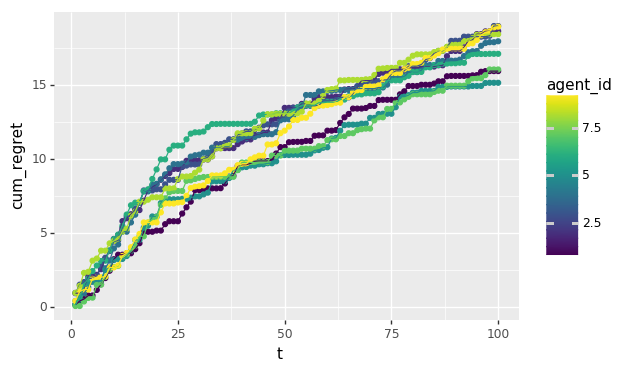

<ggplot: (8727264683873)>


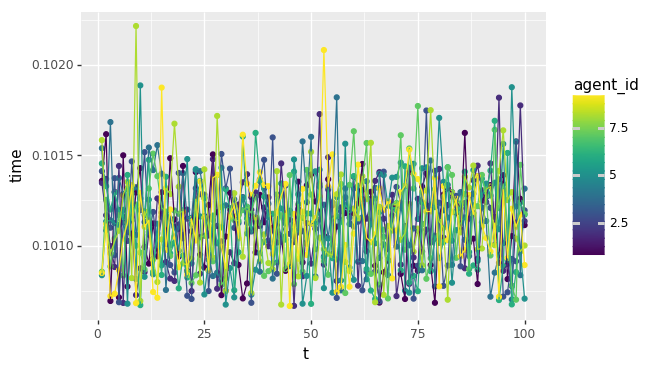

<ggplot: (8727264811285)>


In [18]:
make_sagald_agent = lambda hypers: SAGATS(num_articles, dim, [0]*dim, cov=None, 
                                          step_size=lambda t: hypers[0]/(1 + t * np.sqrt(dim*var)/dim),
                                          batch_size = lambda t: hypers[1],
                                          time=time_limit,
                                          n_steps=9999,
                                          init_pt=None, verbosity=verbosity)

n_steps=100

hyperparameter_sweep(make_mala_agent, list_prod([[0.2,0.1,0.05], [32, 64, 128]]), dim, var, n_steps, seed=2, verbosity=1)

#hyperparameter_sweep(make_mala_agent, [[0.1/2**n] for n in range(10)], dim, var, n_steps, seed=1, verbosity=1)

In [17]:
list_prod([[0.2,0.1,0.05], [32, 64, 128]])

[[0.2, 32],
 [0.2, 64],
 [0.2, 128],
 [0.1, 32],
 [0.1, 64],
 [0.1, 128],
 [0.05, 32],
 [0.05, 64],
 [0.05, 128]]

# Comparison

In [4]:

epsilon1 = 0.01
epsilon2 = 0.05
alpha=0.2
beta=0.5
tol=0.0001


In [5]:
make_laplace_agent = lambda: LaplaceTSLogisticBandit(num_articles, dim, theta_mean, theta_std, epsilon1,
                                                      alpha,beta,tol, verbosity=verbosity)
make_langevin_agent = lambda: BasicLangevinTS(num_articles, dim, [0]*(dim), cov=None, 
                                              step_size=lambda t: 0.2/(1 + t * np.sqrt(dim*var)/dim), n_steps=9999,
                                     init_pt=None, verbosity=verbosity)
make_best_mala_agent = lambda: MalaTS(num_articles, dim, [0]*dim, cov=None, step_size=lambda t:0.05/(1 + t * np.sqrt(dim*var)/dim), n_steps=9999,
                                     init_pt=None, verbosity=verbosity)
make_best_sgld_agent = lambda: SGLDTS(num_articles, dim, [0]*dim, cov=None, 
                                        step_size=lambda t: 0.05/(1 + t * np.sqrt(dim*var)/dim),
                                        batch_size = lambda t: 32,
                                        time=time_limit,
                                        n_steps=9999,
                                        init_pt=None, verbosity=verbosity)
make_best_sagald_agent = lambda: SAGATS(num_articles, dim, [0]*dim, cov=None, 
                                          step_size=lambda t: 0.2/(1 + t * np.sqrt(dim*var)/dim),
                                          batch_size = lambda t: 32,
                                          time=time_limit,
                                          n_steps=9999,
                                          init_pt=None, verbosity=verbosity)
make_pgts_agent = lambda: PGTS_Stream(num_articles, dim, verbosity=verbosity)

#reload(logistic.agent_logistic)

In [6]:
n_steps=100
agents = [make_laplace_agent(), make_langevin_agent(), make_best_mala_agent(), 
          make_best_sgld_agent(), make_best_sagald_agent(), 
          make_pgts_agent()]
simple_compare(agents, num_articles, dim, var, n_steps, seed=1, verbosity=1)

theta [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521]
Experiment: Step 0
 Laplace sample: array([-1.65072127, -0.89055558, -1.1191154 ,  1.9560789 , -0.3264995 ,
       -1.34267579,  1.11438298, -0.58652394, -1.23685338,  0.87583893,
        0.62336218, -0.43495668,  1.40754   ,  0.12910158,  1.6169496 ,
        0.50274088,  1.55880554,  0.1094027 , -1.2197444 ,  2.44936865])
 Sample: array([ 1.14123801,  0.26594432,  1.68561828, -1.33108919,  0.64669717,
       -0.76748254,  0.76799507,  1.81894674, -0.96848541,  2.54462343,
       -1.4284333 , -0.40734217, -0.3705722 , -1.29942489, -0.74045518,
        1.1550731 ,  1.12795106, -0.86283972,  0.38476672, -0.30760969])
 Steps taken: 9999
 Sample: array([-0.28265726,  1.32918406,  0.3190493 , -0.12695626,  0.43609003,
       -0.02382005, -0.8574

IndexError: index 0 is out of bounds for axis 0 with size 0